In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style("whitegrid")

import gc
import os

In [ ]:
df = pd.read_excel('data_cic_tco (all).xlsx',converters= {'Date': pd.to_datetime},sheet_name=None)
df1 = df['CIC']
df_HR = df['Rainfall & Humidity']

#If error in 'Date', make sure checking with df.columns and df.dtypes to see whether 'Date' is datetime64[ns]
#For csv, df_HR = pd.read_csv('daily_HKO_RH_RF.csv',parse_dates=['Date'])

df_add = pd.read_excel('Con_address.xlsx',sheet_name=None)
df_address = df_add['address']

In [ ]:
# Check the columns of dataframe 'CIC'
print(df1.columns)

Index(['貨櫃號', '申請號', '証書號', '出証日期', '提單日期', '申請公司', 'AQSIQ編號', '供貨承辦商',
       '廢紙細類名稱', '提單重量', '到貨口岸', '封條號', '檢驗地點', '檢驗日期', '檢驗員', '1st', '2nd',
       '3rd', '1st.1', '2nd.1', '3rd.1', '1st.2', '2nd.2', '3rd.2', '平均水分值',
       '換算後平均水分值', '總平均水分值', '收貨商'],
      dtype='object')


In [ ]:
# Check details of specific columns
print(df1['到貨口岸'].unique())
print(df1['供貨承辦商'].unique())
print(df1['供貨承辦商'].nunique())
print(df1['廢紙細類名稱'].unique())
# Check details of dataframe 'Rainfall & Humidity'
print(df_HR.columns)

['KWANGYANG, SOUTH KOREA' '南沙新港' '越南海防' '新會' '南沙新華' '泰國曼谷' '馬來西亞' '蛇口'
 '越南' '台灣' 'CATLAIPORT,VIETNAM' '泰國' 'LatKrabang,Thailand'
 'Laem Chabang,Thailand' '台灣,台北港' 'Bangkok,Thailand'
 'LaemChabangPortA0,Thailand' 'PORTKLANGNORTHPORT,Malaysia'
 'CATLAI,VIETNAM' '台灣,台北' 'SURABAYAPORTINDONESIA' 'Haiphong,Vietnam'
 '台灣,基隆港' '南韓' '韓國' '菲律賓']
['KPSS聯營' '碧瑤廢物處理及回收有限公司' '達記環保有限公司' '德利五金紙業公司' '海港(國際)集團有限公司' '瀚文及文領'
 '建迅環保回收有限公司' '利恒國際企業有限公司' '聯和生廢紙有限公司' '劉財記紙業有限公司' '日高環保資源管理有限公司' '順和順盈聯營'
 '偉生廢紙五金有限公司' '文華進出口公司' '新光榮環保回收服務公司' '再生環保貿易有限公司' '建迅&景樺' '凱柏環保回收有限公司'
 '廣興環保回收有限公司' '資訊機密處理有限公司' '新毅國際企業有限公司' '瀚文環保貿易有限公司' '文領有限公司' '順和廢紙公司'
 '德利環保國際紙業有限公司' '文領及瀚文' '順和順盈順營' '合俐隆環保貿易有限公司']
28
['回收(廢碎)的漂白化學木漿制的紙或紙板(白紙類)' '回收(廢碎)的未漂白牛皮,瓦楞紙或紙板(紙箱類)'
 '回收(廢碎)的機械木漿制的紙或紙板(報紙,雜誌,印刷品類)']
Index(['Year', 'Month', 'Day', 'Date', 'Humidity (香港_HKO)',
       'Rainfall (香港_HKO)', 'Humidity (香港_TM)', 'Rainfall (香港_TM)',
       'Humidity (東莞_玖龍_理文)', 'Rainfall (東莞_玖龍_理文)', 'Humidity (南沙_海關_廣紙)',
       'Rainfall (南沙_海關_廣紙)'

In [ ]:
# Rename column: df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})
df_HR = df_HR.rename(columns = {'Date':'提單日期'})

# Replace data name:
#1) Shorten the wording in the df1's column"廢紙細類名稱"
df1 = df1.replace('回收(廢碎)的未漂白牛皮,瓦楞紙或紙板(紙箱類)','紙箱類')
df1 = df1.replace('回收(廢碎)的漂白化學木漿制的紙或紙板(白紙類)','白紙類')
df1 = df1.replace('回收(廢碎)的機械木漿制的紙或紙板(報紙,雜誌,印刷品類)','報紙,雜誌,印刷品類')

#2) df1's column"供貨承辦商" - ensure the names consistent
df1 = df1.replace('順和順盈順營','順和順盈聯營')
df1 = df1.replace('順和廢紙公司','順和順盈聯營')
df1 = df1.replace('文領有限公司','文領及瀚文')
df1 = df1.replace('瀚文及文領','文領及瀚文')
df1 = df1.replace('瀚文環保貿易有限公司','文領及瀚文')
df1 = df1.replace('建迅&景樺','建迅環保回收有限公司')
df1 = df1.replace('德利五金紙業公司','德利環保國際紙業有限公司')

#3) df1's column"到貨口岸" - ensure the names in country
df1 = df1.replace('KWANGYANG, SOUTH KOREA','南韓')
df1 = df1.replace('韓國','南韓')
df1 = df1.replace('LatKrabang,Thailand','泰國')
df1 = df1.replace('Laem Chabang,Thailand','泰國')
df1 = df1.replace('Bangkok,Thailand','泰國')
df1 = df1.replace('LaemChabangPortA0,Thailand','泰國')
df1 = df1.replace('泰國曼谷','泰國')
df1 = df1.replace('越南海防','越南')
df1 = df1.replace('CATLAIPORT,VIETNAM','越南')
df1 = df1.replace('CATLAI,VIETNAM','越南')
df1 = df1.replace('Haiphong,Vietnam','越南')
df1 = df1.replace('南沙新華','南沙新港')
df1 = df1.replace('SURABAYAPORTINDONESIA','印尼')
df1 = df1.replace('PORTKLANGNORTHPORT,Malaysia','馬來西亞')
df1 = df1.replace('台灣,台北港','中國台灣')
df1 = df1.replace('台灣,台北','中國台灣')
df1 = df1.replace('台灣,基隆港','中國台灣')

#4) df_address is consistent with df1's column"供貨承辦商"
df_address = df_address.replace('利恆國際企業有限公司','利恒國際企業有限公司')
df_address = df_address.replace('新光榮環保回收有限公司','新光榮環保回收服務公司')

In [ ]:
# Define the range of 平均水分值 as 水分含量 from 1 to 7
df1.loc[df1['換算後平均水分值'] <= 12, '水分含量']=1
df1.loc[(df1['換算後平均水分值'] > 12) & (df1['換算後平均水分值'] <= 13), '水分含量']=2
df1.loc[(df1['換算後平均水分值'] > 13) & (df1['換算後平均水分值'] <= 14), '水分含量']=3
df1.loc[(df1['換算後平均水分值'] > 14) & (df1['換算後平均水分值'] <= 15), '水分含量']=4
df1.loc[(df1['換算後平均水分值'] > 15) & (df1['換算後平均水分值'] <= 20), '水分含量']=5
df1.loc[df1['換算後平均水分值'] > 20, '水分含量']=6
# Make it up in details:
# df1.loc[(df1['換算後平均水分值'] > 20) & (df1['換算後平均水分值'] <= 25), '水分含量']=6
# df1.loc[df1['換算後平均水分值'] > 25, '水分含量']=7

# Also, other way may be used, such as df1.loc[df1['平均水分值'].between(0,12, inclusive=False),'水分含量']=1

In [ ]:
# Drop the unnecessary columns (Year, Month, Day) in the dataframe, df_HR
df_HR_drop = df_HR.drop(columns = ['Year','Month','Day'])
df_HR_drop

# Drop data

# delete a single row by index value 0
# data = data.drop(labels=0, axis=0)
# delete a few specified rows at index values 0, 15, 20.
# Note that the index values do not always align to row numbers.
# data = data.drop(labels=[1,15,20], axis=0)
# delete a range of rows - index values 10-20
# data = data.drop(labels=range(40, 45), axis=0)
# The labels parameter name can be omitted, and axis is 0 by default
# Shorter versions of the above:
# data = data.drop(0)
# data = data.drop([0, 15, 20])
# data = data.drop(range(10,20))

#For example, drop index no. 9651 and 9652, it would be the range between 9651 and 9653; 9653 is the last row.
# df = df.drop(labels=range(9651, 9653), axis=0)

# Filtering the rows with NaN in respect of the specific column we want to identify
# df1_filter = df1_merge[df1_merge['貨櫃號'].notnull()]

提單日期  Humidity (香港_HKO)  Rainfall (香港_HKO)  Humidity (香港_TM)  \
0   2021-01-01               40.0                0.0              30.0   
1   2021-01-02               52.0                0.0              39.0   
2   2021-01-03               65.0                0.0              57.0   
3   2021-01-04               66.0                0.0              50.0   
4   2021-01-05               65.0                0.0              51.0   
..         ...                ...                ...               ...   
967 2023-08-26                NaN                NaN               NaN   
968 2023-08-27                NaN                NaN               NaN   
969 2023-08-28                NaN                NaN               NaN   
970 2023-08-29                NaN                NaN               NaN   
971 2023-08-30                NaN                NaN               NaN   

    Rainfall (香港_TM)  Humidity (東莞_玖龍_理文)  Rainfall (東莞_玖龍_理文)  \
0                  0                  NaN                  NaN   
1                  0                  NaN                  NaN   
2                  0                  NaN                  NaN   
3                  0                  NaN                  NaN   
4                  0                  NaN                  NaN   
..               ...                  ...                  ...   
967              NaN                 79.0                  5.1   
968              NaN                 78.0                  5.0   
969              NaN                 88.0                  5.3   
970              NaN                 87.0                  9.3   
971              NaN                 77.0                  0.0   

     Humidity (南沙_海關_廣紙)  Rainfall (南沙_海關_廣紙)  Humidity (江門_華泰)  \
0                    NaN                  NaN               NaN   
1                    NaN                  NaN               NaN   
2                    NaN                  NaN               NaN   
3                    NaN                  NaN               NaN   
4                    NaN                  NaN               NaN   
..                   ...                  ...               ...   
967                 84.0                  2.5              88.0   
968                 83.0                  7.7              88.0   
969                 86.0                  3.7              91.0   
970                 86.0                  9.3              87.0   
971                 74.0                  0.0              72.0   

     Rainfall (江門_華泰)  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
..                ...  
967               5.1  
968               5.1  
969               6.6  
970              12.6  
971               0.0  

[972 rows x 11 columns]

In [ ]:
df_HR1 = df_HR_drop[df_HR_drop['提單日期'].notnull()]

In [ ]:
df_HR1

提單日期  Humidity (香港_HKO)  Rainfall (香港_HKO)  Humidity (香港_TM)  \
0   2021-01-01               40.0                0.0              30.0   
1   2021-01-02               52.0                0.0              39.0   
2   2021-01-03               65.0                0.0              57.0   
3   2021-01-04               66.0                0.0              50.0   
4   2021-01-05               65.0                0.0              51.0   
..         ...                ...                ...               ...   
967 2023-08-26                NaN                NaN               NaN   
968 2023-08-27                NaN                NaN               NaN   
969 2023-08-28                NaN                NaN               NaN   
970 2023-08-29                NaN                NaN               NaN   
971 2023-08-30                NaN                NaN               NaN   

    Rainfall (香港_TM)  Humidity (東莞_玖龍_理文)  Rainfall (東莞_玖龍_理文)  \
0                  0                  NaN                  NaN   
1                  0                  NaN                  NaN   
2                  0                  NaN                  NaN   
3                  0                  NaN                  NaN   
4                  0                  NaN                  NaN   
..               ...                  ...                  ...   
967              NaN                 79.0                  5.1   
968              NaN                 78.0                  5.0   
969              NaN                 88.0                  5.3   
970              NaN                 87.0                  9.3   
971              NaN                 77.0                  0.0   

     Humidity (南沙_海關_廣紙)  Rainfall (南沙_海關_廣紙)  Humidity (江門_華泰)  \
0                    NaN                  NaN               NaN   
1                    NaN                  NaN               NaN   
2                    NaN                  NaN               NaN   
3                    NaN                  NaN               NaN   
4                    NaN                  NaN               NaN   
..                   ...                  ...               ...   
967                 84.0                  2.5              88.0   
968                 83.0                  7.7              88.0   
969                 86.0                  3.7              91.0   
970                 86.0                  9.3              87.0   
971                 74.0                  0.0              72.0   

     Rainfall (江門_華泰)  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
..                ...  
967               5.1  
968               5.1  
969               6.6  
970              12.6  
971               0.0  

[972 rows x 11 columns]

In [ ]:
# Combine dataframes by merge with how='left' and how='outer'

# 1st: Merge with Address
df1_merge_add = pd.merge(df1, df_address, how='left', on='供貨承辦商')

# Then: Merge with Rainfall and Humidity
df1_merge = pd.merge(df1_merge_add, df_HR_drop, how='outer', on='提單日期')
df1_merge =df1_merge[df1_merge['貨櫃號'].notnull()]

# Keep the Rainfall and Humidity with NaN (insufficient data from HKO)

In [ ]:
# Add '年', '月' columns into the combined dataframe
df1_merge['月'] = df1_merge['提單日期'].dt.month
df1_merge['年'] = df1_merge['提單日期'].dt.year


In [ ]:
# Divide the combined dataframe into 3 periods of time (2023 Jan to June, 2022 Jan to June, 2021 Jan to June)

import datetime
datetime.datetime.strptime
df1a = df1_merge[(df1_merge['提單日期']>pd.Timestamp(2022,12,31)) & (df1_merge['提單日期']<pd.Timestamp(2024,4,1))]
df1b = df1_merge[(df1_merge['提單日期']>pd.Timestamp(2021,12,31)) & (df1_merge['提單日期']<pd.Timestamp(2023,1,1))]
df1c = df1_merge[(df1_merge['提單日期']>pd.Timestamp(2020,12,31)) & (df1_merge['提單日期']<pd.Timestamp(2022,1,1))]
df1d = df1_merge[(df1_merge['提單日期']>pd.Timestamp(2024,8,31)) & (df1_merge['提單日期']<pd.Timestamp(2025,4,1))]

In [ ]:
df1_merge.shape

(110928, 44)

In [ ]:
df1_merge.columns

Index(['貨櫃號', '申請號', '証書號', '出証日期', '提單日期', '申請公司', 'AQSIQ編號', '供貨承辦商',
       '廢紙細類名稱', '提單重量', '到貨口岸', '封條號', '檢驗地點', '檢驗日期', '檢驗員', '1st', '2nd',
       '3rd', '1st.1', '2nd.1', '3rd.1', '1st.2', '2nd.2', '3rd.2', '平均水分值',
       '換算後平均水分值', '總平均水分值', '收貨商', '水分含量', '處理廠房地址', 'Latitude', 'Longitude',
       'Humidity (香港_HKO)', 'Rainfall (香港_HKO)', 'Humidity (香港_TM)',
       'Rainfall (香港_TM)', 'Humidity (東莞_玖龍_理文)', 'Rainfall (東莞_玖龍_理文)',
       'Humidity (南沙_海關_廣紙)', 'Rainfall (南沙_海關_廣紙)', 'Humidity (江門_華泰)',
       'Rainfall (江門_華泰)', '月', '年'],
      dtype='object')

In [ ]:
# display all rows and columns
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2025-09-02 02:13:42--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 172.217.12.14, 2607:f8b0:4025:815::200e
Connecting to drive.google.com (drive.google.com)|172.217.12.14|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-09-02 02:13:42--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.217.12.1, 2607:f8b0:4025:815::2001
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.217.12.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘TaipeiSansTCBeta-Regular.ttf’

TaipeiSansTCBeta-Re 100%[===================>]  19.70M  54.9MB/s    in 0.4s    

2025-09-02 02:13:44 (54.9 MB/s) 

In [ ]:
df_count1a = df1a.groupby(['年', '月', '提單日期', '提單重量', '供貨承辦商', '申請公司', '廢紙細類名稱', '水分含量']).size().reset_index(name='counts')
df_count1a = df_count1a[df_count1a['供貨承辦商']=='文華進出口公司']
df_count1b = df1b.groupby(['年', '月', '提單日期', '提單重量', '供貨承辦商', '申請公司', '廢紙細類名稱', '水分含量']).size().reset_index(name='counts')
df_count1b = df_count1b[df_count1b['供貨承辦商']=='文華進出口公司']
df_count1c = df1c.groupby(['年', '月', '提單日期', '提單重量', '供貨承辦商', '申請公司', '廢紙細類名稱', '水分含量']).size().reset_index(name='counts')
df_count1c = df_count1c[df_count1c['供貨承辦商']=='文華進出口公司']
df_count1d = df1d.groupby(['年', '月', '提單日期', '提單重量', '供貨承辦商', '申請公司', '廢紙細類名稱', '水分含量']).size().reset_index(name='counts')
df_count1d = df_count1d[df_count1d['供貨承辦商']=='文華進出口公司']

In [ ]:
df1_merge

貨櫃號         申請號           証書號       出証日期       提單日期     申請公司  \
3       CAIU8800207         NaN  CI21000002HK 2021-01-04 2021-01-04    文領及瀚文   
4       HJCU1263806         NaN  CI21000002HK 2021-01-04 2021-01-04    文領及瀚文   
5       HJCU1629578         NaN  CI21000002HK 2021-01-04 2021-01-04    文領及瀚文   
6       FSCU9897892         NaN  CI21000002HK 2021-01-04 2021-01-04    文領及瀚文   
7       CKSU6600658         NaN  CI21000002HK 2021-01-04 2021-01-04    文領及瀚文   
...             ...         ...           ...        ...        ...      ...   
111094  FWRU0163787  CI25000392  CI25000422HK 2025-05-06 2025-05-03  文華進出口公司   
111095  CICU2887009  CI25000396  CI25000423HK 2025-05-06 2025-05-03  文華進出口公司   
111096  FWRU0163869  CI25000396  CI25000423HK 2025-05-06 2025-05-03  文華進出口公司   
111097  CICU2886471  CI25000396  CI25000423HK 2025-05-06 2025-05-03  文華進出口公司   
111098  CICU2886928  CI25000396  CI25000423HK 2025-05-06 2025-05-03  文華進出口公司   

           AQSIQ編號    供貨承辦商 廢紙細類名稱   提單重量  ... Humidity (香港_TM)  \
3       A344170280    文領及瀚文    紙箱類  25.24  ...             50.0   
4       A344170280    文領及瀚文    紙箱類  25.51  ...             50.0   
5       A344170280    文領及瀚文    紙箱類  26.02  ...             50.0   
6       A344170280    文領及瀚文    紙箱類  25.50  ...             50.0   
7       A344170280    文領及瀚文    紙箱類  26.01  ...             50.0   
...            ...      ...    ...    ...  ...              ...   
111094  A344040620  文華進出口公司    紙箱類  25.33  ...              NaN   
111095  A344040620  文華進出口公司    紙箱類  24.63  ...              NaN   
111096  A344040620  文華進出口公司    紙箱類  24.93  ...              NaN   
111097  A344040620  文華進出口公司    紙箱類  24.17  ...              NaN   
111098  A344040620  文華進出口公司    紙箱類  24.30  ...              NaN   

        Rainfall (香港_TM) Humidity (東莞_玖龍_理文) Rainfall (東莞_玖龍_理文)  \
3                      0                 NaN                 NaN   
4                      0                 NaN                 NaN   
5                      0                 NaN                 NaN   
6                      0                 NaN                 NaN   
7                      0                 NaN                 NaN   
...                  ...                 ...                 ...   
111094               NaN                 NaN                 NaN   
111095               NaN                 NaN                 NaN   
111096               NaN                 NaN                 NaN   
111097               NaN                 NaN                 NaN   
111098               NaN                 NaN                 NaN   

       Humidity (南沙_海關_廣紙)  Rainfall (南沙_海關_廣紙)  Humidity (江門_華泰)  \
3                      NaN                  NaN               NaN   
4                      NaN                  NaN               NaN   
5                      NaN                  NaN               NaN   
6                      NaN                  NaN               NaN   
7                      NaN                  NaN               NaN   
...                    ...                  ...               ...   
111094                 NaN                  NaN               NaN   
111095                 NaN                  NaN               NaN   
111096                 NaN                  NaN               NaN   
111097                 NaN                  NaN               NaN   
111098                 NaN                  NaN               NaN   

        Rainfall (江門_華泰)  月     年  
3                    NaN  1  2021  
4                    NaN  1  2021  
5                    NaN  1  2021  
6                    NaN  1  2021  
7                    NaN  1  2021  
...                  ... ..   ...  
111094               NaN  5  2025  
111095               NaN  5  2025  
111096               NaN  5  2025  
111097               NaN  5  2025  
111098               NaN  5  2025  

[110928 rows x 44 columns]

/tmp/ipython-input-2766955304.py:11: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot1a = pd.pivot_table(data=df_count1a,
/tmp/ipython-input-2766955304.py:21: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot2a = pd.pivot_table(data=df_count1a,
/tmp/ipython-input-2766955304.py:33: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot2b = pd.pivot_table(data=df_count1b,
/tmp/ipython-input-276695530

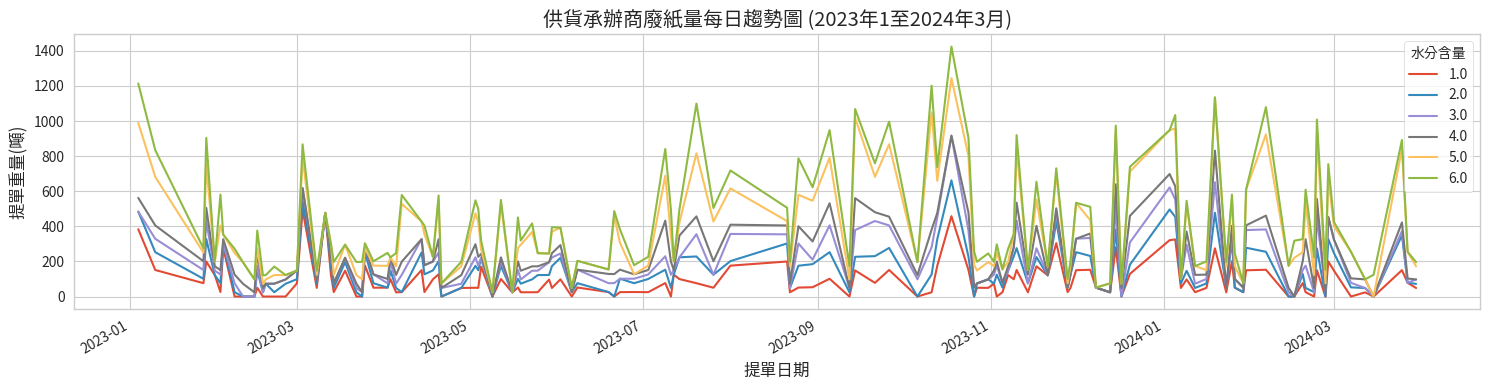

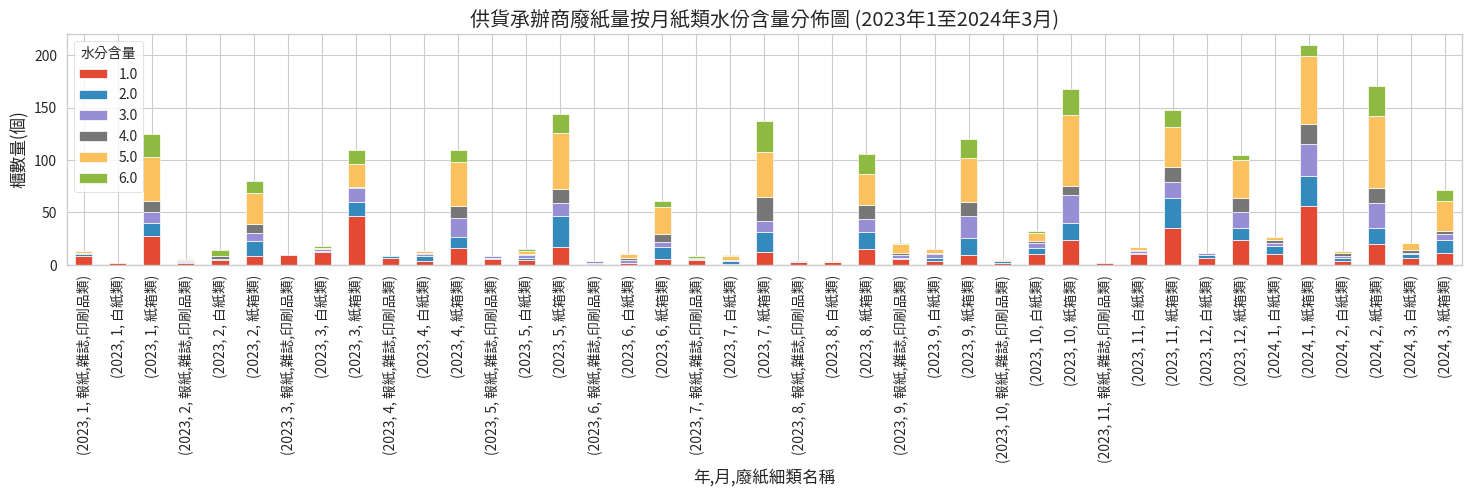

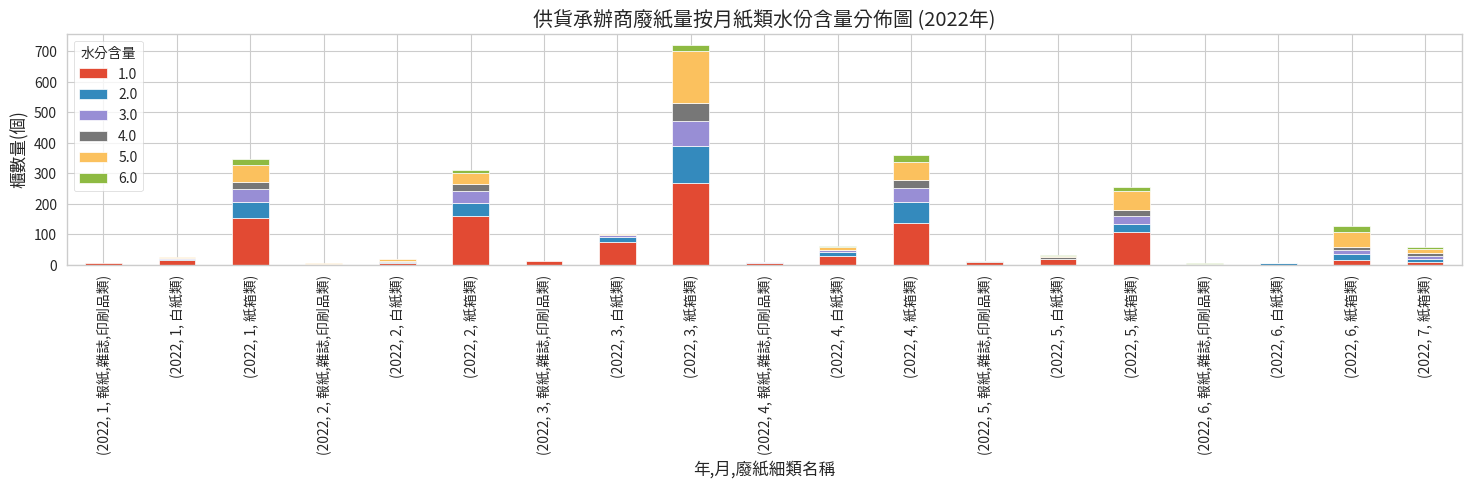

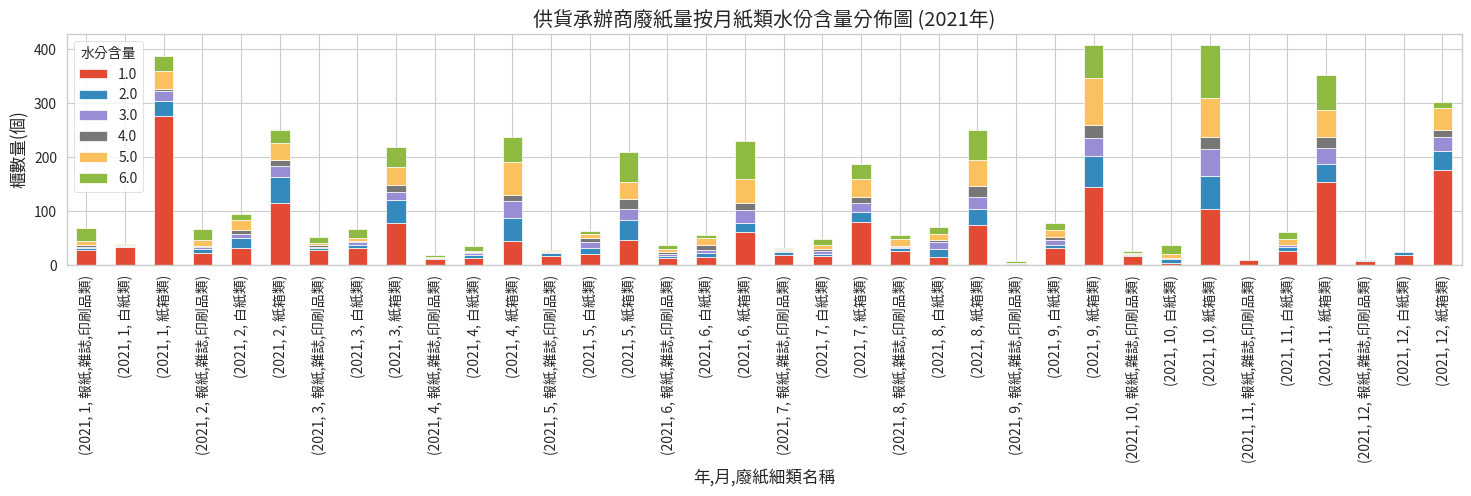

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)

pd.set_option('display.max_columns', None)

pivot1a = pd.pivot_table(data=df_count1a,
            index='提單日期',
            columns='水分含量',
            aggfunc=np.sum,
            values='提單重量',
            fill_value=0
            )
fig, ax = plt.subplots(figsize=(15, 4))
pivot1a.plot(ax=ax, stacked=True, title='供貨承辦商廢紙量每日趨勢圖 (2023年1至2024年3月)', ylabel='提單重量(噸)')

pivot2a = pd.pivot_table(data=df_count1a,
            index=['年','月','廢紙細類名稱'],
            columns='水分含量',
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

pivot2a.plot(kind='bar', stacked=True, figsize=(18,3), title='供貨承辦商廢紙量按月紙類水份含量分佈圖 (2023年1至2024年3月)', ylabel='櫃數量(個)')
plt.legend(title='水分含量', loc="upper left")
fig.tight_layout()

pivot2b = pd.pivot_table(data=df_count1b,
            index=['年','月','廢紙細類名稱'],
            columns='水分含量',
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

pivot2b.plot(kind='bar', stacked=True, figsize=(18,3), title='供貨承辦商廢紙量按月紙類水份含量分佈圖 (2022年)', ylabel='櫃數量(個)')
plt.legend(title='水分含量', loc="upper left")
fig.tight_layout()

pivot2c = pd.pivot_table(data=df_count1c,
            index=['年','月','廢紙細類名稱'],
            columns='水分含量',
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

pivot2c.plot(kind='bar', stacked=True, figsize=(18,3), title='供貨承辦商廢紙量按月紙類水份含量分佈圖 (2021年)', ylabel='櫃數量(個)')
plt.legend(title='水分含量', loc="upper left")
fig.tight_layout()

/tmp/ipython-input-3960421758.py:1: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot1d = pd.pivot_table(data=df_count1d,
/tmp/ipython-input-3960421758.py:11: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot2d = pd.pivot_table(data=df_count1d,


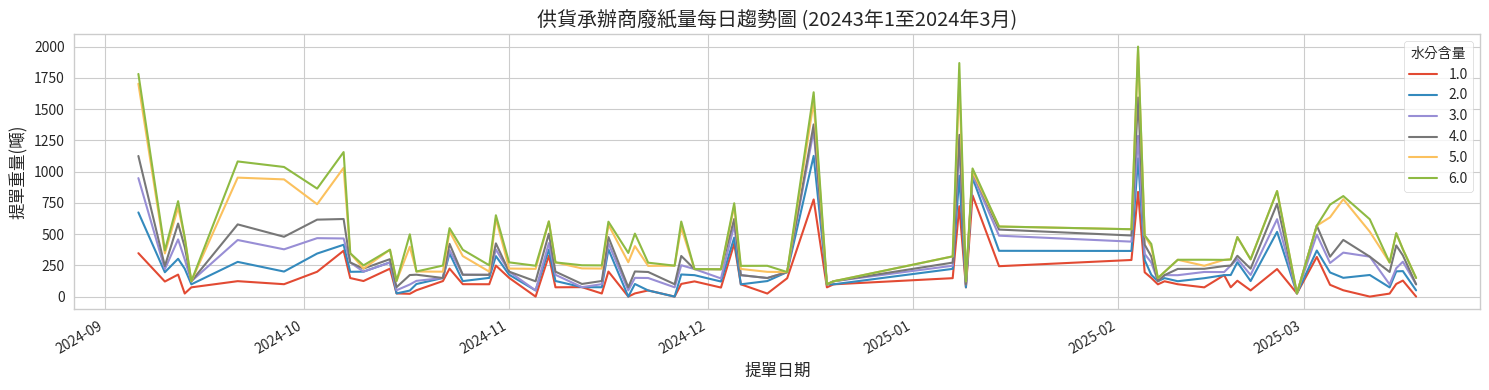

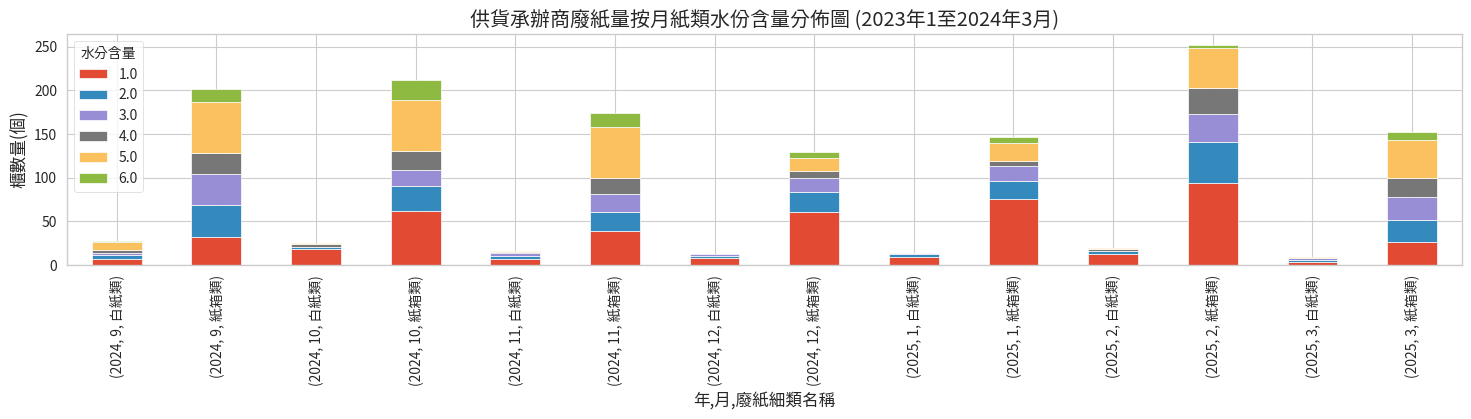

In [ ]:
pivot1d = pd.pivot_table(data=df_count1d,
            index='提單日期',
            columns='水分含量',
            aggfunc=np.sum,
            values='提單重量',
            fill_value=0
            )
fig, ax = plt.subplots(figsize=(15, 4))
pivot1d.plot(ax=ax, stacked=True, title='供貨承辦商廢紙量每日趨勢圖 (20243年1至2024年3月)', ylabel='提單重量(噸)')

pivot2d = pd.pivot_table(data=df_count1d,
            index=['年','月','廢紙細類名稱'],
            columns='水分含量',
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

pivot2d.plot(kind='bar', stacked=True, figsize=(18,3), title='供貨承辦商廢紙量按月紙類水份含量分佈圖 (2023年1至2024年3月)', ylabel='櫃數量(個)')
plt.legend(title='水分含量', loc="upper left")
fig.tight_layout()





In [ ]:
df_count1a = df1a.groupby(['年', '月', '提單日期', '提單重量', '供貨承辦商', '申請公司', '到貨口岸', '廢紙細類名稱', '水分含量']).size().reset_index(name='counts')

df_count1b = df1b.groupby(['年', '月', '提單日期', '提單重量', '供貨承辦商', '申請公司', '到貨口岸', '廢紙細類名稱', '水分含量']).size().reset_index(name='counts')

df_count1c = df1c.groupby(['年', '月', '提單日期', '提單重量', '供貨承辦商', '申請公司', '到貨口岸', '廢紙細類名稱', '水分含量']).size().reset_index(name='counts')


In [ ]:
# 供貨承辦商廢紙量按月紙類水份含量分佈圖 (2023年1至2024年3月): 櫃數量(counts)
pivot2a

水分含量                1.0  2.0  3.0  4.0  5.0  6.0
年    月  廢紙細類名稱                                  
2023 1  報紙,雜誌,印刷品類    8    2    0    1    2    0
        白紙類           2    0    0    0    0    0
        紙箱類          28   12   10   11   42   22
     2  報紙,雜誌,印刷品類    2    1    1    1    1    0
        白紙類           5    1    0    2    0    6
        紙箱類           8   15    7    9   30   11
     3  報紙,雜誌,印刷品類    9    0    0    0    0    0
        白紙類          12    1    2    0    1    2
        紙箱類          47   13   13    1   22   14
     4  報紙,雜誌,印刷品類    7    1    0    0    0    0
        白紙類           4    4    2    1    2    0
        紙箱類          16   11   18   11   42   12
     5  報紙,雜誌,印刷品類    6    1    1    0    0    0
        白紙類           5    2    2    1    3    2
        紙箱類          17   30   12   13   54   18
     6  報紙,雜誌,印刷品類    1    1    2    0    0    0
        白紙類           2    0    3    2    3    0
        紙箱類           6   11    5    7   26    6
     7  報紙,雜誌,印刷品類    5    0    1    1    0    1
        白紙類           1    3    1    0    3    1
        紙箱類          12   19   11   23   43   29
     8  報紙,雜誌,印刷品類    3    0    1    0    0    0
        白紙類           3    0    0    0    1    0
        紙箱類          15   16   13   13   30   19
     9  報紙,雜誌,印刷品類    6    1    2    2    9    1
        白紙類           4    3    3    1    4    0
        紙箱類           9   17   21   13   42   18
     10 報紙,雜誌,印刷品類    2    2    1    0    1    0
        白紙類          10    6    5    2    7    2
        紙箱類          24   16   27    8   68   25
     11 報紙,雜誌,印刷品類    2    0    0    0    0    0
        白紙類          10    1    2    1    3    0
        紙箱類          35   29   15   14   39   16
     12 白紙類           7    2    2    0    0    0
        紙箱類          24   11   15   14   36    5
2024 1  白紙類          10    8    3    3    3    0
        紙箱類          56   29   30   19   65   11
     2  白紙類           4    3    1    3    2    0
        紙箱類          20   15   24   14   69   29
     3  白紙類           7    3    1    3    7    0
        紙箱類          11   13    5    3   29   10

In [ ]:
# 供貨承辦商廢紙量按月紙類水份含量分佈圖 (2022年): 櫃數量(counts)
pivot2b

水分含量               1.0  2.0  3.0  4.0  5.0  6.0
年    月 廢紙細類名稱                                  
2022 1 報紙,雜誌,印刷品類    4    0    0    0    0    0
       白紙類          16    4    1    2    1    0
       紙箱類         154   53   41   23   57   20
     2 報紙,雜誌,印刷品類    1    0    1    1    1    0
       白紙類           4    3    1    4    6    0
       紙箱類         161   42   39   23   35   10
     3 報紙,雜誌,印刷品類   12    0    0    0    0    0
       白紙類          75   15    6    0    6    0
       紙箱類         269  121   82   58  170   22
     4 報紙,雜誌,印刷品類    6    0    1    0    1    0
       白紙類          27   14    6    1   11    1
       紙箱類         137   69   44   28   60   21
     5 報紙,雜誌,印刷品類   10    0    0    1    1    0
       白紙類          17    2    1    4    5    1
       紙箱類         108   24   28   20   61   14
     6 報紙,雜誌,印刷品類    0    1    0    0    2    1
       白紙類           0    4    0    1    0    0
       紙箱類          15   19   13   11   48   20
     7 紙箱類           8   11   10    9   13    8

In [ ]:
# 供貨承辦商廢紙量按月紙類水份含量分佈圖 (2021年): 櫃數量(counts)
pivot2c

水分含量                1.0  2.0  3.0  4.0  5.0  6.0
年    月  廢紙細類名稱                                  
2021 1  報紙,雜誌,印刷品類   28    4    1    3    8   24
        白紙類          33    1    1    0    2    2
        紙箱類         276   27   19    4   34   28
     2  報紙,雜誌,印刷品類   22    7    5    1   12   20
        白紙類          31   19    8    7   18   11
        紙箱類         115   48   20   11   32   24
     3  報紙,雜誌,印刷品類   28    4    2    2    5   11
        白紙類          31    6    6    2    5   17
        紙箱類          78   42   16   13   32   38
     4  報紙,雜誌,印刷品類   10    2    1    0    2    3
        白紙類          13    5    4    1    3    9
        紙箱類          45   41   33   10   61   47
     5  報紙,雜誌,印刷品類   16    6    2    0    2    2
        白紙類          21   10   11    7    8    5
        紙箱類          47   36   21   18   32   56
     6  報紙,雜誌,印刷品類   13    4    4    2    7    6
        白紙類          15    7    6    8   14    6
        紙箱類          61   17   24   13   45   69
     7  報紙,雜誌,印刷品類   18    6    2    1    3    1
        白紙類          17    4    4    4    8   11
        紙箱類          80   18   16   12   33   28
     8  報紙,雜誌,印刷品類   25    6    3    1   13    8
        白紙類          14   16   12    5   10   13
        紙箱類          74   30   21   22   48   55
     9  報紙,雜誌,印刷品類    2    0    0    1    1    4
        白紙類          31    6   10    4   14   13
        紙箱類         145   57   34   24   86   62
     10 報紙,雜誌,印刷品類   16    2    1    1    2    4
        白紙類           3    7    1    2    8   15
        紙箱類         103   62   49   23   72   99
     11 報紙,雜誌,印刷品類    9    0    0    0    0    0
        白紙類          26    8    2    0   12   12
        紙箱類         153   34   29   22   49   65
     12 報紙,雜誌,印刷品類    8    1    1    1    0    0
        白紙類          19    5    0    0    0    0
        紙箱類         175   36   26   14   39   12

In [ ]:
# 供貨承辦商廢紙量按月紙類水份含量分佈圖 (2023年1至2024年3月): 提單重量
pivot3a = pd.pivot_table(data=df1a,
            index=['年','月','廢紙細類名稱'],
            columns='水分含量',
            aggfunc=np.sum,
            values='提單重量',
            fill_value=0
            )
pivot3a

/tmp/ipython-input-3002730843.py:2: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot3a = pd.pivot_table(data=df1a,


水分含量                      1.0       2.0       3.0       4.0       5.0  \
年    月  廢紙細類名稱                                                          
2023 1  報紙,雜誌,印刷品類   2613.610   256.100    76.400    75.120   254.730   
        白紙類          4154.380   338.960   293.530    71.740   121.580   
        紙箱類         22239.080  6052.710  3037.130  2450.000  6961.530   
     2  報紙,雜誌,印刷品類   2521.400   251.380   127.290    74.240    26.000   
        白紙類          4391.771   689.240   273.360   199.550   149.380   
        紙箱類         19472.200  5774.590  3534.600  2171.680  5182.040   
     3  報紙,雜誌,印刷品類   2916.300   226.740    73.600     0.000    24.540   
        白紙類          5563.870   501.920   201.450   101.510   397.890   
        紙箱類         20067.700  4552.410  2228.170  1703.630  3246.850   
     4  報紙,雜誌,印刷品類   1982.770   649.250   400.020   392.310   323.080   
        白紙類          2934.360  1721.240   826.730   445.920   516.120   
        紙箱類          9103.500  6327.920  5048.950  3977.718  8932.475   
     5  報紙,雜誌,印刷品類   2683.150   657.580   174.380   178.260   348.910   
        白紙類          4260.580   998.850   795.320   502.320   723.140   
        紙箱類         13917.790  8825.850  5241.430  4226.910  7945.030   
     6  報紙,雜誌,印刷品類   1767.800   533.940   225.690    75.490   273.210   
        白紙類          2902.520  1245.440   989.920   332.360   631.700   
        紙箱類          8944.140  7316.318  5877.070  3951.340  9028.710   
     7  報紙,雜誌,印刷品類   1813.660   328.820   229.550   150.610   174.800   
        白紙類          4859.465  1942.120   631.380   249.860   301.980   
        紙箱類         14998.620  7978.610  4615.508  3229.820  5650.530   
     8  報紙,雜誌,印刷品類   2468.070   272.830   202.700    24.050   203.340   
        白紙類          4246.380   948.470   299.760   179.450   328.350   
        紙箱類         13307.030  8829.990  5384.840  3851.780  6085.850   
     9  報紙,雜誌,印刷品類   1249.910   331.100   199.440   151.120   584.170   
        白紙類          4270.030  1440.760   565.950    78.210   652.420   
        紙箱類          8352.620  6205.620  4688.560  3173.730  6518.480   
     10 報紙,雜誌,印刷品類   2290.020   276.910   200.010    24.500   220.950   
        白紙類          6769.005  1192.795   807.685   175.130   500.220   
        紙箱類         23113.731  8153.020  4955.260  3348.215  6012.295   
     11 報紙,雜誌,印刷品類   2586.520   150.080    98.320     0.000    49.170   
        白紙類          6547.140   575.780   225.760    51.200   226.770   
        紙箱類         23148.300  6253.140  3235.480  1928.178  2959.640   
     12 報紙,雜誌,印刷品類   1594.490   149.880    50.660     0.000    24.240   
        白紙類          6230.380   660.750    76.900     0.000    26.770   
        紙箱類         16685.145  5035.600  2841.488  1891.910  2974.625   
2024 1  報紙,雜誌,印刷品類   2576.240    49.470    49.350     0.000   100.080   
        白紙類          9163.635   709.840   175.350    81.170   124.980   
        紙箱類         34800.808  6296.920  3342.460  2255.640  4089.480   
     2  報紙,雜誌,印刷品類   1671.140   325.090    97.050     0.000    74.690   
        白紙類          3705.260  1527.130   487.970   311.730   411.320   
        紙箱類         11320.045  7918.235  5081.660  3320.228  6470.590   
     3  報紙,雜誌,印刷品類   1602.740   296.000    71.610     0.000    99.730   
        白紙類          6113.166  1156.180   383.330   303.700   379.930   
        紙箱類         13969.510  7163.913  4834.090  2462.790  4847.420   

水分含量                     6.0  
年    月  廢紙細類名稱                
2023 1  報紙,雜誌,印刷品類    25.320  
        白紙類           74.200  
        紙箱類         1879.780  
     2  報紙,雜誌,印刷品類     0.000  
        白紙類          176.880  
        紙箱類         1479.620  
     3  報紙,雜誌,印刷品類     0.000  
        白紙類          198.910  
        紙箱類         1423.490  
     4  報紙,雜誌,印刷品類    50.280  
        白紙類           73.830  
        紙箱類         2389.700  
     5  報紙,雜誌,印刷品類    25.270  
        白紙類          176.630  
        紙箱類         1685.908  
     6  報紙,雜誌,印刷品類   248.400  
        白紙

In [ ]:
# 2023年1至2024年3月
pd.set_option('display.max_rows', None)
df1aa = df1a[df1a['水分含量'] == 6]
agg_func_count = {'貨櫃號': ['count'],'提單重量':['sum'],'總平均水分值':['sum'],}
df3 = df1aa.groupby(['年','月','水分含量','供貨承辦商','廢紙細類名稱','到貨口岸']).agg(agg_func_count)
df3

貨櫃號      提單重量        總平均水分值
                                          count       sum           sum
年    月  水分含量 供貨承辦商        廢紙細類名稱     到貨口岸                              
2023 1  6.0  偉生廢紙五金有限公司   白紙類        南沙新港     3    74.200   1731.058400
                          紙箱類        南沙新港     1    24.570    534.962610
             利恒國際企業有限公司   紙箱類        南沙新港    17   425.790   9602.416920
                                     越南       2    50.850   1428.176400
             建迅環保回收有限公司   紙箱類        南沙新港    12   301.430   6509.272040
             文華進出口公司      紙箱類        南沙新港    22   551.030  13378.181620
             文領及瀚文        紙箱類        南沙新港     1    25.270    534.612120
             新光榮環保回收服務公司  紙箱類        南沙新港     2    50.070   1131.787780
             日高環保資源管理有限公司 紙箱類        南沙新港    13   327.090   7462.956170
             海港(國際)集團有限公司 報紙,雜誌,印刷品類 南沙新港     1    25.320    540.911160
                          紙箱類        南沙新港     4    99.320   2410.906440
             達記環保有限公司     紙箱類        南沙新港     1    24.360    494.970840
     2  6.0  利恒國際企業有限公司   紙箱類        南沙新港    26   652.440  14883.955040
             劉財記紙業有限公司    白紙類        南沙新港     1    25.160    550.375000
             建迅環保回收有限公司   紙箱類        南沙新港     2    50.160   1027.028360
             德利環保國際紙業有限公司 紙箱類        南沙新港     2    52.400   1121.812860
             文華進出口公司      白紙類        南沙新港     6   151.720   3809.156680
                          紙箱類        南沙新港    11   272.490   6017.972790
             文領及瀚文        紙箱類        南沙新港     2    50.520   1106.303520
             新光榮環保回收服務公司  紙箱類        南沙新港     2    49.830   1191.368590
             日高環保資源管理有限公司 紙箱類        南沙新港     9   226.900   5464.131680
             海港(國際)集團有限公司 紙箱類        南沙新港     1    24.360    668.657640
             聯和生廢紙有限公司    紙箱類        南沙新港     3    75.810   1937.935790
             順和順盈聯營       紙箱類        南沙新港     1    24.710    530.424860
     3  6.0  再生環保貿易有限公司   紙箱類        南沙新港     4   100.640   3238.005390
             利恒國際企業有限公司   紙箱類        南沙新港    17   422.830  10558.810160
             劉財記紙業有限公司    白紙類        南沙新港     1    24.200    486.589400
                          紙箱類        南沙新港     1    25.500    539.478000
             合俐隆環保貿易有限公司  紙箱類        南沙新港     1    24.930    838.346040
             廣興環保回收有限公司   白紙類        南沙新港     1    24.130    500.456200
             建迅環保回收有限公司   白紙類        南沙新港     1    25.490    897.375450
                          紙箱類        南沙新港     6   151.630   4241.708850
             文華進出口公司      白紙類        南沙新港     2    49.250    992.919750
                          紙箱類        南沙新港    14   347.200   8642.770990
             文領及瀚文        白紙類        南沙新港     1    25.810    640.397720
                          紙箱類        南沙新港     2    52.800   1805.963660
             新光榮環保回收服務公司  紙箱類        南沙新港     2    49.770   1052.707110
             日高環保資源管理有限公司 白紙類        南沙新港     2    50.030   1490.618450
                          紙箱類        南沙新港     4   100.760   2649.103420
             海港(國際)集團有限公司 紙箱類        南沙新港     3    73.400   1954.820150
             聯和生廢紙有限公司    紙箱類        南沙新港     1    25.220    528.333780
             順和順盈聯營       紙箱類        南沙新港     2    48.810   1419.854010
     4  6.0  偉生廢紙五金有限公司   報紙,雜誌,印刷品類 南沙新港     1    24.900    539.607900
                          紙箱類        南沙新港     5   124.310   2650.688370
             利恒國際企業有限公司   報紙,雜誌,印刷品類 南沙新港     1    25.380    534.325140
                          白紙類        南沙新港     2    49.600   1114.280250
                          紙箱類        南沙新港    53  1305.780  30094.262550
             劉財記紙業有限公司    白紙類        南沙新港     1    24.230    489.760990
             廣興環保回收有限公司   紙箱類        南沙新港     1    25.130    521.196200
             建迅環保回收有限公司   紙箱類        南沙新港     1    25.090    512.438160
             德利環保國際紙業有限公司 紙箱類        南沙新港     6   157.040   3491.759200
             文華進出口公司      紙箱類        南沙新港    12   299.640   7012.065710
             文領及瀚文        紙箱類        南沙新港     3    76.490   1798.628280
            

/tmp/ipython-input-421073456.py:3: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot2a = pd.pivot_table(data=df_count1a,
/tmp/ipython-input-421073456.py:16: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot2a_1 = pd.pivot_table(data=df_count1a_1,


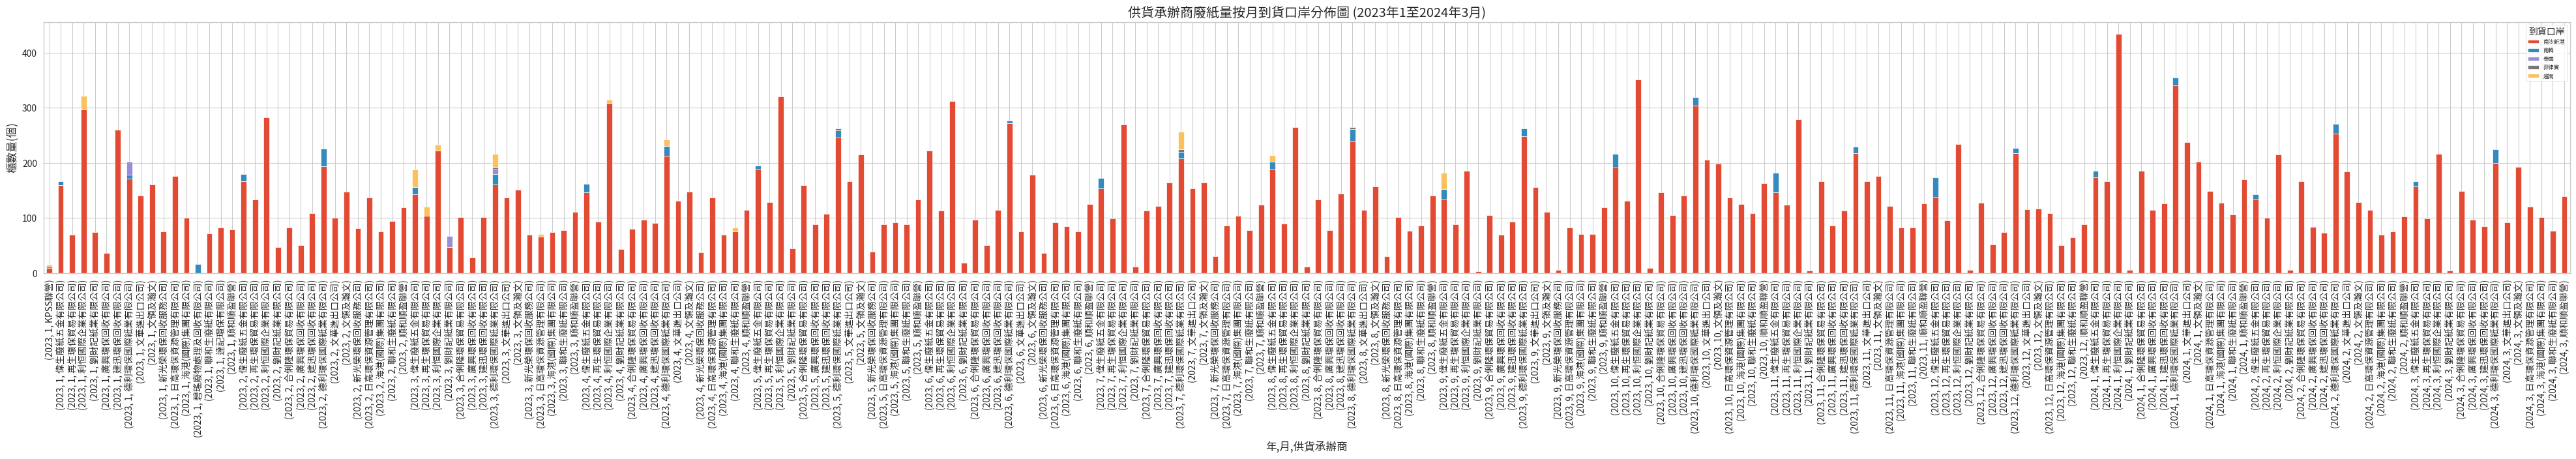

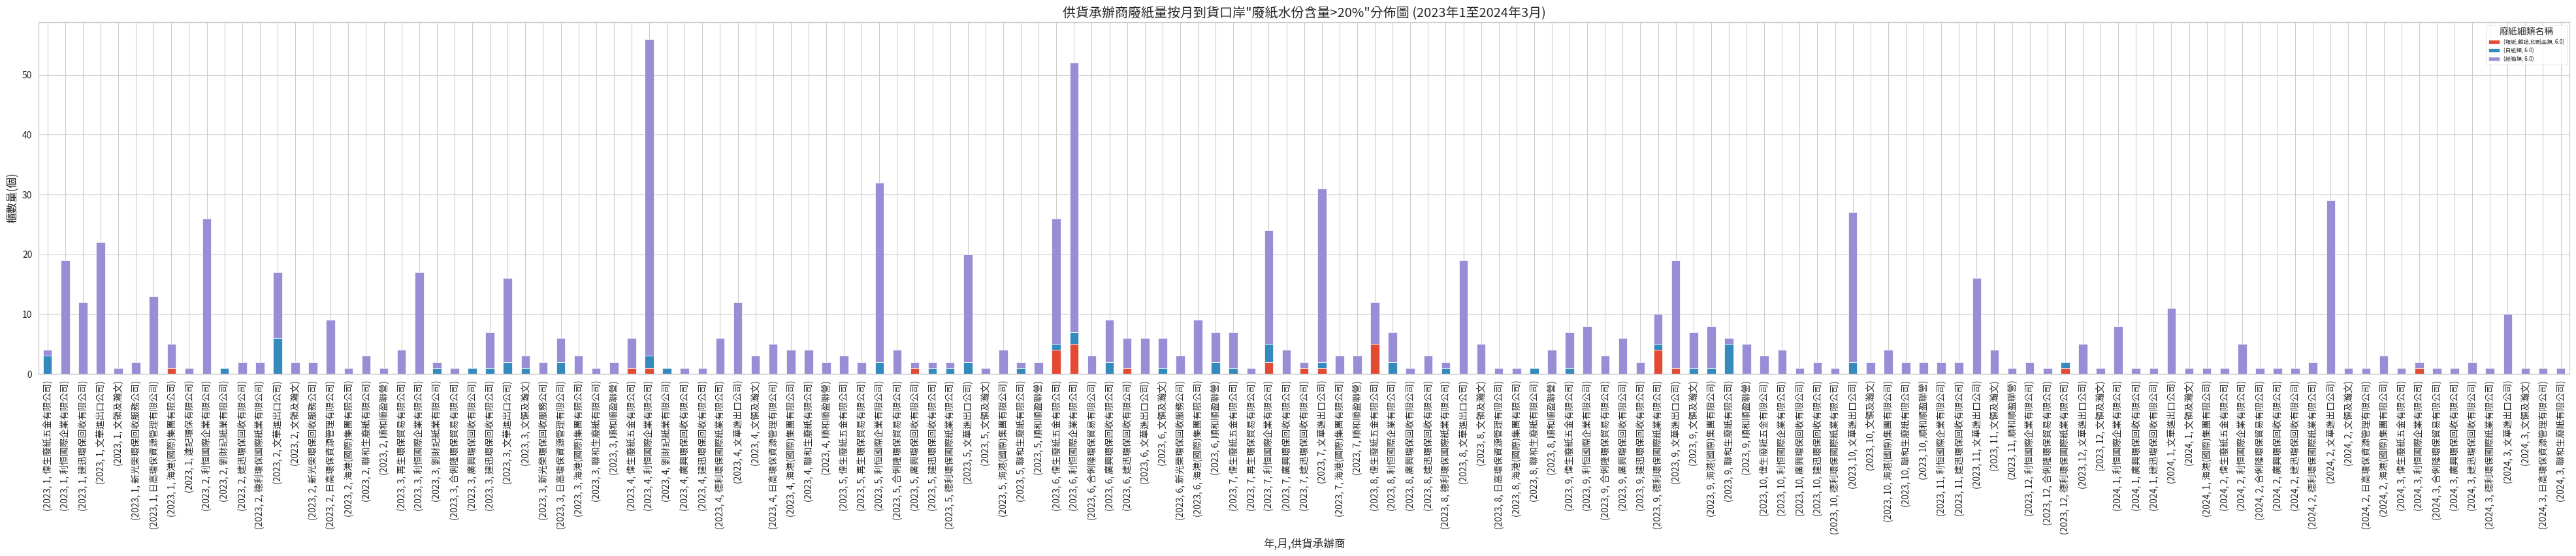

In [ ]:
# 供貨承辦商廢紙量按月到貨口岸分佈(2023年1至2024年3月), 圖示: 1)整體 2) 廢紙水份含量>20%
pd.set_option('display.max_columns', None)
pivot2a = pd.pivot_table(data=df_count1a,
            index=['年','月','供貨承辦商'],
            columns='到貨口岸',
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

pivot2a.plot(kind='bar', stacked=True, figsize=(50,5), title='供貨承辦商廢紙量按月到貨口岸分佈圖 (2023年1至2024年3月)', ylabel='櫃數量(個)')
plt.legend(title='到貨口岸', loc='upper right', fontsize=6)
fig.tight_layout()

df_count1a_1 = df_count1a[df_count1a['水分含量']==6]
pivot2a_1 = pd.pivot_table(data=df_count1a_1,
            index=['年','月','供貨承辦商'],
            columns=['廢紙細類名稱','水分含量'],
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

pivot2a_1.plot(kind='bar', stacked=True, figsize=(50,7), title='供貨承辦商廢紙量按月到貨口岸"廢紙水份含量>20%"分佈圖 (2023年1至2024年3月)', ylabel='櫃數量(個)')
plt.legend(title='廢紙細類名稱', loc='upper right', fontsize=6)
fig.tight_layout()

/tmp/ipython-input-3680132417.py:3: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot2a = pd.pivot_table(data=df_count1a,
/tmp/ipython-input-3680132417.py:16: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot2a_1 = pd.pivot_table(data=df_count1a_1,
/tmp/ipython-input-3680132417.py:33: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot2a_2 = pd.pivot_table(data=df_count1a_1,


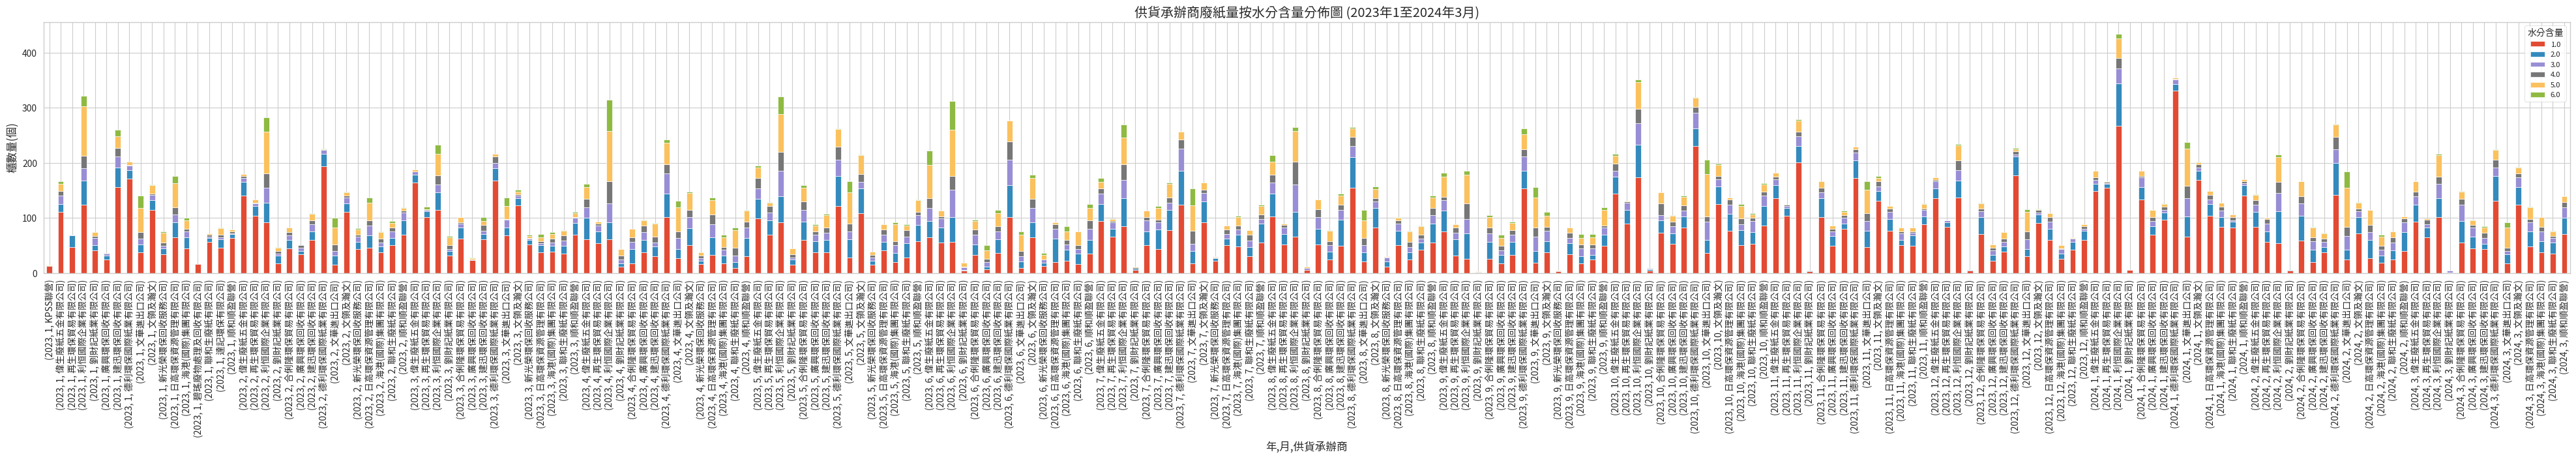

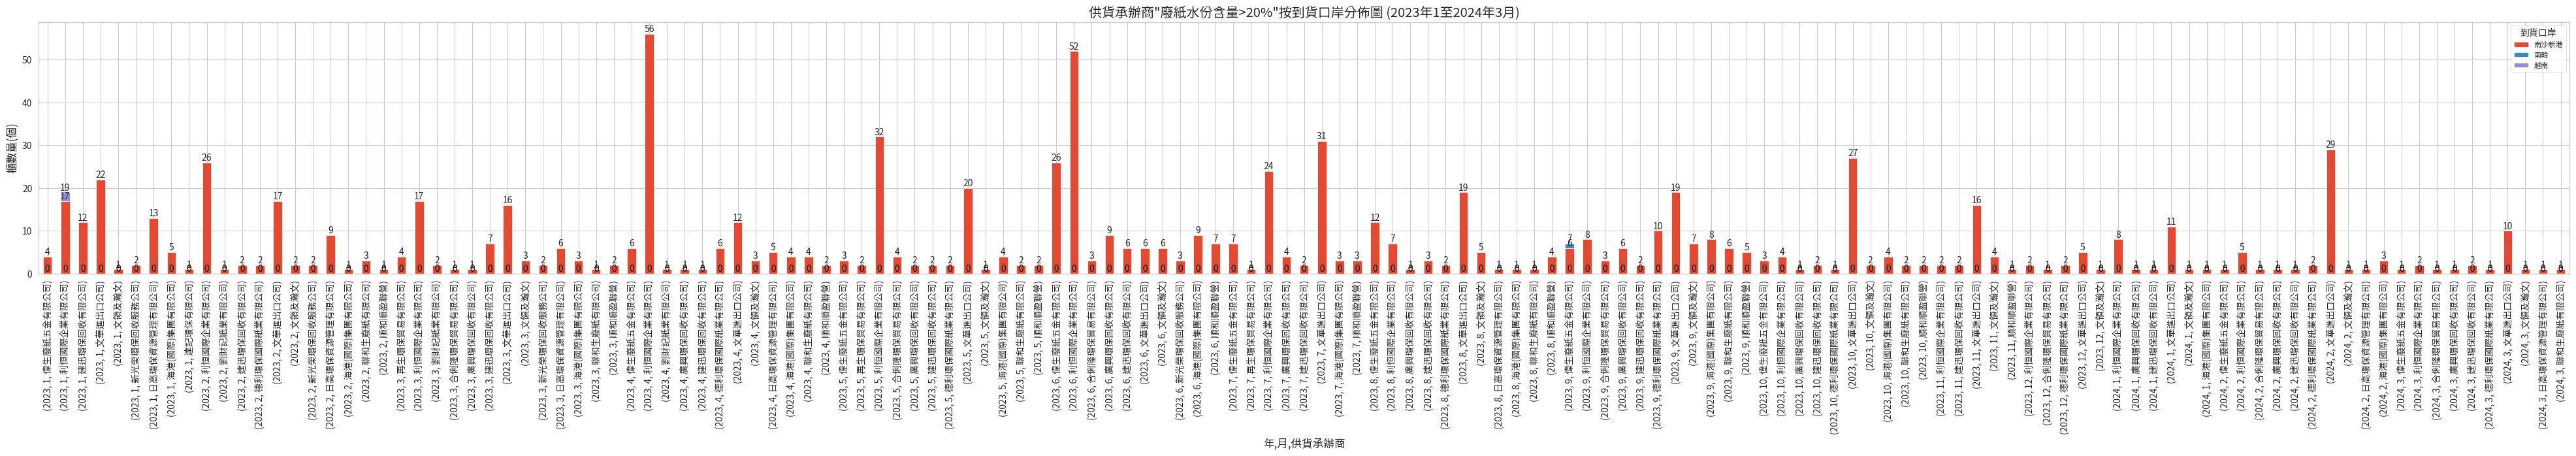

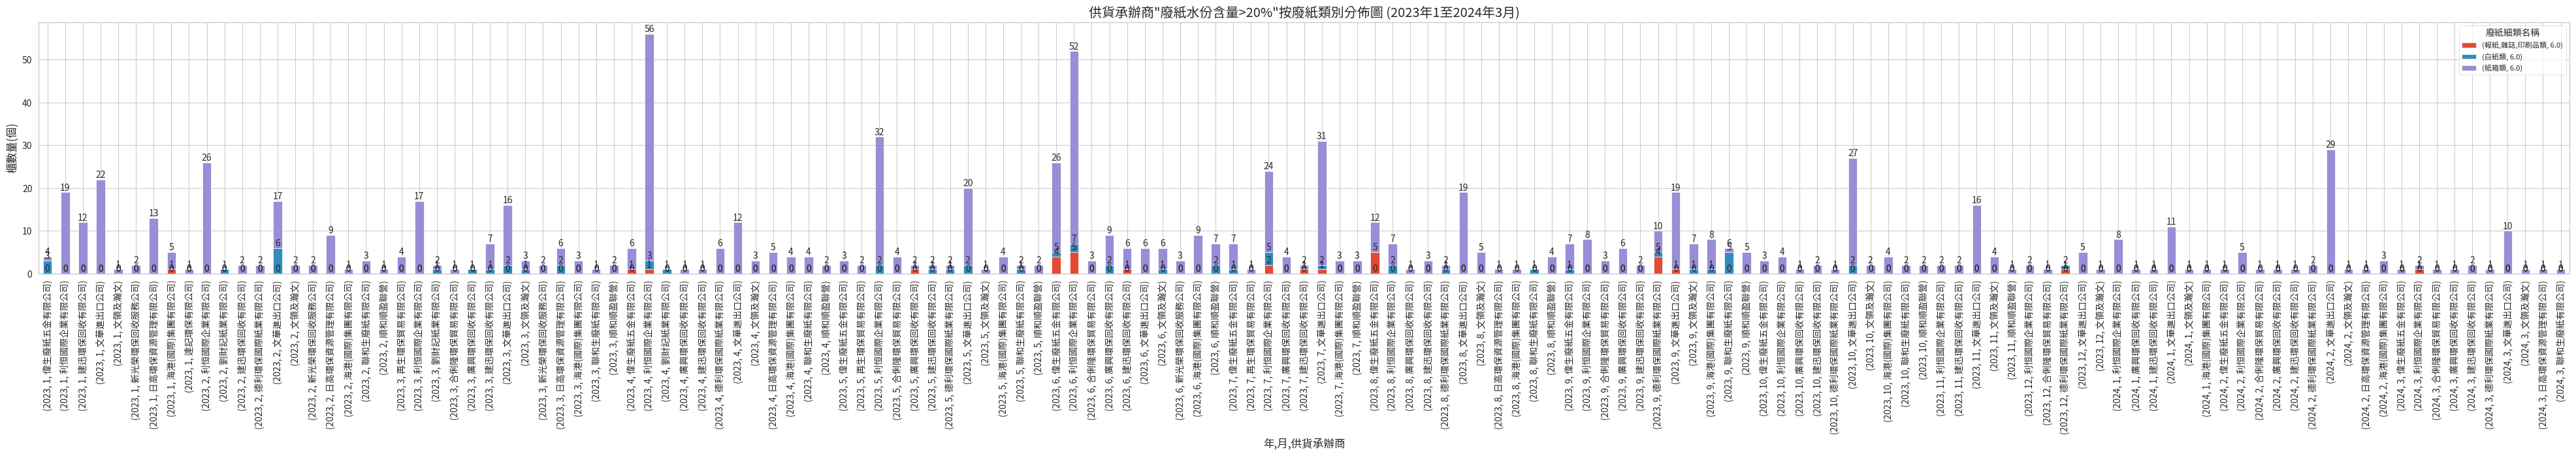

In [ ]:
# 供貨承辦商廢紙量按月到貨口岸分佈(2023年1至2024年3月), 圖示: 1)整體 2) 廢紙水份含量>20%
pd.set_option('display.max_columns', None)
pivot2a = pd.pivot_table(data=df_count1a,
            index=['年','月','供貨承辦商'],
            columns='水分含量',
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

pivot2a.plot(kind='bar', stacked=True, figsize=(50,5), title='供貨承辦商廢紙量按水分含量分佈圖 (2023年1至2024年3月)', ylabel='櫃數量(個)')
plt.legend(title='水分含量', loc='upper right', fontsize=8)
fig.tight_layout()

df_count1a_1 = df_count1a[df_count1a['水分含量']==6]
pivot2a_1 = pd.pivot_table(data=df_count1a_1,
            index=['年','月','供貨承辦商'],
            columns=['到貨口岸'],
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

ax = pivot2a_1.plot(kind='bar', stacked=True, figsize=(50,5), title='供貨承辦商"廢紙水份含量>20%"按到貨口岸分佈圖 (2023年1至2024年3月)', ylabel='櫃數量(個)')

for container in ax.containers:
  ax.bar_label(container)

plt.legend(title='到貨口岸', loc='upper right', fontsize=8)
fig.tight_layout()

df_count1a_1 = df_count1a[df_count1a['水分含量']==6]
pivot2a_2 = pd.pivot_table(data=df_count1a_1,
            index=['年','月','供貨承辦商'],
            columns=['廢紙細類名稱','水分含量'],
            aggfunc=np.sum,
            values='counts',
            fill_value=0
            )

ax = pivot2a_2.plot(kind='bar', stacked=True, figsize=(50,5), title='供貨承辦商"廢紙水份含量>20%"按廢紙類別分佈圖 (2023年1至2024年3月)', ylabel='櫃數量(個)')

for container in ax.containers:
  ax.bar_label(container)

plt.legend(title='廢紙細類名稱', loc='upper right', fontsize=8)
fig.tight_layout()

In [ ]:
# Set up a dataframe 2021 Jan to 2023 June, 廢紙水分含量>20%
df1_merge_67 = df1_merge[df1_merge['水分含量']>=6]
df1_merge_67.shape

(5625, 44)

In [ ]:
df_HR1.columns

Index(['提單日期', 'Humidity (香港_HKO)', 'Rainfall (香港_HKO)', 'Humidity (香港_TM)',
       'Rainfall (香港_TM)', 'Humidity (東莞_玖龍_理文)', 'Rainfall (東莞_玖龍_理文)',
       'Humidity (南沙_海關_廣紙)', 'Rainfall (南沙_海關_廣紙)', 'Humidity (江門_華泰)',
       'Rainfall (江門_華泰)'],
      dtype='object')

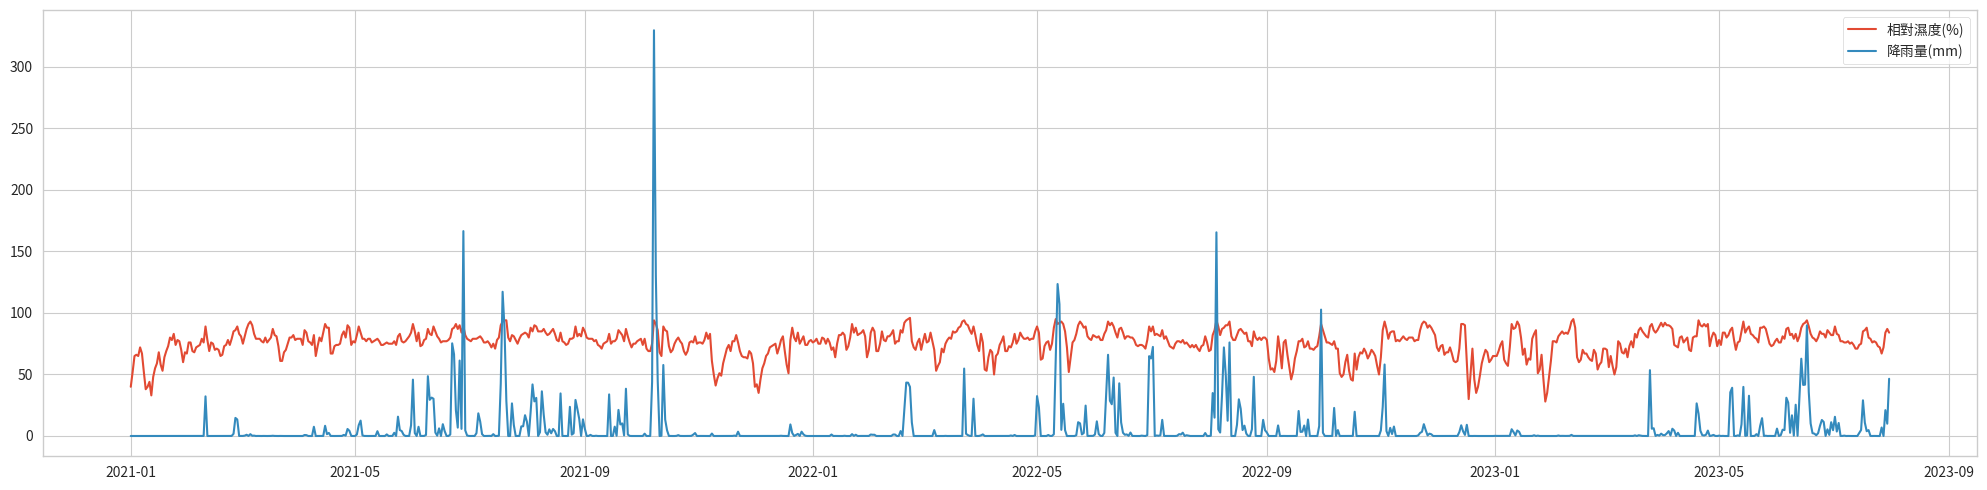

/tmp/ipython-input-130686941.py:19: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot1 = pd.pivot_table(data=df1_merge[df1_merge['水分含量']>=6],


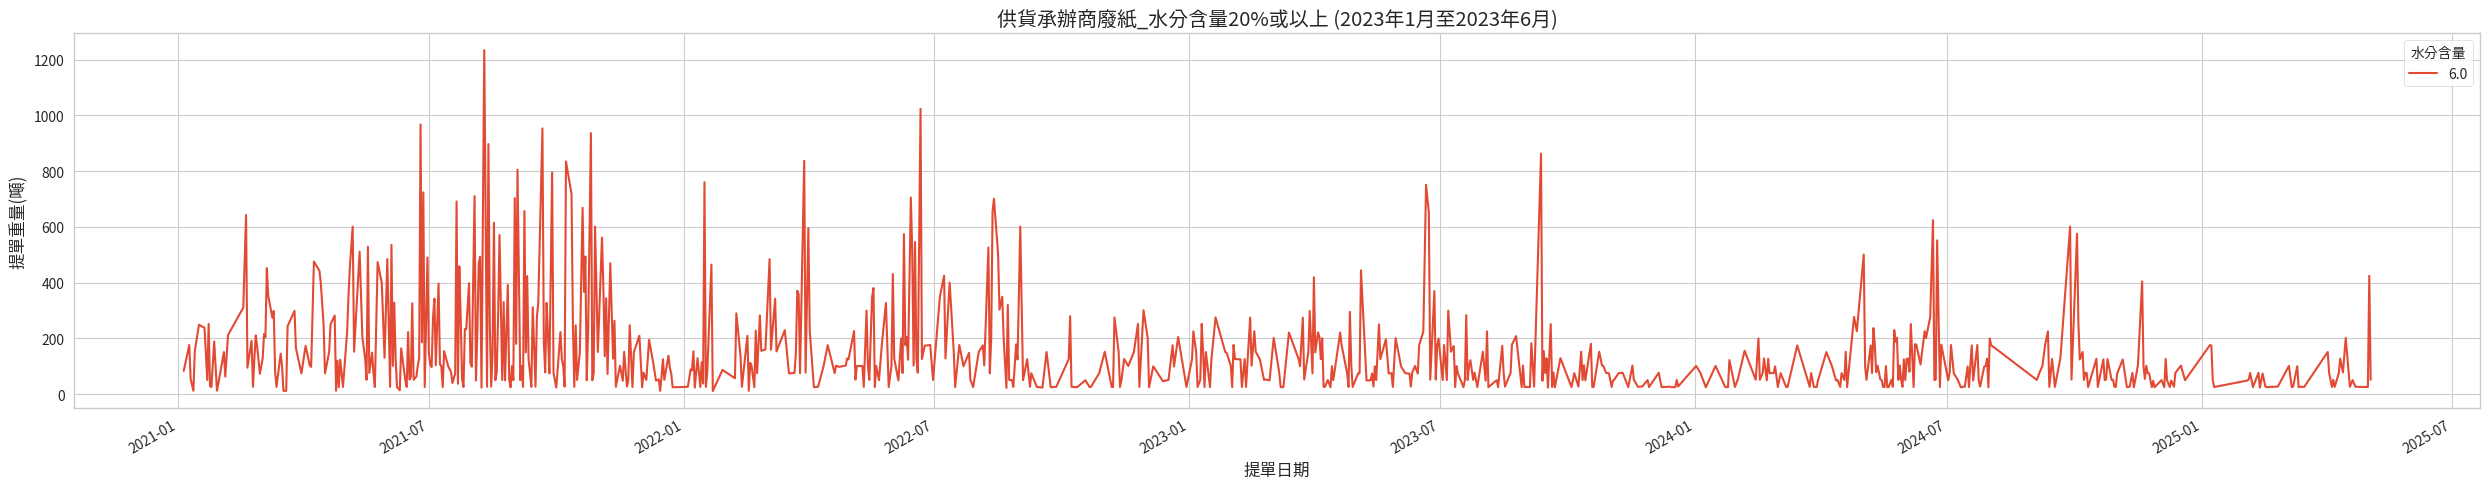

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 5))
ax = plt.plot(df_HR['提單日期'], df_HR['Humidity (香港_HKO)'], label="相對濕度(%)")
ax2 = plt.plot(df_HR['提單日期'], df_HR['Rainfall (香港_HKO)'], label="降雨量(mm)")
plt.legend(loc="upper right")
fig.tight_layout()
plt.show()

from matplotlib import font_manager

fontP = font_manager.FontProperties()
fontP.set_family('SimHei')
fontP.set_size(14)

pd.reset_option('display.max_columns', None)

pivot1 = pd.pivot_table(data=df1_merge[df1_merge['水分含量']>=6],
            index='提單日期',
            columns='水分含量',
            aggfunc=np.sum,
            values='提單重量',
            fill_value=0
            )
fig, ax = plt.subplots(figsize=(25, 5))
pivot1.plot(ax=ax, kind='line', stacked=True, title='供貨承辦商廢紙_水分含量20%或以上 (2023年1月至2023年6月)', ylabel='提單重量(噸)')

#To avoid of an axis line <...> to be shown
fig.tight_layout()

In [ ]:
# A table shows 廢紙(水分含量20%或以上), 其細類的提單重量 from 2021 Jan to 2023 Aug-Sept
pivot = pd.pivot_table(data=df1_merge,
            index=['年','月','供貨承辦商'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='提單重量',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot

/tmp/ipython-input-1395534999.py:2: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df1_merge,
/tmp/ipython-input-1395534999.py:2: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df1_merge,
/tmp/ipython-input-1395534999.py:2: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df1_merge,


廢紙細類名稱                 報紙,雜誌,印刷品類         白紙類          紙箱類          Sum
年    月  供貨承辦商                                                          
2021 1  KPSS聯營              0.000     620.672      419.445     1040.117
        偉生廢紙五金有限公司       1063.180       0.000     3722.140     4785.320
        再生環保貿易有限公司          0.000      74.510     2168.240     2242.750
        利恒國際企業有限公司        796.105     348.300     4734.560     5878.965
        劉財記紙業有限公司           0.000     170.380     1744.210     1914.590
        建迅環保回收有限公司          0.000       0.000     3293.065     3293.065
        德利環保國際紙業有限公司     1419.190    1388.360     3586.890     6394.440
        文華進出口公司          1012.750     668.760     5850.290     7531.800
        文領及瀚文             603.160     743.640     2802.660     4149.460
        新光榮環保回收服務公司         0.000       0.000     1392.610     1392.610
        日高環保資源管理有限公司      340.740     256.800     1781.920     2379.460
        海港(國際)集團有限公司        0.000       0.000     1466.180     1466.180
        碧瑤廢物處理及回收有限公司       0.000     341.710     1501.570     1843.280
        聯和生廢紙有限公司         355.500     528.180      872.300     1755.980
        達記環保有限公司            0.000     210.220      975.440     1185.660
        順和順盈聯營              0.000       0.000     1591.500     1591.500
     2  KPSS聯營              0.000     945.685      892.635     1838.320
        偉生廢紙五金有限公司        843.200     324.850     3295.590     4463.640
        再生環保貿易有限公司          0.000     120.370     1399.780     1520.150
        利恒國際企業有限公司        521.150     781.955     5094.290     6397.395
        劉財記紙業有限公司           0.000     311.150     1273.320     1584.470
        建迅環保回收有限公司          0.000       0.000      815.160      815.160
        德利環保國際紙業有限公司      991.180    1661.630     2836.340     5489.150
        文華進出口公司          1014.040    1211.905     3865.385     6091.330
        文領及瀚文             991.560    1290.450     1649.480     3931.490
        新光榮環保回收服務公司         0.000      94.300      726.490      820.790
        日高環保資源管理有限公司      382.450     346.830      985.060     1714.340
        海港(國際)集團有限公司        0.000     177.065      937.830     1114.895
        碧瑤廢物處理及回收有限公司       0.000     961.730      539.800     1501.530
        聯和生廢紙有限公司         202.950     277.860      802.820     1283.630
        達記環保有限公司            0.000     233.050     1041.200     1274.250
        順和順盈聯營              0.000       0.000      717.620      717.620
     3  KPSS聯營              0.000    1119.055      860.650     1979.705
        偉生廢紙五金有限公司        800.950       0.000     3679.660     4480.610
        再生環保貿易有限公司          0.000     125.310     2328.830     2454.140
        利恒國際企業有限公司        647.965     403.690     6066.910     7118.565
        劉財記紙業有限公司           0.000     373.130     2210.350     2583.480
        建迅環保回收有限公司          0.000      96.950     4785.780     4882.730
        德利環保國際紙業有限公司     1562.580    2697.370     3764.980     8024.930
        文華進出口公司           897.780    1169.450     4446.290     6513.520
        文領及瀚文             659.550     746.650     1840.880     3247.080
        新光榮環保回收服務公司         0.000     234.200     1014.370     1248.570
        日高環保資源管理有限公司      622.170     585.940     1661.810     2869.920
        海港(國際)集團有限公司        0.000     165.500     1046.275     1211.775
        碧瑤廢物處理及回收有限公司       0.000    1360.030     1065.990     2426.020
        聯和生廢紙有限公司         251.230     305.150     1505.460     2061.840
        達記環保有限公司            0.000     314.770     1193.750     1508.520
        順和順盈聯營              0.000       0.000     2049.000     2049.000
     4  KPSS聯營              0.000     682.615      103.955      786.570
        偉生廢紙五金有限公司       1204.370       0.000     3746.150     4950.520
        再生環保貿易有限公司          0.000      74.050     1049.670     1123.720
        利恒國際企業有限公司        470.405     200.780     4462.155     5133.340
        劉財記紙業有限公司           0.000     326.560     1324.730     1651.290
        建迅環保回收有限公司        521.500     15

/tmp/ipython-input-4251122632.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_文華,
/tmp/ipython-input-4251122632.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_文華,
/tmp/ipython-input-4251122632.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_文華,
/tmp/ipython-input-4251122632.p

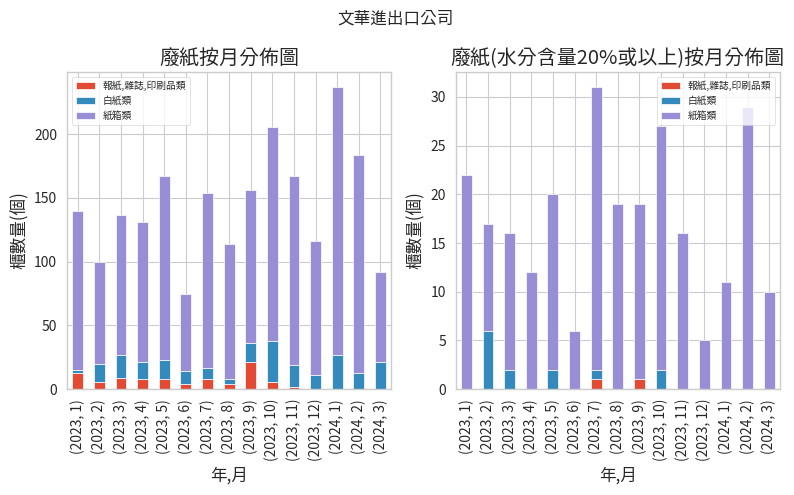

In [ ]:
# 文華進出口公司

df_文華 = df_count1a[df_count1a['供貨承辦商'] == '文華進出口公司']
df_文華67 = df_文華[df_文華['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('文華進出口公司')


pivot_test1 = pd.pivot_table(data=df_文華,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper left",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_文華67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper right",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-3603930824.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_文領及瀚文,
/tmp/ipython-input-3603930824.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_文領及瀚文,
/tmp/ipython-input-3603930824.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_文領及瀚文,
/tmp/ipython-input-360

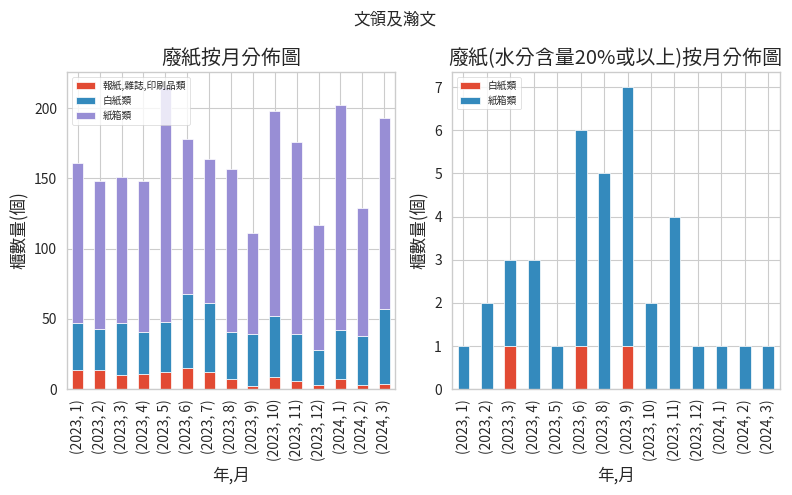

In [ ]:
# 文領及瀚文

df_文領及瀚文 = df_count1a[df_count1a['供貨承辦商'] == '文領及瀚文']
df_文領及瀚文67 = df_文領及瀚文[df_文領及瀚文['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('文領及瀚文')


pivot_test1 = pd.pivot_table(data=df_文領及瀚文,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper left",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_文領及瀚文67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-3999838669.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_日高,
/tmp/ipython-input-3999838669.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_日高,
/tmp/ipython-input-3999838669.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_日高,
/tmp/ipython-input-3999838669.p

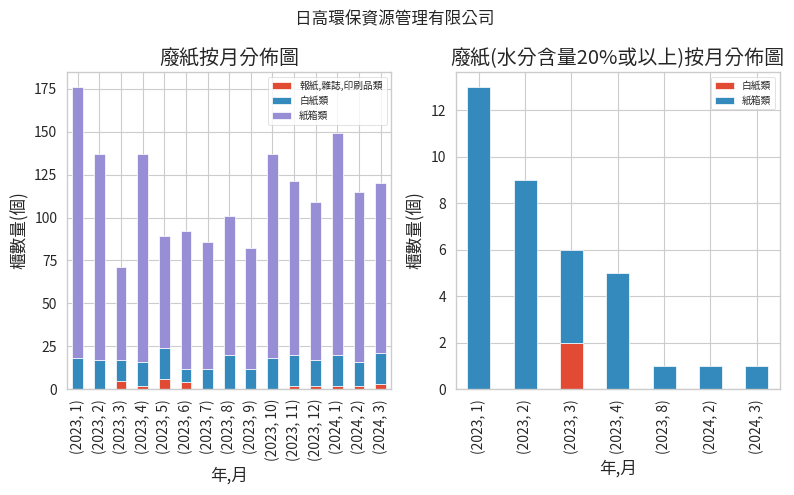

In [ ]:
# 日高環保資源管理有限公司

df_日高 = df_count1a[df_count1a['供貨承辦商'] == '日高環保資源管理有限公司']
df_日高67 = df_日高[df_日高['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('日高環保資源管理有限公司')


pivot_test1 = pd.pivot_table(data=df_日高,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_日高67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper right",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-1182244898.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_再生,
/tmp/ipython-input-1182244898.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_再生,
/tmp/ipython-input-1182244898.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_再生,
/tmp/ipython-input-1182244898.p

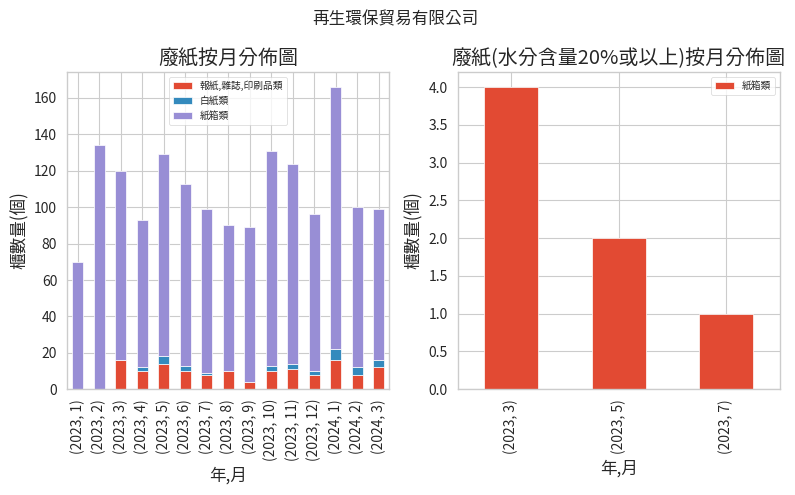

In [ ]:
# 再生環保貿易有限公司

df_再生 = df_count1a[df_count1a['供貨承辦商'] == '再生環保貿易有限公司']
df_再生67 = df_再生[df_再生['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('再生環保貿易有限公司')


pivot_test1 = pd.pivot_table(data=df_再生,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper center",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_再生67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper right",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-902865183.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_合俐隆,
/tmp/ipython-input-902865183.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_合俐隆,
/tmp/ipython-input-902865183.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_合俐隆,
/tmp/ipython-input-902865183.py

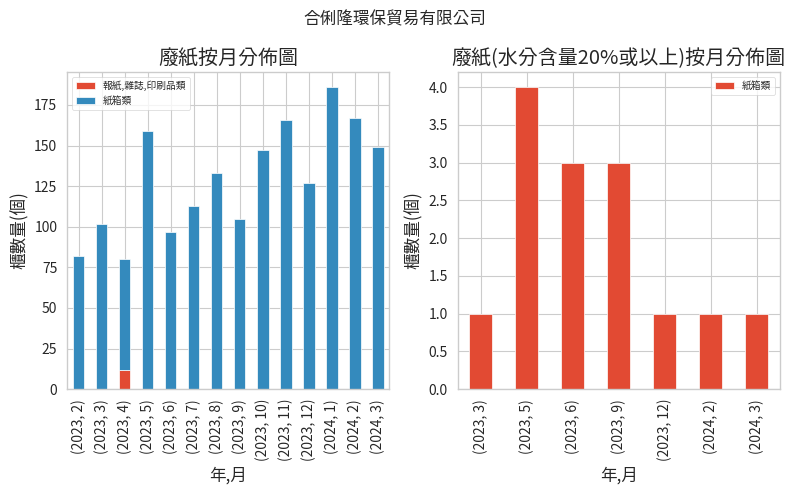

In [ ]:
# 合俐隆環保貿易有限公司

df_合俐隆 = df_count1a[df_count1a['供貨承辦商'] == '合俐隆環保貿易有限公司']
df_合俐隆67 = df_合俐隆[df_合俐隆['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('合俐隆環保貿易有限公司')


pivot_test1 = pd.pivot_table(data=df_合俐隆,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper left",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_合俐隆67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper right",fontsize=7)
p_plot2
fig.tight_layout()

In [ ]:
df_count1a['供貨承辦商'].unique()

array(['碧瑤廢物處理及回收有限公司', '利恒國際企業有限公司', 'KPSS聯營', '建迅環保回收有限公司', '文領及瀚文',
       '劉財記紙業有限公司', '新光榮環保回收服務公司', '達記環保有限公司', '海港(國際)集團有限公司',
       '日高環保資源管理有限公司', '文華進出口公司', '再生環保貿易有限公司', '廣興環保回收有限公司',
       '德利環保國際紙業有限公司', '偉生廢紙五金有限公司', '順和順盈聯營', '聯和生廢紙有限公司', '合俐隆環保貿易有限公司'],
      dtype=object)

/tmp/ipython-input-2113748709.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_利恆,
/tmp/ipython-input-2113748709.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_利恆,
/tmp/ipython-input-2113748709.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_利恆,
/tmp/ipython-input-2113748709.p

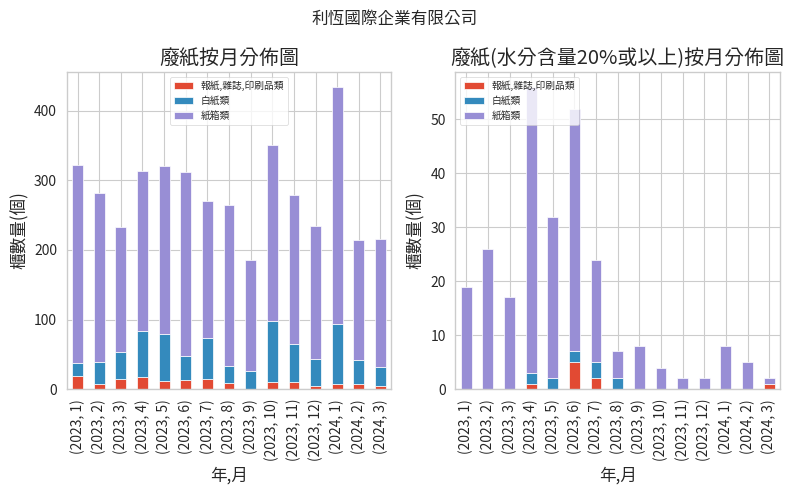

In [ ]:
# 利恆國際企業有限公司

df_利恆 = df_count1a[df_count1a['供貨承辦商'] == '利恒國際企業有限公司']
df_利恆67 = df_利恆[df_利恆['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('利恆國際企業有限公司')


pivot_test1 = pd.pivot_table(data=df_利恆,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper center",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_利恆67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-3616374565.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_建迅,
/tmp/ipython-input-3616374565.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_建迅,
/tmp/ipython-input-3616374565.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_建迅,
/tmp/ipython-input-3616374565.p

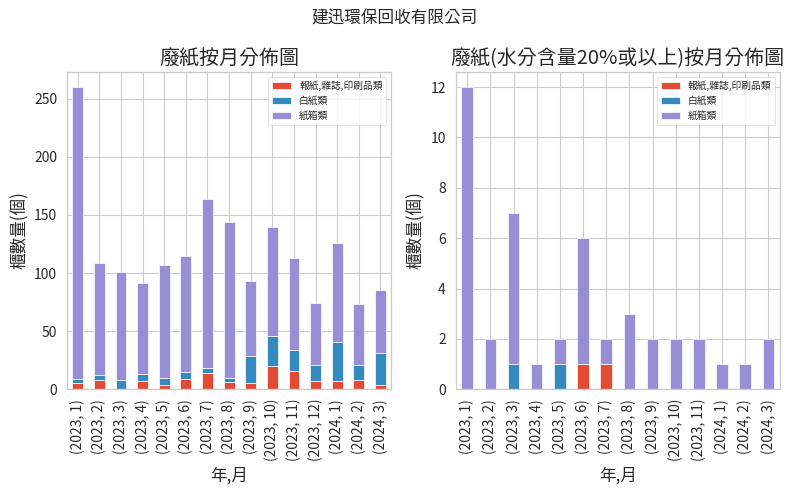

In [ ]:
# 建迅環保回收有限公司

df_建迅 = df_count1a[df_count1a['供貨承辦商'] == '建迅環保回收有限公司']
df_建迅67 = df_建迅[df_建迅['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('建迅環保回收有限公司')


pivot_test1 = pd.pivot_table(data=df_建迅,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_建迅67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper right",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-768056378.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_海港,
/tmp/ipython-input-768056378.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_海港,
/tmp/ipython-input-768056378.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_海港,
/tmp/ipython-input-768056378.py:27

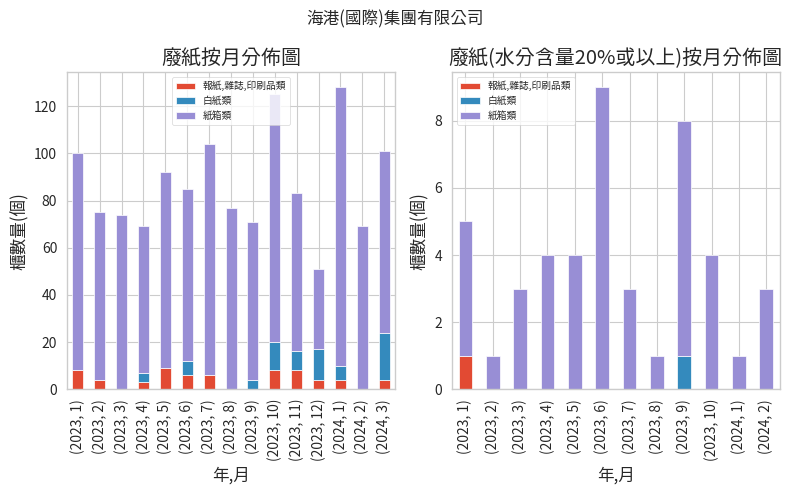

In [ ]:
# 海港(國際)集團有限公司

df_海港 = df_count1a[df_count1a['供貨承辦商'] == '海港(國際)集團有限公司']
df_海港67 = df_海港[df_海港['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('海港(國際)集團有限公司')


pivot_test1 = pd.pivot_table(data=df_海港,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper center",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_海港67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-1009245984.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_偉生,
/tmp/ipython-input-1009245984.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_偉生,
/tmp/ipython-input-1009245984.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_偉生,
/tmp/ipython-input-1009245984.p

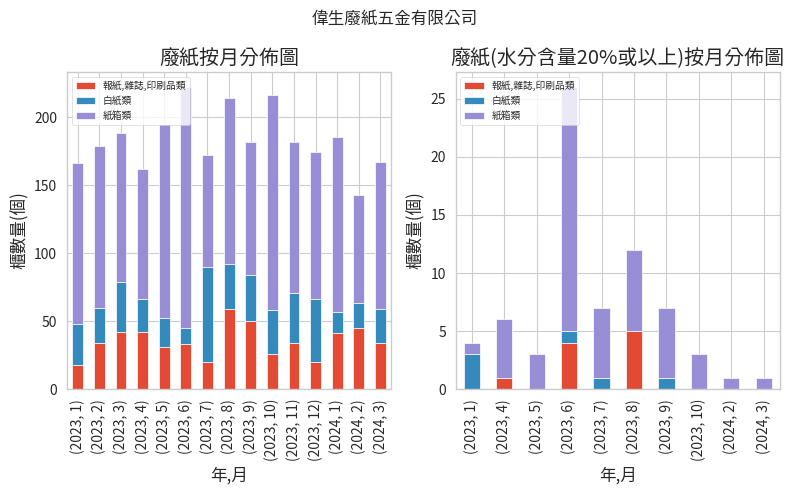

In [ ]:
# 偉生廢紙五金有限公司

df_偉生 = df_count1a[df_count1a['供貨承辦商'] == '偉生廢紙五金有限公司']
df_偉生67 = df_偉生[df_偉生['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('偉生廢紙五金有限公司')


pivot_test1 = pd.pivot_table(data=df_偉生,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper left",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_偉生67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-1518237194.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_順和順盈,
/tmp/ipython-input-1518237194.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_順和順盈,
/tmp/ipython-input-1518237194.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_順和順盈,
/tmp/ipython-input-151823

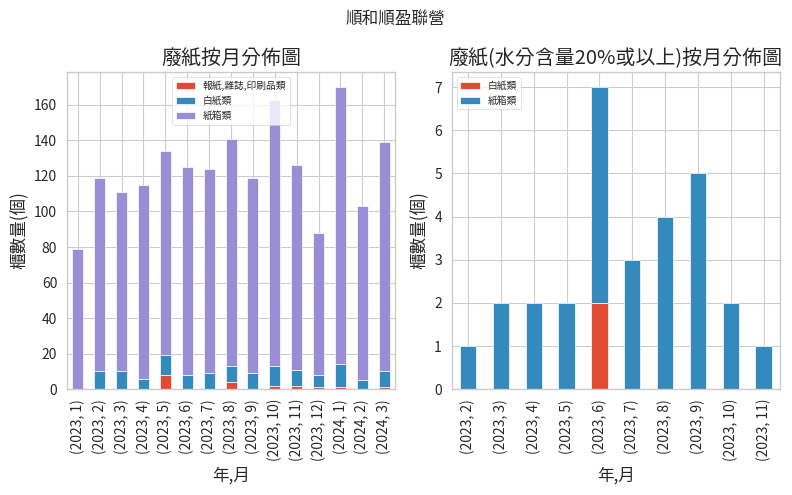

In [ ]:
# 順和順盈聯營

df_順和順盈 = df_count1a[df_count1a['供貨承辦商'] == '順和順盈聯營']
df_順和順盈67 = df_順和順盈[df_順和順盈['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('順和順盈聯營')


pivot_test1 = pd.pivot_table(data=df_順和順盈,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper center",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_順和順盈67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-285715830.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_新光榮,
/tmp/ipython-input-285715830.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_新光榮,
/tmp/ipython-input-285715830.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_新光榮,
/tmp/ipython-input-285715830.py

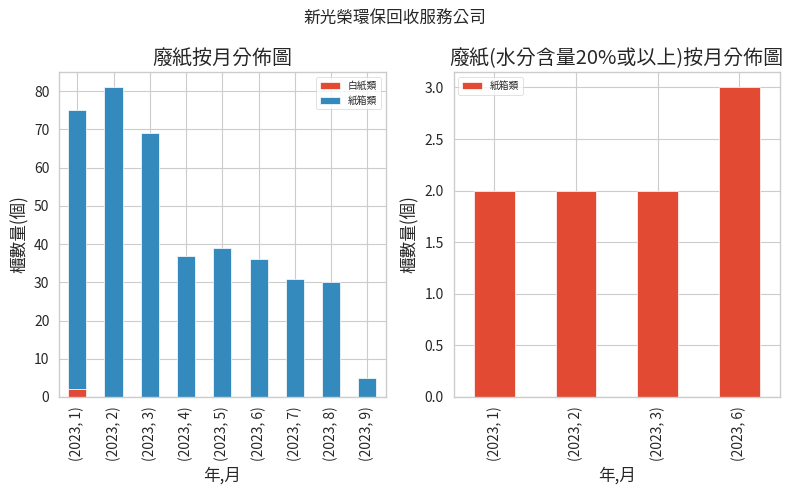

In [ ]:
# 新光榮環保回收有限公司

df_新光榮 = df_count1a[df_count1a['供貨承辦商'] == '新光榮環保回收服務公司']
df_新光榮67 = df_新光榮[df_新光榮['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('新光榮環保回收服務公司')


pivot_test1 = pd.pivot_table(data=df_新光榮,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_新光榮67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-1731938660.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_劉財記,
/tmp/ipython-input-1731938660.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_劉財記,
/tmp/ipython-input-1731938660.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_劉財記,
/tmp/ipython-input-173193866

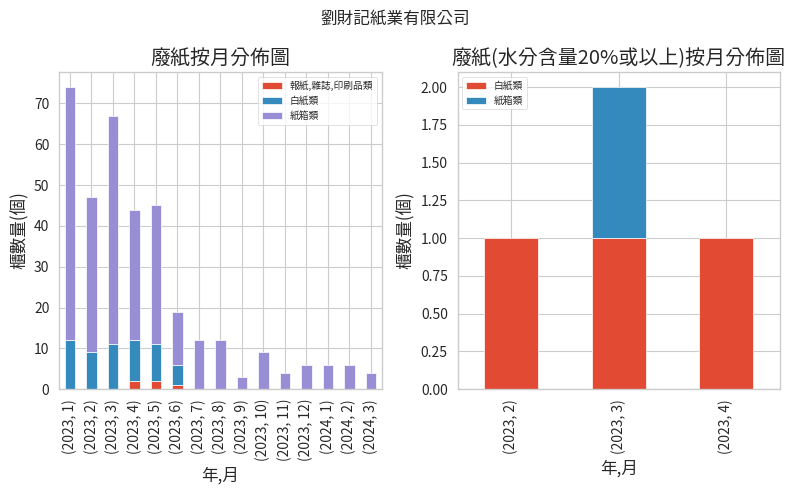

In [ ]:
# 劉財記紙業有限公司

df_劉財記 = df_count1a[df_count1a['供貨承辦商'] == '劉財記紙業有限公司']
df_劉財記67 = df_劉財記[df_劉財記['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('劉財記紙業有限公司')


pivot_test1 = pd.pivot_table(data=df_劉財記,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_劉財記67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

In [ ]:
df1_merge['供貨承辦商'].unique()

array(['文領及瀚文', '再生環保貿易有限公司', 'KPSS聯營', '德利環保國際紙業有限公司', '利恒國際企業有限公司',
       '聯和生廢紙有限公司', '日高環保資源管理有限公司', '偉生廢紙五金有限公司', '文華進出口公司',
       '碧瑤廢物處理及回收有限公司', '達記環保有限公司', '海港(國際)集團有限公司', '建迅環保回收有限公司',
       '劉財記紙業有限公司', '順和順盈聯營', '新光榮環保回收服務公司', '凱柏環保回收有限公司', '廣興環保回收有限公司',
       '資訊機密處理有限公司', '新毅國際企業有限公司', '合俐隆環保貿易有限公司'], dtype=object)

/tmp/ipython-input-444604044.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_廣興,
/tmp/ipython-input-444604044.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_廣興,
/tmp/ipython-input-444604044.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_廣興,
/tmp/ipython-input-444604044.py:27

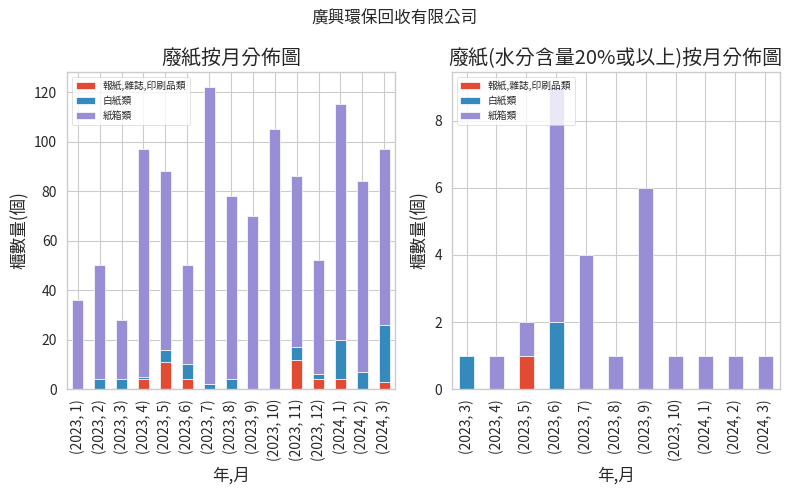

In [ ]:
# 廣興環保回收有限公司

df_廣興 = df_count1a[df_count1a['供貨承辦商'] == '廣興環保回收有限公司']
df_廣興67 = df_廣興[df_廣興['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('廣興環保回收有限公司')


pivot_test1 = pd.pivot_table(data=df_廣興,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper left",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_廣興67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-3553937133.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_劉財記,
/tmp/ipython-input-3553937133.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_劉財記,
/tmp/ipython-input-3553937133.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_劉財記,
/tmp/ipython-input-355393713

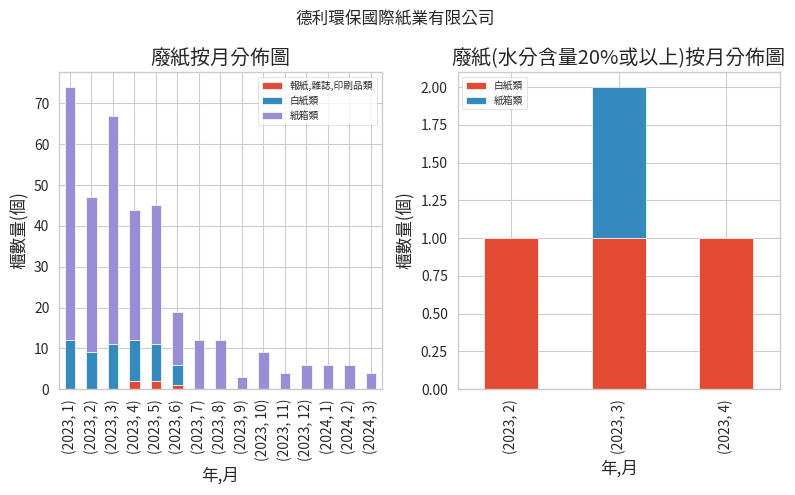

In [ ]:
# 德利環保國際紙業有限公司

df_德利 = df_count1a[df_count1a['供貨承辦商'] == '德利環保國際紙業有限公司']
df_德利67 = df_德利[df_德利['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('德利環保國際紙業有限公司')


pivot_test1 = pd.pivot_table(data=df_劉財記,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_劉財記67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-132547989.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_聯和生,
/tmp/ipython-input-132547989.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_聯和生,
/tmp/ipython-input-132547989.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_聯和生,
/tmp/ipython-input-132547989.py

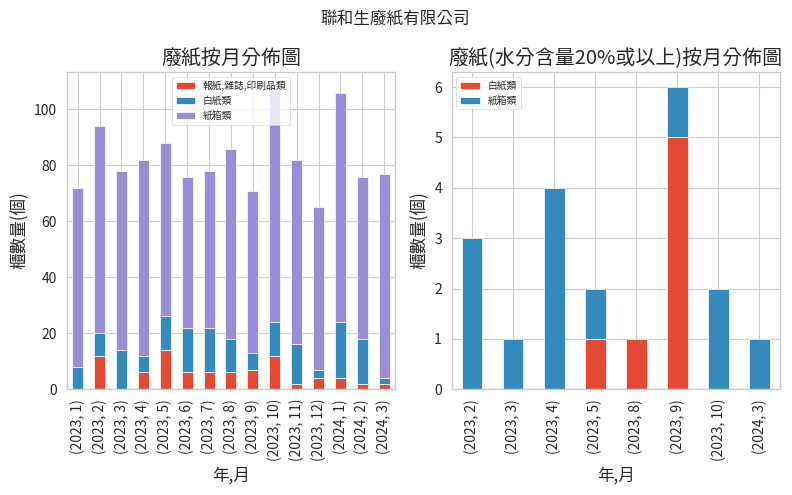

In [ ]:
# 聯和生廢紙有限公司

df_聯和生 = df_count1a[df_count1a['供貨承辦商'] == '聯和生廢紙有限公司']
df_聯和生67 = df_聯和生[df_聯和生['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('聯和生廢紙有限公司')


pivot_test1 = pd.pivot_table(data=df_聯和生,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper center",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_聯和生67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-3691971314.py:12: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_達記,
/tmp/ipython-input-3691971314.py:12: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_達記,
/tmp/ipython-input-3691971314.py:12: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_達記,
/tmp/ipython-input-3691971314.p

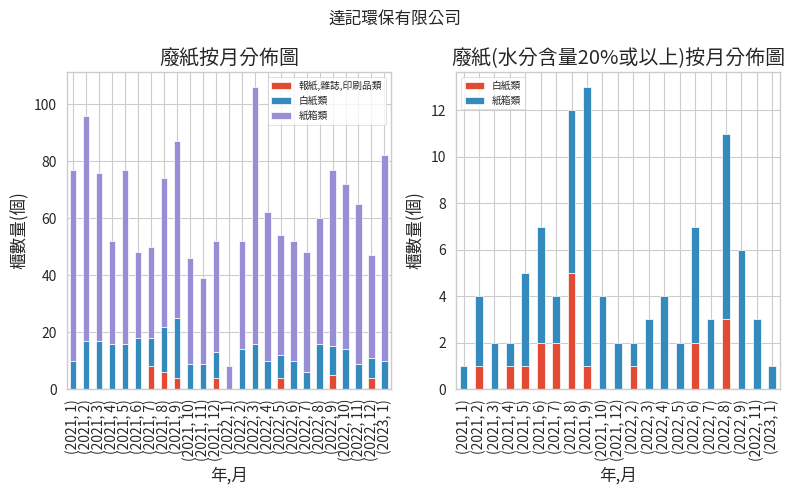

In [ ]:
# 達記環保有限公司	(2021 Jan - 2023 Jan) Out of the contractor list

df1_merge_1a = df1_merge.groupby(['年', '月', '提單日期', '提單重量', '供貨承辦商', '申請公司', '到貨口岸', '廢紙細類名稱', '水分含量']).size().reset_index(name='counts')

df_達記 = df1_merge_1a[df1_merge_1a['供貨承辦商'] == '達記環保有限公司']
df_達記67 = df_達記[df_達記['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('達記環保有限公司')


pivot_test1 = pd.pivot_table(data=df_達記,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_達記67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-1579535770.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_KPSS,
/tmp/ipython-input-1579535770.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_KPSS,
/tmp/ipython-input-1579535770.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_KPSS,
/tmp/ipython-input-157953

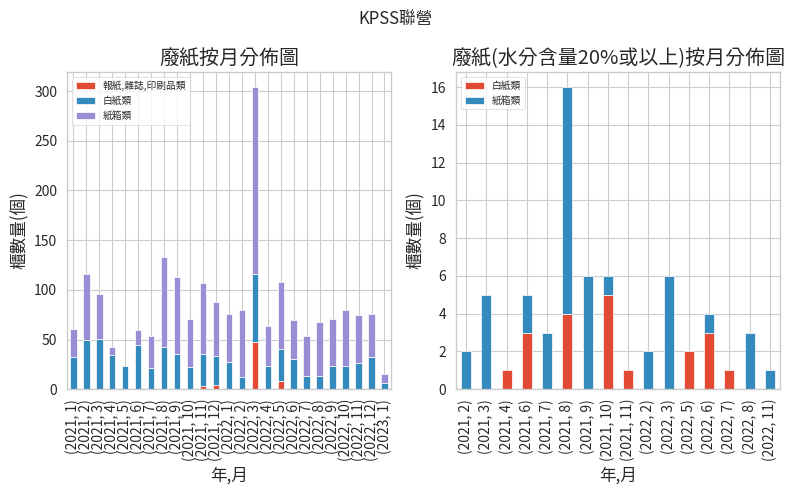

In [ ]:
# KPSS聯營	(2021 Jan - 2023 Jan) Out of the contractor list

df_KPSS = df1_merge_1a[df1_merge_1a['供貨承辦商'] == 'KPSS聯營']
df_KPSS67 = df_KPSS[df_KPSS['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('KPSS聯營')


pivot_test1 = pd.pivot_table(data=df_KPSS,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper left",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_KPSS67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-285391013.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_碧瑤,
/tmp/ipython-input-285391013.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_碧瑤,
/tmp/ipython-input-285391013.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_碧瑤,
/tmp/ipython-input-285391013.py:27

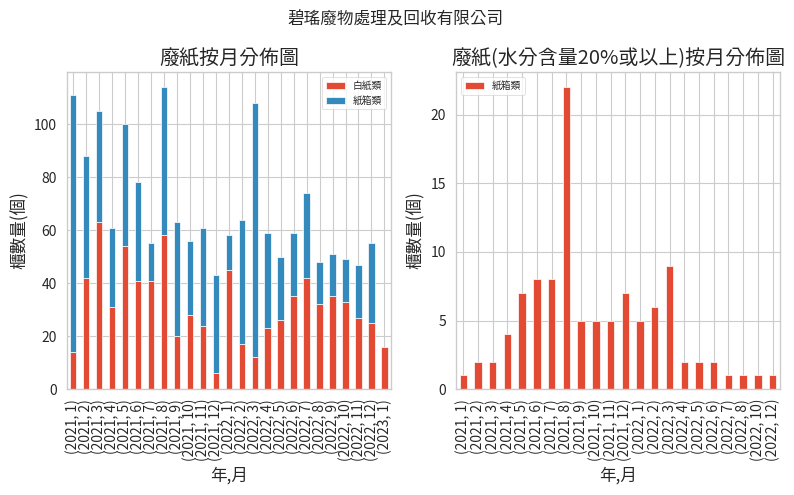

In [ ]:
# 碧瑤廢物處理及回收有限公司	(2021 Jan - 2023 Jan) Out of the contractor list

df_碧瑤 = df1_merge_1a[df1_merge_1a['供貨承辦商'] == '碧瑤廢物處理及回收有限公司']
df_碧瑤67 = df_碧瑤[df_碧瑤['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('碧瑤廢物處理及回收有限公司')


pivot_test1 = pd.pivot_table(data=df_碧瑤,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

pivot_test2 = pd.pivot_table(data=df_碧瑤67,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test2
pivot_test2 = pivot_test2.drop('Sum', axis=1)
pivot_test2 = pivot_test2.drop('Sum', axis=0)
p_plot2 = pivot_test2.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙(水分含量20%或以上)按月分佈圖', ylabel='櫃數量(個)', ax=ax2)
p_plot2.legend(loc="upper left",fontsize=7)
p_plot2
fig.tight_layout()

/tmp/ipython-input-1874656660.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_凱柏,
/tmp/ipython-input-1874656660.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_凱柏,
/tmp/ipython-input-1874656660.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_凱柏,


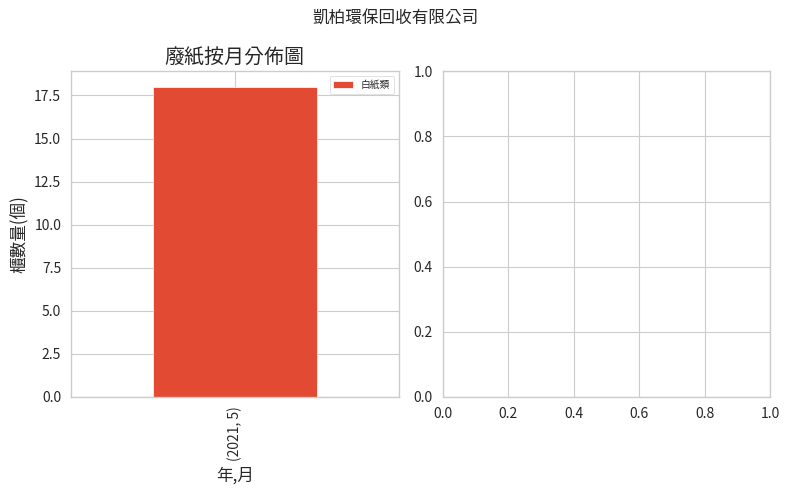

In [ ]:
# 凱柏環保回收有限公司	(2021 Jan - 2022 Dec) Out of the contractor list

df_凱柏 = df1_merge_1a[df1_merge_1a['供貨承辦商'] == '凱柏環保回收有限公司']
df_凱柏67 = df_凱柏[df_凱柏['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('凱柏環保回收有限公司')


pivot_test1 = pd.pivot_table(data=df_凱柏,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()


In [ ]:
df_凱柏

年  月       提單日期    提單重量       供貨承辦商        申請公司  到貨口岸 廢紙細類名稱  水分含量  \
10418  2021  5 2021-05-05  10.430  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
10450  2021  5 2021-05-05  11.315  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
10469  2021  5 2021-05-05  11.452  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   2.0   
10471  2021  5 2021-05-05  11.461  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
10492  2021  5 2021-05-05  11.680  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   2.0   
10514  2021  5 2021-05-05  11.875  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   2.0   
11092  2021  5 2021-05-12  10.860  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   2.0   
11122  2021  5 2021-05-12  11.500  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   3.0   
11504  2021  5 2021-05-14  11.030  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
11524  2021  5 2021-05-14  11.470  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
11533  2021  5 2021-05-14  11.625  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   3.0   
11549  2021  5 2021-05-14  11.885  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   4.0   
12202  2021  5 2021-05-21  24.550  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
12483  2021  5 2021-05-25  24.870  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
12657  2021  5 2021-05-28  10.980  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   2.0   
12680  2021  5 2021-05-28  11.380  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
12682  2021  5 2021-05-28  11.395  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   2.0   
12686  2021  5 2021-05-28  11.440  凱柏環保回收有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   

       counts  
10418       1  
10450       1  
10469       1  
10471       1  
10492       1  
10514       1  
11092       1  
11122       1  
11504       1  
11524       1  
11533       1  
11549       1  
12202       1  
12483       1  
12657       1  
12680       1  
12682       1  
12686       1

/tmp/ipython-input-2681223987.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_資訊機密,
/tmp/ipython-input-2681223987.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_資訊機密,
/tmp/ipython-input-2681223987.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_資訊機密,


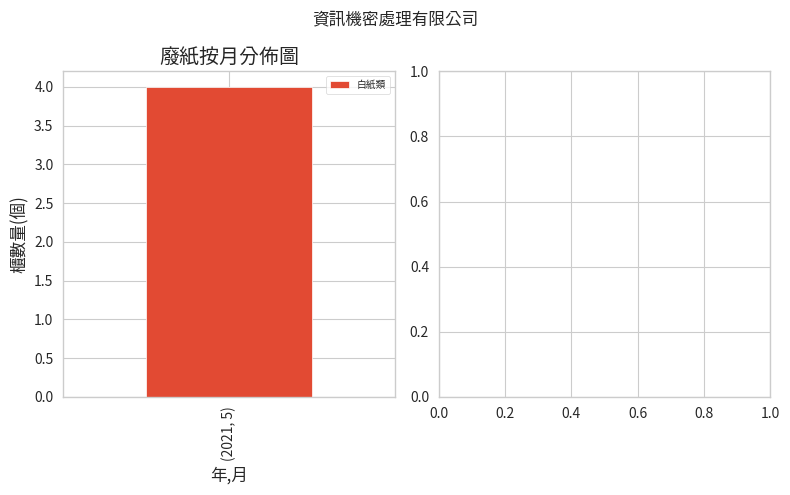

In [ ]:
# 資訊機密處理有限公司	(2021 Jan - 2022 Dec) Out of the contractor list

df_資訊機密 = df1_merge_1a[df1_merge_1a['供貨承辦商'] == '資訊機密處理有限公司']
df_資訊機密67 = df_資訊機密[df_資訊機密['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('資訊機密處理有限公司')


pivot_test1 = pd.pivot_table(data=df_資訊機密,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

In [ ]:
df_資訊機密

年  月       提單日期   提單重量       供貨承辦商        申請公司  到貨口岸 廢紙細類名稱  水分含量  \
10640  2021  5 2021-05-05  24.40  資訊機密處理有限公司  香港中南貿易有限公司  南沙新港    白紙類   1.0   
10646  2021  5 2021-05-05  24.85  資訊機密處理有限公司  香港中南貿易有限公司  南沙新港    白紙類   3.0   
10658  2021  5 2021-05-05  25.21  資訊機密處理有限公司  香港中南貿易有限公司  南沙新港    白紙類   3.0   
10666  2021  5 2021-05-05  25.47  資訊機密處理有限公司  香港中南貿易有限公司  南沙新港    白紙類   2.0   

       counts  
10640       1  
10646       1  
10658       1  
10666       1

/tmp/ipython-input-2145025993.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_新毅國際,
/tmp/ipython-input-2145025993.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_新毅國際,
/tmp/ipython-input-2145025993.py:10: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_test1 = pd.pivot_table(data=df_新毅國際,


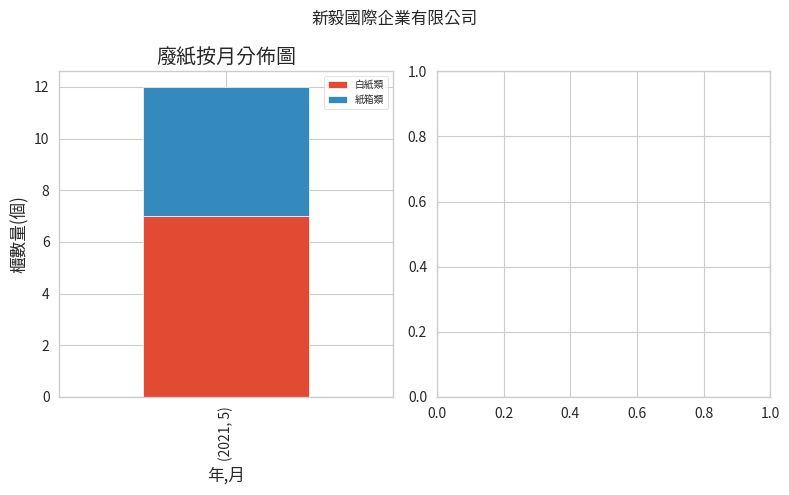

In [ ]:
# 新毅國際企業有限公司	(2021 Jan - 2022 Dec)

df_新毅國際 = df1_merge_1a[df1_merge_1a['供貨承辦商'] == '新毅國際企業有限公司']
df_新毅國際67 = df_新毅國際[df_新毅國際['水分含量']>=6]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('新毅國際企業有限公司')


pivot_test1 = pd.pivot_table(data=df_新毅國際,
            index=['年','月'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='counts',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot_test1
pivot_test1 = pivot_test1.drop('Sum', axis=1)
pivot_test1 = pivot_test1.drop('Sum', axis=0)
p_plot1 = pivot_test1.plot(kind='bar', stacked=True, figsize=(8,5), title='廢紙按月分佈圖', ylabel='櫃數量(個)', ax=ax1)
p_plot1.legend(loc="upper right",fontsize=7)
p_plot1
fig.tight_layout()

/tmp/ipython-input-1524066141.py:2: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df1a[df1a['水分含量']>=0],
/tmp/ipython-input-1524066141.py:2: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df1a[df1a['水分含量']>=0],
/tmp/ipython-input-1524066141.py:2: FutureWarning: The provided callable <function sum at 0x7b120c580b80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot = pd.pivot_table(data=df1a[df1a['水分含量']>=0],
/tmp

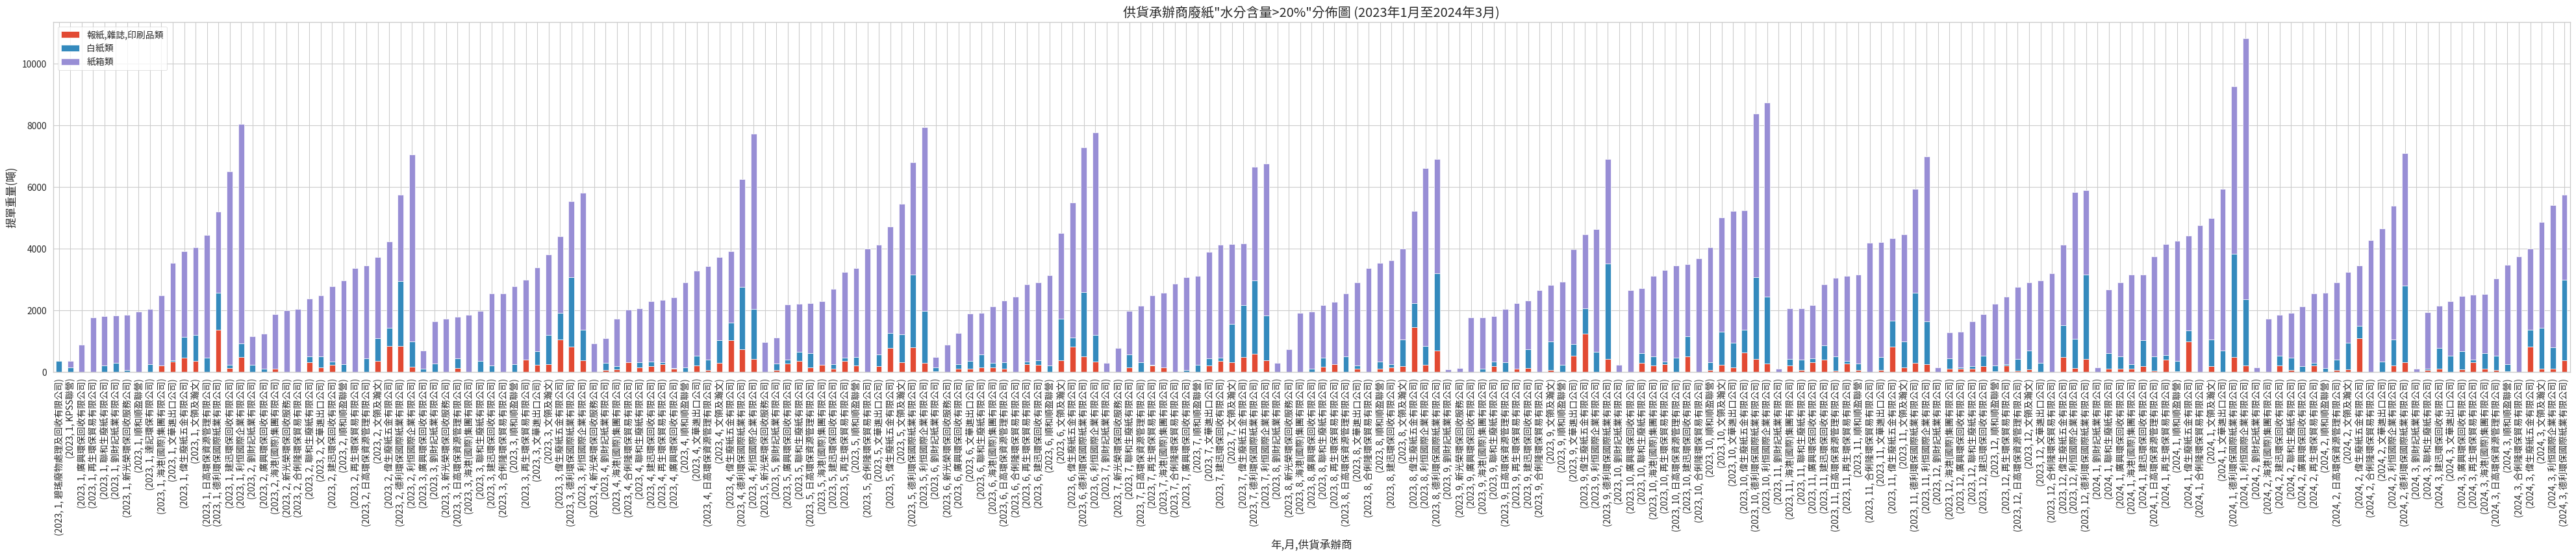

In [ ]:
# A charts shows 供貨承辦商廢紙(含水量>20%)細類的提單重量 (2023年1月至2024年3月)
pivot = pd.pivot_table(data=df1a[df1a['水分含量']>=0],
            index=['年','月','供貨承辦商'],
            columns='廢紙細類名稱',
            aggfunc=np.sum,
            values='提單重量',
            fill_value=0,
            margins=True,
            margins_name='Sum'
            )
pivot1 = pivot.sort_values(by=['Sum'])
pivot1 = pivot1.drop('Sum', axis=1)
pivot1 = pivot1.drop('Sum', axis=0)
pivot1 = pivot1.sort_values(by=['年','月'])
pivot1
p_plot3 = pivot1.plot(kind='bar', stacked=True, figsize=(50,7), title='供貨承辦商廢紙"水分含量>20%"分佈圖 (2023年1月至2024年3月)', ylabel='提單重量(噸)')
p_plot3 = p_plot3.legend(loc="upper left")
p_plot3
fig.tight_layout()

In [ ]:
# Drop data after merged

# delete a single row by index value 0
# data = data.drop(labels=0, axis=0)
# delete a few specified rows at index values 0, 15, 20.
# Note that the index values do not always align to row numbers.
# data = data.drop(labels=[1,15,20], axis=0)
# delete a range of rows - index values 10-20
# data = data.drop(labels=range(40, 45), axis=0)
# The labels parameter name can be omitted, and axis is 0 by default
# Shorter versions of the above:
# data = data.drop(0)
# data = data.drop([0, 15, 20])
# data = data.drop(range(10,20))

# For example:
# Drop the rows with the columns Latitude and Longitude with NaN, i.e. the last row is index no.9652 has to be no.9653
# df1_merge_map = df1_merge.dropna(subset=['Latitude', 'Longitude'])
# df1_merge_map.shape

In [ ]:
#Visualization: using folium.Map to plot the location of contractors
import folium
import folium.plugins
import branca

hk_map = folium.Map(location=[22.3193, 114.1694], zoom_start=11)

import matplotlib.pyplot as plt
import base64
from io import BytesIO

# 文華進出口公司
fig = plt.figure()

p_plot = BytesIO()
fig.savefig(p_plot, format='png')
encoded = base64.b64encode(p_plot.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'
with open('test.html','w') as f:
    f.write(html)

html = """
    <div>
      <p>  </p>
      <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAx4AAAHvCAYAAADaawmrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACwYUlEQVR4nOzddVyV5//48RfSJYqBqFioYHdOZ8yYPZlOZ8fc7K45uwu7nd2z/RjYcwZY2IU4W0AUQeHAAQ7n9wc/7q9HDnBAQHDv5+PhQ86d13Xivu73fZWRVqvVIoQQQgghhBBpKMuXToAQQgghhBDi6yeBhxBCCCGEECLNSeAhhBBCCCGESHMSeAghhBBCCCHSnAQeQgghhBBCiDQngYcQQgghhBAizUngIYQQQgghhEhzEngIIYQQQggh0pwEHkIIIYQQQog0J4GHEEKkof379/Ptt98muo1WqyU6Olr5N2fOHAYMGKCzLDo6moYNG/K///1PZ9nHtmzZwqtXr3SW+fv7069fP4KCggDw9PRk3rx5ycrD/Pnz6dy5c7L2SS379+/HxcUl3r9q1aoRGhqqd59u3brp3Sexf4sXL07nnAkhxH+PyZdOgBBC/Nd5enrSvXv3eMtLlSoVb9nw4cMZPny48nrHjh2UL18etVrNnTt3mDt3LhMmTOCHH34AYPr06bx9+xZ7e3sAtm/fTpYsCT9z2r9/P9HR0fz444+JpvnRo0esXbuWadOm6Sz/8OEDr1+/TnTfjxkbG1OoUCG96549e0b16tU5fPiwznKNRkOXLl3YuHEjffv2jbffjBkzUKlUBqdh1KhRBm8rhBAi5STwEEKIzxQVFcWzZ8/0rgsMDESj0fDo0SO96y0sLKhcuTJnzpxRlq1cuZKXL18yefJknW07dOhAz549+e6775RlcQGFubk506dPp1atWowfP56qVavy4MEDjh49iru7O0FBQQQHB3Py5ElWrlyp1ICYm5tjbW2tHO/q1atERkYmGXgEBASwa9eueIHH8ePH+f333xPd92O2trZcuXIl3vLo6Gh69uxJ1apV450D4Ndff2XlypV06NCBbNmy6axzdHQ0+PwAlpaWydpeCCFEykjgIYQQnykgIICmTZsmuk1C60uVKsWePXvImTOn8pS+bt26hIaGYmVlpbNtjx49KFOmjLLcysoKE5PYy3hYWBharZamTZtSq1Ytnj59ysiRIwEYNmxYvOPEad26NTNnzkxGbpOWL18+Tp06leR2e/bsYfr06XrXrV69mjdv3jBw4EC96zt16sSOHTsYPXo0K1as0FkXFBRkUI1Hjhw5JOgQQoh0JIGHEEJ8pvz58/PgwQMgtrZi+/btnDx5Um+Tpm3btjFz5kz++ecf7OzslOWXLl3S29wqMStWrKBevXoAHD16lCVLllC/fn1+/vlnfvnlF0xMTKhatSqbNm0C4MSJE0yfPt2goOBLun//PkuXLmXAgAE4ODjo3cbMzIypU6fSpUsX1q5dqxNMzZ49m7179yZ5noULF/L999+nWrqFEEIkTgIPIYRIRW5ubixatIhTp07RoEGDeOu3bdtGkyZNdIIOgJo1a/LgwQM2b97M6dOnWbNmDQC//fYbrq6uDBkyBICffvqJjh070qpVq3jnbdy4MQsWLOD06dNs3bqVv//+m9mzZ+Pi4qKz7cevT548Sf78+VMl76nh+fPn9OnThzp16vDrr78qy6dPn07Tpk0pX768sqxKlSr069cPd3d3HB0dadKkCQAzZ85M9VocIYQQn08CDyGESEW5cuWiVatWLFmyhO+++w4jIyNl3bFjx3j48GG8UaXUajVhYWEAqFQqoqOjlT4Y0dHRqNVqndcqlUp5bWNjg5mZGQDW1tb88ccfynH//vtvKlasyMqVK5XX8+bN48CBA8o2NjY28fKwd+9evTUGnwYwqU2j0dC7d2+yZcvGnDlzlPfu6tWrbNiwQand+Vi/fv14+fIlS5cupV69elhYWACxndzj3lN9cuTIgampadpkRAghhF4SeAghRCrr27cvTZo04a+//qJdu3YARERE4O7uTsuWLSlatKjO9tu2bWPGjBk6y2rUqKH8fe7cOdatW6e8vnPnDhMnTgRiR3Byc3Nj6dKlhIeHA7F9RCpXrgyAiYkJWbNmBWL7hGTJkkV5rc/AgQPp2rWrzrKNGzdy584dZs2alZy3IdmMjY1xd3cnb968Ov1b9u3bR8GCBalevXq8fYyMjJg2bRoqlUoJOgAWLVrExo0bEzzXvn37KFGiROpmQAghRKIk8BBCiFSWP39++vTpw6xZs6hZsyZOTk64u7sTEhKid+jWbt260a1bN4AUN7V6+PAhHz584NatW2TPnl0JPC5dupRoU6tz586RK1cuILZmoXPnzty9e1dn+2zZsmFpaYmzs7PO8qlTp/LmzRsWLFiQzHcoYa6urjqvIyIiOHLkCP369dOpPXr58iX58uUDIEuWLHprbpo2bcr8+fN1lqnVasqWLZtq6RVCCGE4CTyEECIN9OrVi7///pvffvuNdu3asXnzZhYvXqwMf/upxYsXs2TJEuX1x8HB33//rTNy040bNxg5ciQdO3Zk/PjxAMrN/6cT/SXV1MrW1lb5W6vVotFoDM5jTEwMMTExBm+fEsePH0ej0egM7+vp6ckvv/zCunXrqFq1apqeXwghROqRwEMIIdKAqakpixcvpmXLlkyfPp1+/frp7Wwe55dffqFjx47xlo8YMYJixYrpdLSO83HTopQKDQ3VCT4ymnXr1uHm5qbTPKxGjRq0aNGCwYMHs3fv3gRHvhJCCJGxSOAhhBBpQK1Ws2rVKkJCQsiaNSt79uyhVq1aVKxYMd62Go2GqKgoZU6OTxkZGeldFx0djUajwdjYWGe5VqtV/vb29qZKlSo66z9+bWZmxq1bt5KVt/Ti6enJgwcPWLhwYbx148ePx83NjSFDhrB582a9QxcfPnw43qznQgghvhwJPIQQIhVptVqOHj3KnDlzCAkJYdGiRZQvX56BAwfSsWNH2rZty8CBA8mZM6eyz7Vr1/TWdsQ5d+4ca9eu1btu165dlClTBogdjeratWu8fPmSJk2akCNHDtq0aaN35u+09PLlS4NHwEqotiUyMpLVq1fz7bffotVquX//PmFhYahUKuVf1apV2bFjB5s2bYrXIR6gfv36TJgwQe/xc+TIYXiGhBBCpAoJPIQQIhW8ffsWDw8PNm3axJMnT2jWrBmjRo0id+7cQGyn8U2bNrF48WL27t1Ls2bNaNWqFZUrV6ZixYp4e3vrPe6gQYNwcXGhb9++etdbWlqi0Whwd3dn3bp1jB07lsePH9OiRQvatm1L48aNefToEWZmZmTJkkWpGVCr1URERKBWqylWrJjOKFIJBQ36ljdu3Djesty5c7N+/fpE3y+IndBw9erVOstu3LhB+/btdfqOfDzhoYmJCdbW1sq/okWLsmDBAurXr4+Tk5OyXc2aNQkLCyNPnjx6z+3p6cm7d++IiYnh9evXGbq5mRBCfC0k8BBCiM/09u1bGjduTGRkJI0bN2bRokUUL15cZxsTExO6d+/ODz/8wNatW9mxYwd79+5VRl6ytrbWe2xjY2PlZjshGo0GT09P5s+fr8zE3ahRI7Zv387YsWMJDAxMsBO4ra0t58+f11lmaPOk5cuXExkZGW+5qalpvBGw9Llx40a8ZUWLFmXRokVYWlpiZWWFlZWVTqBhbm6us31UVBStWrXi8uXLOoGHvjk/Pnb16lWWLVuGtbU1hQsX1htACSGESF1G2o8bAwshhEiR69evU6RIkUTnyPiYVqvl+vXrFChQIFWa/URGRioTCX5Ko9EQGRlJTEyM0v/D1NQUExMTnf4hWq2WyMjIeDf3yU1HeHh4vJnZ01JieRdCCJFxSOAhhBBCCCGESHPxhwERQgghhBBCiFQmgYcQQgghhBAizUngIYQQQgghhEhzEngIIYQQQggh0pwEHkIIIYQQQog0J4GHEEIIIYQQIs1J4CGEEEIIIYRIcxJ4CCGEEEIIIdKcBB5CCCGEEEKINCeBhxBCCCGEECLNSeAhhBBCCCGESHMSeAghhBBCCCHSnAQeQgghhBBCiDQngYcQQgghhBAizUngIYQQQgghhEhzEngIIYQQQggh0pwEHkIIIYQQQog0J4GHEEIIIYQQIs1J4CGEEEIIIYRIcxJ4CCGEEEIIIdKcyZdOgBDJ5e/vzx9//EGPHj345ptvDNrn8ePH7Nu3j549e5I1a9Yktw8MDOTw4cNoNBp69OgRb/358+dZu3YtCxcuxMbGRu8x/vzzT548ecLUqVMNSmNaunLlCo8fP4633NHRkVq1ahl8nAcPHlCkSBFMTU2VZYGBgVy8eJG6desm+F4I8TXKCNcigMjISExNTTEyMjIoDXPnzqVKlSrUqVPHoO0TcuTIEUJDQ+MtL1u2LC4uLik6ZnBwMF5eXjg7O1OsWLHPSt9/3b59+7hx4wYTJkzg33//5fbt2zRr1gxjY+Mvlqbo6GgWL15MlSpVklX2qNVqzM3NE1x///595syZw7hx4yhUqJDebfbt24eHhwcrVqxIbrJT3b1797h9+3a85VmzZqVx48YGH+fRo0fkzZsXS0tLZVl4eDgeHh7Url2bnDlzpkp6U5MEHiJD8vHx4f3793rX+fn5ce7cOUqXLp3ohahy5crK3xs3buTMmTP069dPZ5vIyEjMzMwICAjg9u3bXLlyhUuXLnHnzh2MjY2pUaMGTZs2JU+ePDr7BQQEcO7cOSIjIxM8//379/VeWBKyb98+Xr9+bfD2tWvXpkSJEgZtu3fvXnbt2hVvuZ2dHefOncPMzCzJYwQFBdG2bVu6d+/OkCFDlOUeHh7MmDGD8+fPJ3mMCxcu0L17d4PSnJAZM2bg5ub2WccQwlAZ/VoE4O7uzosXL1i6dKlBeVq9ejUajeazA4958+bx7NmzeMvr1KnDqlWrkn284OBgfvnlF+7cuYOFhQWLFi2idu3aBu8/ZMgQjh8/jr29fZLbqtVqgoODOXbsGAULFkx2WjODa9eusWfPHiZMmMDFixeZPXs2q1atYvz48VStWjXe9v/88w9r1qxh3rx55MiRI8nj//vvv7i7u9OlSxeqVatmUJo0Gg0rVqxAo9EYHHjMnj2b58+fs3jx4gS3CQkJ4dy5c3z48CHBbR4/fmxQORXn5MmTPHr0yODty5cvr/d91ef06dMsXLgw3nJjY2POnDlDrly5kjxGVFQUXbt2pXr16sydO1dZ7unpyejRo9m/f3+SgcfTp09p1KiRQWlOSP/+/RkwYIDB20vgITKk6dOnc/HiRUxM9H9FzczMWLt2LWvXrk3wGNevX8fY2Ji3b9+yb98+JkyYgJmZGVeuXKFMmTKYm5uzePFi/vrrL4KDgzE1NaVAgQI8evSIfv360b17d2xtbQ1Kb2hoKK9evYq3LCoqCh8fH53lJiYmFClSJN4xtm7dyo0bNww6H4CtrW2Sgcf8+fMpU6YM06ZNY9q0aTrrbt68Sdu2bTl69CgtWrRI8nwbN24kKiqKtm3b6iw/fvw4lSpVInv27Aanff369eTOndvg7QEiIiIk4BDpLqNfi169esXWrVuZOXNmquQ3KUFBQaxcuZIffviB48ePx1v/559/Mn/+fF6+fEm+fPkMPq6Pjw8DBw7k/fv37Nq1i61bt9K7d28GDRpEr169DK7NKVOmDNu2bUtyOw8PDwYNGmRw+jIjc3NzYmJiAPj555+pX78+EyZMoGvXruzatYtSpUrpbP/mzRu8vLwICwtTAo+goCAsLS11nqjHefjwISdOnKBNmzZpmo8mTZrQtm1bbt68SdmyZQ3aR61W8/TpU51l7969Q6vVxiuTAYoVKxbvO3bw4EEOHz5scDp79eqVZODx559/kiNHDvr27Uvfvn111gUEBPDdd9+xe/duevfuneT59u3bR2BgIO3bt9dZfvz4cfLly4erq6vBaZ81axZlypQxePs4n57bEBJ4iAyrWbNmOlF8nJiYGIyMjIiMjOTo0aM0adIEU1NTAgICyJ07t87F4969e+zcuZMiRYrQqlUrnj59Srdu3ZgwYQJt27ZFq9UCsGfPHooVK4ZKpaJatWq4uLgYHHQAnDt3LsFC7NOb+pw5cyb41KVWrVqsWbMm0XMZ+oTi2rVrrFixguHDh+tdX7ZsWSpUqMCyZcto2rRpotXvQUFBbNiwgZo1a3Ljxg0lQIqMjOTy5cs0atSIQ4cOJbh/3bp1sba2Vl47OTmRP39+IPZpcPbs2eM9MVapVERHR/PPP/8AEBYWlmSehUgLGflatGbNGpycnGjatGmq5PXDhw9oNBqyZcumd/3OnTtZv349zZo107u+bdu2LFmyhOXLlxvUzDQmJoYtW7Ywd+5c8ubNy+bNmylSpAjTpk0jf/78LFy4kDNnzjBhwgSKFy+e5PHu3LlDw4YNk9wuPDw80TTt2LGDnTt34uPjg4WFBaVKlaJ3797UqFFD7/YrVqxg9+7dBAYGki9fPtq1a0fXrl11vgMRERHMmjWLw4cPEx0dTZ06dRg/frze93rQoEHY29szYcKEeOv8/PwMuiG+f/8+0dHROmVKlSpVUKvVeHl5xQs84mq+42ryg4ODadKkCVWrVmXRokXxbsyfP38OQIECBZJMy+coU6YM3377LcuXL2f58uUG7ePj45NgQKTvQdvNmzf11loWLlwYDw+PRM8VHR0d773Ux8/Pj/nz59O2bVtat24db72DgwONGzdm3bp1dOrUKdGmy5GRkSxbtoxSpUoREBCgU/6eOHECV1fXRMvkatWq6dSGODo64uzsDEDLli0JDQ3Fysoq3jkDAwP5559/lGtSlizJ7yougYfI8OrXr8/Lly91lvXo0YPhw4ezdOlS3r59S9asWZkxYwZz5syhXr16QGyNQ6dOnQgLC2PXrl0YGRkxY8YMypQpo3NBMjc3Vy4a0dHRQOzTkk+9ePGC7777TmdZXCEUdxHx8PDAzs6O9+/fo1ar41WXLliwgJMnT37O22GwJUuWYGVlFa+G4mN9+vTh119/Ze3atfTq1SvB7ebOnUt4eDgdO3akT58+8dZ7eHgkenE+duyYTuDxMZVKxaJFi6hZs6bO8v379zNlypQEjylEesso16I4kZGRHDx4kB49ehhcIxDnxYsX8ZbFxMQwfPhw7t+/z969e+M1WQoNDWXdunVUqFAhwSfPdnZ2dOjQgXXr1vHjjz9SoUKFBNPg6enJnDlzuHPnDhUrVuSPP/5Aq9UqzVsaNWpEnjx5mDZtGq1bt6ZVq1b07t070RvdUqVKfVaNx/v37+nXrx+XLl2iVq1a9OzZE39/f44fP06PHj1YtmyZ8rnGGTJkCB4eHlStWpXmzZtz8eJFZsyYgZ+fH7///ruy3eTJk9m/fz9ubm6YmZmxZ88egoOD49WWXbp0CS8vL44ePao37c+ePWP27NlJ5jGOvm0vXLhAz549dZbFBR5RUVEAZMuWjeHDhzN27Fg2bNhAt27ddLZ/8uQJxsbGODk5GZyWlGrVqhUjR47k7du3Os3APu1LFPd7iiuT169fj4uLC+Hh4YSEhMRrqrhjxw4WLFiQton//5YvX05MTAydO3dOcJtff/2VI0eOMHfuXCZOnJjgdqtXr+bVq1dMmDCB3377Ld76S5cucenSpQT3X7duXYLNsMLDw+nTp0+8e4crV67QsWNH5SFJSkngITK8YcOGUa5cOaysrPDy8mL06NG0adMGY2Njxo4dy2+//YazszMbNmygWLFi/PXXXzRp0gRbW1sWLlxIv379OH78OC9evMDT05N9+/YlWEhbWFgA6O27YW9vz7x584DYH/X27duZMmUK1tbWvH37lr1792JnZ4e9vT1r1qxh8+bNeHp66jw1SKwdeGo6ffq0UguT0JNLiG2LXb9+fRYtWkS1atX03kx4eXmxZ88evvnmG+rXr8+DBw+A2AK6YcOGtGjRgrFjx35WegcPHqzTYR0Sv+ES4kvIKNeiOP/88w/BwcE6tR2hoaFs3Lgx3rYxMTEULVqU77//Hoitpf20w+706dP5+++/GTZsmN5+EkuXLuXdu3csWbIk0fepX79+HDx4kFGjRrFjxw6dZphRUVEcP36czZs3c+fOHZo3b87MmTNp0aIFP/74o97jVa1alU6dOrF582aaNGlC7dq1adOmDQ0aNNDZztbWlkuXLhnc0T9nzpzxanrfv39PaGgoa9as0emD8Ouvv9K6dWvc3d11Ao+///4bDw8PWrdurTR302q19OnTh40bN/Ljjz9SvHhxQkNDOXDgAL1791baw5cpU4ZRo0bx9OlTpZ+JRqNh6tSpDBw4MMFrd7Vq1ZTrcGJ27tzJ2LFjOXLkiN7mvZ+KuwZ//J1r27YtJ0+eZN68edSvX18n6Lt79y5FixY1qI/g56pfvz6mpqYcOnSILl26KMvjymRfX1+WLVvGkCFDcHJyQqvVsnfvXmxsbLC3t2fr1q1MmjSJEydO6ARK+pqQpYV79+6xZ88e3NzclJoFfVxcXOjQoQObN2+mVq1a8b7jENuhfOXKlRQpUoS6desq34Xo6GiaNWtG4cKFP7sD/cyZM+MFZHEPQz6XBB4iQ1OpVBw5coQZM2bQs2dPli5dyrhx45Qfbu3atenduzebN2/m5s2bjBo1ikKFClGnTh1sbW2pVasWM2bMYOjQodjY2DBixAjevHmDk5OT3jbbWbJkwdzcXO9Nr5WVldK8QK1Ws337dho0aIC9vT2nT58mZ86cSrXjiRMn+Pbbb+NVVdrb2ytNjPQ5d+5cikeDifP69WtlZI+ERsH52JQpU2jdujW//fYbmzdv1rkoBgYGMnz4cLRabbwReJYtW4ZGo1Haqfbp0weVSsWGDRuSld67d+8qf/fs2ZPixYszatSoZB1DiLSWka5Fcby8vHB0dNS5kQoNDdXbaRVim1fGBR4qlYqzZ88qNzaLFi1i06ZN9O7dm19//TXevp6enqxfv56WLVvqdJbXx9ramjlz5tC9e3f69OnDn3/+qTQbCQoK4u+//6Zt27asWrVKWZ7UjXRkZCSNGzfm+fPnHD58GJVKBcQGMnEd3Lt27UrXrl0TPc6n1Go1jx49wsbGBgcHB/Lnz8/evXvjbefs7Ey1atX4559/CA0NVdK9b98+AJ3aEyMjI/r168fp06c5ePAgQ4cO5cmTJ0RFRenU7NavXx+I7SsRF3js2LEDSLrtvEaj4cmTJ3rXWVhYkC9fPp1+GnGBx4MHD3j27Bl16tSJFzB8WuMRZ9y4cTRp0oQZM2YoTZ0iIyPx8fGhZcuWiaYzIc+ePeP06dN612XJkiXewAeWlpaULl2aixcv6gQecWXyxYsXWbZsGd988w1lypTh/v375MyZUwmmTp48SalSpeLVzmTNmpUCBQok+ADg8ePHn10mh4WFMXLkSGxsbHQGZknIsGHDuHjxIsOGDWPNmjU6vzeVSsXAgQNRq9XxmmBu27aNly9fKoNMTJ06lTNnzujti5WYj7cfP348wcHBLFq0KFnHSIwEHiLDMjIywsrKivnz59O7d2/mzJnDH3/8oVT/xcTEEBMTQ9++fTEyMmLixIlUqlSJqVOn6jwpatq0KevWrSNHjhy4ubnRrFkz2rZtq9wwR0dHc+vWLWV7MzMznj17prPMxcUl0ac69erVU/ptPHz4kCdPnugd5aFPnz56myrFKVasWJId9d69e5fg04yQkBB+/fVXgoODWbZsmfLUNDE5c+ZkyZIldO/enQ4dOjB//nxq1qxJaGgov/32GyqVirx58+rsc+XKFTZs2MDUqVOVJ6Nxn4ehKlSoEO+mKiYmhvPnz+sNXi5fvmzwsYVITRn1WnTz5s14bcvz5MkT7yb+/fv31KhRI17H123bttGgQQMWLFjA8uXL6dOnD4MHD46X/3v37jFgwAAcHR0ZP368Qe9ZtWrV+OOPP5g8eTKdOnVi8eLFODk54eDgoDT96dmzJ+fOnTPoeACjRo2iR48eOk1LXr16lSr9Wxo3bpzkzZW+NveXLl2iUKFCODo66iwvXbo01tbWSnMXjUYDoFP7E1fbElfDEBISwsKFC1m8eHGSQ94GBQUlmO9SpUqxZ88eZQCPj0dLXL16NadPn+bChQvx9vu0j0ecfPny0aFDB86cOYNKpcLKyopr164RFRVFpUqVEk1nQo4ePZpgUzIzMzOd73ycEiVKcOTIEYOO7+rqqpTJ79+/5+LFi3rLZDc3t0QHLcmVKxe//PJLoufSarUJDu6gVqsZOHAgPj4+LF261KDhbS0tLVm6dCkdOnSgR48eTJs2jRYtWhAVFcXgwYN58uQJhQsX1tnn6dOnzJs3j19//ZWiRYsCsdeluO+dIZo3b86///6rsyyuTC9ZsmS87ZMb0MSRwENkSDExMahUKrZt28aGDRuUOSgmT57MzJkzuXXrFmPGjNF5MpU3b178/f2pX78+DRs2ZPDgwTg6OrJz507evHnDvHnzCAoKok2bNixbtowmTZoA8Pbt23g3++vXr2f9+vXK68SGXAwKCmLhwoVs375dZ/mwYcMYNmyY3n1OnjwZr+YjKioKFxeXeO1oP/X06VO9gUdkZCSdOnXi4cOHdO3aNdG+HZ8qWbIkf/75pzLSxvHjxzl+/DgPHjxgxYoVOkNj+vv7M2zYMGJiYhgzZgxjxozROdanT4dWr17Nt99+G++cx48f/+y2okKktYx8LfLx8aF69epJ5uHvv/8mOjpaJ/AoUaIE58+fZ/DgwXh4eDB69Gi9Q13/+++/dOzYERMTE6pVq5ZkbcfHunXrxvjx45k+fTqDBg1iz549OuunTZtm0KAR06ZN4+LFi3rnNyhYsKBBzY5Sw927d8mXL58SgERGRvL27Vu9TVSNjIzIly+f0ico7uFN3FxIEPuQClCClkWLFikB4uHDh1m+fDkBAQGUKVOG8ePH6y2DVqxYodP0a/jw4crNY1wZE9efJywsjBMnTtCkSRO9zX4TqvGA2CFThw8frtTOnTx5EiMjoxQPydymTZsEa6cS6rDs7OxMYGAg7969S3QUxdDQUNavXx9v+N158+YpTbM+tXHjxnhDAkdFRZE/f/4ky+To6OgEA4++ffty7tw5unfvHm8I7cTY2dmxfft2evXqxciRIylWrBgBAQGcOXOGqVOncvXqVeVzDg0NZcCAAahUKpYuXRpvWO1Py+SJEyfy888/xzvnxo0bkxWoGDJstT4SeIgMKTIykvDwcJYtW0bHjh356aefMDEx4erVqwwcOBCIvSh069aNX375hb/++gsvLy9Wr17NqlWr+Pfff/Hx8aFr1668evWKqKgonbaSJiYmrFixgly5cmFvb68zUsbo0aNxcXHRKYQ/fZoVV83fs2dP7t+/T5s2bZQL2sSJEylVqpTOjf+pU6c4ePAgEyZMUPqBfEpf1WlymJmZMWrUKOWG5+NJlDw8PPDy8uL333+PV+CsX78eGxsbKlasyP79+7l//z65cuWibdu25M6dm9q1ayuBR0BAAD179kSr1WJiYkLz5s2Vi/WGDRtQq9VKM42AgIBEO+3lzJmTiRMncvDgwUTz9fPPPzNs2DAZ1Up8ERn1WqRWqwkPDzdoEsJjx45hb2+v08ynevXqREREcOLECRYuXJjgpGVFihRhwIABVKpUCTMzM52b7LgHIPqG/pw4cSI2NjZ07NgRV1dXvf0V9M1J8qlXr15x8eJFmjdvnuTwvC4uLlhZWcWrnQ4ODta7PCwsjGrVqiU5kiDA2bNnefLkiU6Tqrj5XRK6btvY2ChDuubKlYuKFSsyZ84cbGxssLGxYdq0aTg6OlK2bFkePnzI3r17OXjwIBcuXGD48OH88ccflC1blqVLl9KzZ08OHTqUrH6C2bJlI2vWrEqTrMOHDxMeHq73phMSrvGIy0scjUbDiRMnKF++fIonqMuePbtBo5R9LO67ri/wiCuT//jjD/7991/q1KmjlMmLFi3C3Nxcp6bs2rVrbNq0iQEDBlC4cGGlluBjn1smQ+wDyGrVqtG1a1edwNHLywsPDw969+4d73cQN0xukSJF2Lt3LxcuXMDV1RVXV1cWLFhAkyZNuHr1KhAbdPTu3ZsXL16QLVs2ypUrpzSnPHDgAPfu3VOaLkdGRuodJS2Ovb09q1atSnIOnjp16uDu7p6i9wMk8BAZVEREBJUqVWL16tU6TXji2mvGxMRw8+ZNBgwYQK5cubCzswNi27YePHiQo0eP8urVK9q0aUPu3LnJnj07EydO5Pvvv2fIkCH8888/zJgxg4YNG2Jqakr58uWVczs6OmJmZqazDGJvpLdu3cqpU6eUccBjYmIYOHAgP/zwA46OjspkY+3atVOeYkJsoWVra8vPP/+cYFvSwMBAsmTJgr+/f6LvTWBgYILrPu4M+XHh8r///Y8CBQrofXKze/dupVBxcHDAwcEBiH2vP+3YNmLECF69esXGjRvp0KED5cuXV6qpjx49ikqlUl77+PgkOVpIREQEbdu2TbBPx5AhQ4iIiEj0GEKkpYx4LYLYZjlAkoHHs2fPOHXqFF26dNEZwMHIyIhff/2VMWPGJDkHz8eBT9zcABEREUybNo1WrVrFu5ENDw9n4sSJyk1bSpvjAKxduxaNRqO334k+48aNi9d0pmTJkgwaNCje9e/TUZ0SEh4eztSpU8mVKxcdO3ZUlic1kphWq9XZZsqUKfTo0UNpupMtWzaWLl2KsbEx06ZNo0ePHuTNm5cJEybQoEED5VyzZs3im2++4cyZM8me7K1o0aI8evSIyMhIli9fTqVKlRIckSzu+6GvxuNjR44c4eXLl+k+D0rcdz0u4Pvw4QObN2/m1KlTStOsiIgIevbsScuWLXF2diYkJIRRo0YxePBgnSGg42oLOnfurPxmP/X69Wvy5cuXZJmcWC1ByZIllWZKH/9OvL29sbCwoF+/fvECYi8vL2W456xZsyqBBKBzXwGxtYHXrl1jyZIlzJo1i+LFiyvf/9u3b/Ps2TPldVhYWKKBB8QGWzVr1kyw2eHcuXPjNcdKLgk8RIYUHh6Ora0txsbGtG3bljt37ijrzMzMmDNnDlqtVrkxdnZ25u7du/Tt2xdzc3Olmrtz5848efKE4sWLY25ujpWVFSEhIRQoUIDDhw/rnQk1R44cvHnzJt7yuL4VxYoVo3bt2pw9e5Z169bp1F4cPXoUCwuLeNXPXl5eVK1aNcGCKjg4mPfv37Nlyxa2bNmSovcsIeHh4dy8eZMffvhB7/oPHz7ofdqjz/jx43n37l2KJhpKzL179+jQoYMyYoqvry+enp6peg4hUiIjXosApclLUiPNLF++nCxZsuh9yt2yZUv+/PNPxo0bx4EDB5L1NN3b25uoqCi9M1bH3RgmFRR9+PBBp//Bp1QqFTt37lQCl0ePHlGkSJFEb/j1jcaj0WhYsmRJvGFr3717Z9BM03/88QdPnjxh+fLlOjep2bJlw8jIKMHZsj98+KDzHhQtWpTjx4/j7e1NTEwMFSpUwMrKiuPHj/Ps2TOlBunmzZs6QZGdnR1FihThxo0b8QIPf39/ndm1Q0NDddaXKFGCXbt2sWnTJl6+fMmsWbMSzKe+Go8LFy5gYmKivE/R0dGsXLkSOzu7VJs7xlBxN/hx/V+0Wi0LFy4kX758NGzYkGPHjuHu7q5TPp08eZKoqKh4NXqenp64uromGHRA7Dwl9+/fT5Mh8C9dukTFihX19h398OFDoun62LBhw6hfvz716tVL9LNNrvfv31OzZk1l8IynT58aNEy1ISTwEBlSQEAAOXLk4P379zx48CBeH4vNmzfTvn17nVExunfvTlRUlM6kVbdu3aJz5846HZNXrlyJr6+vTrvpjzk6OnL79u14y4sXL86BAwdwcXFhz549nD17Nt42R44coUSJEjoF+JUrV/Dz89PbaTOOr68vEFvAJTWj95s3b5I1v8WhQ4eIiopKcFKtpNrLfszQACUlnJyclJqPxN4rIdJTRrwWwf/d1Cd00wuxN1d79+6lS5cuevsHmJiYMH78eLp168aYMWOS1Xxi3759WFhY6O2/9e7dO4AkryvHjx/XmeciIVeuXFFuchOa6C3O6NGj9dZ49O/fP0U1HrNmzeLQoUMMGDBAGYUqjrGxMXny5FFG1fpYVFQUL168oESJEjrLzc3NdSYhVKvVzJw5k5EjRyqDgYSGhsZrmmZubq4EdB/TN9fDxwMOlC9fni1btjB//nwaN25MlSpVEsxr3E3wu3fv2LJlC1u3bsXX15cuXboogcfixYuVGv+VK1fSv3//BI+X2uLyH/feZM2alX379uHq6srFixc5duxYvH0OHz5Mvnz5dMrVly9fcv369Xgzh3/Mz8+PsLAwevfuHe8z/FRMTIxBo1XF8fT0xN/fX+/8GxD7/hs6N0rOnDkNmjAzJezs7JQy2ZDJQA0lgYfIcIKDgwkPD8fJyYl//vmH6Ohonac8BQsW5I8//mDJkiXkyJFDGd3h2rVrPHz4UGciPF9fX3LlyqXz1KlVq1a0bdtW7wRaEDsL64sXL4iOjtYZ5jJLliyJDqt39+5d5clTw4YN6dKlizJkZI4cOeJVkX7s1KlTZM+enc6dOydZfR/XZtgQWq2WjRs3UqhQIb03CJGRkbx//z7FncRSi6OjI926dVOqtEePHm3QiFxCpKWMei2C2KAhe/bsyk3+pwICAvj999/JkSNHojeH1atXp2vXrqxfv568efMmOCDGx16/fs3hw4dp3bq13r4bb9++BdCZ6C0xnp6eSV6DFi9enOT8IdmyZWPWrFnxnvxqNBoWLlyod9ZrfTORx5k1axZr166lbdu2Cb6HNWrUYO/evfj7++u01b9y5QoRERGJ3uhDbFOyfPny6TSnyZYtW7yarhcvXuh07M+VK5dBnerjJnC0trbWGZEsMDAw3gS3fn5+AEpH6QoVKrB48WKlNu/06dOsXr2aWrVqYW1tzeLFizE3N0908tnU9O7dO4yMjHS+K3FN//QJCgrC09OT6Oho6tatS8eOHenQoQN//vknxsbG/PTTTwnue+rUKYyNjenZs2eSNXfJnd9iw4YNZM2aNcFWCG/evKFcuXLJOmZqs7CwYNiwYUqZ/Msvv8Tr65pSEniIDCeuI1zc2NoLFixQbpoXL17MzZs3qVOnDufPn+fcuXNMnz6dsLAw9u7dy08//aTTCe7WrVvxmgWVKVOGPHny6K2xgNgOilFRUTx8+FAZvq9+/fpJNkMwNTXlxx9/pFmzZmzatIkZM2awcOFCVCoVkyZNSnD/mJgYjh8/Tt26dZM9+3BSNm/ezIMHD5g6dareYwcEBKDVapOsZUmO0NBQXr16pdTiJBVAbN68mZ07d8ZbPn36dCIiIhLsCClEWsvo16JSpUrpvfl88+YNPXv25M2bN2zcuDHJG6cRI0bw8OFDVq1axZs3b5g0aVKiw4fH1bgmNNpP3M1Kal5XkhIdHc0///yjd12FChXo378/nTp10rv+074Y0dHRTJgwgV27dvHjjz8yefLkBM/bsmVL9uzZw6JFi5g+fbqy/7JlyzA2NqZVq1YJ7hsQEMCaNWvYunWrzvKyZcty/PhxevfuTZYsWbhx4wZBQUGULl06wWNBbHBy+/Ztbt++TenSpalfv77yWWXNmlUnEOzVqxf9+vWjYcOGnDhxgg0bNnDp0iWMjY1p2LAhPXr00Ln5PXbsGEOHDsXR0RF3d3elqeDcuXPJmjUr7dq1SzRtqeH+/fsUKlQIa2trg7aPjIykTZs21KtXj8OHD7Ns2TJWr15NVFQUPXv2TPT7efToUSpVqmTQ4A3JcerUKU6fPk2fPn3izfMFsd+dt2/fpupvJzIyksePHyu1o0mVyadOndIZiCLO9OnTUavV1K5d+7PSI4GHyHCuX7+Ovb09efPmjTd/RHBwsNL5uW/fvhw7dow2bdqgVqvJnj27znB1Wq2Wc+fO6R2Du0mTJnoL1vDwcMzMzLCwsODChQuUKFGCjRs38uHDh0SfjkDsHBxxBc8333zDxIkTlTaR69ato0iRInrbE+/bt49nz54xd+7cJN6Z5Ll16xZz586lZs2aCc4NEld7ktikhsml1Wpxc3PDwsKCWrVqJVpYzpw5M8FhCIX40jL6tahChQps2rRJZ7/bt2/Tp08f3r59y/Tp06lYsWKS+TQxMWHJkiX079+fPXv2cPv2bUaPHq13BvAtW7Zw7NgxBg0alOAMzE+fPsXU1DRdA4/Jkycrk+/pM3v2bGX+kE8dPnxYycv79+8ZPHgw58+fp0iRIri4uLB69WqdDsRZs2ZVgpgaNWrQokULdu/ejZ+fH6VLl+b8+fPcuXOHX375JdHmqbNnz6ZVq1bxRnfq1KkTPXr0oGvXrpQtW5b9+/eTL18+vvvuO2WbgIAAbt26pQQat2/fVmq/cuTIgaOjI4MHD+bMmTOULVuWmzdvcubMGerWrQvE9l+Iq1Xx8vLiwYMH9OzZk06dOul811UqFe7u7mzZsoVChQqxbt06pZYrbq6JSZMmkTNnTp30pYV79+7pHWghIXny5GHSpEkA1K1bl6JFiyrNCfft20eZMmX0dta/ePEiFy9eZP78+amS7jjPnz9n7NixFC1aNMFmXs+fP0ej0aRqmRxXcxMWFkaFChX0/q7jDBgwQO98J6lJAg+R4Vy8eDHBwvLJkydKZ8Zs2bIxevRoZWSN8ePH6zxhfPDgAe/evdN7Yfm43aJKpWLq1Klcu3aN+/fvU7x4cWrXrs2OHTv4+eef+ffffw1ubwmxbZAXLlzIuXPnaNu2LdWqVWPOnDl07dqVX3/9lUGDBinjlL97946FCxdSvXr1ZFetJlY74uXlRd++fcmePTvTp09PcNsbN24AJHgDkZgNGzbofV9sbW0TbJce5/nz54nOyKyPjG4l0ltGvxbVqVNHqXmJG6moQIECFCxYkKlTp+qdYyGhuXOsrKxYtWoV8+bNY926dezYsYOaNWvqXDvWrl3LrFmzqFmzZqKjTN24cYMiRYokOB/Dp549e5Zgk7E4Ca0PDw/n1atXic5a3qJFC3755ZdEax9evnxJvnz5OHHihDLx3L///qs8TPpYvnz5dGpPZs6cSZEiRdizZw9Xr14lb968/PHHHzozbH/K29ub8+fP651E75tvvmHatGksX76cmzdvUq5cOaZMmaI8qfby8lLymiVLFooWLUqjRo2oUKECFStWJEuWLIwcORJvb28GDhxIz549+e6775g5cyaVK1cmLCyM0NBQpWlgnz59GDZsGJaWlkoawsLC2L17N+vWrePVq1c0aNCAKVOm6DRzsrGxYdWqVbRp04Zhw4axa9cuihYtalCzuNWrV7N69epEt1m4cKHSBO3169fcv3/f4NHNPvbo0SOWLVvGwYMHqV+/Pj/++CPu7u4MGDAANzc3nRq+uD43RYoUSXbficTKZB8fH3r27ElUVBRz585NsEYxrkxOSX9Kd3d3vU0fjY2Nk5yo08/PT2eQAkMlZ9LgOBJ4iAwlKCiIs2fP6rRFffnypTKJ1507d+jRowc3btxg//79/PXXX5QpU4aYmBgGDRpEvXr1aNy4MTVq1MDV1ZWTJ08qTyU/1bRpU+WHdvjwYapUqYKbmxvVq1cnKCiITp060bBhQ8LDw5UmEq9evSIsLIynT59iYmKCjY0N0dHReHt7c+nSJY4ePYqPjw+VKlViw4YNyuRedevWZdq0aaxYsYLHjx8zf/58oqKi6NOnD0FBQfFGW/nYnTt38PDwUArxuOYf+tpPq1QqZs+ezY4dO8iXLx8bNmzQaZf56tUrTp48iYWFBZGRkWzfvp1SpUrpvVglxZAnqQlJakImIb60jH4tgtimWkWLFuXgwYNK4JE1a1Y2b96sc/wTJ05w5swZjIyMlP4X+tprm5iYMHLkSFq2bEm+fPmUG6lnz54xbtw4vLy8lGDn4z4nV69e5cGDB5iZmREYGMjly5cTDAL0+ZxmOjdv3kz0Bj/OypUrWblyZYLry5Urx19//ZXkTNb6mJiYKJOvGqpixYp4eXkluL5NmzYJ1lS7urrSv39/ypcvT4UKFXSC3H379jFp0iSioqIYN26cEiBNmjSJ/v3789NPP+Hg4ICFhYXyndFXlowcOZITJ07g5OSEu7s7zZs315uWPHnysGzZMjp06MClS5coWrQoVatWTZVO5x/ffB85cgRbW9t4tSqBgYEEBwcrvx87Ozu0Wi03b97k0qVLnDhxguvXr+Pi4sKiRYuU0a2+/fZbFi5cyJo1a3j69CmrV6/G0tKS4cOHc+/ePdatW6cz/PTHnj9/zl9//aWUyYn1adJoNCxevJg1a9ZgbW3Nhg0bdDqrf/jwgT179mBlZUVMTAwbNmwgZ86cyZ7jBHQHFUiuhIa0TwsSeIgMxcTEhO+++05nmL4jR47g7u6OVqvlm2++oXz58nTq1ImSJUuydOlS5anemTNnOHToEO7u7vTo0YPu3bsnWNBD7MgzkZGRVK1alWLFiumsc3Z2ZsyYMSxbtoyePXsqF/Zjx44xe/Zs7Ozs6Nq1K2ZmZmg0GlauXElYWBgNGjRgwYIF8WoQbG1tmTlzJhUrVuTu3bsYGxujVquxsbFh5syZidY4FChQgPXr1xMTE4OFhQU5cuSgXbt2SpX5xywsLAgPD6dFixaMGTMmXkCRM2dOFi5cSGhoKEZGRhQuXDhZI2SlFn0ztyclLCzss4IdIZIjo1+L4rRt25aVK1cyaNCgBNu+58mTh507d2Jubo6dnR0NGjRI9Ob60w67tra2hIeHM2zYMHr06BGvo7tWq2X69OlERUVhYmJCjRo1EhyxR5/P6VxerVq1dJu5PKPIli1bgs1hnJycKFq0KJMnT9a5wW3QoIEyc/f169cZOXKk3j4GcWbNmsXp06dp0qRJvM/7U3HNweLKsWrVqukdZjmltFotu3btomXLlvFqCq5fv87AgQOxtbWlRYsWODk5YWRkxPbt27l37x41atRQJmL8mJmZGSNGjKBSpUrs27cPc3NztFotNjY2DBs2LNFBB/Lly8e+fft4+/Yt5ubmZM+enWbNmun9TcUN/Vu9enUmT54cL+C3tbVl+/btPH78GIid4X7GjBlJvuepTd/M7YZIyT5G2oTqXYUQaS4mJsbg5ggZXUxMDFqtVrnQCiHSXkREBI0aNaJ9+/bJeuIuRGZx+PBhxowZw7Fjx9K835CUyWnv63h3hcikvpYLHMTmJaNd4IT42llYWDBkyJAkZ5sWIrMKDQ2lb9++6TJYgZTJaU9qPIQQQgghhBBp7usJ7YQQQgghhBAZlgQeQgghhBBCiDQno1oZIDo6mpCQEMzNzb+q9n9CCKFPTEwMarUaOzu7dB9dJTOQMkEI8V+SmmWClCgGCAkJUeZOEEKI/4pChQrpHZv+v07KBCHEf1FqlAkSeBjA3NwciH3DP57ZMy1oNBp8fHwoXrx4hhyNICW+tjx9bfkByVNmkV55Cg8P58mTJ8q1T+hKrzJBvsOZg+Qpc5A8pVxqlgkSeBggrird0tIy0Ql3UoNGowHAysrqq/phwNeTp68tPyB5yizSO0/SjEi/9CoT5DucOUieMgfJ0+dLjTJBShUhhBBCCCFEmpPAQwghhBBCCJHmpKnVZ4iJiSEgIIDo6OhUO6ZWq8XCwoKXL19iZGSUasf9kjJbnkxMTHBwcJBmJkIIIcR/UFrc36WFtLi/Sut7IAk8PkNAQAC2trbY2Nik2jG1Wi0qlQorK6tMcZNuiMyWp9DQUAICAnB0dPzSSRFCCCFEOkuL+7u0kBb3V2l9DySPdD9DdHR0hv9SiuSzsbHJ8E85hBBCCJE2/sv3d2l9DySBx3/A06dPCQwMjLf8wYMH3Lt3L93To1KpOH/+fLqfNzQ0lJiYmHQ/rxBCCCFESnh6ehIaGhpveXLv7d6/f58m6UsuaWqViQUFBfH333+zZcsWOnbsSKVKlejatStOTk4ABAcH87///Y9Vq1bRt29fgoKCuHr1KidOnMDX15dixYrRtWtXnWOGhobi5eXFtWvXiIqKomrVqlSsWJF58+bx888/c/nyZbp160ZAQADDhw8HoHnz5rRr1w6Anj17smbNGr3pvXHjBgcPHuTBgwc0btwYtVrNihUrlPUdOnTghx9+YPjw4QQEBCjL3717x5w5c8iWLRu7du2ibt26lClTBoCuXbsSGRmpk/5GjRoxYMAAIPYH+/79e44fP46trS2Ojo6cPXuW+/fv4+LigpGREStWrMDa2vpzPw4hhBBCiFQTFRXF1KlT2bt3b7x1q1atok+fPkRGRnL+/HlOnjwZ795u1apV5M+fn4CAAHx8fDA1NeXx48fcu3ePEiVKUKBAAaZNm5aueZLAIxVp3r0lJuzDZx/HJEZL9DsjsljbYpw94RkizczMyJMnDxYWFuTJkwdLS0vKli3LokWLABg4cCDr1q2jQIEC7Ny5kzp16nDp0iX69u2Ll5cXefLkoUSJEvGOGRQURIUKFfDx8cHW1pbDhw9z+fJlzp8/T44cObC0tCQkJETZ586dOwwfPpw3b95w7949unXrBsC4ceNwdnZWtrt48SIVK1Zk7NixAOzZs4cePXrw/fffc/HiRW7cuKFsu2nTJuXvvn37cvXqVYoVKxbvPbCwsGDDhg3K6ytXruDp6am8vnDhAhcvXuTFixfkzZsXV1dXateuzevXr/n2229xdHSUoEMIIYQQCUqt+zsgyXs7gLVr1+Lh4YFarebNmzd06tRJWde3b18eP35MgQIF2LVrF1WrVuXy5ct67+3Onz9PSEgIKpUKOzs7evbsiZ2dHeHh4dSuXZuKFSumSp6SQwKPVBQT9gH/39qk2vHyrNyV6Jdz3759HD16lCdPnrB8+XJcXV0B8PPzY/z48Tg5OdGoUSMmTpxI/vz5KVKkCADGxsZYWFjo1BTEMTMz48aNG1SrVg1PT09cXFxYsmQJCxcu5OzZs7Rv3578+fMTHByMg4MDAM7OzpQuXRpIvMYDIEeOxH9scTp37syHDx8wMTHBzs4uwe2io6N1zvfy5UuyZ8+uvB42bBgzZszgzZs39O7dG1tbW86fP8/cuXMBWLp0KS1atDAoTUIIIYT470nN+7uk7u0AXrx4wbx588ifP7/O8j179hAUFKRzb1e4cGFOnz6t995u+fLl/Pbbb1hYWDBlyhQ8PDwoXbo0jRo14smTJ3h6elK5cuVUyZehJPDIxDp16sT9+/fZsGEDM2fOZNCgQbRv356NGzdStGhRsmTJQu7cucmaNSuNGjVi7ty5WFhYMGnSJKXG4n//+x/jxo0jV65cAPz7779ERUXx5s0bSpQowcqVK2nevDnTp08nJCSES5cu0blzZxo0aKAEMjly5GDp0qWcO3eOf//9l59//hmI/cJny5ZNJ82TJk3CxsYGCwsLfvjhB735MjIyYtOmTezZs4d8+fJRrVo1Nm/erHfbkSNH8uHD/z2FKFeuHHnz5lVez5s3jxIlSvD27Vtu3bqFhYUFR48e5dq1awBfzeylQgghhPhv+PjebuHChdja2sa7txszZgwTJkzghx9+ICgoiMWLF5M/f35Wr16NpaUlYWFh1KtXL93TLoFHJubh4cGFCxfo2LEj/v7+5MyZkxw5chAeHs7YsWMZMGAA/fv3x9/fn9mzZ5M1a1bs7OwYNWoUL1++xNfXl/bt22NlZaUcM1euXPz4448EBQWRK1cuWrVqxZUrV2jYsKFOjYe/vz+HDx8GoHLlyvTr14/vvvuOrVu3MnTo0HgBR5wJEyZQrVo1IDZy10er1dK9e3dev36Nubk5UVFRSh+SOE+ePGHkyJE6xz148CBXr14FYmtuNm/eTLt27ciXLx+PHz+mSJEi2NvbY2JiogQ948ePT9F7L4QQQgiRVvr374+ZmZnOsqCgIPr27atzb2dtbY29vb3ee7vx48cTFhbGjRs3aNSoEY8fP2b06NEULFgQX19frly5ku75ksAjE/v+++/5/vvvGThwINu2bQPg9u3bqNVqPD09cXJy4qeffuLp06dcv36dkiVL4u3tjYWFBfnz5+fatWt6+ze8e/cOd3d3ypUrh6mpKVFRUfFqPEqVKsWtW7cwMjLC0dGRp0+fcuvWLWrXrs2BAwcoUqQItWrVSlG+YmJicHV1pUWLFuTLl49Dhw7F2yaufeKAAQNYtWoVoaGh/Pvvv/z1119AbJMviO1c/ujRI/7++29Kly5Nvnz5ePnyJX///TeADJsrhBBCiAxnyZIleptaAYwYMYKnT59y7do1ihYtyp07d/Te2/311188f/6ct2/fkjVrVnLkyMGlS5d4/Pgxfn5+X2RuNQk8MrErV66wZMkSfHx86Natm/IUv1u3bnTo0IH9+/fj4eFBvnz5MDMz4/Tp00p/CScnJ168eEFoaCjW1tbKl8/W1paXL19SoEABXr58yevXr7GwsGDMmDE6NR63bt2iWbNmNGvWjMWLF7N06VLs7e35+eefqVGjBgMHDqRKlSqYm5vrpHnOnDlKGpo0aQLENsny8PCgX79+AGg0mnh5/fbbb7GxseHSpUvJeo/atGnD3bt3OX78OP379ycwMJAJEybg7+8PIB3LMxFVWDSR6vjfjYRogXyORXkfEo0RhgeYZubGWFnLpVGkvrdhakLVhn8XtVqwcSzM8+AIknt/YGNuQg5r86Q3FEJkOn///bdyb/fPP/8o/Wc/vbcbMmQI69ev58KFC8yaNYuNGzdy6tQpzM3NiYiI4Lvvvkv3tEvpmolVrlyZ9evXM3DgQGUkq1OnTvHo0SOyZcvGqVOnePjwIXXr1sXX15c2bdpw7Ngxrly5gp+fH2FhYZw+fZoCBQpw6tQpihUrRsGCBXny5Ak//fQTarUaKysrAgICmDp1Ku/fv8fT05P69evz7bffsn79eg4cOKCMDBUXvOzevRsXFxe8vLyIjIzk6tWrDBgwAAcHByZNmkSpUqWA/4vc+/TpQ58+fQB48+YNdnZ2Sp+TI0eOYGpqSoECBeLlf+fOnZw9e5bXr19Trlw5AH766ScAnj9/DoC/vz9z5sxh5syZjB07lokTJ1KpUiVGjhzJzp07071TlUi5SLWGHRsepfl52nV1lsBDpIlQdTRt1lxMl3Pt6llNAg8hMrE+ffpgamqqsyw4OJj+/fsr93YPHz7khx9+4J9//tF7bxcVFYWXlxedOnVi6NChDB06lJCQEIYNG8a8efNo0yb1BkQylJSuqSiLtS15Vu767OPExGjJkiV2ON3kCgwM5MiRIxw+fJjx48fz448/KgGBo6MjL168wNHRkdq1a1OsWDEWLFjA7t27MTMzw8PDg+bNm1O6dGmOHz9OlixZaNiwIZs3b2bs2LFK3wyAW7du0a1bN6UjuVqtZtu2bQwZMgSNRsOWLVuwsbEhKipKGX+6VatWSVbrvXnzhpYtW1K5cmX27NlDkyZNlPP279+fp0+f0r59e968eUPbtm2VplZxPm1q9c8//zBt2jTy5s3L4sWLmTVrFl27dsXGxoYOHTowZ84cChUqhK1t8t9rIYQQQnz9Uuv+Lu5Yhli+fHmCTa0mT57MixcvAHBwcNB7b7dz5042b97M/PnzsbS0JHv27GzdupWBAwdiYmJCp06dWLNmDaNGjUqVfBnKSKvVatP1jJmQSqVSJlv5uCP28+fPlcn6UotWq0WlUmFlZZWitncxMTFkyZL8CemHDRvGmDFjDB7uNiERERGYmJhgYhIb0y5cuJBatWrh6uqa4jzpo9FoiIyMxNLSUlkWGhqKjY0NkPL3IU5in61Go+H69euUL1/+qxkVKzPkKThInW41HtnsM+aT4vT6nBK65olYKX1/ngaFpWuNR0H7jNeUNDNca5JL8pQ5JCdPaXF/lxyRkZGYmpomec/0ufeMCfk0/6lZJkiNx1cmpTfb7u7uqXJ+CwsLndeDBg1SfhipydjYWCfoAJSgA1L+PgghhBBCfEmfjmb1NcmQd2fR0dE0a9aM+vXrK8sePHiAm5sb5cqVo3Pnzkob/jgbNmzgm2++oWrVqsyaNYuPK3Lev39P3759KVeuHN9//z3nzp1Lt7wIIYQQQgghMmjgsXXrVt68eaO8joiI4JdffqFatWocPHiQ3LlzM3DgQGX9iRMnWLRoETNnzmT16tUcOXKEjRs3Kut///13VCoV+/fvp3379vTv35/Xr1+na56EEEIIIYT4L8twgce7d+9YsmQJ3bt3V5Z5eHgAsf0QnJycmDRpEr6+vly/fh2ATZs20b59e2rXrk25cuXo3bu3Mq+Fn58fJ06cYNy4cRQqVIhu3brh4uLCvn370jtrQgghhBBC/GdluMBj0aJFVKhQgQoVKijLvL29qVSpktJh2cbGhhIlSnD16lViYmK4ceMGVatWVbavUqUKjx8/JigoCG9vb3LkyIGzs7PO+rgZrr8mnp6ehIaGxlv+9OlTAgMD4y1/8OAB9+7di7f8/fv3aZI+IYQQQgiROJVKxZ07d+Itf/36NRcuXABipy4ICAhQ1q1atSrRSZEzyr1dhupc7uPjw759+9i/fz9+fn7K8sDAwHijC+TOnZuAgAA+fPhAeHg4Dg4Oyrq4v1+/fk1gYCC5c+eOt29K+nloNBqdye20Wi2pPShY3PGSe9yoqCimTp3Knj174u27atUq+vTpw9u3b7l69SonTpzg0aNHFC1alK5du6LValm1ahVOTk74+/vz8OFDTExMePz4Mffv38fV1ZWCBQsyderUdM3Tl6TVavVOZAj/N8FhQuszo8yQp/T69mjJuO9Den1OGTX/QgjxX7Bv3z6dyQC3bt3Kq1evCAsLo3fv3gCsXLmSAwcOEBMTQ926dfnzzz+VoMTCwoIVK1awatUq8ufPT0BAAD4+PpiamvL48WNlhKoCBQowbdq0dM1bhgo8ZsyYQffu3SlQoIBO4BEeHh5v+C4rKytUKhXh4eHK64/XAYSFhSnDjOnbN7l8fHx0XltYWOgcJ0xjRFhkTLKPq1e4CmuzLFgbJ367tWnTJo4fP05kZCRv3ryhQ4cOyrpevXrx9OlT8uTJw7Zt2/jmm2+4cOEC3bt35/Llyzg4OFCwYEFUKhVnz57l/fv3qFQq7Ozs6NKlC9bW1qhUKqpXr0758uU/e2SquM8qM/jw4YPSlC8ht27dSp/EpKOMnKd8jkXT5TzqiAiuP/ZNl3OlVEb+nIQQ4mvzNkxNqDrh2oTksDE3SXRyzzNnznD9+nUKFizIkSNHKFy4MGXKlKF79+7s3LmTOnXqcPToUbp06cLp06eZP38+y5YtY86cORw+fJihQ4cqD+DPnz9PSEiIcm/Xs2dP7OzsCA8Pp3bt2lSsWDFV8pQcGSbwOHHiBE+fPmX58uXx1llbWxMREaGzTK1Wky1bNqytY8cp//imVq1WK/sltG9KxiEuXry4zn4vX77UeR0YpOKndZeSfdyE7OxRjVy2iaczICCABQsW6J1kJiwsjGbNmjFp0iTy589PyZIlOX36NDY2NtjZ2WFkZKSkf+XKlfTu3RtLS0umTJmCh4cH5cuXp2nTpjx58gRvb2+++eabFOVDq9USHh6OpaVlqo4znZZsbW1xdXXVu06j0XDr1i3KlCnzVY1vntHz9D4kdS76STG3sKB8+fLpcq7kSq/PSaVSxXvQIoQQ/1Wh6uhUm4NnV89qiQYeNWrUYPfu3ezcuZMRI0Zw7949ZQqByMhIIHaejc6dO/Po0SOCg4MxMTHB2dmZunXr4uXlRe3atbG3t2f58uX89ttvWFhYKPd2pUuXplGjRjx58gRPT08qV66cKvkyVIYJPOJGsqpTpw4QO6SuSqWiWrVqlCxZEn9/f53t/f39KVu2LDY2NlhbW+Pv74+LiwuAUluSO3du8uTJo3ffj5tmGcrY2FinsDcyMtK5kU7te2ojI5K8UY9Lw6fbxb12cHAga9asNGrUCHd3dywsLJg8eTIhISEAHDx4kDFjxjBhwgR++OEHgoKCWLJkCfnz5+fPP//E0tKSsLAw6tWr99lBg750ZlRGRkZJ3th9+n34GmTkPBmRPoGHEWTY9yBOWn9OGT3/QgjxtTI1NaVQoUJUqlSJKVOm0KpVK7Zs2cKxY8fw9fXl9evXlChRgm7duvHo0SPu3r1LsWLFOHr0KDVr1iQ4OJjZs2czdepUhgwZotzbLV68mPz587N69Wqde7v0lmECj7lz5yqRHMSOZLVu3Tp27NiBt7c3M2bMIDo6GhMTEz58+MCdO3cYPXo0RkZGVKpUiYsXLypBi5eXF4UKFcLe3p6KFSsSFBSEr68vRYsWVdY3aNDgi+QzLfTv3z/eZDNBQUH07duX/v374+/vz+zZs8maNSt2dnaMGjWKly9f4uvrS/v27bGysmL8+PGEhYVx48YNGjVqxOPHjxk9ejQFCxbE19eXK1eufKHcCSGEEEL8NyxZsoTz589z4MABKlasyPHjx2nbti3NmjVj1KhRzJgxA3Nzc0qXLs3kyZNZunQpZ86cYc+ePdy7d4/IyEisrKwwMTHJkPd2GSbwsLe313mdNWtWjI2NyZMnDw0aNGD27NnMnTuXjh07snjxYlxdXZWRrzp16sSQIUOoWbMmWbNmZdWqVfTq1QuAXLly0bhxYyZPnsyUKVP4559/8PX11dukK7OKq6H42J49ewAYMWIET58+5fr165QsWRJvb28sLCzInz8/165dU5qq/fXXXzx//py3b9+SNWtWcuTIwaVLl3j8+DF+fn6ZpqZCCCGEECKz6tWrF+XLl2fPnj3KQ/KIiAhsbW0xMTFR7tt27tyJhYUF48aNo06dOnTu3Jnvv/+ewMBA3N3dgYx5b5fhhtPVx8zMjBUrVnDlyhWaN2+On58fS5YsUdbXqVOHwYMHM3r0aHr27EnLli3p2LGjsn7KlClkzZqVVq1asXXrVpYvX07OnDm/RFbS3d9//01kZCRmZmacPn1aWf7xaAlarZYhQ4ZQtmxZzM3NmTVrFnny5OHvv//mwIEDnD17FlNT0y+YCyGEEEKIr5+Pjw9PnjwBYgcS+fDhg856rVbL3r17KVmyJE5OTjRs2JB3796xePFiOnfuzIABA5RtM+K9XYap8fiUm5sbbm5uymtXV1d27dqV4PZdunShS5cuetdlzZpVJ1D52vTp0yfelyc4OJj+/fvz8OFD6tati6+vL23atOHYsWNcuXIFPz8/wsLCOH36NAUKFCAqKgovLy86derE0KFDGTp0KCEhIQwbNox58+bRpk2bL5Q7IYQQQoj/hgsXLtCgQQO8vb1p06YNly5d4t9//2Xjxo3ExMRw8eJFRo8ezc2bNxkyZAiNGzfGw8ODAQMGxKvxuHLlSoa7t8uwgUdmZGNuwq6e1T7rGFptbDRrZGSEjblhH8/y5csTbGo1efJkXrx4AYCjoyMvXrzA0dGR2rVrU6xYMRYsWMDOnTvZvHkz8+fPx9LSkuzZs7N161YGDhyIiYkJnTp1Ys2aNYwaNeqz8iaEEEIIkdmkxv3dx8dKTPfu3TE3jx31ytnZmQULFlCkSBGKFSvGN998Q//+/dm1a5eyTZylS5eyfft2NBoNzs7OxMTEcO3atQx3b2ekzUyzun0hKpVKmWzl4+Fznz9/Hm9iw8+l1WqVuUcMaXsXGRmJqalphu6Dkdw8ZQSJfbYajYbr169Tvnz5r2b0n8yQp+AgNTs2PErz87Tr6kw2+4SHOvyS0utzSuiaJ2Kl9P15GhSWakNyJmVXz2oUtLdOl3MlR2a41iSX5ClzSE6e0uL+Li2k1f3Vp/lPzTJBajwyuU9HsxJCCCGEECIjyhSdy4UQQgghhBCZmwQeQgghhBBC/H9arRaNRvOlk/FFaDQa0rIXhjS1EkIIIYQQ4v/LmTMnfn5+aXoDnhq0Wi0fPnzA1tY21fp4GBkZpemUExJ4ZHIqlYrHjx9TqlQpneWvX7/G19eXmjVrsnv3bmrVqoWDgwMAq1atokePHpiY6P/4379/T9asWdM87UIIIYQQGY2VlVWmGFgjrsO8q6trphkEQAKPTG7fvn06kwFu3bqVV69eERYWRu/evQFYuXIlBw4cwMjIiG+//ZY///yTCxcuAGBhYcGKFStYtWoV+fPnJyAgAB8fH0xNTXn8+LEyikGBAgWYNm3al8yqEELoGD16NHv37tVZ1r9/fwYMGICfnx8jR47k5s2bODs7M3nyZEqXLq1sd+jQIebOnUtISAgNGzZk8uTJ8YanFEIIkbok8EhFqrBoItWf1yZQC2hjshCpjsTc3Bgr64Q/ojNnznD9+nUKFizIkSNHKFy4MGXKlKF79+7s3LmTOnXqcPToUbp06cLp06dZtWoVc+fOZc6cORw+fJihQ4cqtSDnz58nJCQElUqFnZ0dPXv2xM7OjvDwcGrXrk3FihU/K19CCJEWWrVqxejRo5XXlpaWaLVa+vbti7OzMwcPHmTr1q307t2bkydPYm5uzt27dxk1ahQzZ86kePHiDB8+HHd3d8aMGfMFcyKEEF8/CTxSUaRak6rzDLTr6pxo4FGjRg12797Nzp07GTFiBPfu3cPY2BhLS0siIyOB2LGYO3fuzKNHj3j37h0mJiY4OztTt25dvLy8qF27Nvb29ixfvpzffvsNCwsLpkyZgoeHB6VLl6ZRo0Y8efIET09PKleunGp5E0KI1JArVy7s7e11ll25cgVfX1/Wr1+PnZ0dw4cP5/Dhw5w4cYJmzZqxefNmGjRoQPPmzQEYMWIEAwcOZOTIkQk2QRVCCPH55AqbiZmamlKoUCEqVarElClTaNWqFVu2bOHYsWP4+vry+vVrSpQoQbdu3fj333+5f/8+RYsW5ejRo9SsWZPg4GBmz57N1KlTGTJkCD/88ANBQUEsXryY/Pnzs3r1aiwtLQkLC6NevXpfOrtCCBFPtmzZ4i3z9vbG1dUVOzs7AIyNjalYsSJXr16lWbNmeHt706VLF2X7ypUrExERwb179yhTpkx6JV0IIf5zJPDIxJYsWcL58+c5cOAAFStW5Pjx47Rt25ZmzZoxatQoZsyYgbm5OaVLl2by5MmsWbMGDw8Pdu/ezb1794iMjMTKygoTExPGjx9PWFgYN27coFGjRjx+/JjRo0dTsGBBfH19uXLlypfOrhBCxHP8+HG2bduGkZER33//PYMGDeL169fkzp1bZ7vcuXPz4sULAAIDA3XWW1paYmtrS0BAQLICD41Gk6whN9NzgBytlgw5HGhcmjJi2lJK8pQ5SJ4+/zypQQKPTKxXr16UL1+ePXv20KBBAwAiIiKwtbXFxMQEa2trAHbu3ImFhQWjRo2iVq1adO7cme+//57AwEDc3d0B+Ouvv3j+/Dlv374la9as5MiRg0uXLvH48WP8/PxSbZg2IYRILbVr16ZcuXJUrVqVO3fuMGnSJIyNjQkPD483Io2VlRUqlQqA8PBw5fqob72hfHx8krW9jWPhZG3/OdRqNdev30+38yXXrVu3vnQSUp3kKXOQPH1ZEnhkYj4+Pjx58gSI/dIVKlQIU1NTZb1Wq2Xfvn2ULFmS6Ohovv/+e54/f87GjRvZsmULUVFRFCpUCIAhQ4awfv16Lly4wKxZs9i4cSOnTp3C3NyciIgIvvvuuy+QQyGESFizZs2Uv52dnXn58iXbt2+ncePGvH//XmdbtVqtBCPW1taEh4cnuN5QxYsXT9Y+z4MjknX8z2Fubk7R8uXT7XyG0mg03Lp1izJlymSa4T+TInnKHCRPKadSqZL9oCUhEnhkYhcuXKBBgwZ4e3vTpk0bLl26xL///svGjRuJiYnh4sWLjB49mps3bzJkyBCaNWvGnj17GDBgQLwajytXruDl5UWnTp0YOnQoQ4cOJSQkhGHDhjFv3jzatGnzhXMrhBCJK1iwIG/fviVPnjxcu3ZNZ52/v78yil+ePHnw9/dX1kVERPDu3TtlvaGMjY2TVdinZ8WxkREZ+uYque9dZiB5yhwkTyk7fmqRwCMVmZkb066r82cdI3Y43RiMsmTBzDzxD7p79+7KuPPOzs4sWLCAIkWKUKxYMb755hv69+/Prl274o1Nv3TpUrZv345Go8HZ2ZmYmBiuXbvG/PnzsbS0JHv27GzdupWBAwdiYmJCp06dWLNmDaNGjfqsvAkhRGqJiYkhOjoaMzMzZdn9+/dxcnKicuXKzJ8/n5CQEOzs7NBoNFy+fFm5hlWqVImLFy/SoUMHAC5evIilpSWurq5fJC9CiOR7G6YmVB1t8PZabWxzx+fBEcl6CGBjbkIOa5njJ7VI4JGKrKxNEh3+1hBarRaVSoWVlUWS/SriAor58+cDsHjxYp31R44cUf5etmwZAG5ubri5ucU7Vq9evZS/y5Qpo9PBMm/evBJ0CCEylAMHDrBx40YGDx5M0aJFOX/+POvWrWPcuHGULVsWFxcXJk2axNChQ9m+fTtZsmShUaNGALRv3542bdpw6NAhXFxcmDdvHu3bt9dpqiqEyNhC1dG0WXMxzc+zq2c1CTxSkQQeQgghMp0WLVoQHBzMzJkzef78OXnz5mX8+PG0bdsWgEWLFvH777/TrFkznJ2dWbVqlVI74urqyuzZs5k7dy7v3r2jSZMmDBky5EtmRwgh/hMk8BBCCJHpGBsb061bN7p166Z3fd68edmwYUOC+zdt2pSmTZumUeqEEELok+VLJ0AIIYQQQgjx9ZPA4zOYmJgQGhr6pZMhUlloaCgmJlIZKIQQQgiRmuTu6jM4ODgQEBDAu3fvUu2YWq2WDx8+YGtr+9VM2pfZ8mRiYpLsYTWFEEIIIUTiJPD4DFmyZMHR0TFVj6nRaLh+/Tqurq5fzTjTX2OehBBCCCFE8khTKyGEEEIIIUSak8BDCCGEEEIIkeYyVOBx+vRp3NzcKFOmDPXr12fLli3Kuvr16+Pi4qLz7+LF/5s4xtPTkyZNmlC+fHl69+6t0+9Cq9Xi7u5OlSpVqFmzJmvXrk3XfAkhhBBCCPFfl2ECj5CQEKZMmULXrl05evQonTt3ZvLkyXh5eSnbTJo0CU9PT+VfxYoVAXj9+jV9+vShXbt27Nu3j4iICMaOHavst3HjRg4cOMDq1auZM2cOS5Ys4cSJE+meRyGEEEIIIf6rMkzncjs7Ozw8PJSZZbt3786OHTvw9PSkevXqADg6OmJvbx9v3507d1KsWDFlIqnx48fTtGlTAgICcHBwYNOmTfz222+UL18egI4dO7Jt2zYaNGiQLnkTQgghhBDivy7D1HgAStARJzo6GhsbG+V19uzZ9e7n7e1N1apVlddFihQhR44cXLt2jcDAQJ4/f061atWU9VWqVOHatWtotdpUzoEQQgghhBBCnwxT4/Gx4OBgVq9eTVhYGC1btlSWu7u78+jRI7Jnz063bt348ccfAQgMDOTbb7/VOUbu3LkJCAggMDBQef3xurCwMEJDQ7G1tU3TvKjCoolUawzeXgvkcyzK+5BojIg2eD8zc2OsrDPkxymEEEIIIUTGCzxmzZrF2rVrsbKyYs2aNcpEbm5ubri6ulK4cGEOHz7MmDFjyJ07N7Vr1yY8PBwrKyud41hZWaFSqVCpVMrrONbW1gCoVKpkBR4ajQaNxvAgAkCt1vDXhkfJ2iclfurqjLlFxpycL+49S+57l1F9bfmBzJGn9Kqf1JJx34f0+pwyav6FEEJkbhku8OjVqxeNGjXi7Nmz9OjRg4ULF1KnTh369++vbDNgwAC8vb05cOAAtWvXxtramoiICJ3jqNVqrKyslKZa4eHhyt9qtRogXrCSFB8fn2TnJ59j0WTvkxLqiAiuP/ZNl3Ol1K1bt750ElLV15YfyNh5kt/S/8nIn5MQQgiRkAwXeNjb22Nvb0+FChWIjIxkzpw51KlTJ952BQoU4MWLFwDkyZMHf39/nfX+/v44ODgoNSYBAQFK4OHn54e1tbVO/xFDFC9ePNnByvsQw5tLfQ5zCwul83xGo9FouHXrFmXKlPkqZi7/2vIDmSNP8ltKv89JpVKl6EGLEEIIkZgME3jENWP6uIN59uzZ+fDhA+Hh4VhaWups/+DBA1xcXACoVKkSR48eVdY9evSIN2/eUKFCBbJnz46zszNeXl44OzsD4OXlRYUKFTAySl7TJGNj42QX9snpp/E5jCDD3jDGScn7l5F9bfmBjJ0n+S39n7T+nDJ6/oUQQmROGWZUq927d9OhQwfOnTuHv78/J06cYPXq1TRu3JgpU6YwePBgbt68ydOnT5kxYwZ37tyhQ4cOALRu3ZpHjx6xfv16nj59yrRp02jUqJFS29GxY0dWrlzJjRs38PT0ZPv27XTu3PlLZlcIIYQQQoj/lAxT4+Hm5kZISAhTp07lxYsX5MyZk3bt2tGvXz9UKhVLliyhf//+BAcHU7JkSdatW6fUeOTMmZPly5czZcoUFixYQM2aNZk2bZpy7A4dOhAQEMCvv/6KsbExgwYNom7dul8op0IIIYQQQvz3ZJjAw8TEhF69etGrV69468zMzBg7dqzObOSfql69OocOHdK7zsjIiKFDhzJ06NBUS68QQgghhBDCcBmmqZUQQgghhBDi6yWBhxBCCCGEECLNSeAhhBBCCCGESHMZpo+HEF+KKiyaSLXhMzVriZ3M7n1IdLKHeDUzN8bKWn52QgghhPjvkTsg8Z8XqdawY8OjdDlXu67OEngIIYQQ4j9JmloJIYQQQggh0pwEHkIIIYQQQog0J4GHEEIIIYQQIs1J4CGEEEIIIYRIcxJ4CCGEEEIIIdKcBB5CCCGEEEKINCfjegrxFUqvuUlkXhIhhBBCGEruGIT4CqXX3CQyL4kQQgghDCVNrYQQQgghhBBpTgIPIYQQQgghRJqTwEMIIYQQQgiR5iTwEEIIIYQQQqQ5CTyEEEIIIYQQaU6GoxFCCCFEirwNUxOqNnwIbq0WbBwL8zw4AiMjw89jY25CDmvzFKRQCJGRSOAhhBBCiBQJVUfTZs3FND/Prp7VJPAQ4isgTa2EEEIIIYQQaU4CDyGEEEIIIUSak8BDCCGEEEIIkeYk8BBCCCGEEEKkOQk8hBBCCCGEEGlOAg8hhBBCCCFEmstQgcfp06dxc3OjTJky1K9fny1btijr/Pz86Ny5M+XKlcPNzY3bt2/r7Hvo0CHq1atHxYoVGTVqFGq1WlkXGRnJH3/8QYUKFahXrx4HDhxItzwJIYRIW9HR0TRr1oz69esryx48eICbmxvlypWjc+fOPH/+XGefDRs28M0331C1alVmzZqFVqtN72QLIcR/ToYJPEJCQpgyZQpdu3bl6NGjdO7cmcmTJ+Pl5YVWq6Vv3744ODhw8OBBqlWrRu/evZXg4u7du4waNYphw4axfft27t27h7u7u3LsuXPncvPmTXbs2MGIESMYM2YMd+7c+VJZFUIIkYq2bt3KmzdvlNcRERH88ssvVKtWjYMHD5I7d24GDhyorD9x4gSLFi1i5syZrF69miNHjrBx48YvkXQhhPhPyTCBh52dHR4eHrRq1Yq8efPSvXt3ChcujKenJ1evXsXX15dx48bh5OTE8OHDMTY25sSJEwBs3ryZBg0a0Lx5c4oXL86IESPYuXMn0dHRREZGsmPHDoYPH07x4sVp2rQpjRo1YseOHV84x0IIIT7Xu3fvWLJkCd27d1eWeXh4ADBs2DCcnJyYNGkSvr6+XL9+HYBNmzbRvn17ateuTbly5ejduzfbtm37EskXQoj/lAwTeACYmZnpvI6OjsbGxgZvb29cXV2xs7MDwNjYmIoVK3L16lUAvL29qVq1qrJf5cqViYiI4N69e9y9exe1Wk2VKlWU9VWqVMHb2zsdciSEECItLVq0iAoVKlChQgVlmbe3N5UqVcLExAQAGxsbSpQowdWrV4mJieHGjRs6ZUaVKlV4/PgxQUFB6Z5+IYT4LzH50gnQJzg4mNWrVxMWFkbLli1ZvXo1uXPn1tkmd+7cvHjxAoDAwECd9ZaWltja2hIQEIBWq8XW1hYrKyudfQMCApKdLo1Gg0ajSdY+6dVqWAvJTlt6iUtXRk1ferbsTq/P6Wv83n2NeUqu9PotZdT8f8rHx4d9+/axf/9+/Pz8lOWBgYE4OTnpbBt33f/w4QPh4eE4ODgo6+L+fv36Nfb29gafP7llQnp2I9Fq0+lak055Sq/8pERGL+NSIjPkSb57mbNMyHCBx6xZs1i7di1WVlasWbMGBwcHwsPDdQIHACsrK1QqFQDh4eFYW1vrXa/VahPdNzl8fHySvU8+x6LJ3icl1BERXH/smy7nSqlbt2596STolV6fEaTf5/Q1fu++xjylVEb9LaW3GTNm0L17dwoUKKATeCRWZoSHhyuvP14HEBYWlqzzJ7dMsHEsnKztP4dareb69ftpfp70ylN65edzfI2/y4ycJ/nu/Z+M/Dl9KsMFHr169aJRo0acPXuWHj16sHDhQqytrXn//r3Odmq1WiksrK2tlcJE3/qIiAiddZGRkfEKJUMUL1482fu9D4lO9nlSwtzCgvLly6fLuZJLo9Fw69YtypQpg7Gx8ZdOTjzp9RlB+n1OX+P37mvMU3Kl129JpVKl6EFLejpx4gRPnz5l+fLl8dZZW1vHu+6r1WqyZcumPKT6uMyIG6jk0wdYSUlumfA8OCLpjVKJubk5RdPhe5xeeUqv/KRERi/jUiIz5Em+e5mzTMhwgYe9vT329vZUqFCByMhI5syZg5ubG9euXdPZzt/fX6kez5MnD/7+/sq6iIgI3r17h4ODA0ZGRrx//x6VSqUUEH5+fjrV7IYyNjZO9gdrRPrcLBlBhr04xEnJ+5ce0uszij1X+nxOX+P37mvMU0ql9W8po+cf/m8kqzp16gCxfQJVKhXVqlWjZMmSOmUCxJYZZcuWxcbGBmtra/z9/XFxcQFQaks+bdKblOR+DkZGyTr8ZzEySqdrTTrlKb3yA/A2TE2o2vDrjVYb+/T91YcojIyiDN7PxtyEHNbmKUliusmo5TZ8nd+9lMpMZUKGCTzi2sp+3ME8e/bsfPjwgcqVKzN//nxCQkKws7NDo9Fw+fJlRo0aBUClSpW4ePEiHTp0AODixYtYWlri6uqKkZERlpaWXL58WSmgvLy8qFixYvpnUgghRKqYO3cukZGRymsPDw/WrVvHjh078Pb2ZsaMGURHR2NiYsKHDx+4c+cOo0ePxsjISCkzPi4TChUqlKz+HeLrFaqOps2ai2l+nl09q2X4wEOI1JZhRrXavXs3HTp04Ny5c/j7+3PixAlWr15N48aNKVu2LC4uLkyaNIkXL14wf/58smTJQqNGjQBo3749J0+e5NChQ/j6+jJv3jzat2+PqakpJiYmtG/fnrlz5/Lw4UOOHDnCyZMnlSBFCCFE5mNvb0+ePHmUf1mzZsXY2Jg8efLQoEEDjI2NmTt3Ls+fP2fKlCm4uroqI1916tSJ7du3c+7cOW7evMmqVavo0qXLF86REEJ8/TJMjYebmxshISFMnTqVFy9ekDNnTtq1a0e/fv2A2CETf//9d5o1a4azszOrVq1SakdcXV2ZPXs2c+fO5d27dzRp0oQhQ4Yoxx48eDAhISG0a9cOOzs7Zs2ahaur6xfJpxBCiLRlZmbGihUrGDt2LNu2baNs2bIsWbJEWV+nTh0GDx7M6NGjUavV/Pzzz3Ts2PELplgIIf4bMkzgYWJiQq9evejVq5fe9Xnz5mXDhg0J7t+0aVOaNm2qd52ZmRnTpk1j2rRpqZJWIYQQGYubmxtubm7Ka1dXV3bt2pXg9l26dJFaDiGESGcZpqmVEEIIIYQQ4uslgYcQQgghhBAizUngIYQQQgghhEhzEngIIYQQQggh0pwEHkIIIYQQQog0J4GHEEIIIYQQIs1J4CGEEEIIIYRIcxJ4CCGEEEIIIdKcBB5CCCGEEEKINCeBhxBCCCGEECLNSeAhhBBCCCGESHMSeAghhBBCCCHSnElyd3j48CFXrlzh7t27PH36lA8fPqBSqbC2tsbOzo4iRYpQqlQpqlatSv78+dMizUIIITIJKTOEEELEMSjw+PDhA1u2bOHAgQO8fPkSFxcXihcvTo0aNbCxscHCwgKVSkVoaChPnz5l48aNjB8/nhIlStC6dWvatGmDmZlZWudFCCFEBiBlhhBCCH2SDDz279/P1KlTqV69OoMHD6Z27dpYWlomeeDg4GBOnTrF3r17WbZsGe7u7lSrVi1VEi2EECJjkjJDCCFEQpIMPMqWLcuOHTsoUqRIsg6cLVs23NzccHNz49q1axQsWDDFiRRCCJE5SJkhhBAiIUkGHoULFyYmJiZFB4+OjsbExIQKFSqkaH8hhBCZi5QZQgghEmJQH49SpUrh7e2NpaUlq1evRqPRJLitsbExvXr1Yvv27axYsYJZs2ZJdbkQQvyHSJkhhBBCH4OG09VqtRgZGQGwePFioqOjiY6OZunSpURHR+Pp6cm1a9eIjo5myZIlTJ06ld27dzNv3jwpQIQQ4j9GygwhhBD6GDyc7rhx4yhbtixarZb+/fsDsHbtWvr378/y5cvJmjUrHTt2ZNWqVfTq1YtcuXKRJYtMEyKEEP9FUmYIIYT4lMFX+bx583L37l2D2u7evHmT58+ff1bChBBCZF5SZgghhPiUwTUevXv3xtLSkoMHD9K6dWu0Wi0RERG0bt2awMBAjI2N2blzJwAhISG0b9+eSZMm0ahRozRLvBBCiIxJygwhhBCfMijwqFKlCk+fPsXV1ZXDhw/j7+9PdHR0vO0sLCwIDQ3l5cuXTJw4kZkzZ5IjRw4qVaqU6gkXQgiRMUmZIYQQQh+DAo/27dvTs2dPTp8+jZOTE8uXLycwMFBZr9Vq8fT0pF+/fjRu3JgXL14wZcoU9uzZQ65cudIs8UIIITIeKTOEEELoY1DgkSVLFt6+fcvatWupVKkSP/zwg7LOyMgIrVaLl5cXVapUISgoiAIFCqBWq8mdO3dapVsIIUQGJWWGEEIIfQwKPPbv34+joyN//vkn169f17uNVqtlzZo1QGzB0rt372Qn5uzZs8yfPx8fHx+cnJwYOXIk9erVA6B+/fq8fPlSZ/uNGzcqQy96enoyefJk/Pz8qF69OjNmzCB79uxK2ubNm8f27dsxNTXll19+oUePHslOnxBCiKSlV5khhBAiczEo8FixYgWbN29m/vz5LF++nFu3bhEREaGzzblz5/jll1+oXLlyihJy//59Ro8ezfjx4ylVqhQ7d+5k4MCBHDt2DEdHR4B4HQ9tbW0BeP36NX369GHw4MHUrVuXiRMnMnbsWJYuXQrEBigHDhxg9erVhIWFMWDAAAoUKECDBg1SlFYhhBAJS48yQwghROZj8KhWdevWZenSpbx9+xZPT0+CgoJ01nfo0IHTp0+nuBBxdXVl7969SlX7kCFD2L17N6dOnaJjx44AODo6Ym9vH2/fnTt3UqxYMbp16wbA+PHjadq0KQEBATg4OLBp0yZ+++03ypcvD0DHjh3Ztm2bBB5CCJFG0rrMEEIIkfkYFHhcvnyZxYsXU7RoUYYOHYpWq9W7nZGREdu3b6d9+/YpSsyn7Xtz586t85QsrunUp7y9valataryukiRIuTIkYNr165RqVIlnj9/rjMbbpUqVdiyZYvO7LpCCCFSR3qVGUIIITIXgwKPoKAgLl++zJ9//omdnV2C223cuJFnz56lSsIiIiJ4/PgxxYsXV5a5u7vz6NEjsmfPTrdu3fjxxx8BCAwM5Ntvv9XZP3fu3AQEBCgjqXwc1OTOnZuwsDBCQ0OV5lpCCCFSx5coM4QQQmR8Bje10mq1hISEJPjkCmKDhZcvX3Lz5k3Kli37WQnbvXs3NjY21KhRAwA3NzdcXV0pXLgwhw8fZsyYMeTOnZvatWsTHh6OlZWVzv5WVlaoVCpUKpXyOo61tTUAKpUqWYGHRqNBo9EkKx8Jv1upSwvJTlt6iUtXRk1fen1GcedKj/fha/zefY15Sq70+i2lxvHTu8wQQgiR8RkUeOTLl4/WrVtz9uzZRLeLu6E/f/78ZxUir1+/ZuHChfz++++YmMQmsX///sr6AQMG4O3tzYEDB6hduzbW1tbxOi6q1WqsrKywsbEBIDw8XPlbrVYDxAtWkuLj45PsvORzLJrsfVJCHRHB9ce+6XKulLp169aXToJe6fUZQfp9Tl/j9+5rzFNKZdTfUpz0LjOEEEJkDgYFHqVLl2bGjBlpnRYAIiMjGTp0aLyx3z9VoEABXrx4AUCePHnw9/fXWe/v74+DgwMODg4ABAQEKIGHn58f1tbWymtDFS9ePNnByvuQ+LP1pgVzCwul83xaigiPITIyJnk7abWo1WrMzc0hGX1qzMyyYGGZJZkpTL70+owg/T6nr+17B19nnpJLo9Fw69YtypQpg7GxcZqdR6VSpehBS5z0LDOEEEJkHkkGHq9fv8bc3DzRdrpJefXqFXZ2dsrTrYRotVrGjh3L27dvWbZsmdLxOzw8HEtLS51tHzx4gIuLCwCVKlXi6NGjyrpHjx7x5s0bKlSoQPbs2XF2dsbLywtnZ2cAvLy8qFChQrI7lhsbGye7sDcifW6WjCBNb0TiREVG89eGR2l+HoB2XZ2xtjFN8/Ok12cUe670+Zy+tu9d7Lm+vjylVEquRck9fkqlZ5khhBAic0nycfLx48epX78+M2bM4M6dOwYfWKvVcvnyZUaNGkWLFi24cuVKktuPGzeOy5cvs2TJEjQaDUFBQQQFBTFlyhQGDx7MzZs3efr0qZKWDh06ANC6dWsePXrE+vXrefr0KdOmTaNRo0ZKbUfHjh1ZuXIlN27cwNPTk+3bt9O5c2eD8yKEEMIw6VVmCCGEyHySrPHo2LEjNWrUYO3atXTr1g1bW1vKly+Pi4sL+fLlw8bGBgsLC1QqFR8+fODZs2f4+Phw9epVjI2NadGiBR4eHuTKlSvR8xw5coSdO3cC0LRpU511Fy9eZMmSJfTv35/g4GBKlizJunXrlBqPnDlzsnz5cqZMmcKCBQuoWbMm06ZNU/bv0KEDAQEB/PrrrxgbGzNo0CDq1q2b3PdKCCFEEtKrzBBCCJH5GNTHo0iRIkydOpXx48dz7tw5rly5gqenJ8+ePeP9+/dKx207OzsKFy5MqVKl6Ny5M1WqVDG4OVPTpk3jBRwfGzt2LGPHjk1wffXq1Tl06JDedUZGRgwdOpShQ4calBYhhBAplx5lhhBCiMzH4OF0AczMzKhfvz7169dPq/QIIYT4SkiZIYQQ4mNpP2SQEEIIIYQQ4j8vxYHH6NGjk9zmt99+S+nhhRBCfEWkzBBCCJHiwOPIkSNA7Lwbcf+ioqJ01nl5eaVCEoUQQmR2UmYIIYQwqI/H7NmzdV43bdoUrVbLyZMn6devH0ZGRmi1WkxMTLh9+zZz586lSZMmaLXaNEm0EEKIjEvKDCGEEPoYVOOxe/duXrx4we7du/H29ubhw4fKyCODBg3CxcWFAwcOkCNHjjRNrBBCiIxPygwhhBD6GBR4ODk5sWjRIgoVKkSXLl101uXJkwcLCwuKFy+OiUmyBskSQgjxFZIyQwghhD4yqpUQQohM6fTp07i5uVGmTBnq16/Pli1blHV+fn507tyZcuXK4ebmxu3bt3X2PXToEPXq1aNixYqMGjUKtVqd3skXQoj/HAk8hBBCZDohISFMmTKFrl27cvToUTp37szkyZPx8vJCq9XSt29fHBwcOHjwINWqVaN3795KcHH37l1GjRrFsGHD2L59O/fu3cPd3f0L50gIIb5+nx14LFmyBB8fH9q0aUNgYKDO/9HR0amRRiGEEF+J1Coz7Ozs8PDwoFWrVuTNm5fu3btTuHBhPD09uXr1Kr6+vowbNw4nJyeGDx+OsbExJ06cAGDz5s00aNCA5s2bU7x4cUaMGMHOnTulzBJCiDT22YFHjRo1yJkzJx07dsTKyoqOHTtibW1Nx44dyZJFKlSEEEL8n9QsM8zMzHReR0dHY2Njg7e3N66urtjZ2QFgbGxMxYoVuXr1KgDe3t5UrVpV2a9y5cpERERw7969z8ydEEKIxHx2ZFCpUiXs7e1p3bo11tbWtG7dGisrK1q3bi2BhxBCCB1pUWYEBwczZ84cwsLCaNmyJa9fvyZ37tw62+TOnZuAgAAAAgMDddZbWlpia2urrDeURqNJ1r/0HC1Yq01++lLyL73ylF75+VrzlJJ/kLHTJ59T+n5OqUWGFBFCCJFpzZo1i7Vr12JlZcWaNWtwcHAgPDwcKysrne2srKxQqVQAhIeHY21tneB6Q/n4+CRrexvHwsna/nOo1WquX7+f5udJrzylV37g68xTSt26detLJyFB8jn9n4z8OX3KoMBDo9Hw9u1boqKiCA0NxdTUNK3TJYQQIpNKzzKjV69eNGrUiLNnz9KjRw8WLlyItbU179+/19lOrVYrwYi1tTXh4eEJrjdU8eLFk7XP8+CIZB3/c5ibm1O0fPk0P0965Sm98gNfZ57ehUcTqk5OHyYtanUk5uZmgJHBe9mYm5DdMn2eaX+Nn1NyaTQabt26RZkyZTA2Nk6z86hUqmQ/aEmIQd+Oe/fuUatWLbRaLRMmTGD69OnKuhUrVvDmzRs6duxIUFBQqiRKCCFE5pWeZYa9vT329vZUqFCByMhI5syZg5ubG9euXdPZzt/fHwcHByB2LhF/f39lXUREBO/evVPWG8rY2DhZhb2R4fdvn83IiDS9Efn4POkhvfITd670Ok965SksMoK2ay+m+Xl29axGThvzND8PfJ2fU0ol91qUkuOnFoMCj3Pnzum8trW1ZeLEiZQqVYrevXsry+Nmpo27eBul51VWCCFEhpAeZUZcu+OPO5hnz56dDx8+ULlyZebPn09ISAh2dnZoNBouX77MqFGjgNh+JhcvXqRDhw4AXLx4EUtLS1xdXVOWYSGEEAYxKPDImTNnvGVarZY8efLQunXreOu2bt2qbCOEEOK/JT3KjN27d/PXX38xePBgihYtyu3bt1m9ejUtW7akbNmyuLi4MGnSJIYOHcr27dvJkiULjRo1AqB9+/a0adOGQ4cO4eLiwrx582jfvr00IxZCiDSW4oZ4Bw4cSHKbtWvXpvTwQgghviKpXWa4ubkREhLC1KlTefHiBTlz5qRdu3b069cPgEWLFvH777/TrFkznJ2dWbVqlVI74urqyuzZs5k7dy7v3r2jSZMmDBkyJGUZE0IIYbAUBx6FChVKcpvKlSun9PBCCCG+IqldZpiYmNCrVy969eqld33evHnZsGFDgvs3bdqUpk2bGnw+IYQQny9Zg6ZHRERQq1Ytg7aNjIykRIkSKUqUEEKIzE/KDCGEEB9LssZDo9EowwzGxMTw9u1bAI4dO6aznbm5OXXq1NGZHVb6eAghxH+LlBlCCCESkmTgMWLECJo2bUqDBg10lg8aNIgcOXIQHBxMtmzZMDY25syZM6hUKqXwkFGthBDiv0XKDCGEEAlJsqmVubk5z549i7fczs6Oc+fO4eTkxLlz58iaNWuaJFAIIUTmIWWGEEKIhCQZeBQsWJBXr17FWx73ZEqeUAkhhIgjZYYQQoiEJBl4ODg48Pr16/RIixBCiExOygwhhBAJSbKPR65cufDz8+P58+eoVCoAnj9/TkxMDM+fPyc6Oprnz58TFRXF8+fPlfXR0dFpm3IhhBAZjpQZQgghEpJk4GFvb8+tW7do1KiR0gGwYcOGif7//fffo9VqU1SlfvbsWebPn4+Pjw9OTk6MHDmSevXqAeDn58fIkSO5efMmzs7OTJ48mdKlSyv7Hjp0iLlz5xISEkLDhg2ZPHky5ubmQOxQjZMmTeLw4cNky5aNIUOG0LJly2SnTwghRMLSu8wQQgiReSTZ1Cpr1qzkzJmTCxcucPLkSYyMjPD09CRbtmx4enpSsGBBPD09KVKkCJ6engCcP3+eM2fOJDsx9+/fZ/To0fz22294eHjQqFEjBg4ciJ+fH1qtlr59++Lg4MDBgwepVq0avXv3Rq1WA3D37l1GjRrFsGHD2L59O/fu3cPd3V059ty5c7l58yY7duxgxIgRjBkzhjt37iQ7jUIIIRKWnmWGEEKIzMWgwCMsLIzs2bOTPXt2ALJnz46RkRHZs2fH2NhY5/+49XF/J4erqyt79+6lcePG5M+fnyFDhmBnZ8epU6e4evUqvr6+jBs3DicnJ4YPH46xsTEnTpwAYPPmzTRo0IDmzZtTvHhxRowYwc6dO4mOjiYyMpIdO3YwfPhwihcvTtOmTWnUqBE7duxIdhqFEEIkLD3LDCGEEJlLkoGHtbU1ERERyZrY6XMmgcqdO3e81xEREXh7e+Pq6oqdnR0AxsbGOhNPeXt7U7VqVWW/ypUrExERwb1797h79y5qtZoqVaoo66tUqYK3t3eK0ymEECK+9C4zhBBCZB5J9vEwNjbGxMQElUql0/42JiYGX19foqKi8PX1JSYmJtUTFxERwePHjylevDhnzpzRG5S8ePECgMDAQJ31lpaW2NraEhAQgFarxdbWFisrK519AwICkpUejUaDRqNJ1j7pVZxqIdlpS+l50ovk6fPOkx7SKz9x50qv86RXnpIrLl1pnb7POf6XLDOEEEJkbEkGHgAWFhao1WosLCyUZSEhIbRo0QKtVkvz5s3JmTNnqidu9+7d2NjYUKNGDTw8PHQCBwArKytl1JTw8HCsra31rtdqtYnuaygfH59k5yGfY9Fk75MS6ogIrj/2TfPzpFd+QPL0Ob627x18nXlKqVu3bn3pJCTqS5UZQgghMjaDAo/p06eTNWtWIiMjlSrxT5spZckS22qrS5cuyt+f4/Xr1yxcuJDff/8dExMTrK2tef/+vc42arVaCSisra0JDw9PcH1ERITOusjIyHjBSFKKFy+e7H3eh6TPEJHmFhaUL18+zc+TXvkBydPn+Nq+d/B15im5NBoNt27dokyZMhgbG6fZeVQqVYoetMT5EmWGEEKIjM+gwCNuyMOYmBhq1aoFkOAN+JgxY4DY2WldXFxSlKjIyEiGDh1KpUqV+OGHHwDIkycP165d09nO398fBwcHZb2/v7+yLiIignfv3uHg4ICRkRHv379HpVIp6fbz81P2NZSxsXGyC3sj0udmyQjS9Ebk/86TfjfpkqfPOc/X9b2LPdfXl6eUSsm1KLnH/xzpXWYIIYTIHJL1mMnMzIw///zToG1NTU3Zt29fshOk1WoZO3Ysb9++ZdasWUob4cqVK3P//n1CQkKA2Cd/ly9fpmLFigBUqlSJixcvKse5ePEilpaWuLq64urqiqWlJZcvX1bWe3l5KfsKIYRIfelRZgghhMg8Ur1+OyoqShmbPbm0Wi3jxo3j8uXLLFmyBI1GQ1BQEEFBQZQtWxYXFxcmTZrEixcvmD9/PlmyZKFRo0YAtG/fnpMnT3Lo0CF8fX2ZN28e7du3x9TUFBMTE9q3b8/cuXN5+PAhR44c4eTJk3To0CE1sy6EECKZPqfMEEIIkbkY1NTq1atX/7eDiUm80aU+FhISQo8ePbh3716yE3PkyBF27twJQNOmTXXWPXjwgEWLFvH777/TrFkznJ2dWbVqFWZmZkDsHCCzZ89m7ty5vHv3jiZNmjBkyBBl/8GDBxMSEkK7du2ws7Nj1qxZuLq6JjuNQgghEpdeZYYQQojMxaDAo379+hgZGaHVailYsCBHjx6lR48eOtsYGRmxZs0aIOVjsjdt2jRewPGxvHnzsmHDhhTtb2ZmxrRp05g2bVqK0iaEEMIw6VVmCCGEyFwMampVqFAhbty4wY0bN5RlFy5coGzZsjx+/JiyZcty4cIFZVz2j8duF0II8d8iZYYQQgh9DKrxyJIli9KkKY6RkRGDBw/m8uXLDB48mBUrVqRJAoUQ4mulCosmUm34ZH1aYuczeR8SnaxRvszMjbGyNuhynyqkzBBCCKFP+pVEQgghdESqNezY8CjNz9Ouq3O6Bh5CCCGEPgZ3Lu/YsWOS7XClulwIIYSUGUIIIfQxKPCYMGGC8reNjQ0Q2xlw4cKF+Pn5sXDhQgAWLlyozBAet2zQoEGpmmAhhBAZm5QZQggh9DEo8LC3t1f+trS0VP6+cuUK79+/58qVKwBcvXqVqKgoZZ08zRJCiP8eKTOEEELoY1Dg0a9fPxwcHNBqtZiamnL06FGMjIzYtGkTHTp0YNOmTbi6urJhwwbevn3Lt99+y6ZNm9I67UIIITIgKTOEEELoY9Bwuk5OTpw8eZJTp07FW/fpEyp5YiWEEP9tUmYIIYTQx6DAQwoGIYQQhpIyQwghhD4GBR76aLValixZgp+fH0uWLJGCRgghRIKkzBBCCGFQH4/Hjx9Trlw5APLkyQNAnTp1uH37NsWLF+f27dvUqVOHLFlSHMcIIYT4SkiZIYQQQh+DAo9Dhw4pf5uamgKwcuXKBLdPaux2IYQQXy8pM4QQQuhjUOBRpEgRgw9oa2vLjBkzUpwgIYQQmZuUGUIIIfT57HruJUuWoFarldfm5ua0bt2aK1eu8Mcff3zu4YUQQnxFpMwQQoj/LoNqPH7//fd4y0xNTZk8eTJLly6lU6dOmJub06tXL1asWIGxsTExMTHcvXs31RMshBAiY5MyQwghhD4G1XgcPHgQW1tbbG1tOXbsGLa2tuzfvx/QbZt77tw5NBpN2qRUCCFEpiBlhhBCCH0MCjwsLCwYM2YMY8aMwdbWljFjxuisjxsW8eMCJTo6GmNj41RMqhBCiMxAygwhhBD6GNTUKqnx1i9fvoy1tTVGRkZcunQJY2NjvL29yZo1a6okUgghROYhZYYQQgh9DAo8kjJ58mSMjIzInTu30jkwJCSEn3/+OTUOL4QQ4isiZYYQQvw3GRR4JDXG+oEDB8iWLZvyOiAggJYtW9KyZcvPSpwQQojMR8oMIYQQ+hjUxyOpavOYmBj+/fdftFotXl5edO3alUGDBlGiRIlUSaQQQojMQ8oMIYQQ+hhU4/Hhwwdq1KgBxFaHV69eXWf927dvad26NUZGRkRHR9O3b186dOiQ+qkVQgiR4UmZIYQQQh+DAo+dO3fGW5YlS2xliZmZGblz5+b69ev4+vpy+vRpdu3axalTp1iwYAEFCxZM3RQLIYTI0KTMEEIIoY9BTa1Kly6t/Hv27Bk3btygZMmSAHTr1o2bN29iYmKCq6srffr04fDhw1SrVo0+ffqkaeKFEEJkPFJmCCGE0MegwONj/v7+PHv2THkdExMT7+mWubk5o0ePZsOGDZ+fQiGEEJmWlBlCCCHiGNTUqkqVKkpnwcjISGJiYti7dy8AUVFRREZGUrVqVd0Dm5jQtm1bhgwZYnBigoOD+d///seOHTswNjZWZroFqF+/Pi9fvtTZfuPGjVSrVg0AT09PJk+ejJ+fH9WrV2fGjBlkz54diB1hZd68eWzfvh1TU1N++eUXevToYXC6hBBCGC69yoyzZ88yf/58fHx8cHJyYuTIkdSrVw8APz8/Ro4cyc2bN3F2dmby5MmULl1a2ffQoUPMnTuXkJAQGjZsyOTJkzE3N//crAshhEiEQYHHn3/+qfz9v//9j6CgILp27QrE3tQPGTKEH3/8kdq1ayvbPX78mDlz5iSrEHn16hXe3t4Jrp80aRKNGjVSXtva2gLw+vVr+vTpw+DBg6lbty4TJ05k7NixLF26FIgNUA4cOMDq1asJCwtjwIABFChQgAYNGhicNiGEEIZJjzLj/v37jB49mvHjx1OqVCl27tzJwIEDOXbsGHny5KFv3744Oztz8OBBtm7dSu/evTl58iTm5ubcvXuXUaNGMXPmTIoXL87w4cNxd3ePN8O6EEKI1GVQ4FGuXDnl76tXr2JsbKyzrG7dujx79kxnmY2Njc447YYoWbIk8+fPZ/HixZw4cSLeekdHR+zt7eMt37lzJ8WKFaNbt24AjB8/nqZNmxIQEICDgwObNm3it99+o3z58gB07NiRbdu2SeAhhBBpID3KDFdXV/bu3Uvu3LkBGDJkCLt37+bUqVO4uLjg6+vL+vXrsbOzY/jw4Rw+fJgTJ07QrFkzNm/eTIMGDWjevDkAI0aMYODAgYwcORITk1SZV1cIIYQeyb7CNmnSBLVarbOsS5cufPjwQWdZkSJFOHTo0Oel7hNxTac+5e3trVNtX6RIEXLkyMG1a9eoVKkSz58/V5pkQWwzgC1btqDVapMcb14IIUTKpWWZERd0fPw6IiICb29vXF1dsbOzA8DY2JiKFSty9epVmjVrhre3N126dFH2q1y5MhEREdy7d48yZcokKw1CCCEMl+zAw9HRMd6ywoULx1uWFjf07u7uPHr0iOzZs9OtWzd+/PFHAAIDA/n22291ts2dOzcBAQEEBgYqrz9eFxYWRmhoqNJcSwghROpLrzIjIiKCx48fU7x4cc6cOaM3KHnx4gUQW2Z8vN7S0hJbW1sCAgIk8BBCiDSUaeqU3dzccHV1pXDhwhw+fJgxY8aQO3duateuTXh4OFZWVjrbW1lZoVKpUKlUyus41tbWAKhUqmQFHhqNBo1Gk6x0a5O1dcppIdlpS+l50ovk6fPOkx7SKz9x50qv8/zX85Re+U9Nu3fvxsbGhho1auDh4ZFgmQAQHh6ulAP61hsquWWCNh0vNlptOl1r0ilP6ZWfuHOl13kkT593rvQ6T0a9JsalK63Tl5rHzzSBR//+/ZW/BwwYgLe3NwcOHPh/7d19cBR1nsfxTzKQmCfDgyaYnCxudpMRlYcQwilQSqlBAoqybBHZc8tbLI/jBBEiWRbcK47FUwqSFb31xFXkQAWxOGABPQUK3HUlRB58IFEMIhseEgKZPOBkEkj6/uCYvSwEmITunul5v6qscvrXnd/v42+cX77pnm4NHz5ccXFx8vl8bfZvampSbGys4uPjJZ1baM7/+/nT/n+7MF3OgQMHAh536g0/CviYjmjy+bTvULnp/ViVRyJTZzjtfSeRqTOszGSHEydO6IUXXtDs2bPVpUsXxcXFqb6+vs0+59cE6dwfnxobG9ttv1KBrgnxN1x4pscsTU1N2rfvK9P7sSqTVXkkMnUGmezxxRdf2D2EKxYyhcff6t27t/+0ea9evVRZWdmmvbKyUsnJyUpOTpYkVVVV+QuP48ePKy4uzv/6SqWnpwe8MNXXnQ1o/46KvuYa/5fnzWRVHolMneG0951Eps4INJPX6+3QH1rs0NzcrBkzZmjQoEF68MEHJZ1bE/bu3dtmv/Nrwvn2/79m+Hw+eTwef/uVCnRNqKj1XX6nqyQ6Olo/suB9bFUmq/JIZOoMMlmrpaVFX3zxhW677Ta5XC7T+rmaa0JIFB6NjY2KiYlps+3rr79WRkaGJGnQoEH6n//5H3/bwYMHdfLkSQ0cOFDdu3dXWlqadu7cqbS0NEnSzp07NXDgwICvKXa5XAFPbISs+cUiQjL1TffXfqz7JZ1MnenHWe+7c32RqeP9BJbJqvydZRiG5s6dq1OnTul3v/ud/zM9KytLRUVFqqurU2JiolpaWlRSUqKCggJJ59aM4uJiTZw4UZJUXFysmJgYud3ugPoPdE2w8l4mEREWfdZYlMmqPOf7sqofMnWuL6v6CfbPxI78fhroz79aAn5yuZlqa2tVXV0tr9erlpYWVVdXq6amRvPnz9f06dP1+eef6/Dhw/r3f/937d+/379oPPTQQzp48KDeeOMNHT58WAsWLFBOTo7/r1c/+9nP9Morr+izzz7TJ598olWrVumRRx6xMyoAoBMMw9AzzzyjkpISvfTSS2ppaVFNTY1qamrUr18/ZWRkaN68eTpy5IiKiooUGRnpfw5UXl6etm7dqk2bNqm8vFyFhYXKy8tT165dbU4FAM4WVGc8pk6dql27dvlfDxs2TKmpqVq7dq1eeuklPfHEE6qtrVXfvn21bNky/xmP6667Ti+//LLmz5+v3/72t7rjjju0YMEC/8+ZOHGiqqqq9Pjjj8vlcunJJ5/UXXfdZXU8AMBV8t5772nNmjWSpNzc3DZtX3/9tZYsWaLZs2dr9OjRSktL09KlSxUVFSXp3DNAFi5cqEWLFsnj8WjUqFEBPewWANAxQVV4rFixot22uXPnau7cue22//3f/32794CPiIjQjBkzNGPGjE6PEQBgv9zc3AsKjv8vJSVFy5cv7/DxAICrL6gutQIAAADgTBQeAAAAAExH4QEAAADAdBQeAAAAAExH4QEAAADAdBQeAAAAAExH4QEAAADAdBQeAAAAAExH4QEAAADAdBQeAAAAAExH4QEAAADAdBQeAAAAAExH4QEAAADAdBQeAAAAAExH4QEAAADAdBQeAAAAAExH4QEAAADAdBQeAAAAAExH4QEAAADAdBQeAAAAAEzXxe4BAAAAAOHs1PdNOt10NqBjDEOKv+EmVdT6FBFx5cfFR3dRz7joAEd4dVB4AACADomLNLTm55kBHdNqGIoM5Lek/+sHcLLTTWc1/rViS/p6d9IQCg8AABBaEk+fVOM/jQ/oGFdH+nnlXalbfAeOBBBM+I4HAAAAANNReAAAAAAwHYUHAAAAANMFVeFRW1urFStWaMyYMRo7dmybtuPHj+uRRx5R//79NW7cOH355Zdt2jdt2qQRI0YoMzNTBQUFampq8rc1Nzdrzpw5GjhwoEaMGKENGzZYkgcAAADAOUFVeBw7dkx79uy5YLthGJoyZYqSk5O1ceNGDRkyRJMnT/YXF6WlpSooKNDMmTO1atUqlZWVafHixf7jFy1apM8//1yrV6/W008/rV/96lfav3+/ZbkAAACAcBdUhUffvn1VVFSkkSNHttm+e/dulZeX65lnntGNN96o/Px8uVwubdmyRZK0cuVK3XPPPRozZozS09P19NNPa82aNTp79qyam5u1evVq5efnKz09Xbm5ucrJydHq1avtiAgAAACEpaAqPNqzZ88eud1uJSYmSpJcLpcyMzO1e/duf3t2drZ//6ysLPl8PpWVlam0tFRNTU0aPHiwv33w4MEXPbMCAAAAwBwh8RyPEydOKCkpqc22pKQkHTlyRJJUXV3dpj0mJkYJCQmqqqqSYRhKSEhQbGxsm2OrqqoCHkdLS4taWloCOsaqRx4ZUsBj62g/ViFT5/qxglV5zvdlVT/hnsmq/ACA8BIShUdjY2ObwkGSYmNj5fV6/e1xcXEXbTcM45LHBuLAgQMBH5N6w48CPqYjmnw+7TtUbno/VuWRyNQZTnvfSWTqDCszAQDQnpAoPOLi4lRfX99mW1NTk7+giIuLU2NjY7vtPp+vTVtzc/MFxciVSE9PD/i4+rqzAffTEdHXXKMBAwaY3o9VeSQydYbT3ncSmToj0Exer7dDf2gBAOBSQqLw6NWrl/bu3dtmW2VlpZKTk/3tlZWV/jafzyePx6Pk5GRFRESovr5eXq/XXzQcP37cf2wgXC6XXC5XQMdEyJpfLCKkgMfWsX6s+yWdTJ3px1nvu3N9kanj/QSWyar8AIDwEhJfLs/KytJXX32luro6SeeuPy4pKVFmZqYkadCgQSouLvbvX1xcrJiYGLndbrndbsXExKikpMTfvnPnTv+xAAAAAMwXVGc8amtrdebMGXm9XrW0tKi6uloul0v9+vVTRkaG5s2bpxkzZmjVqlWKjIxUTk6OJCkvL0/jx4/Xpk2blJGRocLCQuXl5alr167+9kWLFiklJUXl5eXaunWr1qxZY2dUAAAAIKwEVeExdepU7dq1y/962LBhSk1N1bZt27RkyRLNnj1bo0ePVlpampYuXaqoqChJktvt1sKFC7Vo0SJ5PB6NGjVKTz31lP/nTJ8+XXV1dZowYYISExP1/PPPy+12W54PAAAACFdBVXisWLGi3baUlBQtX7683fbc3Fzl5uZetC0qKkoLFizQggULOj1GAAAAAIELie94AAAAAAhtFB4AAAAATEfhAQAAAMB0FB4AAAAATEfhAQAAAMB0FB4AAAAATEfhAQAISbW1tVqxYoXGjBmjsWPHtmk7fvy4HnnkEfXv31/jxo3Tl19+2aZ906ZNGjFihDIzM1VQUKCmpiYrhw4AYYnCAwAQko4dO6Y9e/ZcsN0wDE2ZMkXJycnauHGjhgwZosmTJ/uLi9LSUhUUFGjmzJlatWqVysrKtHjxYquHDwBhh8IDABCS+vbtq6KiIo0cObLN9t27d6u8vFzPPPOMbrzxRuXn58vlcmnLli2SpJUrV+qee+7RmDFjlJ6erqefflpr1qzR2bNn7YgBAGGDwgMA4Ch79uyR2+1WYmKiJMnlcikzM1O7d+/2t2dnZ/v3z8rKks/nU1lZmS3jBYBwQeEBAHCUEydOKCkpqc22pKQkVVVVSZKqq6vbtMfExCghIcHfDgAwRxe7BwAAwNXU2Nio2NjYNttiY2Pl9Xr97XFxce22X6mWlha1tLRc8f6GEdCP7xTDUEBj60w/VrAqz/m+rOqHTJ3ry6p+nPT/0vm+Asl0NfNTeAAAHCUuLk719fVttjU1NfmLkbi4ODU2NrbbfqUOHDgQ0P7xN9wU0P6d0dTUpH37vjK9n/TEeNP7kM7lObBvnyV9WTVPVs2RRKbOsCqTEz8fLobCAwDgKL169dLevXvbbKusrFRycrK/vbKy0t/m8/nk8Xj87VcqPT09oGKlotYX0M/vjOjoaP1owADT+2k5VmF6H9K5PAMG/MiSvqyaJ6vmSCJTZ1iVKZg/H7xeb8B/aGkPhQcAwFGysrJUVFSkuro6JSYmqqWlRSUlJSooKJAkDRo0SMXFxZo4caIkqbi4WDExMXK73QH143K55HK5rnj/iIiAfnynREQooLF1VKtFmazKc74vq/ohU+f6sqofKzIF8+fD1czPl8sBACGptrZW1dXV8nq9amlpUXV1tWpqatSvXz9lZGRo3rx5OnLkiIqKihQZGamcnBxJUl5enrZu3apNmzapvLxchYWFysvLU9euXW1OBADOxhkPAEBImjp1qnbt2uV/PWzYMKWmpmrbtm1asmSJZs+erdGjRystLU1Lly5VVFSUJMntdmvhwoVatGiRPB6PRo0apaeeesquGAAQNig8AAAhacWKFe22paSkaPny5e225+bmKjc314xhAQDaQeGBsBfRJULj/iGwu0kYhqGIDlyQGdHFwos4AQAAggiFB8Je7dkzGv9GsSV9vTtpiBIVZUlfAAAAwYQvlwMAAAAwHYUHAAAAANNReAAAAAAwHYUHAAAAANNReAAAAAAwXUgVHr/85S+VkZHR5p8XX3xRknT8+HE98sgj6t+/v8aNG6cvv/yyzbGbNm3SiBEjlJmZqYKCAjU1NdkRAQAAAAhLIXc73bFjx+qXv/yl/3VMTIwMw9CUKVOUlpamjRs36q233tLkyZO1detWRUdHq7S0VAUFBXruueeUnp6u/Px8LV68WL/61a9sTAIgEFY9b4VnrQAAYI6QKzyuv/569ejRo822Tz/9VOXl5XrjjTeUmJio/Px8bd68WVu2bNHo0aO1cuVK3XPPPRozZowk6emnn9a0adM0a9YsdekScv8JgLBk1fNWeNYKAADmCKlLrSSpW7duF2zbs2eP3G63EhMTJUkul0uZmZnavXu3vz07O9u/f1ZWlnw+n8rKyiwZMwAAABDuQu7P/R9++KHefvttRURE6L777tOTTz6pEydOKCkpqc1+SUlJOnLkiCSpurq6TXtMTIwSEhJUVVWl2267zdLxA1bgsiQAABBsQqrwGD58uPr376/s7Gzt379f8+bNk8vlUmNjo2JjY9vsGxsbK6/XK0lqbGxUXFxcu+1XqqWlRS0tLQEdYwS0d8cZUsBj64iO/EIrdfyXWisyGVZN0v/1ZUUmz5kz+qkFlyWt+cUQxbe4TO9Hsm6erJojKXg/H6zKDwAILyFVeIwePdr/72lpaTp69KhWrVqlkSNHqr6+vs2+TU1N/mIkLi5OjY2N7bZfqQMHDgQ85tQbfhTwMR3R5PNp36Fy0/uJv+Em/cOb+0zvR5JW/myATn9zyPR+4m8IvJDqqKamJu3b95Xp/ViVyao8kjMzOe3zAQCASwmpwuNv/eAHP9CpU6fUq1cv7d27t01bZWWlkpOTJUm9evVSZWWlv83n88nj8fjbr1R6enrAxUp93dmA9u+o6Guu0YABA0zvp6LWZ3of50VHR+tHZOoQqzJZlUdyZqZg/Xzwer0d+kMLAACXEjKFR2trq86ePauoqL/ebearr77SjTfeqKysLBUVFamurk6JiYlqaWlRSUmJCgoKJEmDBg1ScXGxJk6cKEkqLi5WTEyM3G53QGNwuVxyuQK7rCRC1vxiESEFPLYO9WPhJf0REWTqTD9WsCrP+b6s6seyTEH6+WBVfgBAeAmZu1pt2LBBeXl5+uijj3Ts2DGtWbNGy5Yt0z/+4z+qX79+ysjI0Lx583TkyBEVFRUpMjJSOTk5kqS8vDxt3bpVmzZtUnl5uQoLC5WXl6euXbvanAoAAAAIDyFzxuP+++9XbW2tnnvuOVVUVCglJUW//vWv9dOf/lSStGTJEs2ePVujR49WWlqali5d6j874na7tXDhQi1atEgej0ejRo3SU089ZWccAAAAIKyETOHhcrn06KOP6tFHH71oe0pKipYvX97u8bm5ucrNzTVpdAAAAAAuJWQutQIAAAAQuig8AAAAAJguZC61ClU8QRoAAACg8DBd7dkzGm/BE6TfnTREiYq6/I4AAKBdcZGG1vw8M6BjWg1DkQH+wTAu0ghof7TFPIUmCg8AsAlnRIHgk3j6pBr/aXxAx3TkyTeJr7wrdYvvwJGQmKdQReEBADbhjCgAIJxQeJiMU4EAAAAAhYfpOBUIAAAAcDtdAAAAABag8AAAAABgOgoPAAAAAKaj8AAAAABgOgoPAAAAAKaj8AAAAABgOm6ni7Bn1bNWzvcFAAAQjig8EPasetaKxPNWAABA+KLwABzIqrM4Vp7BcWImAADCCYUH4EBWncWx8gyOEzMBABBO+HI5AAAAANNReAAAAAAwHZdaISAduc5e4lp7AACAcEfhgYB05Dp7iWvtAQAAwh2XWgEAAAAwHWc8AMAm3CIYABBOKDwAwCbcIhgAEE7C6lKr5uZmzZkzRwMHDtSIESO0YcMGu4cEALAB6wEAWC+szngsWrRIn3/+uVavXq3y8nLNmjVLaWlpuuWWW+weGgDAQqwHAGC9sDnj0dzcrNWrVys/P1/p6enKzc1VTk6OVq9ebffQAAAWYj0AAHuETeFRWlqqpqYmDR482L9t8ODB2rNnj42jAgBYjfUAAOwRNoVHdXW1EhISFBsb69+WlJSkqqoqG0cFALAa6wEA2CNsvuPh9XrbLDKSFBsbK6/Xe9ljW1tbJUnff/+9WlpaAuq3tfmsztxwY0DHdIS3+awiGxpM78eqPBKZOsNp7zuJTJ0RaCafzyfpr599TtOZ9UDq+JpwxtesG+Ot+XvfGZ9PDQ3mz1+wvoc7w4mZrHrvWfW+k5w3T8H8+XA114QIwzDC4gbvW7Zs0Zw5c1RcXOzftmPHDuXn56ukpOSSx546dUrfffedySMEgODSp08f9ezZ0+5hXHWdWQ8k1gQA4elqrAlhc8ajV69eqq+vb/OXruPHjys5OfmyxyYmJqpPnz6Kjo5WZGTYXJ0GIEy1traqqalJiYmJdg/FFJ1ZDyTWBADh5WquCWFTeLjdbsXExKikpER33nmnJGnnzp3KzLz8U4O7dOniyL/6AUB74uOd+8DBzqwHEmsCgPBztdaEsCk8unTpory8PC1atEgpKSkqLy/X1q1btWbNGruHBgCwEOsBANgjbAoPSZo+fbrq6uo0YcIEJSYm6vnnn5fb7bZ7WAAAi7EeAID1wubL5QAAAADsw7fiAAAAAJiOwgMAAACA6Sg8AAAAAJiOwgMAAACA6Sg8AAAAAJgurG6nG4wqKipUWlqqkydP6vTp04qNjVXPnj11880366abbrJ7eB1CpuDX3NysAwcOXJAnIyND11xzjd3D6xCnzZHkzEy4NKfNudPySM7MxJoQGpyQidvp2uAvf/mL3nrrLX3wwQeKi4tTenq6evbsqdjYWDU2Nsrj8ejAgQOqq6vT3XffrYcfflhpaWl2D/uSyBT8mRoaGrRu3Tpt3rxZ3377rX74wx+qR48ebfIcPHhQvXv3Vm5ursaOHavu3bvbPexLctocSc7MhEtz2pw7LY/kzEysCaExT47LZMBSr776qnH//fcb77zzjnHq1KlL7ltfX2+sXbvW+MlPfmIUFRVZM8AOIFPwZ3rnnXeMe+65xygsLDRKS0svue8333xjvPjii0ZOTo6xbNkyawbYAU6bI8NwZiZcmtPm3Gl5DMOZmVgTQmOenJiJMx4Wq6mpUY8ePSw7zgpk6vxxZvvuu++UnJysmJiYKz6mublZFRUVQfuXE6fNkeTMTLg0p8250/JIzszEmtD546zgxEwUHkHqzJkz2rdvnwYPHmz3UK6a5uZmbd68WQ8++KDdQ+m0/fv3q6GhQQMHDlR0dLTdw+m03/zmN3ryySeVkJBg91A6raWlRSUlJaqpqdHf/d3fqV+/fnYPKSAtLS3y+XyKi4vzb6uqqtJHH30kj8ej5ORk3X333YqPj7dxlLCa09YE1oPgxpoQPJy2JlB4BKmTJ09q+PDhKisrs3soV6S1tVVvvPGG3n//fTU2Nio9PV0PPfSQhg0b5t/H4/HojjvuCJlMDQ0NevbZZ/XJJ58oPj5ejz76qMaPH69Zs2Zpw4YNkqRevXpp2bJlIfGlrpKSknbbpkyZogULFviv3w2VX27uvvturVu3zr84fvvtt3rsscd07NgxRUdHq6mpSVlZWXr55ZdDZgF9/vnndfr0ac2fP1+StGPHDk2dOlU9evRQr169dOTIERmGoddff10ZGRk2jxZWCaU1gfUg+NcDiTWBNcEeFB42+Oqrry67j8fj0S9+8YuQ+VB+9tlntWHDBk2YMEFJSUkqKyvTpk2bNGDAAP3mN79RamqqPB6Pbr/99ivKHwxmzpypvXv3Ki8vT83NzVqxYoXGjRun7du36z/+4z/UrVs3zZo1S1FRUfrd735n93Avy+12Ky4uTt26ddPf/m9fWVmp1tZWSVJERETIvO/cbrd27typbt26SZIef/xxeb1eLV68WMnJyTp06JCmT5+ufv36+T+0g90dd9yh3//+9+rbt68kady4cRo6dKhmzpwpSTIMQwsWLND+/fv19ttv2zlUXCVOWxNYD4J/PZBYE1gTbGLHF0vC3c0332y43W4jIyPjov+cb3O73XYP9YplZ2cbf/rTn9psO3XqlDF9+nQjOzvb2LFjh1FbWxtSmQYNGmTs3r3b/3rHjh2G2+021q9f799WWlpqZGVl2TG8gL388stGdna28cwzzxjHjx9v0zZkyBCjsrLSppF1XEZGhuHxePyvhw4danz22Wdt9tm7d68xZMgQi0fWcYMHDzYOHTrkfz1s2DCjvLy8zT4VFRXGgAEDLB4ZzOK0NYH1IDSwJoQGp60JPEDQBjk5Obrrrru0devWi/6zZcsWvfPOO3YPMyBnzpxRnz592mzr0aOHioqK9NRTT2natGn64IMP7BlcJ1x//fX+fx86dKgiIiKUnp7u33bttdf6/yoU7CZPnqw//OEPam5uVm5urpYuXaqWlha7h9UpERERioiI8L9OSUmRy+Vqs891112nM2fOWD20Drvzzju1ZMkS//sqNzdXH3/8cZt9tmzZ0uZ9iNDmtDWB9SA0sCaEBqetCTxA0AYPPPCAtm/frtTU1Hb3iY6OvuDUZzAbMWKE3nzzTc2aNeuCtry8PKWmpmratGk2jKzj7rzzTr3++uv613/9V0mSy+XSunXr9MMf/tC/z7Zt20Lqi2pJSUl67rnnNHHiRD377LNau3at5s6d2+aDOpQYhqFhw4YpMTFR3bp1U21trTZu3KhbbrnFv8+WLVs0cOBAG0cZmDlz5mjSpEkaOXKkRo4cqT59+uiVV17RqVOn5HK5tHv3bh08eFC///3v7R4qrhKnrQmsB6GDNSH4OW1N4DseQaqpqUmbN2/WQw89ZPdQrsipU6f0+OOP65VXXtF111130X0+/vhjTZkyRZ999pnFo+uYqqoqFRUVaf78+eratesF7Y2NjRo5cqSKioo0aNAgG0bYeevXr1dhYaFOnDih7du3Kzk52e4hBWTXrl0XbOvTp4+SkpIkST6fT/fdd59eeOEF9e/f3+rhdZhhGHrvvfe0Y8cOHTx4UA0NDYqNjVVycrKGDx+u+++/X9dee63dw4SFQmlNYD0IzfVAYk0IVk5aEyg8gE6or68Pmf/Z29PY2KitW7fq3nvvdcytIP+/77//vs1tCAHADE5YDyTWBJiLwgMAAACA6fhyOQAAAADTUXgAAAAAMB13tQpSFRUV+uCDD9S9e3fl5OQoPj7e7iF1GpmCn9PySGSCMzhtzp2WRyJTqCCTvTjjEaQKCgr029/+VocOHVJeXp6OHj1q95A6jUzBz2l5JDLBGZw2507LI5EpVJDJXny5PEh9+umnqqmpUU5Ojj755BMdPXpU48ePt3tYnUKm4Oe0PBKZ4AxOm3On5ZHIFCrIZC8KDwAAAACm4zseNjl9+rS++OILxcfH67bbbpMkHT9+XK+99poaGhp03333acSIETaPMjBkCn5OyyORCc7gtDl3Wh6JTKGCTMGNMx42KCkp0ZQpU9TQ0CBJGjx4sF544QU9+OCDuuGGG9S9e3f96U9/0rPPPqsHHnjA5tFeGTIFfyan5ZHIFCqZcGlOm3On5ZHIRCb7OC6TAcs9+OCDRn5+vlFdXW0cPXrUeOyxx4xRo0YZ+fn5/n1ef/114/7777dxlIEhU/BzWh7DIBOcwWlz7rQ8hkGmUEGm4EfhYYNbb73V+Mtf/uJ/ffjwYSMjI8P485//7N9WUVFh9OvXz47hdQiZgp/T8hgGmeAMTptzp+UxDDKFCjIFP26na4NevXqpqqrK/7p379669dZb1bt3b/+2uro6JSYm2jG8DiFT8HNaHolMcAanzbnT8khkChVkCn4UHjaYMGGC5s+frzNnzvi3vfvuu0pNTfW/XrZsme699147htchZAp+TssjkQnO4LQ5d1oeiUyhgkzBj7ta2WDSpEm69dZb1bVr14u2NzY2SpKmTp1q5bA6hUzBz2l5JDLBGZw2507LI5EpVJAp+HFXKwAAAACm44yHTaqqqrRt2zb5fD6lp6fr9ttvV2TkX69883g8uuOOO1RWVmbjKANDpuDntDwSmeAMTptzp+WRyBQqyBTcKDxssH37dk2bNk2JiYlKSkrSoUOHlJCQoBkzZmjs2LH+/ULpZBSZgp/T8khkgjM4bc6dlkciU6ggUwiw41Za4S43N9coLCz0v/b5fMbKlSuN7Oxs41/+5V+MhoYGw+PxGG6328ZRBoZMwc9peQyDTHAGp8250/IYBplCBZmCH3e1ssHhw4c1YcIE/+vo6Gj97Gc/0x/+8AfV1tYqLy9PHo/HxhEGjkzBz2l5JDLBGZw2507LI5EpVJAp+FF42CA9PV2lpaUXbE9KStKyZcvUt29fTZo0yYaRdRyZgp/T8khkgjM4bc6dlkciU6ggUwiw+5RLOProo4+MoUOHGtXV1e3uM2fOnJA5bWYYZAoFTstjGGSCMzhtzp2WxzDIFCrIFPwoPGxSVlZ22X02bdpkwUiuHjIFP6flMQwywRmcNudOy2MYZAoVZApuPMfDRq2trSorK1NVVZW8Xq9iY2OVnJwst9stl8tl9/A6hEzBz2l5JDLBGZw2507LI5EpVJApeHE7XRs0NzersLBQa9asUWNjoxISEhQbG6umpiZ5PB7FxMRo4sSJmj59urp0CY0pIlPwZ3JaHolMoZIJl+a0OXdaHolMZLKP4zLZfcolHBUUFBgPPPCA8cc//tFobGxs0+bz+Yzt27cbY8eONebOnWvTCANHpuDntDyGQSY4g9Pm3Gl5DINMoYJMwY/CwwaDBg0yvvnmm0vu88033xiZmZkWjajzyBT8nJbHMMgEZ3DanDstj2GQKVSQKfhxO10bXHvttTpw4MAl9zlw4IC6detmzYCuAjIFP6flkcgEZ3DanDstj0SmUEGm4BcCF4M5z8yZM1VQUKAtW7YoOztbSUlJio2Nlc/nU2VlpYqLi7V161YtXLjQ7qFeMTIFP6flkcgEZ3DanDstj0SmUEGm4MddrWxSWlqqN998U3v27FF1dbUaGxsVFxen5ORkZWVlKS8vTxkZGXYPMyBkCn5OyyORCc7gtDl3Wh6JTKGCTMGNwgMAAACA6fiOh418Pp9qa2sv2ub1ejV79mxrB3QVkCn4OS2PRCY4g9Pm3Gl5JDKFCjIFLwoPG5w8eVKTJ09WZmambr/9dg0fPlyFhYWqr6/379PU1KR169bZN8gAkSn4OS2PRCY4g9Pm3Gl5JDKFCjIFPwoPG8ydO1fV1dV69dVXtWHDBuXn52vnzp0aOXKktmzZYvfwOoRMwc9peSQywRmcNudOyyORKVSQKQTYezff8NS/f3/j66+/vmD7W2+9ZQwYMMAoLCw06urqDLfbbcPoOoZMwc9peQyDTHAGp8250/IYBplCBZmCH7fTtUF8fPxFtz/88MPq16+f/vmf/1knTpyweFSdQ6bg57Q8EpngDE6bc6flkcgUKsgU/LjUygbjx4/XwoULdfbs2QvabrnlFq1atUq7du2yYWQdR6bg57Q8EpngDE6bc6flkcgUKsgU/Cg8bPDEE0/oxz/+sbxe70XbU1JStGLFCg0bNszikXUcmYKf0/JIZIIzOG3OnZZHIlOoIFPw4zkeAAAAAEzHdzwstnjxYjU0NOgXv/iFevfufdn9jx8/ruXLl6u5uVm//vWvLRhh4MgU/JmclkcikxQamXBpTptzp+WRyCSRyS5OzMQZD4udPXtW69at05tvvinDMJSVlaWMjAz17NlTsbGx8vl88ng8OnDggD799FM1Nzfr4Ycf1k9+8hN17drV7uFfFJmCP5PT8khkCpVMuDSnzbnT8khkIpN9nJiJwsNG3333nXbt2qXS0lKdPHlS33//vWJjY9WzZ0/dfPPNys7OVlpamt3DDAiZgp/T8khkgjM4bc6dlkciU6ggU/Ci8AAAAABgOu5qBQAAAMB0FB4AAAAATEfhAQAAAMB0FB4AAAAATEfhAVikrq5OjY2Ndg8DAGAz1gOEKx4gCFhk0aJFOnbsmF577bVO/6zi4mL9/Oc/v+x+qamp2rZtW6f7AwBcPawHCFcUHoAFampqtHHjRuXn5+vIkSOX3T8lJUWRkZc/Ibl58+Z229577z2tXbs2oHECAMzFeoBwRuEBWOC1116T1+vVv/3bv13R/iUlJbr22msvu9+lHhbUs2fPKx4fAMAarAcIZxQegMkOHjyo//qv/9LKlSvVr18///aVK1dq/fr1WrNmzQXHREdHWzlEAIAFWA8Q7ig8ABN5vV5Nnz5dY8eO1eDBg9u0uVwuRUREdGpROXjwYLttp06d6vDPBQBcXawHAIUHYBrDMDR16lQZhqEnnnjigkWhpqZGzc3NF2yPj49XcnLyZX+2JOXm5l5yv9TU1A6MHABwNbEeAOdQeAAmiYiI0LRp09SjRw/98Y9/1Ny5cy+6398uFiNHjtSSJUsu+bObm5sVFRWlL774ot193n77bb366quBDxwAcFWxHgDnUHgAJurfv78kaefOnbrpppv0/vvv+9veeOMN/fd//7fWr18f8M9taGi4oi8bAgCCA+sBQOEBhKSKigpFR0dzTS8AhDnWA4QSCg8gBB08eFBHjx7lml4ACHOsBwglEcb5byUBuKqOHDmiu+++u0PH/vjHP9bGjRsv2tba2qqhQ4dq0qRJeuyxx9r9Geev6eVJtQBgL9YD4BzOeAAmSU5OvuSTZNevX68PP/xQL7300gVtUVFRkqTTp0/LMAwlJCT42z7++GN5PB7de++9V3/QAICrjvUAOIfCAzBJ165dL/kk2R49eigqKqrdfXw+n+699161trbq/fffV/fu3SVJL7zwgu666y794Ac/MGXcAICri/UAOCfS7gEAuLjIyEhdf/31qq2t1f79+yVJL774or755hsVFBRc9Jhvv/1W3333nQ4fPqyKigrudAIADsB6AKfgjAcQpKKiorRhwwYNGzZMCQkJam5u1p///Gc999xzuummmy56zIIFC/TJJ58oOjpaycnJmj59urWDBgBcdawHcAq+XA4EsbVr1+qll17Shx9+KJfLpdbWVkVGcqISAMIN6wGcgDMeQJDatm2bnn/+ef3nf/6nXC6XJLHIAEAYYj2AU3DGAwhSNTU1Onv2rJKSkuweCgDARqwHcAoKDwAAAACm4zwdAAAAANNReAAAAAAwHYUHAAAAANNReAAAAAAwHYUHAAAAANNReAAAAAAwHYUHAAAAANNReAAAAAAwHYUHAAAAANP9L7UR48dYU6fyAAAAAElFTkSuQmCC


" class="unconstrained">
    </div>
    """

iframe = branca.element.IFrame(html=html, width=1200, height=600)
文華進出口公司 = folium.Popup(iframe, parse_html=True, max_width=900)

folium.Marker(
    location=[22.35778, 114.11835],
    tooltip='<b>文華進出口公司</b><br><br>',
    popup=文華進出口公司
).add_to(hk_map)

# 文領及瀚文
fig = plt.figure()

p_plot = BytesIO()
fig.savefig(p_plot, format='png')
encoded = base64.b64encode(p_plot.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'
with open('test.html','w') as f:
    f.write(html)

html = """
    <div>
      <p>  </p>
      <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAx4AAAHvCAYAAADaawmrAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACm7klEQVR4nOzdd1hT1/8H8HcMeyoqQ8SBCjhw4KBaraOOKo5KsVr3qC3i3qvurah17z3qXnWgotZWBRRx4BZFRQVENgQChPz+4Mf9GgkQkMSg79fz9Km59+aec25Czv3cs0RyuVwOIiIiIiIiNSrxuTNARERERERfPgYeRERERESkdgw8iIiIiIhI7Rh4EBERERGR2jHwICIiIiIitWPgQUREREREasfAg4iIiIiI1I6BBxERERERqR0DDyIiIiIiUjsGHkREXxCpVIqMjAy1nT89PV1t5yYioi8bAw8iIi12/PhxfPfddyod+/79e3Tu3Bm///47wsLCAACOjo55/ufj4wMAePjwYb7HOjo6olatWnj48KHS9JcvX46goCDh9bVr1+Du7p7juMmTJ8PNzQ1paWkqX4c2bdrg4MGDKh9PRETaR+dzZ4CIiIrG0qVL0bdvX7i4uKBfv35Ys2YNLl++LOxfvHgxoqOjsWjRImFbyZIlAQBVqlTB6dOnAQC3bt3C1KlTceLECejo/K+aePjwIcaOHQtLS8scacvlcujq6qJv376YNm0aOnbsCKlUCrlcjuTkZJQoUQKGhoa4d+8e/vvvP1SqVAmbN2+Gl5eXmq4GERFpGwYeRESfWXp6Ol69eqV0X1RUFGQyGZ49e6Z0v4GBAWxtbXHt2jUEBwdj9uzZ0NXVxejRo9G/f3/89ddfsLe3BwC8ffsWrVq1grW1dY7z6OnpoUqVKgCA0NBQiMViODo6Khzz4MED6OnpwcLCIsf7RSIRhg0bhpo1a2Lv3r2YPn26sM/FxQW2trY4c+YMJk6ciOHDh6Np06b4+eef4ezsjGbNmgEA3r17h8TERKXlzMjIQFRUVK7XwcbGBkZGRkr3ERGRdhDJ5XL5584EEdHX7PXr1/j+++8L9d6aNWvijz/+wKBBgzBr1izUqVNH2Ldnzx5UrFgRCxcuBJAV4Ojo6EAkEgnv3bdvX45zHj9+HLNmzVLoNgUAa9euxd9//40zZ86olLdr167B29sbR44cQVJSEry8vGBtbY1FixZBJBLh8uXLGDduHFauXInGjRtj0qRJOHr0aKGuw/r169GyZctCvZeIiDSDLR5ERJ9Z+fLl8fjxYwDAhg0bsG/fPly4cAElSuQchvfXX39h4cKF+Pfff2Fubg4A6NGjB3766SeMHz9e4djHjx/j+PHjqFWrFv766y+FfUeOHMHu3buV5ic+Ph5mZmY5toeFhaFixYpK35OUlAQfHx907twZenp66NWrFxITExEZGYnu3bsjMzMTNjY2mD9/vhD4NG/eHCtWrMD58+fRuHFjLFy4EAsXLkRqaiqaNWuGCRMmoFu3bjnSkslkaNmyJTp37oxx48YpzQ8REWkfBh5ERFrE3d0dK1euxMWLF9G6desc+//66y+0b99eCDoAYMmSJbCxsUGfPn2KJA9RUVHQ19fP0a3p2bNnqFy5srDdysoKJiYmAIDY2FicOXMGa9aswZIlS/DgwQPcuHEDOjo62LhxI2JiYnDjxg20bdsWRkZGcHR0xN27d/H+/Xts375dIR0DAwN07twZe/bsURp4XLhwAe/evUP37t2LpLxERKQZDDyIiLRI2bJl0aVLF6xevRrff/+90DoAAOfOncPTp0+xbNkyhfdYWloiNjY2xxiHhIQEAEBwcHCOmbFSU1NRvnx5pXkICQnBixcv0KFDhxz77ty5g2PHjgEAWrZsifXr1wMA7OzssGXLFhw4cABly5YFAHz77bcAsqb4/eWXX3D48GF4enrixYsXWLp0KVavXo3du3dDWY/f/v37Y9++fTh37hzatm0rbJfL5VizZg3at28POzs7pfknIiLtxMCDiEjLeHl5oX379jhw4IDwVD81NRVLly5F586dUbVqVYXjg4ODsXPnTjx8+BA6OjqoVq0a3rx5A1tbW3z//fdwdnYuUFerZ8+eoXPnzvD19cWFCxdyDCbPyMhAy5YtlY5L+fnnn4V/X716VWjxiI2NxZUrV/Du3TsAQHR0NM6fP4/KlSsrzYOdnR1++ukneHt7o1mzZjA0NAQAHDp0CM+ePcOff/6ZxxUkIiJtxHU8iIi0TPny5TFkyBAsWrRIWI9j6dKliI+Px8SJE3Mc36BBA6xcuRLNmjVD27ZtsXLlSvTq1UvYf+vWLTg7Oyv8N23aNKVpJyQk4PXr12jXrh2aNGmCzZs35zjm5MmTkEqlaN++vcplSk1NxcKFCzFy5EgAwKxZs+Dp6akwXe/HxowZg6SkJCxevBgA8ObNGyxcuBC//fZbrgELERFpL7Z4EBFpocGDB+Off/7B77//ju7du2P37t1YtWqV0qls81OvXj2VWzwuX76MzMxM1KlTBxUqVICHhwc6d+4MJycnAFkDz729vdG/f39hfMeHrl69CgsLCxgZGcHFxQXp6ekwMDBA7dq14ebmhvLlyyMxMRFly5ZFkyZNsHXr1lzzXbJkScyZMwdDhw6FnZ0djh49iqpVq2LIkCEFvgZERPT5MfAgItJCurq6WLVqFTp37oz58+dj6NChSgebqyJ7DYwP5bZexsWLF1GvXj2ULVsWZcuWRZ8+fTB8+HDs378fZmZmGDt2LMqUKYNff/1V6fvXr1+Ptm3b4urVqwrT6QJAWloaunTpAlNTU0ybNg0jR47E06dP88z7999/j99++w2LFi2ChYUF/v77b+jq6hbiKhAR0efGwIOISAtJpVJs3LhRmNr2yJEjaNq0KVxcXPJ9r1wuh1QqFV7fvXsXTZs2zXFczZo1FV6/efMG58+fx9SpU4VtI0eOxJ07d9C3b1+UL18ejx49wp49e6Cnp5fjfK9fv8atW7fg6uqqsPhg9r/bt2+P7777DpcvX8aJEycglUrh7OycZ1mCgoJw8uRJmJubIyYmBmvWrMHkyZOVpk9ERNqNYzyIiLSIXC6Hj48POnTogOPHj2PlypU4deoUrK2t0atXL0yfPh3v37/P8xweHh6YM2cOatWqhU6dOuHcuXMYPXo0bty4gbt372LOnDk4fvx4jsUD16xZg9KlS+PHH38Utunp6eHXX39FSEgILl26hK5du8LW1lZpun/99RcaN26MwYMHw8/PD6tWrYKTkxP8/PywcOFCGBoaonfv3pBIJNi7dy/mz5+faxkiIyMxdepU9OrVCw4ODvD19cWcOXNw8OBBuLm54fz586pfVCIi0gps8SAi0gLR0dHw8fHBrl278OLFC7i5uWHixImwtLQEAOzevRu7du3CqlWrcPToUbi5uaFLly5o0KBBjq5HO3bsgJ6eHtLT07Fjxw6sWrUK7dq1Q4kSJaCjo4PExET06dMHAwYMgKenJ0qUKIHTp0/jyJEjWLJkCQwNDZGeno7r169j+/btuHLlCtzd3aGnp4dNmzbh7NmzGDRoEFq0aAErKysAgEQiwcGDBzFv3jzo6+tDX18fJiYmEIvFsLCwQNeuXdGlSxe8ePECxsbG2L17N2QyGVJTU4WFEjMzM3Hz5k0cPnwYJ0+ehIWFBby9veHm5gYga8as+vXrY+bMmRg2bBiqVKmCX375BW3atIG1tbUGPy0iIioMkVzZBOpERKQx0dHRaNeuHdLS0tCuXTsMHjwYDg4OSo+NjY3F3r17sX//fkRGRqJDhw5Yvnw5AGD27NkwNTXF6NGjkZaWhh49esDKygq//fYb6tWrp3Ce0NBQjBgxAr///js6dOgADw8P1K9fH1OnTsX27duxatUqpKeno0WLFvDy8hIGl9+7dw/r16/HpUuXkJGRgZo1a2LXrl2Qy+XYtGkThg8fLsxU5efnh+XLl+PAgQMAsgbM37hxAx4eHqhRowamTZuGihUrYt++fTAzM8OyZcuwYcMG2Nvbo2/fvvjpp59y7VLl5+eHbdu24erVq5DL5Th27Fiu14yIiLQDAw8iIi1w+/Zt2Nvbw8zMTKXj5XI5bt++jQoVKqB06dJKj8nMzBRaE/Lbn5iYCBMTE4hEIrx48QJ37tzB999/r3TmKgCIiYnB5cuXoaenJ7RIfKqEhAQ8f/4cdevWVfk9sbGxePbsGRo0aFAkeSAiIvVh4EFERERERGrHweVERERERKR2DDyIiIiIiEjtGHgQEREREZHaMfAgIiIiIiK1Y+BBRERERERqx8CDiIiIiIjUjoEHERERERGpHQMPIiIiIiJSOwYeRERERESkdgw8iIiIiIhI7Rh4EBERERGR2jHwICIiIiIitWPgQUREREREasfAg4iIiIiI1I6BBxERERERqR0DDyIiIiIiUjsGHkREREREpHYMPIiIiIiISO0YeBARERERkdrpfO4MEBVEREQEpk6dioEDB+Lbb79V6T2hoaE4duwYBg0aBDMzs3yPj4qKwunTpyGTyTBw4MAc+69evYqtW7dixYoVMDExUXqOzZs348WLF5g7d65KeVSnwMBAhIaG5thuY2ODpk2bqnyex48fw97eHrq6usK2qKgoBAQEoEWLFrleC6IvlTb8HgFAWloadHV1IRKJVMqDt7c3GjZsiObNm6t0fG7OnDmDpKSkHNtr164NR0fHQp0zLi4O/v7+qFKlCqpVq/ZJ+fvaHTt2DHfu3MGMGTPw/Plz3Lt3D25ubhCLxZ8tTxkZGVi1ahUaNmxYoPpHKpVCX18/1/2PHj3CkiVLMG3aNFSqVEnpMceOHYOPjw/Wr19f0GwXuYcPH+LevXs5tpuZmaFdu3Yqn+fZs2coV64cDA0NhW0pKSnw8fFBs2bNUKZMmSLJb1Fi4EFa58mTJ0hISFC6Lzw8HFeuXEGtWrXy/BFq0KCB8O+dO3fi8uXLGDp0qMIxaWlp0NPTQ2RkJO7du4fAwEBcv34d9+/fh1gsRuPGjdGhQwdYW1srvC8yMhJXrlxBWlparuk/evRI6Y9Kbo4dO4Z3796pfHyzZs1QvXp1lY49evQoDh06lGO7ubk5rly5Aj09vXzPERMTg27dumHAgAEYPXq0sN3HxwcLFizA1atX8z3HtWvXMGDAAJXynJsFCxbA3d39k85BVBDa/nsEAEuXLsXr16+xZs0alcq0adMmyGSyTw48li1bhlevXuXY3rx5c2zcuLHA54uLi8Ovv/6K+/fvw8DAACtXrkSzZs1Ufv/o0aNx/vx5WFhY5HusVCpFXFwczp07h4oVKxY4r8XBrVu3cOTIEcyYMQMBAQFYvHgxNm7ciOnTp6NRo0Y5jv/333+xZcsWLFu2DKVLl873/M+fP8fSpUvRt29fuLq6qpQnmUyG9evXQyaTqRx4LF68GGFhYVi1alWux8THx+PKlStITEzM9ZjQ0FCV6qpsFy5cwLNnz1Q+vm7dukqvqzKXLl3CihUrcmwXi8W4fPkyypYtm+850tPT0a9fP3zzzTfw9vYWtvv5+WHSpEk4fvx4voHHy5cv0bZtW5XynJthw4Zh+PDhKh/PwIO0zvz58xEQEAAdHeVfTz09PWzduhVbt27N9Ry3b9+GWCxGdHQ0jh07hhkzZkBPTw+BgYFwdnaGvr4+Vq1ahQMHDiAuLg66urqoUKECnj17hqFDh2LAgAEwNTVVKb9JSUl4+/Ztjm3p6el48uSJwnYdHR3Y29vnOMfevXtx584dldIDAFNT03wDj+XLl8PZ2Rnz5s3DvHnzFPbdvXsX3bp1w9mzZ9GpU6d809u5cyfS09PRrVs3he3nz59H/fr1UapUKZXzvn37dlhaWqp8PACkpqYy4KDPQtt/j96+fYu9e/di4cKFRVLe/MTExGDDhg348ccfcf78+Rz7N2/ejOXLl+PNmzewtbVV+bxPnjzBiBEjkJCQgEOHDmHv3r3w9PTEyJEjMXjwYJVbc5ydnfHXX3/le5yPjw9Gjhypcv6KI319fWRmZgIAfvnlF7Rq1QozZsxAv379cOjQIdSsWVPh+Pfv38Pf3x/JyclC4BETEwNDQ0OFJ+rZnj59Cl9fX3h4eKi1HO3bt0e3bt1w9+5d1K5dW6X3SKVSvHz5UmFbbGws5HJ5jnoZAKpVq5bjO3by5EmcPn1a5XwOHjw438Bj8+bNKF26NLy8vODl5aWwLzIyEt9//z0OHz4MT0/PfNM7duwYoqKi0KNHD4Xt58+fh62tLZycnFTO+6JFi+Ds7Kzy8dk+TlsVDDxIK7m5uSlE8NkyMzMhEomQlpaGs2fPon379tDV1UVkZCQsLS0VfjgePnyIgwcPwt7eHl26dMHLly/Rv39/zJgxA926dYNcLgcAHDlyBNWqVYNEIoGrqyscHR1VDjoA4MqVK7lWYB/f1JcpUybXJy5NmzbFli1b8kxL1acTt27dwvr16zFu3Dil+2vXro169eph7dq16NChQ55N7zExMdixYweaNGmCO3fuCAFSWloabty4gbZt2+LUqVO5vr9FixYwNjYWXtvZ2aF8+fIAsp4ElypVKsfTYolEgoyMDPz7778AgOTk5HzLTKQu2vx7tGXLFtjZ2aFDhw5FUtbExETIZDKULFlS6f6DBw9i+/btcHNzU7q/W7duWL16NdatW6dSV9PMzEzs2bMH3t7eKFeuHHbv3g17e3vMmzcP5cuXx4oVK3D58mXMmDEDDg4O+Z7v/v37aNOmTb7HpaSk5Jmn/fv34+DBg3jy5AkMDAxQs2ZNeHp6onHjxkqPX79+PQ4fPoyoqCjY2tqie/fu6Nevn8J3IDU1FYsWLcLp06eRkZGB5s2bY/r06Uqv9ciRI2FhYYEZM2bk2BceHq7SDfGjR4+QkZGhUK80bNgQUqkU/v7+OQKP7Nbv7Nb8uLg4tG/fHo0aNcLKlStz3JiHhYUBACpUqJBvXj6Fs7MzvvvuO6xbtw7r1q1T6T1PnjzJNSBS9rDt7t27SlstK1euDB8fnzzTysjIyHEtlQkPD8fy5cvRrVs3dO3aNcd+KysrtGvXDtu2bUPv3r3z7L6clpaGtWvXombNmoiMjFSog319feHk5JRnvezq6qrQGmJjY4MqVaoAADp37oykpCQYGRnlSDMqKgr//vuv8JtUokTBh4oz8CCt1qpVK7x580Zh28CBAzFu3DisWbMG0dHRMDMzw4IFC7BkyRK0bNkSQFaLQ+/evZGcnIxDhw5BJBJhwYIFcHZ2Vvgx0tfXF34wMjIyAGQ9KfnY69ev8f333ytsy66Asn9AfHx8YG5ujoSEBEil0hxNpX/++ScuXLjwKZdDZatXr4aRkVGOFooPDRkyBL/99hu2bt2KwYMH53qct7c3UlJS0KtXLwwZMiTHfh8fnzx/mM+dO6cQeHxIIpFg5cqVaNKkicL248ePY86cObmek+hz0Jbfo2xpaWk4efIkBg4cqHKLQLbXr1/n2JaZmYlx48bh0aNHOHr0aI4uS0lJSdi2bRvq1auX65Nnc3Nz9OzZE9u2bcNPP/2EevXq5ZoHPz8/LFmyBPfv34eLiwumTp0KuVwudG9p27YtrK2tMW/ePHTt2hVdunSBp6dnnje6NWvW/KQWj4SEBAwdOhTXr19H06ZNMWjQIEREROD8+fMYOHAg1q5dK3yu2UaPHg0fHx80atQIHTt2REBAABYsWIDw8HBMnjxZOG727Nk4fvw43N3doaenhyNHjiAuLi5Ha9n169fh7++Ps2fPKs37q1evsHjx4nzLmE3ZsdeuXcOgQYMUtmUHHunp6QCAkiVLYty4cfjjjz+wY8cO9O/fX+H4Fy9eQCwWw87OTuW8FFaXLl0wYcIEREdHK3QD+3gsUfbfU3a9vH37djg6OiIlJQXx8fE5uiru378ff/75p3oz///WrVuHzMxM9OnTJ9djfvvtN5w5cwbe3t6YOXNmrsdt2rQJb9++xYwZM/D777/n2H/9+nVcv3491/dv27Yt125YKSkpGDJkSI77h8DAQPTq1Ut4SFJYDDxIq40dOxZ16tSBkZER/P39MWnSJHh4eEAsFuOPP/7A77//jipVqmDHjh2oVq0aDhw4gPbt28PU1BQrVqzA0KFDcf78ebx+/Rp+fn44duxYrhW0gYEBACgdu2FhYYFly5YByPqD3rdvH+bMmQNjY2NER0fj6NGjMDc3h4WFBbZs2YLdu3fDz89P4YlBXn3Ai9KlS5eEVpjcnloCWf2wW7VqhZUrV8LV1VXpjYS/vz+OHDmCb7/9Fq1atcLjx48BZFXObdq0QadOnfDHH398Un5HjRqlMGAdyPtmi+hz0Zbfo2z//vsv4uLiFFo7kpKSsHPnzhzHZmZmomrVqvjhhx8AZLXUfjxgd/78+fjnn38wduxYpeMk1qxZg9jYWKxevTrP6zR06FCcPHkSEydOxP79+xW6Yqanp+P8+fPYvXs37t+/j44dO2LhwoXo1KkTfvrpJ6Xna9SoEXr37o3du3ejffv2aNasGTw8PNC6dWuF40xNTXH9+nWVB/qXKVMmR2tvQkICkpKSsGXLFoUxCL/99hu6du2KpUuXKgQe//zzD3x8fNC1a1ehu5tcLseQIUOwc+dO/PTTT3BwcEBSUhJOnDgBT09PoT+8s7MzJk6ciJcvXwrjTGQyGebOnYsRI0bk+vvt6uoq/Bbn5eDBg/jjjz9w5swZpV18P5b9O/zhd65bt264cOECli1bhlatWikEfQ8ePEDVqlVVGif4qVq1agVdXV2cOnUKffv2FbZn18shISFYu3YtRo8eDTs7O8jlchw9ehQmJiawsLDA3r17MWvWLPj6+ioESsq6kKnDw4cPceTIEbi7uwstC8o4OjqiZ8+e2L17N5o2bZrjOw5kDSjfsGED7O3t0aJFC+G7kJGRATc3N1SuXPmTB9AvXLgwR0CW/TDkUzHwIK0lkUhw5swZLFiwAIMGDcKaNWswbdo04Y+2WbNm8PT0xO7du3H37l1MnDgRlSpVQvPmzWFqaoqmTZtiwYIFGDNmDExMTDB+/Hi8f/8ednZ2SvtrlyhRAvr6+kpveo2MjISuBVKpFPv27UPr1q1hYWGBS5cuoUyZMkKTo6+vL7777rsczZQWFhZCFyNlrly5UuiZYLK9e/dOmNUjtxlwPjRnzhx07doVv//+O3bv3q3wgxgVFYVx48ZBLpfnmH1n7dq1kMlkQh/VIUOGQCKRYMeOHQXK74MHD4R/Dxo0CA4ODpg4cWKBzkGkCdr0e5TN398fNjY2CjdSSUlJSgetAlldLLMDD4lEgv/++0+4sVm5ciV27doFT09P/Pbbbzne6+fnh+3bt6Nz584Kg+WVMTY2xpIlSzBgwAAMGTIEmzdvFrqNxMTE4J9//kG3bt2wceNGYXt+N9JpaWlo164dwsLCcPr0aUgkEgBZgUz2APd+/fqhX79+eZ7nY1KpFM+ePYOJiQmsrKxQvnx5HD16NMdxVapUgaurK/79918kJSUJ+T527BgAKLSeiEQiDB06FJcuXcLJkycxZswYvHjxAunp6Qqtu61atQKQNVYiO/DYv38/gPz7zstkMrx48ULpPgMDA9ja2iqM08gOPB4/foxXr16hefPmOQKGj1s8sk2bNg3t27fHggULhK5OaWlpePLkCTp37pxnPnPz6tUrXLp0Sem+EiVK5Jj4wNDQELVq1UJAQIBC4JFdLwcEBGDt2rX49ttv4ezsjEePHqFMmTJCMHXhwgXUrFkzR+uMmZkZKlSokOsDgNDQ0E+ul5OTkzFhwgSYmJgoTM6Sm7FjxyIgIABjx47Fli1bFP7eJBIJRowYAalUmqML5l9//YU3b94Ik0zMnTsXly9fVjoWKy8fHj99+nTExcVh5cqVBTpHXhh4kFYSiUQwMjLC8uXL4enpiSVLlmDq1KlC019mZiYyMzPh5eUFkUiEmTNnon79+pg7d67CU6IOHTpg27ZtKF26NNzd3eHm5oZu3boJN8wZGRkIDg4WjtfT08OrV68Utjk6Oub5RKdly5bCuI2nT5/ixYsXSmd4GDJkiNKuStmqVauW7yC92NjYXJ9kxMfH47fffkNcXBzWrl0rPDHNS5kyZbB69WoMGDAAPXv2xPLly9GkSRMkJSXh999/h0QiQbly5RTeExgYiB07dmDu3LnCU9Hsz0NV9erVy3FDlZmZiatXryoNXm7cuKHyuYmKmrb+Ht29ezdH33Jra+scN/EJCQlo3LhxjoGvf/31F1q3bo0///wT69atw5AhQzBq1Kgc5X/48CGGDx8OGxsbTJ8+XaVr5urqiqlTp2L27Nno3bs3Vq1aBTs7O1hZWQldfwYNGoQrV66odD4AmDhxIgYOHKjQteTt27dFMr6lXbt2+d5cKetzf/36dVSqVAk2NjYK22vVqgVjY2Ohu4tMJgMAhdaf7NaW7BaG+Ph4rFixAqtWrcp3ytuYmJhcy12zZk0cOXJEmMTjwxkTN23ahEuXLuHatWs53vfxGI9stra26NmzJy5fvgyJRAIjIyPcunUL6enpqF+/fp75zM3Zs2dz7Uqmp6en8J3PVr16dZw5c0al8zs5OQn1ckJCAgICApTWy+7u7nlOXFK2bFn8+uuveaYll8tzndxBKpVixIgRePLkCdasWaPS9LaGhoZYs2YNevbsiYEDB2LevHno1KkT0tPTMWrUKLx48QKVK1dWeM/Lly+xbNky/Pbbb6hatSqArN+l7O+dKjp27Ijnz58rbMuu12vUqJHj+IIGNNkYeJDWyczMhEQiwV9//YUdO3YIa1DMnj0bCxcuRHBwMKZMmaLwVKpcuXKIiIhAq1at0KZNG4waNQo2NjY4ePAg3r9/j2XLliEmJgYeHh5Yu3Yt2rdvDwCIjo7OcbO/fft2bN++XXid13SLMTExWLFiBfbt26ewfezYsRg7dqzS91y4cCFHy0d6ejocHR1z9KH92MuXL5UGHmlpaejduzeePn2Kfv365Tm242M1atTA5s2bhVk2zp8/j/Pnz+Px48dYv369wrSYERERGDt2LDIzMzFlyhRMmTJF4VwfPxnatGkTvvvuuxxpnj9//pP7iRJpgjb/Hj158gTffPNNvmX4559/kJGRoRB4VK9eHVevXsWoUaPg4+ODSZMmKZ3u+vnz5+jVqxd0dHTg6uqab2vHh/r374/p06dj/vz5GDlyJI4cOaKwf968eSpNHDFv3jwEBAQoXd+gYsWKKnU7KgoPHjyAra2tEICkpaUhOjpaaTdVkUgEW1tbYUxQ9gOc7PWQgKwHVQCEoGXlypVCgHj69GmsW7cOkZGRcHZ2xvTp05XWQ+vXr1fo+jVu3Djh5jG7nskez5OcnAxfX1+0b99eadff3Fo8gKwpU8eNGye0zl24cAEikajQUzJ7eHjk2jqV24DlKlWqICoqCrGxsXnOpJiUlITt27fnmH532bJlQtesj+3cuTPHlMDp6ekoX758vvVyRkZGroGHl5cXrly5ggEDBuSYQjsv5ubm2LdvHwYPHowJEyagWrVqiIyMxOXLlzF37lzcvHlT+JyTkpIwfPhwSCQSrFmzJse02h/XyzNnzsQvv/ySI82dO3cWKFBRZdpqZRh4kNZJS0tDSkoK1q5di169euHnn3+Gjo4Obt68iREjRgDI+kHo378/fv31Vxw4cAD+/v7YtGkTNm7ciOfPn+PJkyfo168f3r59i/T0dIV+kjo6Oli/fj3Kli0LCwsLhVkyJk2aBEdHR4UK+OMnWdlN/IMGDcKjR4/g4eEh/JjNnDkTNWvWVLjxv3jxIk6ePIkZM2YI40A+pqzZtCD09PQwceJE4WbnwwWUfHx84O/vj8mTJ+eobLZv3w4TExO4uLjg+PHjePToEcqWLYtu3brB0tISzZo1EwKPyMhIDBo0CHK5HDo6OujYsaPwQ71jxw5IpVKhi0ZkZGSeA/bKlCmDmTNn4uTJk3mW65dffsHYsWM5qxV9Ntr6eySVSpGSkqLSIoTnzp2DhYWFQjefb775BqmpqfD19cWKFStyXbTM3t4ew4cPR/369aGnp6dwk539EETZ1J8zZ86EiYkJevXqBScnJ6XjFZStSfKxt2/fIiAgAB07dsx3el5HR0cYGRnlaKGOi4tTuj05ORmurq75ziYIAP/99x9evHih0KUqe32X3H67TUxMhCldy5YtCxcXFyxZsgQmJiYwMTHBvHnzYGNjg9q1a+Pp06c4evQoTp48iWvXrmHcuHGYOnUqateujTVr1mDQoEE4depUgcYKlixZEmZmZkKXrNOnTyMlJUXpTSeQe4tHdlmyyWQy+Pr6om7duoVeoK5UqVIqzVL2oezvurLAI7tenjp1Kp4/f47mzZsL9fLKlSuhr6+v0FJ269Yt7Nq1C8OHD0flypWFVoIPfWq9DGQ9hHR1dUW/fv0UAkd/f3/4+PjA09Mzx99B9jS59vb2OHr0KK5duwYnJyc4OTnhzz//RPv27XHz5k0AWUGHp6cnXr9+jZIlS6JOnTpCd8oTJ07g4cOHQvfltLQ0pbOkZbOwsMDGjRvzXYOnefPmWLp0aaGuB8DAg7RQamoq6tevj02bNil04cnuq5mZmYm7d+9i+PDhKFu2LMzNzQFk9Ws9efIkzp49i7dv38LDwwOWlpYoVaoUZs6ciR9++AGjR4/Gv//+iwULFqBNmzbQ1dVF3bp1hbRtbGygp6ensA3IupHeu3cvLl68KMwBnpmZiREjRuDHH3+EjY2NsNBY9+7dhSeYQFaFZWpqil9++SXXfqRRUVEoUaIEIiIi8rw2UVFRue77cCDkhxXL33//jQoVKih9anP48GGhQrGysoKVlRWArGv98aC28ePH4+3bt9i5cyd69uyJunXrCk3UZ8+ehUQiEV4/efIk35lCUlNT0a1bt1zHdIwePRqpqal5noNI3bTx9wjI6pYDIN/A49WrV7h48SL69u2rMImDSCTCb7/9hilTpuS7Ds+HgU/22gCpqamYN28eunTpkuNGNiUlBTNnzhRu2grbHQcAtm7dCplMpnTciTLTpk3L0XWmRo0aGDlyZI7fwI9ndcpNSkoK5s6di7Jly6JXr17C9vxmEpPL5QrHzJkzBwMHDhS67pQsWRJr1qyBWCzGvHnzMHDgQJQrVw4zZsxA69athbQWLVqEb7/9FpcvXy7wYm9Vq1bFs2fPkJaWhnXr1qF+/fq5zkiW/f1Q1uLxoTNnzuDNmzcaXwcl+7ueHfAlJiZi9+7duHjxotA1KzU1FYMGDULnzp1RpUoVxMfHY+LEiRg1apTCFNDZrQV9+vQR/mY/9u7dO9ja2uZbL+fVSlCjRg2hm9KHfydBQUEwMDDA0KFDcwTE/v7+wnTPZmZmQiABQOHeAshqDbx16xZWr16NRYsWwcHBQfj+37t3D69evRJeJycn5xl4AFnBVpMmTXLtdujt7Z2jO1ZBMfAgrZOSkgJTU1OIxWJ069YN9+/fF/bp6elhyZIlkMvlwo1xlSpV8ODBA3h5eUFfX19o4u7Tpw9evHgBBwcH6Ovrw8jICPHx8ahQoQJOnz6tdBXU0qVL4/379zm2Z4+tqFatGpo1a4b//vsP27ZtU2i9OHv2LAwMDHI0Pfv7+6NRo0a5VlJxcXFISEjAnj17sGfPnkJds9ykpKTg7t27+PHHH5XuT0xMVPqkR5np06cjNja2UIsM5eXhw4fo2bOnMFtKSEgI/Pz8ijQNosLSxt8jAEKXl/xmmlm3bh1KlCih9Cl3586dsXnzZkybNg0nTpwo0NP0oKAgpKenK12xOvvGML+gKDExUWH8wcckEgkOHjwoBC7Pnj2Dvb19njf8ymbjkclkWL16dY5pa2NjY1VaaXrq1Kl48eIF1q1bp3CTWrJkSYhEolxXy05MTFS4BlWrVsX58+cRFBSEzMxM1KtXD0ZGRjh//jxevXoltCDdvXtXISgyNzeHvb097ty5kyPwiIiIUFhdOykpSWF/9erVcejQIezatQtv3rzBokWLci2nshaPa9euQUdHR7hOGRkZ2LBhA8zNzYts7RhVZd/gZ49/kcvlWLFiBWxtbdGmTRucO3cOS5cuVaijLly4gPT09Bwten5+fnBycso16ACy1il59OiRWqbBv379OlxcXJSOH01MTMwzXx8aO3YsWrVqhZYtW+b52RZUQkICmjRpIkye8fLlS5WmqVYFAw/SOpGRkShdujQSEhLw+PHjHGMsdu/ejR49eijMiDFgwACkp6crLFgVHByMPn36KAxM3rBhA0JCQhT6TH/IxsYG9+7dy7HdwcEBJ06cgKOjI44cOYL//vsvxzFnzpxB9erVFSrvwMBAhIeHKx2wmS0kJARAVuWW34re79+/L9D6FqdOnUJ6enquC2rl11f2Q6oGKIVhZ2cntHzkda2INE0bf4+A/93U53bTC2TdXB09ehR9+/ZVOj5AR0cH06dPR//+/TFlypQCdZ84duwYDAwMlI7hio2NBYB8f1vOnz+vsM5FbgIDA4Wb3NwWess2adIkpS0ew4YNK1SLx6JFi3Dq1CkMHz5cmIUqm1gshrW1tTCr1ofS09Px+vVrVK9eXWG7vr6+wiKEUqkUCxcuxIQJE4QJQZKSknJ0TdPX1xcCug8pW+vhwwkH6tatiz179mD58uVo164dGjZsmGtZs2+CY2NjsWfPHuzduxchISHo27evEHisWrVKaPXfsGEDhg0bluv5ilp2+bOvjZmZGY4dOwYnJycEBATg3LlzOd5z+vRp2NraKtStb968we3bt3OsHP6h8PBwJCcnw9PTM8dn+LHMzEyVZqvK5ufnh4iICKXrbwBZ11/VtVHKlCmj0oKZhWFubi7Uy6osBqoqBh6kVeLi4pCSkgI7Ozv8+++/yMjIUHjCU7FiRUydOhWrV69G6dKlhZkdbt26hadPnyoshBcSEoKyZcsqPHHq0qULunXrpnTxLCBrBdbXr18jIyNDYYrLEiVK5Dml3oMHD4SnTm3atEHfvn2F6SJLly6do3n0QxcvXkSpUqXQp0+ffJvus/sLq0Iul2Pnzp2oVKmS0puDtLQ0JCQkFHqAWFGxsbFB//79hebsSZMmqTQjF5G6aevvEZAVNJQqVUq4yf9YZGQkJk+ejNKlS+d5c/jNN9+gX79+2L59O8qVK5frpBgfevfuHU6fPo2uXbsqHbsRHR0NAAoLveXFz88v39+hVatW5bt+SMmSJbFo0aIcT35lMhlWrFihdNVrZSuRZ1u0aBG2bt2Kbt265XoNGzdujKNHjyIiIkKhr35gYCBSU1PzvNEHsrqS2draKnSnKVmyZI6WrtevXysM7C9btqxKg+qzF3A0NjZWmJEsKioqxyK34eHhACAMlK5Xrx5WrVoltOZdunQJmzZtQtOmTWFsbIxVq1ZBX18/zwVoi1JsbCxEIpHCdyW7658yMTEx8PPzQ0ZGBlq0aIFevXqhZ8+e2Lx5M8RiMX7++edc33vx4kWIxWIMGjQo35a7gq5vsWPHDpiZmeXaE+H9+/eoU6dOgc5Z1AwMDDB27FihXv71119zjHctLAYepFWyB8Flz6v9559/CjfNq1atwt27d9G8eXNcvXoVV65cwfz585GcnIyjR4/i559/VhgAFxwcnKNbkLOzM6ytrZW2WABZgxPT09Px9OlTYeq+Vq1a5dsFQVdXFz/99BPc3Nywa9cuLFiwACtWrIBEIsGsWbNyfX9mZibOnz+PFi1aFHjl4fzs3r0bjx8/xty5c5WeOzIyEnK5PN9WloJISkrC27dvhVac/AKI3bt34+DBgzm2z58/H6mpqbkOgiTSBG3/PapZs6bSm8/3799j0KBBeP/+PXbu3JnvjdP48ePx9OlTbNy4Ee/fv8esWbPynEI8u9U1t9l+sm9WivK3JT8ZGRn4999/le6rV68ehg0bht69eyvd//FYjIyMDMyYMQOHDh3CTz/9hNmzZ+eabufOnXHkyBGsXLkS8+fPF96/du1aiMVidOnSJdf3RkZGYsuWLdi7d6/C9tq1a+P8+fPw9PREiRIlcOfOHcTExKBWrVq5ngvICk7u3buHe/fuoVatWmjVqpXwWZmZmSkEgoMHD8bQoUPRpk0b+Pr6YseOHbh+/TrEYjHatGmDgQMHKtz8njt3DmPGjIGNjQ2WLl0qdBX09vaGmZkZunfvnmfeisKjR49QqVIlGBsbq3R8WloaPDw80LJlS5w+fRpr167Fpk2bkJ6ejkGDBuX5/Tx79izq16+v0uQNBXHx4kVcunQJQ4YMybHWF5D13YmOji7Sv520tDSEhoYKraP51csXL15UmIgi2/z58yGVStGsWbNPyg8DD9Iqt2/fhoWFBcqVK5dj/Yi4uDhh8LOXlxfOnTsHDw8PSKVSlCpVSmGqOrlcjitXriidf7t9+/ZKK9WUlBTo6enBwMAA165dQ/Xq1bFz504kJibm+WQEyFqDI7vS+fbbbzFz5kyhP+S2bdtgb2+vtC/xsWPH8OrVK3h7e+dzZQomODgY3t7eaNKkSa5rg2S3nuS1qGFByeVyuLu7w8DAAE2bNs2zoly4cGGuUxASaQNt/z2qV68edu3apfC+e/fuYciQIYiOjsb8+fPh4uKSbzl1dHSwevVqDBs2DEeOHMG9e/cwadIkpSuA79mzB+fOncPIkSNzXYH55cuX0NXV1WjgMXv2bGHxPWUWL14srB/ysdOnTwtlSUhIwKhRo3D16lXY29vD0dERmzZtUhhAbGZmJgQxjRs3RqdOnXD48GGEh4ejVq1auHr1Ku7fv49ff/01zy6qixcvRpcuXXLM7tS7d28MHDgQ/fr1Q+3atXH8+HHY2tri+++/F46JjIxEcHCwEGjcu3dPaP0qXbo0bGxsMGrUKFy+fBm1a9fG3bt3cfnyZbRo0QJA1viF7FYVf39/PH78GIMGDULv3r0VvusSiQRLly7Fnj17UKlSJWzbtk1o5cpea2LWrFkoU6aMQv7U4eHDh0onWsiNtbU1Zs2aBQBo0aIFqlatKnQnPHbsGJydnZUO1g8ICEBAQACWL19eJPnOFhYWhj/++ANVq1bNtZtXWFgYZDJZkdbL2S03ycnJqFevntK/62zDhw9Xut5JUWLgQVolICAg14ryxYsXwkDGkiVLYtKkScKsGtOnT1d4uvj48WPExsYq/VH5sM+iRCLB3LlzcevWLTx69AgODg5o1qwZ9u/fj19++QXPnz9Xua8lkNX/eMWKFbhy5Qq6desGV1dXLFmyBP369cNvv/2GkSNHCnOUx8bGYsWKFfjmm28K3KyaV+uIv78/vLy8UKpUKcyfPz/XY+/cuQMAud485GXHjh1Kr4upqWmufdKzhYWF5bkaszKc3Yo+B23/PWrevLnQ8pI9U1GFChVQsWJFzJ07V+kaC7mtn2NkZISNGzdi2bJl2LZtG/bv348mTZoo/H5s3boVixYtQpMmTfKcZerOnTuwt7fPdT2Gj7169SrXLmPZctufkpKCt2/f5rlqeadOnfDrr7/m2frw5s0b2NrawtfXV1h47vnz58IDpQ/Z2toqtJ4sXLgQ9vb2OHLkCG7evIly5cph6tSpCitsfywoKAhXr15Vuojet99+i3nz5mHdunW4e/cu6tSpgzlz5ghPqv39/YWylihRAlWrVkXbtm1Rr149uLi4oESJEpgwYQKCgoIwYsQIDBo0CN9//z0WLlyIBg0aIDk5GUlJSULXwCFDhmDs2LEwNDQU8pCcnIzDhw9j27ZtePv2LVq3bo05c+YodHMyMTHBxo0b4eHhgbFjx+LQoUOoWrWqSt3iNm3ahE2bNuV5zIoVK4QuaO/evcOjR49Unt3sQ8+ePcPatWtx8uRJtGrVCj/99BOWLl2K4cOHw93dXaGFL3vMjb29fYHHTuRVLz958gSDBg1Ceno6vL29c21RzK6XCzOmcunSpUq7PorF4nwX6gwPD1eYpEBVBVk4OBsDD9IaMTEx+O+//xT6ob5580ZYwOv+/fsYOHAg7ty5g+PHj+PAgQNwdnZGZmYmRo4ciZYtW6Jdu3Zo3LgxnJyccOHCBeGJ5Mc6dOgg/JGdPn0aDRs2hLu7O7755hvExMSgd+/eaNOmDVJSUoTuEW/fvkVycjJevnwJHR0dmJiYICMjA0FBQbh+/TrOnj2LJ0+eoH79+tixY4ewsFeLFi0wb948rF+/HqGhoVi+fDnS09MxZMgQxMTE5Jhp5UP379+Hj4+PUIFnd/1Q1ndaIpFg8eLF2L9/P2xtbbFjxw6FPplv377FhQsXYGBggLS0NOzbtw81a9ZU+kOVH1WeouYmv8WYiLSBtv8eAVldtapWrYqTJ08KgYeZmRl2796tcH5fX19cvnwZIpFIGH+hrL+2jo4OJkyYgM6dO8PW1la4kXr16hWmTZsGf39/Idj5cMzJzZs38fjxY+jp6SEqKgo3btzINQhQ5lO66dy9ezfPG/xsGzZswIYNG3LdX6dOHRw4cCDflayV0dHRERZgVZWLiwv8/f1z3e/h4ZFra7WTkxOGDRuGunXrol69egpB7rFjxzBr1iykp6dj2rRpQoA0a9YsDBs2DD///DOsrKxgYGAgfGeU1ScTJkyAr68v7OzssHTpUnTs2FFpXqytrbF27Vr07NkT169fR9WqVdGoUaMiGXT+4c33mTNnYGpqmqNVJSoqCnFxccLfj7m5OeRyOe7evYvr16/D19cXt2/fhqOjI1auXCnMbvXdd99hxYoV2LJlC16+fIlNmzbB0NAQ48aNw8OHD7Ft2zaF6ac/FBYWhgMHDgj1cl5jmmQyGVatWoUtW7bA2NgYO3bsUBisnpiYiCNHjsDIyAiZmZnYsWMHypQpU+A1TgDFSQUKKrdp7dWBgQdpDR0dHXz//fcKU/SdOXMGS5cuhVwux7fffou6deuid+/eqFGjBtasWSM80bt8+TJOnTqFpUuXYuDAgRgwYECulTyQNetMWloaGjVqhGrVqinsq1KlCqZMmYK1a9di0KBBwo/6uXPnsHjxYpibm6Nfv37Q09ODTCbDhg0bkJycjNatW+PPP//M0YJgamqKhQsXwsXFBQ8ePIBYLIZUKoWJiQkWLlyYZ4tDhQoVsH37dmRmZsLAwAClS5dG9+7dhebyDxkYGCAlJQWdOnXClClTcgQUZcqUwYoVK5CUlASRSITKlSsXaIasoqJs5fb8JCcnf1KwQ1RQ2v57lK1bt27YsGEDRo4cmWvfd2traxw8eBD6+vowNzdH69at87y5/njArqmpKVJSUjB27FgMHDgwx0B3uVyO+fPnIz09HTo6OmjcuHGuM/Yo8ymDy11dXTW2crm2KFmyZK7dYezs7FC1alXMnj1b4Qa3devWwsrdt2/fxoQJE5SOMci2aNEiXLp0Ce3bt8/xeX8suztYdl3m6uqqdJrlwpLL5Th06BA6d+6co6Xg9u3bGDFiBExNTdGpUyfY2dlBJBJh3759ePjwIRo3biwsxPghPT09jB8/HvXr18exY8egr68PuVwOExMTjB07Ns9JB2xtbXHs2DFER0dDX18fpUqVgpubm9K/qeypf7/55hvMnj07R8BvamqKffv2ITQ0FEDWCvcLFizI95oXNWUrt6uiMO8RyXNrdyUitcrMzFS5K4K2y8zMhFwuF35kiUgzUlNT0bZtW/To0aNAT9yJiovTp09jypQpOHfunNrHDbFeVr8v4+oSFUNfyo8bkFUWbftxI/oaGBgYYPTo0fmuNk1UXCUlJcHLy0sjkxWwXlY/tngQEREREZHafTmhHRERERERaS0GHkREREREpHac1UoFGRkZiI+Ph76+/hfV/4+ISJnMzExIpVKYm5trfHaV4oB1AhF9TYqyTmCNooL4+Hhh/QQioq9FpUqVlM5N/7VjnUBEX6OiqBMYeKhAX18fQNYF/3BlT3WQyWR48uQJHBwctHI2goL60soDsEzFBctUeCkpKXjx4oXw20eKNFUn8DtcPLBMxQPLVHhFWScw8FBBdlO6oaFhngvuFAWZTAYAMDIy+iL+ML608gAsU3HBMn06diNSTlN1Ar/DxQPLVDywTJ+uKOoE1ipERERERKR2DDyIiIiIiEjt2NXqE2RmZiIyMhIZGRlFdk65XA4DAwO8efMGIpGoyM77uRTH8ujo6MDKyordTIiIiL5C6ri/Uwd13GOp+x6IgccniIyMhKmpKUxMTIrsnHK5HBKJBEZGRsXmRj0vxbE8SUlJiIyMhI2NzefOChEREWmYOu7v1EEd91jqvgfiI91PkJGRofVfSio4ExMTrX/KQUREROrxNd/fqfseiIHHV+Dly5eIiorKsf3x48d4+PChxvMjkUhw9epVjaeblJSEzMxMjadLREREVBh+fn5ISkrKsb2g93YJCQlqyV9BsatVMRYTE4N//vkHe/bsQa9evVC/fn3069cPdnZ2AIC4uDj8/fff2LhxI7y8vBATE4ObN2/C19cXISEhqFatGvr166dwzqSkJPj7++PWrVtIT09Ho0aN4OLigmXLluGXX37BjRs30L9/f0RGRmLcuHEAgI4dO6J79+4AgEGDBmHLli1K83vnzh38/fffePz4Mdq1awepVIr169cL+3v27Ikff/wR48aNQ2RkpLA9NjYWS5YsQcmSJXHo0CG0aNECzs7OAIB+/fohLS1NIf9t27bF8OHDAWT9wSYkJOD8+fMwNTWFjY0N/vvvPzx69AiOjo4QiURYv349jI2NP/XjICIiIioy6enpmDt3Lo4ePZpj38aNGzFkyBCkpaXh6tWruHDhQo57u40bN6J8+fKIjIzEkydPoKuri9DQUDx8+BDVq1dHhQoVMG/ePI2WiYFHEZLFRiMzOfGTz6OTKYdMagYdi7xXh9TT04O1tTUMDAxgbW0NQ0ND1K5dGytXrgQAjBgxAtu2bUOFChVw8OBBNG/eHNevX4eXlxf8/f1hbW2N6tWr5zhnTEwM6tWrhydPnsDU1BSnT5/GjRs3cPXqVZQuXRqGhoaIj48X3nP//n2MGzcO79+/x8OHD9G/f38AwLRp02Bvby8cFxAQABcXF/zxxx8AgCNHjmDgwIH44YcfEBAQgDt37gjH7tq1S/i3l5cXbt68iWrVquW4BgYGBtixY4fwOjAwEH5+fsLra9euISAgAK9fv0a5cuXg5OSEZs2a4d27d/juu+9gY2PDoIOIiIhyVVT3dwBQwtgU4lJ5399t3boVPj4+kEqleP/+PXr37i3s8/LyQmhoKCpUqIBDhw6hUaNGuHHjhtJ7u6tXryI+Ph4SiQTm5uYYNGgQzM3NkZKSgmbNmsHFxaVIylQQDDyKUGZyIiJ+9yiSc1lvOATkE3gcO3YMZ8+exYsXL7Bu3To4OTkBAMLDwzF9+nTY2dmhbdu2mDlzJsqXLy8EAWKxGAYGBgotBdn09PRw584duLq6ws/PD46Ojli9ejVWrFiB//77Dz169ED58uURFxcHKysrAECVKlVQq1YtADlbPORyucL5S5fOu0zZ+vTpg8TEROjo6MDc3DzX4zIyMhTSe/PmDUqVKiW8Hjt2LBYsWID379/D09MTpqamuHr1Kry9vQEAa9asQadOnVTKExEREX19ivr+Lr/A4/Xr11i2bBnKly+vsP3IkSOIiYlRuLerXLkyLl26pPTebt26dfj9999hYGCAOXPmwMfHB7Vq1ULbtm3x4sUL+Pn5oUGDBkVSLlUx8CjGevfujUePHmHHjh1YuHAhRo4ciR49emDnzp2oWrUqSpQoAUtLS5iZmaFt27bw9vaGgYEBZs2aJbRY/P3335g2bRrKli0LAHj+/DnS09Px/v17VK9eHRs2bEDHjh0xf/58xMfH4/r16+jTpw9at24tBDKlS5fGmjVrcOXKFTx//hy//PILgKwv/MdBw6xZs2BiYgIDAwP8+OOPSsslEomwa9cuHDlyBLa2tnB1dcXu3buVHjthwgQkJv7vKUSdOnVQrlw54fWyZctQvXp1REdHIzg4GAYGBjh79ixu3boFAF/M6qVERET0dfjw3m7FihUwNTXNcW83ZcoUzJgxAz/++CNiYmKwatUqlC9fHps2bYKhoSGSk5PRsmVLjeedgUcx5uPjg2vXrqFXr16IiIhAmTJlULp0aaSkpOCPP/7A8OHDMWzYMERERGDx4sUwMzODubk5Jk6ciDdv3iAkJAQ9evSAkZGRcM6yZcvip59+QkxMDMqWLYsuXbogMDAQbdq0UWjxiIiIwOnTpwEADRo0wNChQ/H9999j7969GDNmDEqWLAkgZ4vHjBkz4OrqCiArcldGLpdjwIABePfuHfT19ZGeni6MIcn24sULTJgwQeG8J0+exM2bNwFktdzs3r0b3bt3h62tLUJDQ2Fvbw8LCwvo6OgIQc/06dML/wEQERERqcGwYcOgp6ensC0mJgZeXl4K93bGxsawsLBQem83ffp0JCcn486dO2jbti1CQ0MxadIkVKxYESEhIQgMDNR4uRh4FGM//PADfvjhB4wYMQJ//fUXAODevXuQSqXw8/ODnZ0dfv75Z7x8+RK3b99GjRo1EBQUBAMDA5QvXx63bt1SOr4hNjYWS5cuRZ06daCrq4v09PQcLR41a9ZEcHAwRCIRbGxs8PLlSwQHB6NZs2Y4ceIE7O3t0bRp00KVKzMzE05OTujUqRNsbW1x6tSpHMdk908cPnw4Nm7ciKSkJDx//hwHDhwAkNXlC8gaXP7s2TP8888/qFWrFmxtbfHmzRv8888/AMBpc4mIiEjrrF69WmlXKwAYP348Xr58iVu3bqFq1aq4f/++0nu7AwcOICwsDNHR0TAzM0Pp0qVx/fp1hIaGIjw8/LOsr8bAoxgLDAzE6tWr8eTJE/Tv3194it+/f3/07NkTx48fh4+PD2xtbaGnp4dLly4JXZ/s7Ozw+vVrJCUlwdjYWPjymZqa4s2bN6hQoQLevHmDd+/ewcDAAFOmTFFo8QgODoabmxvc3NywatUqrFmzBhYWFvjll1/QuHFjjBgxAg0bNswRrS9ZskTIQ/v27QFkdcny8fHB0KFDAQAymSxHWb/77juYmJjg+vXrBbpGHh4eePDgAc6fP49hw4YhKioKM2bMQEREBABwYHkxIknOQJo053cjN3IAtjZVkRCfARFUDzD19MUwMuZPIxERaU6GLBOy/+8lIsuUI02WCWmGLMcxAOB78SJsbW0h1tXFf1euwtzcHGmyTFjalMOrsDDExCfAyMgIXsNHYNeOHfD398PsefOxZ/cuXLx0CQb6+pBKpfj+++81Xk7WrsVYgwYNsH37dowYMUKYyerixYt49uwZSpYsiYsXL+Lp06do0aIFQkJC4OHhgXPnziEwMBDh4eFITk7GpUuXUKFCBVy8eBHVqlVDxYoV8eLFC/z888+QSqUwMjJCZGQk5s6di4SEBPj5+aFVq1b47rvvsH37dpw4cUKYGSo7eDl8+DAcHR3h7+8PqVSK69evY+rUqbC0tMSsWbNQs2ZNAP+L3IcMGYIhQ4YAAN6/fw9zc3NhzMmZM2egq6uLChUq5Cj/wYMH8d9//+Hdu3eoU6cOAODnn38GAISFhQEAIiIisGTJEixcuBB//PEHZs6cifr162PChAk4ePCgxgdVUeGlSWXYv+OZ2tPp3q8KAw8iItIomVyOZ++TAQDxqenw9BwCHV1dhWMS4+PRvf+vCL73CJVrN0Ls3Ydwbd0B/v9ewplLV/E+KhLvYhNw4IQPrG3LIyM9HZf+u4r2Xbth2IhR6P3bULyKeI8ZUyZizcoV8PAomgHzBcHatQiVMDbNmo3qE2VmyiEyMi3Ue6OionDmzBmcPn0a06dPx08//SQEBDY2Nnj9+jVsbGzQrFkzVKtWDX/++ScOHz4MPT09+Pj4oGPHjqhVqxbOnz+PEiVKoE2bNti9ezf++OMPYWwGAAQHB6N///7CQHKpVIq//voLo0ePhkwmw549e2BiYoK0tDQcPnwYAHIdTP6h9+/fo3PnzmjQoAGOHDmC9u3bC+kOGzYML1++RI8ePfD+/Xt069ZN6GqV7eOuVv/++y/mzZuHcuXKYdWqVVi0aBH69esHExMT9OzZE0uWLEGlSpVgalq4601ERERftqK6v8s+lyqmzF8KS5tyCtsunvkbADBk7GS8iwgHAJSxtMK78LcoY2kFl0aNUaGSPfZsWYcl63fg9JEDGDdzAfQNDGBmXhI+xw6hx8DfoaOjg969e2PLli2YOHFikZRLVSL5x6N/KQeJRCIstvLhQOywsDBhsb6iIpfLIZFIYGRkVKi+d5mZmShRouAL0o8dOxZTpkxRebrb3KSmpkJHRwc6Olkx7YoVK9CwYUM0bty4SPsSymQypKWlwdDQUNiWlJQEExMTAIW/Dtny+mxlMhlu376NunXrfjGzYhWHMsXFSDXW4lHSQl/t6RSGpj6n3H7zKIumrk9x+LssKJapePjay6SO+7v8SDNkQotHeno6dHR01DYGo0oZY+jr5H4NPi5/Uf7mscXjC1PYm+2lS5cWSfoGBgYKr0eMGAGJRFIk5/6QWCxWCDoACEEHUPjrQERERPQ56X7UxepLwrszIiIiIiJSOwYeRERERESkdgw8iIiIiIhI7Rh4fEH8/PyQlJSUY/vLly8RFRWVY/vjx4/x8OHDHNsTEhLUkj8iIiIiyltqSgqePXmUY3tM9HvcCQwAAFw4fQIx7/93b3d4z3bI8lgUOTkxsegzWggcXP6FSE9Px9y5c3H06NEc+zZu3AgvLy/ExMTg5s2b8PX1RUhICKpVq4Z+/foJx5QvXx6RkZF48uQJdHV1ERoaKsxiUKFCBcybN0/TxSIiIiL6qvxz9hSsytniXfhbJCcnwefYIURFRiAlRQKP3gMAAId3b8fl82cgEong4toEx/7ahbs3sxZZ1tPTx9SFy3F4z3ZY29jifdQ7vAp9Bh0dHbwJe4lXz55+tns7Bh5FKDpZiiSp6iskKyOXZ02payZPQ2mT/Kf03Lp1K3x8fCCVSvH+/Xv07t1b2Ofl5YXQ0FBUqFABBw8eRPPmzXH9+nV4eXnB398f1tbWqF69OgDg6tWriI+Ph0Qigbm5OQYNGgRzc3OkpKSgWbNmcHFx+aRyERERERVHRXF/l81EXweljXO/v7vpfxWP7wfD2tYOVy/5opxdBVR1qoHO3XvB9+Rx1P/mW/hdvoiOHj0Q6Pcfpi78E7s2rMKoP2bjysXz6PPbUFiUyVqE+U5gAK4mJCA1JQUmZmb4sUcfmJiZQZSR/tnu7Rh4FKEkaQY8tgQUybkODnRVKfB4/fo1li1bhvLlyytsP3LkCGJiYtC2bVvMnDkT5cuXh729PYCsqWgNDAyQlpYmHL9u3Tr8/vvvMDAwwJw5c+Dj44NatWqhbdu2ePHiBfz8/LjKNxEREX11ivL+7tAg1zwDj9ouDXHh9An4njqGvp4jEPr0McRiMfT1DZCennXfFvH2Ddzcf0bYy1AkxsdBrKMDu4qV0aBxU9wNugGXRk1gVrIkpsxfhnmTRkNPXx9e46fi2j8XUNWxBrp1dsObsFef5d6OgccXztLSEmZmZmjbti28vb1hYGCAWbNmIT4+HgDw999/Y8qUKZgxYwZ+/PFHxMTEYNWqVShfvjw2bdoEQ0NDJCcno2XLlp+5JERERERfNh1dXZQrXwHVa9fFpj8Xo0U7N5w5ehB+ly8i7GUoYt5HoXI1R8wYOxSvX77Ai2dPYVexMq5dvoA69RshMSEe29f9iaHj/4D3rClo0a4DEuLisG/bRljZ2OLI3h24aGqMFInks9zbMfD4AgwbNgx6enoK22JiYuDl5YVhw4YhIiICixcvhpmZGczNzTFx4kS8efMGISEh6NGjB4yMjDB9+nQkJyfjzp07aNu2LUJDQzFp0iRUrFgRISEhCAwM/EylIyIiIvo67N++CXcCA3D5/Bk41aoD/38voXXHH9G0VVusXDATwyfNgJ6eHqo6VsfGPxdjxpJVuPaPLy6c/huhIU+QnpYGA0NDiHV08NuoCUiRJOPpw/to/F0rvAl7iQFDR6OxswNevQj9LPd2DDy+AKtXr1ba1QoAxo8fj5cvX+L27duoUaMGgoKCYGBggPLly+PWrVswNjYGABw4cABhYWGIjo6GmZkZSpcujevXryM0NBTh4eEQiUQaLxcRERHR16Rrz75wrOmMi2f+xjfNWkAOOdKkUhibmEAsFsPQyAgAcP7kcejrG2DF/Bmo1/AbuP3UHU1afI/Y6PfYtXE1AODc30cR+fYN4uNiYGxiipKlLHD/9k2kxYTj/bvIz3Jvx+l0v3D//PMP0tLSoKenh0uXLgnb7ezs8Pr1ayQlJUEul2P06NGoXbs29PX1sWjRIlhbW+Off/7BiRMn8N9//0FXV/czloKIiIjoy/fq+TO8DXsFAHj6+AEkHy2TIJfLcdHnJOyrOcKqnC2atGiNhPh47Nu2AX+M/B2Lpk0Qju092AvVqteEnp4+Rk6ZhdJlrRDodwWnTv792e7tGHh8AYYMGQJ3d3eF/1avzop2nz59imrVqgEAPDw8IJfLERgYiC1btiA5ORmXLl3C3bt3ERgYCH9/f/Tu3RtjxoxBq1atUL9+fWzbtg0NGzaEh4fH5ywiERER0RfvTuB11K7fEADQukMXZMrleP3qBU4e2ofMzEzcu3UTqxbMQuefewIAmn3fFhZlyqDHgN8xd8UGTJyzWDjXgzu3EBx0Ax3cf8bSWVPQ8NtmqO5cBxs3b/ls93bsalWETPR1cGiQ6yedI3s6XVN91T+adevW5drVavbs2Xj9+jUAwMbGBq9fv4aNjQ2aNWuGatWq4c8//8TBgwexe/duLF++HIaGhihVqhT27t2LESNGQEdHB71798aWLVswceLETyobERERUXFTFPd3H54rL51/7gk9/axZr8pXrIQ9m9eifMXKqFDZHnUbfoOFf4zHkg07hGOyHdixGWdPHIZMJoNdxcrIzMzE4/vBGDdzAfQNDGBmXhI+xw6hx8DfP+u9nUgul8s1mmIxJJFIhIX0jP6/bx0AhIWFwc7OrkjTksvlkEgkMDIyUqnvXVpaGnR1dbV2DEZBy6Mt8vpsZTIZbt++jbp160IsFms4Z+pRHMoUFyPF/h3P1J5O935VUNIi/6msPwdNfU65/eZpm7i4OPz999/Yv38/xGIxjh8/nuOYsLAwdOjQAW5ubli4cKGw/dSpU/D29kZ8fDzatGmD2bNnQ19ftc9dU9enOPxdFhTLVDx87WVSx/1dfqQZMjx7n6yRtKqUMYa+Tu7X4OPyF+VvHrtaFXN6enrF6oaeiKiovH37FkFBQXkes2jRohwV5YMHDzBx4kSMHTsW+/btw8OHD7F06VJ1ZpWIiKBlgcekSZPg6Oio8N+qVasAAOHh4ejTpw/q1KkDd3d33Lt3T+G9p06dQsuWLeHi4oKJEydCKpUK+9LS0jB16lTUq1cPLVu2xIkTJzRaLiIiKno1atTA8uXL0a5dO6X7/f39cePGDXTt2lVh++7du9G6dWt07NgRDg4OGD9+PA4ePIiMjKJZmZiIiJTTqsADALp06QI/Pz/hv19//RVyuRxeXl6wsrLCyZMn4erqCk9PTyG4yO/plbe3N+7evYv9+/dj/PjxmDJlCu7fv/+5ikhERGomk8kwf/58/Pbbb8K04dmCgoLQqFEj4XWDBg2QmpqKhw8fajqbRKSF5HI5ZDLZ587GZyGTyaDOURhaN7i8bNmysLCwUNgWGBiIkJAQbN++Hebm5hg3bhxOnz4NX19fuLm5KTy9ArLWrhgxYgQmTJiAzMxM7N+/HytXroSDgwMcHBzg6+uL/fv3Y/bs2Z+jiEREpGYHDhyATCZD3759sX79eoV9UVFRsLS0FF4bGhrC1NQUkZGRcHZ2VjkNmUym1puT7HN/STdALFPx8LWXycLCAm/evFF3lhSkZmTi4dt4jaSlIzGHgU7ubQ8WFhYK16kovwdaF3iULFkyx7agoCA4OTnB3NwcACAWi+Hi4oKbN2/Czc0NQUFB6Nu3r3D8h0+vZDIZpFIpGjZsKOxv2LAh9uzZo/ayaIJEIkFoaChq1qypsP3du3cICQlBkyZNcPjwYTRt2hRWVlYAgI0bN2LgwIHQ0VH+8SckJMDMzEzteSciUoeEhASsWLECy5cvVzpPfUpKSo5WECMjI0gkkgKl8+TJk0/Kp6qCg4M1ko4msUzFA8ukOSY2lbHQ77lG0trdyw5R4aG57o+KilJb2loXeJw/fx5//fUXRCIRfvjhB4wcORLv3r1TeDoFAJaWlsI0sXk9vZLL5TA1NVUYXGhpaYnIyEjNFEjNjh07prAY4N69e/H27VskJyfD09MTALBhwwacOHECIpEI3333HTZv3oxr164BAAwMDLB+/Xps3LgR5cuXR2RkJJ48eQJdXV2EhoYKsxhUqFAB8+bN+5xFJSJSyerVq9G4cWM0btxY6X5jY2OkpKQobJNKpQWercXBwUHts1oFBwfD2dn5i5pZiGXSfiyT5oXFpWosLX19fVStW1fl4yUSSZE9aNGqwKNZs2aoU6cOGjVqhPv372PWrFkQi8VISUnJ8eP+4dOpvJ5eyeXyPN9bEB83q8vlcoV+cCmSDEilmQU+78fkmSUAZMDIKO+P599//8Xt27dRoUIFnDlzBpUqVUKtWrXQv39/HDp0CN999x18fHzQp08f/PPPP9iwYQO8vb2xePFinD59GmPGjIGVlRXkcjmuXr2K+Ph4SCQSmJubY+DAgTAzM0NKSgqaNm2K+vXrF6rPX/Z7ituszXn17/zam6A/F019g+TQ3uugqc9JW8uvqr1790JPTw+urlnz7qempiIzMxOXLl1CQEAArK2tERERIRyfmpqK2NhYoVVYVWKxWCM3MJpKR5NYpuKBZdIcTU5QKhKhQNegKK+XVgUebm5uwr+rVKmCN2/eYN++fWjXrh0SEhIUjv3w6VR+T69SUxWjyLS0tEI9pfo42jMwMFAIYKQpJXBwV+5NVwXRrU9lAGl5HlO7dm3s378f+/btw8iRI/H48WPhhkEikUAikeD58+fo0aMHHj9+jLdv3wIAbG1t0aRJE/z7779o0qQJSpUqhaVLl2LkyJHQ1dXFtGnTcP78eTg4OKB58+Z4+fIlLl++jOrVqxe6PB9/PtouMTERt2/fzvMYbW2u/RTaXCZbm6oaSUeamorboSEaSauwtPlz0ga+vr4KrxcsWAAAmDx5MgCgfv36CAgIQM+eWSv/BgQEwNDQEE5OTprNKBHRV0arAo+PVaxYEdHR0bC2tsatW7cU9kVERAhPp/J6eiUSiZCQkCAsYgdkTc1b0CdbQM5m9Tdv3ii8TpPmHSgUhKhECRgZGeR5jKGhIapUqYIGDRrA29sbP/74Iw4dOoR//vkHz549Q3R0NGrUqIGhQ4fi2bNnePbsGapUqYLLly+jSZMmiIuLw6pVqzB37lyMHj0aXbt2RWxsLDZt2gQ7Ozvs3LlTCK5atGhRqGBNLpcjJSUFhoaGxWq9EVNT01xvQrS9ubYwikOZEuI1M9WpvoEB6hagCVqTNPU5FWWzujrFxcUhPT0dEokEMpkMUVFREIvFsLa2VjjO0NAQAITtPXr0gIeHB06dOgVHR0csW7YMPXr0UDoehIiIio7WBB6ZmZnIyMiAnp6esO3Ro0ews7NDgwYNsHz5csTHx8Pc3BwymQw3btwQlnnP6+mVSCSCoaEhbty4gebNmwPImtvdxcWlwHn8uHlOJBIp3EwX9W11fjfqq1evxrVr1/D333/DxcUF58+fR7du3eDm5oaJEydi4cKF0NfXR61atTB79mxs2bIFPj4+OHz4MB49eiS0/Ojq6mLGjBlITk7GnTt30K5dO4SGhmLSpEmoWLEiQkJCEBgY+EmBw8fXStuJRKJ8b+y0tbn2U2hzmUTQTOAhQtE2K6uDuj8nbS9/tuHDh+P69evC66ZNm8LW1hYXL17M831OTk5YvHgxvL29ERsbi/bt22P06NHqzi4R0VdPawKPEydOYOfOnRg1ahSqVq2Kq1evYtu2bZg2bRpq164NR0dHzJo1C2PGjMG+fftQokQJtG3bFkD+T6969OgBb29vlCtXDiEhIbhw4QIOHjz4OYtbJAYPHoy6deviyJEjaN26NYCs1h5TU1Po6OgI414OHjwIAwMDTJw4EU2bNkWfPn3www8/ICoqSljv5MCBAwgLC0N0dDTMzMxQunRpXL9+HaGhoQgPDy9WQQMRfR127dql0nELFy7Msa1Dhw7o0KFDUWeJiIjyoDWBR6dOnRAXF4eFCxciLCwM5cqVw/Tp09GtWzcAwMqVKzF58mS4ubmhSpUq2Lhxo9A6kt/Tq1GjRiE+Ph7du3eHubk5Fi1a9EX05X3y5AlevHgBIKvPd6VKlRS6Csjlchw7dgw1atRARkYGfvjhB4SFhWHnzp3Ys2cP0tPTUalSJQDA6NGjsX37dly7dg2LFi3Czp07cfHiRejr6yM1NRXff//9ZyghEREREX0ptCbwEIvF6N+/P/r37690f7ly5bBjx45c35/X0ys9PT3Mmzfvi5sO9tq1a2jdujWCgoLg4eGB69ev4/nz59i5cycyMzMREBCASZMm4e7duxg9ejTc3Nxw5MgRDB8+PEeLR2BgIPz9/dG7d2+MGTMGY8aMQXx8PMaOHYtly5bBw8PjM5eWiIiIiIozrQk8vgR6+mJ071flk84hByDPzIS+fu4rSmYbMGAA9PX1AWTNAvbnn3/C3t4e1apVw7fffothw4bh0KFDwjHZ1qxZg3379kEmk6FKlSrIzMzErVu3sHz5chgaGqJUqVLYu3cvRowYAR0dHfTu3RtbtmwRxtQQERERERUUA48iZGSsAyPjT7ukcrkcEokEhvms4QFACCiWL18OAFi1apXC/jNnzgj/Xrt2LQDA3d0d7u7uOc41ePBg4d/Ozs5wdnYWXpcrV45BBxERERF9kvwfqxMREREREX0iBh5ERERERKR2DDyIiIiIiEjtGHh8Ah0dHSQlJX3ubFARS0pKgo4Ohz8RERERFSXeXX0CKysrREZGIjY2tsjOKZfLkZiYCFNT0y9i0b7iWB4dHR1YWVl97mwQERERfVEYeHyCEiVKwMbGpkjPKZPJcPv2bTg5OUEsFhfpuT+HL608RERERFQ47GpFRERERERqx8CDiIiIiIjUjoEHERERERGpHQMPIiIiIiJSOwYeRERERESkdgw8iIiIiIhI7Rh4EBERERGR2jHwICIiIiIitWPgQUREREREasfAg4iIiIiI1I6BBxERERERqR0DDyIiIiIiUjsGHkREREREpHYMPIiIiIiISO10PncGiIi+VpLkDKRJZSofLwdga1MVCfEZECFD5ffp6YthZMyfeyIi+rxYExERfSZpUhn273im9nS696vCwIOIiD47drUiIiIiIiK1Y+BBRERERERqx8CDiIiIiIjUjoEHEREVO3Fxcdi1axc6duyILl26CNvlcjm2b9+Oli1bwtnZGb169UJoaKjCe/38/NC+fXvUrVsXnp6eiI2N1XT2iYi+Sgw8iIio2Hn79i2CgoJybN+zZw9OnDiBZcuW4fjx4zAyMsLw4cOF/e/evcOQIUPQvXt3HDt2DKmpqfjjjz80mXUioq8WAw8iIip2atSogeXLl6Ndu3YK2z08PLB9+3bUq1cP9vb2mDJlCp4+fYqQkBAAwMGDB1GtWjX0798flSpVwvTp03HhwgVERkZ+jmIQEX1VGHgQEdEXw8DAAGZmZsJrS0tLAEBKSgoAICgoCI0aNRL229vbo3Tp0rh165ZmM0pE9BXixO5ERPTFevjwIXR1dVG5cmUAQFRUFL777juFYywtLQvV4iGTySCTqb4AZGHO/+H/vwQsU/HAMmmeXK7ZtApyHYrymjHwICKiL9auXbvQunVrmJiYAMhq+TAyMlI4xsjICBKJpMDnfvLkSZHkMT/BwcEaSUeTWKbigWXSHBObyhpLSyqV4vbtRxpL70MMPIiI6Iv077//4sKFCzh58qSwzdjYGKmpqQrHSaXSHMGIKhwcHAr1PlXJZDIEBwfD2dkZYrFYbeloEstUPLBMmhcWl5r/QUVEX18fVevWVfl4iURSZA9aGHgQEdEX582bN5g8eTLGjh2LSpUqCdutra0RERGhcGxERASsrKwKnIZYLNbIDYym0tEklql4YJk0RyTSbFoFuQZFeb04uJyIiL4oCQkJ8PT0xDfffIMBAwYo7Ktfvz4CAgKE18+ePcP79+9Rr149TWeTiOirw8CDiIiKnbi4OERFRUEikUAmkyEqKgoxMTFISEhA//79UbZsWUydOhUxMTGIiYlBYmIiAKBr16549uwZtm/fjpcvX2LevHlo27ZtoVo8iIioYNjVioiIip3hw4fj+vXrwuumTZvC1tYWzZo1w/379wEAjRs3FvY3atQIu3btQpkyZbBu3TrMmTMHf/75J5o0aYJ58+ZpPP9ERF8jBh5ERFTs7Nq1K9d9s2bNyvO933zzDU6dOlXUWSIionywqxUREREREakdAw8iIiIiIlI7Bh5ERERERKR2DDyIiIiIiEjtGHgQEREREZHaMfAgIiIiIiK108rAIyMjA25ubmjVqpWw7fHjx3B3d0edOnXQp08fhIWFKbxnx44d+Pbbb9GoUSMsWrQIcrlc2JeQkAAvLy/UqVMHP/zwA65cuaKxshARERERkZYGHnv37sX79++F16mpqfj111/h6uqKkydPwtLSEiNGjBD2+/r6YuXKlVi4cCE2bdqEM2fOYOfOncL+yZMnQyKR4Pjx4+jRoweGDRuGd+/eabRMRERERERfM60LPGJjY7F69WoMGDBA2Obj4wMAGDt2LOzs7DBr1iyEhITg9u3bALIWkurRoweaNWuGOnXqwNPTE3/99RcAIDw8HL6+vpg2bRoqVaqE/v37w9HREceOHdN00YiIiIiIvlpat3L5ypUrUa9ePdSrVw8HDhwAAAQFBaF+/frQ0cnKromJCapXr46bN2+idu3auHPnDgYOHCico2HDhpgxYwZiYmIQFBSE0qVLo0qVKgr7b968qfaySJIzkCaVFeg9cgC2NlWREJ8BETJUfp+evhhGxlr3cRIRERERAdCywOPJkyc4duwYjh8/jvDwcGF7VFQU7OzsFI61tLREZGQkEhMTkZKSAisrK2Ff9r/fvXuHqKgoWFpa5nivJsZ5pEll2L/jmdrTAYDu/aow8CAiIiIiraVVd6oLFizAgAEDUKFCBYXAIyUlBUZGRgrHGhkZQSKRICUlRXj94T4ASE5OhkQiyfW9BSWTySCTqd6CIc//kCIjBwqUN03JzpM25q2wWKbPQ1N/T5r8W9LWMmnz94CIiIovrQk8fH198fLlS6xbty7HPmNjY6Smpipsk0qlKFmyJIyNjQFACECy92W/L7f3fhyMqOLJkycFOt7WpmqB0ygsaWoqboeGaCy9ggoODv7cWShyLJNmaervSZN/S19imYiIiHKjNYFH9kxWzZs3B5A1pa5EIoGrqytq1KiBiIgIheMjIiJQu3ZtmJiYwNjYGBEREXB0dAQAobXE0tIS1tbWSt/7YdcsVTk4OBQoYEmIV32MxqfSNzBA3bp1NZaeqmQyGYKDg+Hs7AyxWPy5s1MkWKbPQ1N/T5r8W9LWMkkkkgI/aCEiIsqP1gQe3t7eSEtLE177+Phg27Zt2L9/P4KCgrBgwQJkZGRAR0cHiYmJuH//PiZNmgSRSIT69esjICBACFr8/f1RqVIlWFhYwMXFBTExMQgJCUHVqlWF/a1bty5wHsVicYFuygoyOPxTiQCtvWEECn7tigOWSbM09fekyb8lbS2Ttn4HiIioeNOa6XQtLCxgbW0t/GdmZgaxWAxra2u0bt0aYrEY3t7eCAsLw5w5c+Dk5IR69eoBAHr37o19+/bhypUruHv3LjZu3Ii+ffsCAMqWLYt27dph9uzZePnyJXbt2oWQkBD89NNPn7O4RERERERfFa0JPPKip6eH9evXIzAwEB07dkR4eDhWr14t7G/evDlGjRqFSZMmYdCgQejcuTN69eol7J8zZw7MzMzQpUsX7N27F+vWrUOZMmU+R1GIiIiIiL5KWtPV6mPu7u5wd3cXXjs5OeHQoUO5Ht+3b1+hleNjZmZmCoEKERERERFpVrFo8SAiIiIiouKNgQcREREREakdAw8iIiIiIlI7Bh5ERERERKR2Wju4nEhTJMkZSJPKVD5ejqwVpxPiMwq8DoOevhhGxvyzIyIioq8P74Doq5cmlWH/jmcaSat7vyoMPIiIiOirxK5WRERERESkdgw8iIiIiIhI7Rh4EBERERGR2rGzORUIB2IXD5r6nPgZERERkap4x0AFwoHYxYOmPid+RkRERKQqdrUiIqJiKS4uDrt27ULHjh3RpUsXhX3h4eHo06cP6tSpA3d3d9y7d09h/6lTp9CyZUu4uLhg4sSJkEqlmsw6EdFXiYEHEREVS2/fvkVQUFCO7XK5HF5eXrCyssLJkyfh6uoKT09PIbh48OABJk6ciLFjx2Lfvn14+PAhli5dqunsExF9dRh4EBFRsVSjRg0sX74c7dq1U9h+8+ZNhISEYNq0abCzs8O4ceMgFovh6+sLANi9ezdat26Njh07wsHBAePHj8fBgweRkVGwcWhERFQwDDyIiOiLEhQUBCcnJ5ibmwMAxGIxXFxccPPmTWF/o0aNhOMbNGiA1NRUPHz48LPkl4joa1HgUaFPnz5FYGAgHjx4gJcvXyIxMRESiQTGxsYwNzeHvb09atasiUaNGqF8+fLqyDMRERUTn6POePfuHSwtLRW2WVpa4vXr1wCAqKgohf2GhoYwNTVFZGQknJ2dVU5HJpNBJlN99riCyj63OtPQNJapeGCZNE8u12xaBbkORXnNVAo8EhMTsWfPHpw4cQJv3ryBo6MjHBwc0LhxY5iYmMDAwAASiQRJSUl4+fIldu7cienTp6N69ero2rUrPDw8oKenV2SZJiIi7fW564yUlBQYGRkpbDMyMoJEIhH2Gxsb57pfVU+ePCl0HgsiODhYI+loEstUPLBMmmNiU1ljaUmlUty+/Uhj6X0o38Dj+PHjmDt3Lr755huMGjUKzZo1g6GhYb4njouLw8WLF3H06FGsXbsWS5cuhaura5FkmoiItJM21BnGxsZISEhQ2CaVSoVgxNjYGCkpKbnuV5WDg0OB31MQMpkMwcHBcHZ2hlgsVls6msQyFQ8sk+aFxaVqLC19fX1UrVtX5eMlEkmRPWjJN/CoXbs29u/fD3t7+wKduGTJknB3d4e7uztu3bqFihUrFjqTRERUPGhDnWFtbY1bt24pbIuIiICVlZWwPyIiQtiXmpqK2NhYYb+qxGKxRm5gNJWOJrFMxQPLpDkikWbTKsg1KMrrle/g8sqVK6NSpUqFOnn2DCH16tWDhYVFoc5BRETFhzbUGQ0aNMCjR48QHx8PIOtJ540bN+Di4gIAqF+/PgICAoTjAwICYGhoCCcnp0KnSURE+VNpjEfNmjURFBQEQ0NDbNq0Kc9BJmKxGIMHD8a+ffuwfv16LFq0iF2siIi+IpqqM+Li4pCeng6JRAKZTIaoqCiIxWLUrl0bjo6OmDVrFsaMGYN9+/ahRIkSaNu2LQCgR48e8PDwwKlTp+Do6Ihly5ahR48e0NXVLZLyExGRcioFHnK5HKL/bwNatWoVfvvtNwDAhg0b8Pvvv+PGjRswMDCAs7Mz1q1bh8jISNy5cwfLli0TnjAREdHXQVN1xvDhw3H9+nXhddOmTWFra4uLFy9i5cqVmDx5Mtzc3FClShVs3LhRGLDu5OSExYsXw9vbG7GxsWjfvj1Gjx5dhFeAiIiUUXk63WnTpqF27dqQy+UYNmwYAGDr1q0YNmwY1q1bBzMzM/Tq1QsbN27E4MGDUbZsWZQowWVCiIi+RpqoM3bt2pXrvnLlymHHjh257u/QoQM6dOhQoPSIiOjTqPwrX65cOTx48ACZmZn5Hnv37l2EhYV9UsaIiKj4Yp1BREQfU7nFw9PTE4aGhjh58iS6du0KuVyO1NRUdO3aVehXe/DgQQBAfHw8evTogVmzZgl9aomI6OvBOoOIiD6mUuDRsGFDvHz5Ek5OTjh9+jQiIiKE2Uc+ZGBggKSkJLx58wYzZ87EwoULUbp0adSvX7/IM05ERNqJdQYRESmjUuDRo0cPDBo0CJcuXYKdnR3WrVuHqKgoYb9cLoefnx+GDh2Kdu3a4fXr15gzZw6OHDmCsmXLqi3zRESkfVhnEBGRMioFHiVKlEB0dDS2bt2K+vXr48cffxT2iUQiyOVy+Pv7o2HDhoiJiUGFChUglUphaWmprnwTEZGWYp1BRETKqBR4HD9+HDY2Nti8eTNu376t9Bi5XI4tW7YAyKpYPD09iyyTRERUfLDOICIiZVQKPNavX4/du3dj+fLlWLduHYKDg5GamqpwzJUrV/Drr7+iQYMGaskoEREVD6wziIhIGZVntWrRogXWrFmD6Oho+Pn5ISYmRmF/z549cenSJVYiRETEOoOIiHJQKfC4ceMGVq1ahapVq2LMmDGQy+VKjxOJRNi3bx969OhRpJkkIqLig3UGEREpo1LgERMTgxs3bmDz5s0wNzfP9bidO3fi1atXRZY5IiIqflhnEBGRMip3tZLL5YiPj8/1yRUApKam4s2bN7h79y5q165dJBkkIqLih3UGERF9TKXAw9bWFl27dsV///2X53HGxsYAgKtXr7ISISL6SrHOICIiZVQKPGrVqoUFCxaoOy9ERPQFYJ1BRETKlMjvgHfv3iE+Pv6TEnn79i2Sk5M/6RxERKT9WGcQEVFu8g08zp8/j1atWmHBggW4f/++yieWy+W4ceMGJk6ciE6dOiEwMPCTMkpERNqPdQYREeUm365WvXr1QuPGjbF161b0798fpqamqFu3LhwdHWFrawsTExMYGBhAIpEgMTERr169wpMnT3Dz5k2IxWJ06tQJPj4+KFu2rCbKQ0REnxHrDCIiyo1KYzzs7e0xd+5cTJ8+HVeuXEFgYCD8/Pzw6tUrJCQkICUlBSYmJjA3N0flypVRs2ZN9OnTBw0bNoRIJFJ3GYiISIuwziAiImVUnk4XAPT09NCqVSu0atVKXfkhIqIvBOsMIiL6UL5jPIiIiIiIiD5VoQOPSZMm5XvM77//XtjTExHRF4R1BhERFTrwOHPmDAAgLS1N+C89PV1hn7+/fxFkkYiIijvWGUREpNIYj8WLFyu87tChA+RyOS5cuIChQ4dCJBJBLpdDR0cH9+7dg7e3N9q3bw+5XK6WTBMRkfZinUFERMqo1OJx+PBhvH79GocPH0ZQUBCePn0qzDwycuRIODo64sSJEyhduvQnZebSpUtwd3eHs7MzWrVqhT179gj7wsPD0adPH9SpUwfu7u64d++ewntPnTqFli1bwsXFBRMnToRUKhX2paWlYerUqahXrx5atmyJEydOfFI+iYgod5qqM4iIqHhRKfCws7PDypUrUalSJfTt21dhn7W1NQwMDODg4AAdnQJNkqUgPj4ec+bMQb9+/XD27Fn06dMHs2fPhr+/P+RyOby8vGBlZYWTJ0/C1dUVnp6eQnDx4MEDTJw4EWPHjsW+ffvw8OFDLF26VDi3t7c37t69i/3792P8+PGYMmVKgRa2IiIi1WmiziAiouJHa2a1Mjc3h4+PD7p06YJy5cphwIABqFy5Mvz8/HDz5k2EhIRg2rRpsLOzw7hx4yAWi+Hr6wsA2L17N1q3bo2OHTvCwcEB48ePx8GDB5GRkYG0tDTs378f48aNg4ODAzp06IC2bdti//79n7nERERERERfD60JPICsOd8/lJGRARMTEwQFBcHJyQnm5uYAALFYDBcXF9y8eRMAEBQUhEaNGgnva9CgAVJTU/Hw4UM8ePAAUqkUDRs2FPY3bNgQQUFBGigREREREREBBVxAUJnVq1cjNjYWHh4eiIqKUvh/RkZGoc4ZFxeHTZs2ITk5GZ07d8amTZtgaWmpcIylpSVev34NAIiKilLYb2hoCFNTU0RGRkIul8PU1BRGRkYK742MjCxwvmQyGWQymcrHa3KYpBwoUN4+JR1NYZk+LR1N0FR5stPSVDpfe5nUWX511BlERFQ8fHLg0bhxY1y/fh29evXCokWL0KtXLyxevBi9evXCtGnTCny+RYsWYevWrTAyMsKWLVtgZWWFlJQUhcABAIyMjCCRSAAAKSkpMDY2VrpfLpfn+d6CePLkSYGOt7WpWuA0CkuamorboSFqT4dl+jRfWpk0VR6AZfoUmixTfoq6ziAiouLjkwOP+vXrIyQkBF27dsXq1asV/j9jxowCn2/w4MFo27Yt/vvvPwwcOBArVqyAsbExEhISFI6TSqVCQGFsbIyUlJRc96empirsS0tLyxGMqMLBwaFA70uI19zTO30DA9StW1ft6bBMn+ZLK5OmygOwTJ+ioGWSSCQFftCiqqKuM4iIqPjQuilFLCwsYGFhgXr16iEtLQ1LliyBu7s7bt26pXBcREQErKysAGTNkhIRESHsS01NRWxsLKysrCASiZCQkACJRCIEDeHh4cJ7C0IsFkMsFqt8vAiau6EVAQXKW+HTYZk+La0vq0yaKk9WWixT4dMpWJk0VX51S0pKwty5c3H+/HmIxWJ07twZkydPhlgsRnh4OCZMmIC7d++iSpUqmD17NmrVqvW5s0xE9EVTaXC5TCZDdHQ00tPTkZSUpJaMyGQypKWlKWwrVaoUEhMT0aBBAzx69Ajx8fHCsTdu3ICLiwuArCdoAQEBwvsCAgJgaGgIJycnODk5wdDQEDdu3BD2+/v7C+8lIqKipYk6QxVLlizB8+fPsW/fPmzYsAE+Pj7YtWtXvlO0ExGReqgUeDx8+BBNmzbFgwcPcjSFr1+/Hk+fPkWvXr0QExNT6IwcPnwYPXv2xJUrVxAREQFfX19s2rQJ7dq1Q+3ateHo6IhZs2bh9evXWL58OUqUKIG2bdsCAHr06IELFy7g1KlTCAkJwbJly9CjRw/o6upCR0cHPXr0gLe3N54+fYozZ87gwoUL6NmzZ6HzSkREudNEnaGKgIAADBo0CNWqVUO9evXQt29flaZoJyIi9VCpq9WVK1cUXpuammLmzJmoWbMmPD09he3ZK9Nmd2PKfq0Kd3d3xMfHY+7cuXj9+jXKlCmD7t27Y+jQoQCAlStXYvLkyXBzc0OVKlWwceNGYfpdJycnLF68GN7e3oiNjUX79u0xevRo4dyjRo1CfHw8unfvDnNzcyxatAhOTk4q542IiFSniTpDFdbW1njz5o3CtpIlS+Y5Rbubm1uR5oGIiP5HpcCjTJkyObbJ5XJYW1uja9euOfbt3btXOEbljOjoYPDgwRg8eLDS/eXKlcOOHTtyfX+HDh3QoUMHpfv09PQwb948zJs3T+X8EBFR4WiizlDFsGHD4OnpCZFIhA4dOuDo0aNYvnw5Dh06lOcU7aoq6BTrBZV9bk1N76wJLFPxwDJpXhH//OWb1ueaYr3Qg8tPnDiR7zFbt24t7OmJiOgL8jnqDDs7O1SsWBEnT57E4sWL0alTJzg5OeU7Rbuq1DXz18eCg4M1ko4msUzFA8ukOSY2lTWWllQqxe3bjzSW3ocKHXhUqlQp32MaNGhQ2NMTEdEXRNN1Rnp6OgYNGoSJEyeiWbNmuHbtGiZMmIA///wz3ynaVVXQKdYLSiaTITg4GM7Ozl/MTGMsU/HAMmleWFxq/gcVEX19fVT9TFOsFyjwSE1NRevWrXP031UmLS0NderUwcOHDwudOSIiKr4+Z52RPdNhs2bNAABNmjTBvHnzMHz4cAwbNizPKdpVVdAp1gtLU+loEstUPLBMmlPEQ9zyTetzTbGeb+Ahk8mEJ0GZmZmIjo4GAJw7d07hOH19fTRv3lwYoAcUfX9dIiLSbtpSZ6SmpuboOlW2bFlIpVJ88803WLVqFeLj42Fubi5M0T5x4sQiS5+Kr+hkKZKkqq+xI5dndZMJi0st0M2jib4OShvrFyKHRMVXvoHH+PHj0aFDB7Ru3Vph+8iRI1G6dGnExcWhZMmSEIvFuHz5MiQSiVB5FPUMJUREpN20pc5o1KgRUlNTMX36dAwaNAiJiYmYN28e6tatqzBF+5gxY7Bv3z6FKdrp65YkzYDHloD8D/xEhwa5MvCgr06+63jo6+vj1atXObabm5vjypUrsLOzw5UrV2BmZqaWDBIRUfGhLXWGmZkZtm3bhrCwMHTu3Bm//vorKlasiHXr1gHImqI9Ojoabm5uuHbtmsIU7UREpB75tnhUrFgRb9++zbE9+8kUWzWIiCibNtUZjo6O2LZtm9J9+U3RTkRERS/fwMPKygoPHjzQRF6IiKiYY51BpH04boW0Rb6BR9myZREeHo6wsDBhoF5YWBgyMzMRFhaGjIwMhIWFIT09HWFhYcL+jAzVv+BERPRlYJ1BpH04boW0Rb6Bh4WFBYKDg9G2bVthAGCbNm3y/P8PP/wAuVzOblhERF8Z1hlERJSbfAeXm5mZoUyZMrh27RouXLgAkUgEPz8/lCxZEn5+fqhYsSL8/Pxgb28PPz8/AMDVq1dx+fJltWeeiIi0C+sMIiLKTb4tHmZmZkhOTkapUqWgr5/VfFaqVCmIRCKUKlUKYrFY4f/Z+9PT09WbcyIi0jqsM4iIKDf5tngYGxsjNTW1QAs7ceFAIqKvE+sMIiLKTb6Bh1gsho6OTo4VYDMzMxESEoL09HSEhIQgMzNTbZkkIqLigXUGERHlJt+uVgBgYGAAqVQKAwMDYVt8fDw6deoEuVyOjh07okyZMmrLJBERFR+sM4iISBmVAo/58+fDzMwMaWlpQpN4UFCQwjElSmQ1nvTt21f4NxERfX1YZxARkTIqBR7ZUx5mZmaiadOmAAAjIyOlx06ZMgVA1uq0jo6ORZFHIiIqRlhnEBGRMgV6zKSnp4fNmzerdKyuri6OHTtWmDwREdEXgHUGERF9qMjbt9PT04W52YmIiPLCOoOI6OuhUlert2/f/u8NOjqwtLTM9dj4+HgMHDgQDx8+/PTcERFRscM6g4iIlFEp8GjVqhVEIhHkcjkqVqyIs2fPYuDAgQrHiEQibNmyBQDnZCci+pqxziAiImVU6mpVqVIl3LlzB3fu3BG2Xbt2DbVr10ZoaChq166Na9euCfOyi0Qi9eSWiIi0HusMIiJSRqXAo0SJEtDT04O+vr6wTSQSYdSoUShXrhxGjRrFJ1ZERASAdQYRESnHydOJiIiIiEjtVB5c3qtXr3yfULG5nIiIWGcQEZEyKgUeM2bMEP5tYmICIGsw4IoVKxAeHo4VK1YAAFasWIHU1FTh3wAwcuTIIs0wERFpN9YZRESkjEqBh4WFhfBvQ0ND4d+BgYFISEhAYGAgAODmzZtIT08X9vFpFhHR14d1BhERKaNS4DF06FBYWVlBLpdDV1cXZ8+ehUgkwq5du9CzZ0/s2rULTk5O2LFjB6Kjo/Hdd99h165d6s47ERFpIdYZRESkjEqDy+3s7HDhwgVcvHgxx76Pn1DxiRUR0deNdQYRESmjUuDBioGIiFTFOoOIiJQp9HS6crkcq1evRnh4OFavXs2KhoiIcsU6g4iIVBrjERoaijp16gAArK2tAQDNmzfHvXv34ODggHv37qF58+YoUYLLghARfe1YZxARkTIqBR6nTp0S/q2rqwsA2LBhQ67Hc0VaIqKvF+sMIiJSRqXAw97eXuUTmpqaYsGCBYXOEBERFW+sM4iISJlPbudevXo1pFKp8FpfXx9du3ZFYGAgpk6d+qmnJyKiLwjrDCKir5dKLR6TJ0/OsU1XVxezZ8/GmjVr0Lt3b+jr62Pw4MFYv349xGIxMjMz8eDBgyLPMBERaTfWGUREpIxKLR4nT56EqakpTE1Nce7cOZiamuL48eMAFPvmXrlyBTKZTD05JSKiYkGb6gx/f394eHigdu3acHNzw6VLlwAA4eHh6NOnD+rUqQN3d3fcu3dPrfkgIiIVAw8DAwNMmTIFU6ZMgampKaZMmaKwP3taxA8rlIyMDIjF4iLMKhERFQfaUmfcvXsXXl5e6N69O06fPo0hQ4bg6dOnkMvl8PLygpWVFU6ePAlXV1d4enoqdAEjIqKip1JXq/zmW79x4waMjY0hEolw/fp1iMViBAUFwczMrEgySURExYe21BkrV65E37590a1bNwBA+fLlAQCBgYEICQnB9u3bYW5ujnHjxuH06dPw9fWFm5tbkeaBiIj+R6XAIz+zZ8+GSCSCpaWlMDgwPj4ev/zyS1GcnoiIviCaqDNSU1Ph7++PSZMm5dgXFBQEJycnmJubAwDEYjFcXFxw8+ZNBh5ERGqkUuCR3xzrJ06cQMmSJYXXkZGR6Ny5Mzp37vxJmSMiouJHG+qMsLAwZGRkIC0tDQMGDMDTp09Rr149zJw5E+/evYOlpaXC8ZaWlnj9+nWB0pDJZGodo5J97i9p7GRxKJOmlpWRyzV3Hb7EMhWUtn/3NLmcUUE/p6K8ZkXS1SozMxPPnz9H5cqVERAQgJkzZ2LkyJGoXr16kWSSiIiKD22oMxITE1GiRAnMmTMHI0aMgJGREWbPno1JkybB0tISRkZGCscbGRlBIpEUKI0nT54UWX7zEhwcrJF0NEmby2RiU1kj6UilUty+/UgjaX2JZSosbf3uaeozAj7v56RS4JGYmIjGjRsDyGoO/+abbxT2R0dHo2vXrhCJRMjIyICXlxd69uxZ9LklIiKtpw11hpGREWQyGebNmycsaDh27Fj8+uuv6N27NxISEhSOl0qlOYKR/Dg4OBT4PQUhk8kQHBwMZ2fnL2ayluJQprC4VI2ko6+vj6p162okrS+xTAWl7d89TX1GQME/J4lEUmQPWlQKPA4ePJhjW4kSWRNi6enpwdLSErdv30ZISAguXbqEQ4cO4eLFi/jzzz9RsWLFIskoEREVD9pQZ2R3pdLR+V81Z2NjA5lMhlKlSuHWrVsKx0dERMDKyqpAaYjFYo3cwGgqHU3S5jLl02BXpOlo6hp8iWUqLG397mnqM8pOqyDXoCivl0rT6daqVUv479WrV7hz5w5q1KgBAOjfvz/u3r0LHR0dODk5YciQITh9+jRcXV0xZMiQIssoEREVD9pQZ1hYWKBWrVoICgoStr18+RL6+vr49ttv8ejRI8THxwPIehJ648YNuLi4FFn6RESUk0qBx4ciIiLw6tUr4XVmZmaOp1v6+vqYNGkSduzYUaBz//fff3B3d0etWrXQvn17YaEnIP/Fnk6dOoWWLVvCxcUFEydOVJiPPS0tDVOnTkW9evXQsmVLnDhxokD5IiKiwlFnnZGffv36YcWKFQgMDMSDBw+waNEidOnSBbVr14ajoyNmzZqF169fY/ny5ShRogTatm1bpOkTEZEilbpaNWzYUBgsmJaWhszMTBw9ehQAkJ6ejrS0NDRq1EjxxDo66NatG0aPHq1SRh49eoRJkyZh+vTpqFmzJg4ePIgRI0bg3LlzsLa2hpeXF6pUqYKTJ09i79698PT0xIULF6Cvr48HDx5g4sSJWLhwIRwcHDBu3DgsXbpUWLTK29sbd+/exf79+xESEoIJEyagSpUqqFmzpsoXioiIVKOJOkMVnTt3RkxMDEaPHo3U1FS0b99eqBdWrlyJyZMnw83NDVWqVMHGjRuhp6dXZGkTEVFOKgUemzdvFv79999/IyYmBv369QOQNW3i6NGj8dNPP6FZs2bCcaGhoViyZInKlYiTkxOOHj0q9MsdPXo0Dh8+jIsXL8LR0THPxZ52796N1q1bo2PHjgCA8ePHY8SIEZgwYQIyMzOxf/9+rFy5Eg4ODnBwcICvry/279+P2bNnq3aViIhIZZqoM1TVv39/9O/fP8f2cuXKFXkLCxER5U2lwKNOnTrCv2/evAmxWKywrUWLFnj16pXCNhMTE4V52lWhbF711NTUfBd7CgoKQt++fYX3NWjQAKmpqXj48CFkMhmkUikaNmwo7G/YsCH27NlToLwREZFqNFVnEBFR8VLglcvbt2+vMH4CAPr27YvExESFbfb29jh16lShM5aamorQ0FA4ODjg8uXLeS72FBUVpbDf0NAQpqamiIyMhFwuh6mpqcKUh5aWloiMjCxwngq6WJQG14KBHJpZFIdl+vS0vqQyaao82WlpKp2vvUxFWX5N1RlERKT9Chx42NjY5NhWuXLORU/yW0AqP4cPH4aJiQkaN24MHx+fPBd7SklJgbGxsdL9crm8SBaKAgq+WJStTdUCp1FY0tRU3A4NUXs6LNOn+dLKpKnyACzTp9BkmT6mqTqDiIi0X4EDD0149+4dVqxYgcmTJ0NHRwfGxsZ5LvZkbGyMlJSUXPenpiouypKWllaoRZ8KulhUQnxGgdMoLH0DA9TVwKI9LNOn+dLKpKnyACzTpyhomYpysSgiIqJsWhd4pKWlYcyYMahfvz5+/PFHAIC1tXWeiz1ZW1sjIiJC2JeamorY2FhYWVlBJBIhISEBEolECBrCw8MLvFAUUPBFZ0TQ3A2tCJpZtIdl+tS0vqwyaao8WWmxTIVP5/MtFkVERJStwOt4qJNcLscff/yB6OhoLFq0SGh6b9CgQZ6LPdWvXx8BAQHCeQICAmBoaAgnJyc4OTnB0NAQN27cEPb7+/tzoSgiIiIiIg3SmhYPuVyOadOm4caNG9i8eTNkMhliYmIAQGGxpzFjxmDfvn0Kiz316NEDHh4eOHXqFBwdHbFs2TL06NEDurq6wn5vb2+UK1cOISEhuHDhQo4FrIiIiIiISH20JvA4c+aMEAx06NBBYd/jx4/zXOzJyckJixcvhre3N2JjY9G+fXuFueBHjRqF+Ph4dO/eHebm5li0aBGcnJw0VzgiIiIioq+c1gQeHTp0yBFwfCi/xZ7yer+enh7mzZuHefPmfXI+iYiIiIio4LRqjAcREREREX2ZGHgQEREREZHaMfAgIiIiIiK1Y+BBRERERERqpzWDy4mIiKh4iU6WIkmq+kKYcjlgYlMZYXGp+P+lulRioq+D0sb6hcghEWkTBh5ERERUKEnSDHhsCcj/wE90aJArAw+iLwC7WhERERERkdox8CAiIiIiIrVj4EFERERERGrHMR5ERJ+JSEcE996VC/QeuVwOUUFG5f5/OkRERJ8bAw8ios8kLiMdHts1MzDXHHpqT4eIiCgv7GpFRERERERqx8CDiIiIiIjUjoEHERERERGpHQMPIiIiIiJSOwYeRERERESkdgw8iIiIiIhI7Rh4EBERERGR2jHwICIiIiIitWPgQUREREREasfAg4iIvlgZGRlwc3NDq1athG2PHz+Gu7s76tSpgz59+iAsLOwz5pCI6OvBwIOIiL5Ye/fuxfv374XXqamp+PXXX+Hq6oqTJ0/C0tISI0aM+Iw5JCL6ejDwICKiL1JsbCxWr16NAQMGCNt8fHwAAGPHjoWdnR1mzZqFkJAQ3L59+zPlkojo68HAg4iIvkgrV65EvXr1UK9ePWFbUFAQ6tevDx0dHQCAiYkJqlevjps3b36ubBIRfTV0PncGiIiIitqTJ09w7NgxHD9+HOHh4cL2qKgo2NnZKRxraWmJyMjIAqchk8kgk8k+Oa95nf/D/2sjuVxz6WjqOrBMn5aOtn5ftf3vSVOfUXZaBbkORXnNGHgQEdEXZ8GCBRgwYAAqVKigEHikpKTAyMhI4VgjIyNIJJICp/HkyZNPzqcqgoODNZJOYZjYVNZIOlKpFLdvP9JIWixT4WmyTIWlrX9PmvqMgM/7OTHwICKiL4qvry9evnyJdevW5dhnbGyM1NRUhW1SqRQlS5YscDoODg45gpiiJJPJEBwcDGdnZ4jFYrWl8ynC4lLzP6gI6Ovro2rduhpJi2UqPE2WqaC0/e9JU58RUPDPSSKRFNmDFgYeRET0Rcmeyap58+YAsqbUlUgkcHV1RY0aNRAREaFwfEREBGrXrl3gdMRisUZuYDSVTmGIRJpLR1PXgGX6tHS09buaTVv/njT1GWWnVZBrUJTXi4EHERF9Uby9vZGWlia89vHxwbZt27B//34EBQVhwYIFyMjIgI6ODhITE3H//n1MmjTpM+aYiOjrwFmtiIjoi2JhYQFra2vhPzMzM4jFYlhbW6N169YQi8Xw9vZGWFgY5syZAycnJ4WZr4iISD0YeBAR0VdDT08P69evR2BgIDp27Ijw8HCsXr36c2eLiOirwK5WRET0RXN3d4e7u7vw2snJCYcOHfqMOSIi+jqxxYOIiIiIiNSOgQcREREREakdAw8iIiIiIlI7Bh5ERERERKR2DDyIiIiIiEjtGHgQEREREZHacTpdIioWRDoiuPeuXKD3yOVyiESiAqdDRERERY+BhxoV5kYJ4M2SpmnqhjY7LSqcuIx0eGwPUHs6hwa5whx6ak+HiIjoa8PAQ400daME8GbpU/BzIiIiIlI/jvEgIiIiIiK1Y+BBRERERERqx8CDiIiIiIjUjoEHERERERGpnVYNLo+L+7/27j04qvr+//grWUhKLoSLZhGUoqnJKhQQCA6Cgw4SNFZAZIZov3U64lhKhYKmUAq04wVGHISCttYrWvGCWAQEZDRQ8ApEwEsNGEDQgCFAbgSTzUJyfn/4c7/fFFjYTfacPZ88HzPOuOey5/2aT8In73P2nK3SW2+9pWXLlsnj8WjVqlXBdaWlpZo2bZo+//xzZWRk6MEHH1SvXr2C69euXav58+erurpaw4cP14MPPqjExERJUiAQ0AMPPKB169apQ4cOmjp1qkaOHGl7PhPwBCgAAABEIqYaj++++047duw4bbllWZo4caIyMjK0Zs0avfLKK5owYYI2bNigxMREFRUVafr06XrkkUeUmZmp/Px8PfbYY/rTn/4kSZo/f74+//xzLVu2THv37tW0adOUkZGhnj172h3R9XgCFAAAACIRUx+1uvLKK7Vw4UKNGDGiyfLt27dr7969mj17ti655BLl5+fL4/GooKBAkrR06VLdcMMN+sUvfqHMzEz94Q9/0PLly3Xq1CkFAgEtW7ZM+fn5yszMVG5urnJycrRs2TInIgIAAACtUkw1HmezY8cO+Xw+paWlSZI8Ho/69eun7du3B9cPHDgwuP2AAQPk9/u1a9cuFRUVqb6+XtnZ2cH12dnZZ7yyAgAAACA6YuqjVmdz5MgRpaenN1mWnp6ugwcPSpKOHj3aZH27du2UmpqqsrIyWZal1NRUJSUlNdm3rKws7DoaGhrU0NBw3ttbVtiHiJhlKazamnMcu5ApcnbdixPXJs6WPJJ942TXGP14LLuOE04mu/IDAFoXVzQedXV1TRoHSUpKSlJtbW1wfXJy8hnXW5YVct9wFBcXh7V9ykXh/eHXHPX19fr0091RPw6ZmsfOTP/z8qdRP87SX/bViT37o34cyb5xsmuMJDMzAQBwNq5oPJKTk3X8+PEmy+rr64MNRXJysurq6s663u/3N1kXCAROa0bOR2ZmZlj7lVT5z71RC0lMTNTP+vaN+nHI1DymZbIrj0Sm5gg3U21tbdgnWgAAOBdXNB5dunTRzp07myw7fPiwvF5vcP3hw4eD6/x+vyorK+X1ehUXF6fjx4+rtrY22DSUlpYG9w2Hx+ORx+M57+0jeIJsxOLiFFZtzTmOXcjUvOPYwa48Px7LruO09kx25QcA/CA53tLyO/uFvV+jZSk+zMkkOd7Gz5j/F1c0HgMGDNDChQtVXV2ttLQ0NTQ0qLCwUNOnT5ck9e/fX1u3btUdd9whSdq6davatWsnn8+nuLg4tWvXToWFhRo6dKgkacuWLerXL/zBBQAAAFpa2oljqvvN2LD3i+Q0UdpTb0gdUiLYs/liqvGoqqrSyZMnVVtbq4aGBh09elQej0e9e/dWVlaWHnjgAd1333167bXXFB8fr5ycHElSXl6exo4dq7Vr1yorK0sLFixQXl6e2rZtG1w/f/58de3aVXv37tWGDRu0fPlyJ6MCAIAYFMmZZ7eddTZB+ff1OlF/6ry3t6wf7qsrqfKHdbU5JbGNOicnRlAhziSmGo9JkyZp27ZtwddDhgxRt27dtHHjRi1evFgzZszQzTffrIyMDD399NNKSPjhy+V8Pp8effRRzZ8/X5WVlbrppps0derU4PtMmTJF1dXVGjdunNLS0jRv3jz5fD7b8wEAWi+7/lCS+GOpOSI58+y2s84mOFF/SmOfi/4XGr8x/mp+l1pQTDUeL7300lnXde3aVS+++OJZ1+fm5io3N/eM6xISEjRnzhzNmTOn2TUCABAJu/5QkvhjCUBscsUXCAIAAABwNxoPAAAAAFFH4wEAAAAg6mg8AAAAAEQdjQcAwDjvv/++xowZo169eummm27Sv//97+C60tJS/epXv1KfPn00ZswY/ec//3GwUgBoPWg8AABG2b17t/74xz/qN7/5jdavX6+cnBxNnjxZpaWlsixLEydOlNfr1Zo1a3T11VdrwoQJqq+vd7psADAejQcAwCg+n09vvvmmRowYoYsvvlhTp05VWlqaNm7cqO3bt2vv3r2aPXu2LrnkEuXn58vj8aigoMDpsgHAeDQeAADjpKenn/ba7/drx44d8vl8SktLkyR5PB7169dP27dvd6JMAGhVYuoLBAEAaGl+v1/79+9XZmamNm/efMam5ODBg2G/b0NDgxoaGs57e8sK+xARsyyFVVtzjmMHu/L8eCy7jkOm5h3LruOY9Lv047HCydSS+Wk8AABG+9e//qWUlBQNGjRI69evV1JSUpP1SUlJqq2tDft9i4uLw9o+5aJLwz5GpOrr6/Xpp7ujfhy7MtmVR5Iy01JsOU59fb2KP/3UlmOZOE6mZbLr506y92fvv9F4AACMdeTIES1atEgzZsxQmzZtlJycrOPHjzfZpr6+/rRm5HxkZmaGtV9JlT/sY0QqMTFRP+vbN+rHsSuTXXkkqeG7EluOk5iYqL59f2bLsUwcJ9My2fVzJ4X/s1dbWxv2iZazofEAABgpEAjovvvuU//+/TV69GhJUpcuXbRz584m2x0+fFherzfs9/d4PPJ4POe9fVxc2IeIWFycwqqtOcexg115JKnRwEwmjpNpmez6uZPCz9SS+bm5HABgHMuyNGvWLJWXl2vevHmK+/9/pQwYMEC7d+9WdXW1pB8+u1xYWKh+/fo5WS4AtAo0HgAAo1iWpdmzZ6uwsFBPPPGEGhoaVFFRoYqKCvXu3VtZWVl64IEHdPDgQS1cuFDx8fHKyclxumwAMB4ftQIAGOXtt9/W8uXLJUm5ublN1n311VdavHixZsyYoZtvvlkZGRl6+umnlZCQ4ESpANCq0HgAAIySm5t7WsPxf3Xt2lUvvviijRUBACQ+agUAAADABjQeAAAAAKKOxgMAAABA1NF4AAAAAIg6Gg8AAAAAUUfjAQAAACDqaDwAAAAARB2NBwAAAICoo/EAAAAAEHU0HgAAAACijsYDAAAAQNTReAAAAACIujZOFwAArVVyvKXld/YLa59Gy1J8XFzYxwEAwGk0HgDgkLQTx1T3m7Fh7eOJ5DhPvSF1SIlgTwAAWg6NRxRFcjZTiu0zmnadof3xWAAAADADjUcURXI2U4rtM5p2naGVOEsLAABgEhoPAK7A/RAAALgbjQcAV+B+CAAA3I3GAzAQVwcAAECsofEADMTVAQAAEGtoPNDq8aQuAACA6KPxQKvHk7oAAACiL97pAgAAAACYj8YDAAAAQNTReAAAAACIOhoPAAAAAFFH4wEAAAAg6mg8AAAAAERdq2o8AoGAZs6cqauuukrXX3+9Vq9e7XRJAAAHMB8AgP1a1fd4zJ8/X59//rmWLVumvXv3atq0acrIyFDPnj2dLg0AYCPmAwCwX6u54hEIBLRs2TLl5+crMzNTubm5ysnJ0bJly5wuDQBgI+YDAHBGq2k8ioqKVF9fr+zs7OCy7Oxs7dixw8GqAAB2Yz4AAGe0msbj6NGjSk1NVVJSUnBZenq6ysrKHKwKAGA35gMAcEarucejtra2ySQjSUlJSaqtrT3nvo2NjZKk77//Xg0NDed9zMbAKZ286JLwCo1QbeCU4mtqon4cMjWPaZnsyiORqTnCzeT3+yX97799pmnOfCBFPiec9Ad0SYo95/tO+v2qqYn++NmVya48Uuz+XjaHieNkWqZY/lukJeeEOMuyrGa/iwsUFBRo5syZ2rp1a3DZ5s2blZ+fr8LCwpD7lpeX68CBA1GuEABiS48ePdS5c2eny2hxzZkPJOYEAK1TS8wJreaKR5cuXXT8+PEmZ7pKS0vl9XrPuW9aWpp69OihxMRExce3mk+nAWilGhsbVV9fr7S0NKdLiYrmzAcScwKA1qUl54RW03j4fD61a9dOhYWFGjp0qCRpy5Yt6tev3zn3bdOmjZFn/QDgbFJSUpwuIWqaMx9IzAkAWp+WmhNaTePRpk0b5eXlaf78+eratav27t2rDRs2aPny5U6XBgCwEfMBADij1TQekjRlyhRVV1dr3LhxSktL07x58+Tz+ZwuCwBgM+YDALBfq7m5HAAAAIBzuCsOAAAAQNTReAAAAACIOhoPAAAAAFFH4wEAAAAg6mg8AAAAAERdq3qcbiwqKSlRUVGRjh07phMnTigpKUmdO3fWFVdcoUsvvdTp8iJiWibT8khSIBBQcXHxaZmysrL0k5/8xOnyImLiOJmYCaGZNuam5ZHMzMSc4A4mZOJxug749ttv9corr+idd95RcnKyMjMz1blzZyUlJamurk6VlZUqLi5WdXW1hg0bpttvv10ZGRlOlx2SaZlMyyNJNTU1WrlypdatW6evv/5al112mTp16tQk0759+9S9e3fl5uZq1KhR6tixo9Nlh2TiOJmYCaGZNuam5ZHMzMSc4I5xMi6TBVs988wz1i233GK9/vrrVnl5echtjx8/bq1YscK67bbbrIULF9pTYARMy2RaHsuyrNdff9264YYbrAULFlhFRUUht92zZ4/1+OOPWzk5OdaSJUvsKTACJo6TiZkQmmljbloeyzIzE3OCO8bJxExc8bBZRUWFOnXqZNt+djAtk2l5JOnAgQPyer1q167dee8TCARUUlISs2dOTBwnEzMhNNPG3LQ8kpmZmBOav58dTMxE4xGjTp48qU8//VTZ2dlOl9JiAoGA1q1bp9GjRztdSrN8+eWXqqmp0VVXXaXExESny2kRDz/8sH7/+98rNTXV6VKaraGhQYWFhaqoqNDFF1+s3r17O11SWBoaGuT3+5WcnBxcVlZWpvfee0+VlZXyer0aNmyYUlJSHKwSdjNtTjBlPpCYE2Idc0JsofGIUceOHdO1116rXbt2OV3KeWlsbNQLL7yg9evXq66uTpmZmbr11ls1ZMiQ4DaVlZW65pprXJGppqZGc+fO1ccff6yUlBT9+te/1tixYzVt2jStXr1aktSlSxctWbLENTd0FRYWnnXdxIkTNWfOnODnd93yx82wYcO0cuXK4OT49ddf6+6779Z3332nxMRE1dfXa8CAAXryySddM4HOmzdPJ06c0EMPPSRJ2rx5syZNmqROnTqpS5cuOnjwoCzL0vPPP6+srCyHq4Vd3DQnmDYfSMwJzAnOMW1OoPFwwO7du8+5TWVlpe666y7X/KM8d+5crV69WuPGjVN6erp27dqltWvXqm/fvnr44YfVrVs3VVZWatCgQeeV32n333+/du7cqby8PAUCAb300ksaM2aMNm3apL/97W/q0KGDpk2bpoSEBP397393utzz4vP5lJycrA4dOui/f+0PHz6sxsZGSVJcXJxrfu58Pp+2bNmiDh06SJLuuece1dbW6rHHHpPX69X+/fs1ZcoU9e7dO/iPdqy75ppr9Oyzz+rKK6+UJI0ZM0aDBw/W/fffL0myLEtz5szRl19+qVdffdXJUtFCTJsTTJsPJOYEN/zcScwJrpgTnLixpLW74oorLJ/PZ2VlZZ3xvx/X+Xw+p0s9bwMHDrQ++OCDJsvKy8utKVOmWAMHDrQ2b95sVVVVuSZT//79re3btwdfb9682fL5fNaqVauCy4qKiqwBAwY4UV5EnnzySWvgwIHW7NmzrdLS0ibrrr76auvw4cMOVRa5rKwsq7KyMvh68ODB1meffdZkm507d1pXX321zZVFLjs729q/f3/w9ZAhQ6y9e/c22aakpMTq27evzZUhWkybE0ybDyyLOcEtmBNiH18g6ICcnBxdd9112rBhwxn/Kygo0Ouvv+50mWE5efKkevTo0WRZp06dtHDhQk2dOlWTJ0/WO++840xxEbrwwguD/z948GDFxcUpMzMzuKx9+/bBM0JuMGHCBL311lsKBALKzc3V008/rYaGBqfLapa4uDjFxcUFX3ft2lUej6fJNhdccIFOnjxpd2kRGzp0qBYvXhz82crNzdWHH37YZJuCgoImP4twN9PmBBPnA4k5wQ2YE2IfXyDogJEjR2rTpk3q1q3bWbdJTEw87dJnLLv++uv18ssva9q0aaety8vLU7du3TR58mQHKovM0KFD9fzzz+svf/mLJMnj8WjlypW67LLLgtts3LjRdTeppaen65FHHtEdd9yhuXPnasWKFZo1a1aTf6jdxLIsDRkyRGlpaerQoYOqqqq0Zs0a9ezZM7hNQUGBrrrqKgerDM/MmTM1fvx4jRgxQiNGjFCPHj301FNPqby8XB6PR9u3b9e+ffv07LPPOl0qWohpc4Jp84HEnOAWzAmxj3s8YlR9fb3WrVunW2+91elSzkt5ebnuuecePfXUU7rgggvOuM2HH36oiRMn6rPPPrO5uvCVlZVp4cKFeuihh9S2bdvT1tfV1WnEiBFauHCh+vfv70CFLWPVqlVasGCBjhw5ok2bNsnr9TpdUli2bdt22rIePXooPT1dkuT3+3XjjTdq0aJF6tOnj93lRcyyLL399tvavHmz9u3bp5qaGiUlJcnr9eraa6/VLbfcovbt2ztdJmzkpjnBtPlAYk5wC+aE2EfjAUTo+PHjrvlFD6Wurk4bNmzQ8OHDjXkU5P/1/fffN3kMIQBEA3OCOzAnOIvGAwAAAEDUcXM5AAAAgKij8QAAAAAQdTzVKkaVlJTonXfeUceOHZWTk6OUlBSnS2o20zKZlkcik1uYmAmhmTbmpuWRyOQWZHIWVzxi1PTp0/XXv/5V+/fvV15eng4dOuR0Sc1mWibT8khkcgsTMyE008bctDwSmdyCTM7i5vIY9cknn6iiokI5OTn6+OOPdejQIY0dO9bpsprFtEym5ZHI5BYmZkJopo25aXkkMrkFmZxF4wEAAAAg6rjHwyEnTpzQF198oZSUFP385z+XJJWWluq5555TTU2NbrzxRl1//fUOVxke0zKZlkcik1uYmAmhmTbmpuWRyOQWZIptXPFwQGFhoSZOnKiamhpJUnZ2thYtWqTRo0froosuUseOHfXBBx9o7ty5GjlypMPVnh/TMpmWRyITmRCrTBtz0/JIZCKTc4zLZMF2o0ePtvLz862jR49ahw4dsu6++27rpptusvLz84PbPP/889Ytt9ziYJXhMS2TaXksi0xuYWImhGbamJuWx7LI5BZkin00Hg7o1auX9e233wZff/PNN1ZWVpb10UcfBZeVlJRYvXv3dqK8iJiWybQ8lkUmtzAxE0IzbcxNy2NZZHILMsU+HqfrgC5duqisrCz4unv37urVq5e6d+8eXFZdXa20tDQnyouIaZlMyyORyS1MzITQTBtz0/JIZHILMsU+Gg8HjBs3Tg899JBOnjwZXPbGG2+oW7duwddLlizR8OHDnSgvIqZlMi2PRCa3MDETQjNtzE3LI5HJLcgU+3iqlQPGjx+vXr16qW3btmdcX1dXJ0maNGmSnWU1i2mZTMsjkcktTMyE0Ewbc9PySGRyCzLFPp5qBQAAACDquOLhkLKyMm3cuFF+v1+ZmZkaNGiQ4uP/95NvlZWVuuaaa7Rr1y4HqwyPaZlMyyORyS1MzITQTBtz0/JIZHILMsU2Gg8HbNq0SZMnT1ZaWprS09O1f/9+paam6r777tOoUaOC27npYpRpmUzLI5HJLUzMhNBMG3PT8khkcgsyuYATj9Jq7XJzc60FCxYEX/v9fmvp0qXWwIEDrd/97ndWTU2NVVlZafl8PgerDI9pmUzLY1lkcgsTMyE008bctDyWRSa3IFPs46lWDvjmm280bty44OvExET98pe/1FtvvaWqqirl5eWpsrLSwQrDZ1om0/JIZHILEzMhNNPG3LQ8Epncgkyxj8bDAZmZmSoqKjpteXp6upYsWaIrr7xS48ePd6CyyJmWybQ8EpncwsRMCM20MTctj0QmtyCTCzh9yaU1eu+996zBgwdbR48ePes2M2fOdM1lM8syL5NpeSyLTG5hYiaEZtqYm5bHssjkFmSKfTQeDtm1a9c5t1m7dq0NlbQc0zKZlseyyOQWJmZCaKaNuWl5LItMbkGm2Mb3eDiosbFRu3btUllZmWpra5WUlCSv1yufzyePx+N0eRExLZNpeSQyuYWJmRCaaWNuWh6JTG5BptjF43QdEAgEtGDBAi1fvlx1dXVKTU1VUlKS6uvrVVlZqXbt2umOO+7QlClT1KaNO4bItEym5ZHIRCbEKtPG3LQ8EpnI5BzjMjl9yaU1mj59ujVy5Ejr/ffft+rq6pqs8/v91qZNm6xRo0ZZs2bNcqjC8JmWybQ8lkUmtzAxE0IzbcxNy2NZZHILMsU+Gg8H9O/f39qzZ0/Ibfbs2WP169fPpoqaz7RMpuWxLDK5hYmZEJppY25aHssik1uQKfbxOF0HtG/fXsXFxSG3KS4uVocOHewpqAWYlsm0PBKZ3MLETAjNtDE3LY9EJrcgU+xzwYfBzHP//fdr+vTpKigo0MCBA5Wenq6kpCT5/X4dPnxYW7du1YYNG/Too486Xep5My2TaXkkMrmFiZkQmmljbloeiUxuQabYx1OtHFJUVKSXX35ZO3bs0NGjR1VXV6fk5GR5vV4NGDBAeXl5ysrKcrrMsJiWybQ8EpncwsRMCM20MTctj0QmtyBTbKPxAAAAABB13OPhIL/fr6qqqjOuq62t1YwZM+wtqAWYlsm0PBKZ3MLETAjNtDE3LY9EJrcgU+yi8XDAsWPHNGHCBPXr10+DBg3StddeqwULFuj48ePBberr67Vy5UrnigyTaZlMyyORyS1MzITQTBtz0/JIZHILMsU+Gg8HzJo1S0ePHtUzzzyj1atXKz8/X1u2bNGIESNUUFDgdHkRMS2TaXkkMrmFiZkQmmljbloeiUxuQSYXcPZpvq1Tnz59rK+++uq05a+88orVt29fa8GCBVZ1dbXl8/kcqC4ypmUyLY9lkcktTMyE0Ewbc9PyWBaZ3IJMsY/H6TogJSXljMtvv/129e7dW7/97W915MgRm6tqHtMymZZHIpNbmJgJoZk25qblkcjkFmSKfXzUygFjx47Vo48+qlOnTp22rmfPnnrttde0bds2ByqLnGmZTMsjkcktTMyE0Ewbc9PySGRyCzLFPhoPB9x77726/PLLVVtbe8b1Xbt21UsvvaQhQ4bYXFnkTMtkWh6JTG5hYiaEZtqYm5ZHIpNbkCn28T0eAAAAAKKOezxs9thjj6mmpkZ33XWXunfvfs7tS0tL9eKLLyoQCOjPf/6zDRWGz7RMpuWRyCSRCbHJtDE3LY9EJolMTjExE1c8bHbq1CmtXLlSL7/8sizL0oABA5SVlaXOnTsrKSlJfr9flZWVKi4u1ieffKJAIKDbb79dt912m9q2bet0+WdkWibT8khkIhNilWljbloeiUxkco6JmWg8HHTgwAFt27ZNRUVFOnbsmL7//nslJSWpc+fOuuKKKzRw4EBlZGQ4XWZYTMtkWh6JTG5hYiaEZtqYm5ZHIpNbkCl20XgAAAAAiDqeagUAAAAg6mg8AAAAAEQdjQcAAACAqKPxAAAAABB1NB6ATaqrq1VXV+d0GQAAhzEfoLXiCwQBm8yfP1/fffednnvuuWa/19atW3XnnXeec7tu3bpp48aNzT4eAKDlMB+gtaLxAGxQUVGhNWvWKD8/XwcPHjzn9l27dlV8/LkvSK5bt+6s695++22tWLEirDoBANHFfIDWjMYDsMFzzz2n2tpaPfjgg+e1fWFhodq3b3/O7UJ9WVDnzp3Puz4AgD2YD9Ca0XgAUbZv3z7985//1NKlS9W7d+/g8qVLl2rVqlVavnz5afskJibaWSIAwAbMB2jtaDyAKKqtrdWUKVM0atQoZWdnN1nn8XgUFxfXrEll3759Z11XXl4e8fsCAFoW8wFA4wFEjWVZmjRpkizL0r333nvapFBRUaFAIHDa8pSUFHm93nO+tyTl5uaG3K5bt24RVA4AaEnMB8APaDyAKImLi9PkyZPVqVMnvf/++5o1a9YZt/vvyWLEiBFavHhxyPcOBAJKSEjQF198cdZtXn31VT3zzDPhFw4AaFHMB8APaDyAKOrTp48kacuWLbr00ku1fv364LoXXnhBb775platWhX2+9bU1JzXzYYAgNjAfADQeACuVFJSosTERD7TCwCtHPMB3ITGA3Chffv26dChQ3ymFwBaOeYDuEmc9eNdSQBa1MGDBzVs2LCI9r388su1Zs2aM65rbGzU4MGDNX78eN19991nfY8fP9PLN9UCgLOYD4AfcMUDiBKv1xvym2RXrVqld999V0888cRp6xISEiRJJ06ckGVZSk1NDa778MMPVVlZqeHDh7d80QCAFsd8APyAxgOIkrZt24b8JtlOnTopISHhrNv4/X4NHz5cjY2NWr9+vTp27ChJWrRoka677jr99Kc/jUrdAICWxXwA/CDe6QIAnFl8fLwuvPBCVVVV6csvv5QkPf7449qzZ4+mT59+xn2+/vprHThwQN98841KSkp40gkAGID5AKbgigcQoxISErR69WoNGTJEqampCgQC+uijj/TII4/o0ksvPeM+c+bM0ccff6zExER5vV5NmTLF3qIBAC2O+QCm4OZyIIatWLFCTzzxhN599115PB41NjYqPp4LlQDQ2jAfwARc8QBi1MaNGzVv3jz94x//kMfjkSQmGQBohZgPYAqueAAxqqKiQqdOnVJ6errTpQAAHMR8AFPQeAAAAACIOq7TAQAAAIg6Gg8AAAAAUUfjAQAAACDqaDwAAAAARB2NBwAAAICoo/EAAAAAEHU0HgAAAACijsYDAAAAQNTReAAAAACIuv8HnzFKiQeFNLwAAAAASUVORK5CYII=
" class="unconstrained">
    </div>
    """

iframe = branca.element.IFrame(html=html, width=1200, height=600)
文領及瀚文 = folium.Popup(iframe, parse_html=True, max_width=900)

folium.Marker(
    location=[22.30407, 114.22861],
    tooltip='<b>文領及瀚文</b><br><br>',
    popup=文領及瀚文
).add_to(hk_map)



# 日高環保資源管理有限公司
fig = plt.figure()

p_plot = BytesIO()
fig.savefig(p_plot, format='png')
encoded = base64.b64encode(p_plot.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'
with open('test.html','w') as f:
    f.write(html)

html = """
    <div>
      <p>  </p>
      <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAxoAAAHvCAYAAADTgKnRAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACimUlEQVR4nOzddVhU6d8G8HscOhUxELBQTOy1WWPNtYNd11bUxcAO1LUDu2ttRV1dDOzAWBsUEwMRRQVBRAERhhzm/YPfnNdxhh5gkPtzXXutc/J5zgznOd/zlEgmk8lARERERESkRkXyOwFERERERPTjYaBBRERERERqx0CDiIiIiIjUjoEGERERERGpHQMNIiIiIiJSOwYaRERERESkdgw0iIiIiIhI7RhoEBERERGR2jHQICLKQ9u2bYOXl5fajhcZGYnw8PAMt0tOTsaOHTsQExOTo/OFh4cjICBA5bp79+7l+PjZERERgeTk5Gzvz3lriYhyh4gzgxORpsvsQ6RIJIJYLM7Utj179kSnTp3g6OiY7nbu7u5Ky7S1tTFz5kwYGRkhNjYW+vr6SElJQWJiIgwMDBAbG4v58+ejZ8+eCvt9+fIF9vb22L59O2bOnIl3796led7mzZtjx44dGeZj6NChqFKlCqZNm5budmFhYRgyZAgSEhKwceNGJCUloXfv3hke39zcHDdv3hQ+z507F5GRkVi7dq3Cdi9evECPHj3g4eEBW1tblceKj4+HVCpVWKarq4tevXrBz88vzTT06NEDS5YsSXP9qFGjULRoUSxevDjD/ABAlSpVFD5XqlQJp06dQo0aNdLcZ8KECRg+fLjKdT4+PujXr5/Scm1tbZw9exbW1tZK62bOnInDhw9nKr1yGV0HIiJNo5XfCSAiykh6D4Dfb3f06FHh86tXr7B582aV275//x6nT5/G8+fPVa6fN28eDA0N8ddffymtc3JyQo0aNfDvv/9i7NixGDlyJKKjo3Hs2DEsWbIEf/75p8pj7t+/H6VLl8ZPP/0EAJg9ezYaN26stN3evXsRHBwsfPb390eXLl0Utrl06RJu3LgBLy8v3L9/H/v27YNMJoO2tjYAICkpCfXr18eePXsAAKVKlYK7uzsmTJiAIUOGYOPGjQCAU6dOoUiR1Mrt2NhYODg4YPHixahTpw4AQEvr/4uJz58/4+jRo0hISFB4WLe1tYWWlhakUqlSOgGgd+/eWLRoEQYOHIhHjx4prHN1dQUAzJ8/H82aNUNQUBDGjRsnfI9///03kpKShO2lUqlCDURMTAyuX7+OtWvXphuQFilSRMgnAGzevBnlypXD9u3b8fHjR4hEIkilUuzYsQPly5dX2HfixIlp1nqEhobCysoKZ86cUVo3btw4bNmyBYsWLVJaN378eAwdOjTN9H5v1apVmd6WiEhTMNAgogJh+fLlqF27dprr3dzccP/+fYVlZmZm6NSpk8rt01oup6OjAyD1TT0ANGjQAAcOHICtrS1u3bqF27dvZyX5+Pr1K/bu3QtnZ2eIRCIAqQ//NjY2StsWLVpUIdCwtbXF06dPFbZxd3fHmjVrcPToUVSpUgUdO3ZEYmIiLly4gK9fv6JLly4YPXq0wj6GhoZYv349PD09hYCkQoUKQjDx8uVLAIC9vT1KliyplK558+bht99+Q5MmTTBjxgx4enpCLBZj/vz5uHbtGq5fv44PHz6gT58+OHjwoJA3+bm2bNmCxMRETJkyBfXr10efPn1gamqKPXv2oHjx4rCyskJCQgJEIhGsrKwAAEZGRoiMjBTS0LZtW7x//14pbSNHjkzv8qNfv36YPXu28NnKygo2NjZ4/PgxBg8eLCwvWbKkcG45XV3dNI87depUiMVi7N69W2mds7MzJk2ahOHDhysFLyVKlECJEiXSTfO3jI2NM70tEZGmYKBBRAVCqVKlUK5cuTTXm5qaKi0rVqwYWrVqBQDYunWr8HY/LbNnz0b79u0zTItYLMbLly9Rt25dAMD169eFdefPnwegHMhs2rQJEokEvXr1yvD4qsiDgeTkZDx58gRVq1bFjh07ULVqVezevRvR0dGwtLTEypUr8fPPP2P48OFo2LCh0nF0dXXRuXNn+Pr6Kq0LDg6GmZmZyiDj5MmTuH//Ps6dOwd9fX1oaWnh8ePHqFq1Kv777z/88ccfKFmyJEqWLIk2bdpg//79WLp0qcIxzMzMAKQGccbGxihdurSwLiUlBcnJyUhJSRHyCSj3n3BzcxPWJSUloX///hg4cGCGgaOqB/W3b9/i3bt3aNeunbAsOjoaERERCtt9W6PyrRMnTsDHxwdHjhxRub59+/bYt28fJk6ciIMHDwrBq/w80dHR6aYZSA06jYyMMtyOiEgTMdAgokIhNjYWTZo0wYoVK1Sub9u2LeLj4zN1rAYNGuDu3buZPvejR4+wd+9e6OvrQ09PT1geHh6Ot2/fKm3//QOov78/rl27Bm9vb9y/fx+VKlWCi4sLwsPDMWLECDx58gSbNm2Cubk5Bg8ejKdPn2Lo0KFITEwUHm6//fe3RCIRqlSporDOzs5O2Gfbtm34+eef8euvv6J69erCQ++ePXtQrlw5aGtro1WrVoiNjRX2nzJlilCLkVnOzs4Kn79tLtejRw/h35aWlsK/d+/eDQMDAwwbNkxl3jJy4cIFtG7dWiFIVdXXAgBat26t8DksLAwLFy6Eg4MDqlevnuY55s+fj+7du2Pp0qWYNWuWsHzPnj3YsGFDhmmcOnVqhv2IiIg0FQMNIqIsatCgASQSSYbbHT58GJaWlpg4cSIMDAyU3s7PnTs3zX2bN28u/PvKlSt48OAB2rVrB1dXV5ibm2P//v04dOgQ2rdvj2XLlqFo0aIAgCNHjmDr1q2YNm0a4uLicOzYMZQrVw6DBg2CgYEB/vzzTzRs2BApKSnQ1tYWOs97enoq1DAAig/XYrEYw4cPV9lsSW7v3r0ql9++fRtmZmb48uUL4uLikJiYiK9fv+LDhw9C86GNGzeiTZs2ePXqFfr27Qtvb28AwNKlSxWaTsm9e/cOa9euhUQiEQIjVbp06ZJmcHnt2jWFIAZIrbn5vjP7gAEDFD5HRkZixIgRKF++PGbOnCks37BhA2rVqoWff/5ZWFahQgXMnTsXLi4usLKywpAhQwCkBlbfB1dERD8aBhpEVCCEhobi1atXaa5X9TD6LUNDQ9y+fRvNmjVLc5tvaxvknJyc8OrVK8TGxmLEiBEwNzfHgwcPMp3uZcuWISkpCbNnz8a8efOE5Z6ensK/b926hT///FNlcyYAQufy3bt3o3Xr1ihVqpSwzsPDAx4eHgrbh4SEYNGiRbCzsxP6Sezbtw8nT57EtGnTsH//fmG0LLkePXoodJYGoNSECEjtZyFvjpaR4OBg/PLLL8LnpUuXwsPDAykpKfDx8cHWrVsVrkNmxcXFYdKkSZBIJBgwYIBSICC3YcOGdIeunTRpEsaPH4+WLVsKzbo+f/6MDx8+KGyXmJio8Hny5MmIjo7Gv//+K/TfCA0NxcaNGzF//nyl8/To0QPBwcHYuXMnunTpAnNzcwCptWxfv35NM33FihVLt38IEZGmY6BBRAVCRsO3AqpHp0pJSUFKSgqGDh2aqVF+kpOTIRaLhQ7bo0ePhkQigZOTE5ydnYVOvZ07d8b79++VhtNNSUlBbGys0In8jz/+QKdOndQ2v0SNGjXwzz//pLtN69atIRKJFDqai8VidO/eHV26dIFYLMbjx49hYGAgrD927Fi6NRrfWr9+PTZt2qQwItW3pFIpunbtijFjxigsX7x4MRYvXgxHR0c0bdpUoUnQ9x3Xvx3V6ttah4SEBIwdOxaJiYmoW7cujI2NFZpTfcvIyCjdB/k6deqgTZs22Lp1K1xcXABAoWP4t74NmObOnQstLS2FztzHjx+HgYFBmn1FnJ2dMXjwYIW+Iu7u7sKoW6rIa3mIiAoqBhpEVCDs3bsXjRo1SnP9+vXrceXKFaXla9euxZYtW7J0runTpwsPnPJmOWKxGHZ2dgrNalatWqX0dv/t27cKnYvlcyjImwKFh4crNIv61vfzO6iaN+H58+fo3Llzuun/+PFjmutevXqFEiVKIDIyUqHTt6qg4vs5Lw4dOgQTExM8efIEbdu2xbp161SeY/bs2UhMTISFhQWuXr0qNOtKy86dO4UO176+vhgzZgwuX74sBHHympeoqCgMGzYM0dHRcHNzw4wZM7Bp0yZs2rQpzWOrGm73Wz///LNC06rjx4+jUqVK6NKlC2bPno2ffvoJgYGBuHDhAqRSKcRiscp5MY4dO4YePXooBG/v379XCIJUdUivXbs2/v33X6Xl6dW8EREVFAw0iOiH1759+3TfHH9r0KBB6a6PiIgQOh6PGjVKqPnILDMzM1y4cEH47O3tLXQSNjExwbZt21CsWDEAUDnaULVq1TJVo5GWFStWoEKFCpBKpahQoQKA/x/CNzY2FvXq1cOlS5dgaWmJuLg4hQfnb9/ge3p6pts3olu3bhCLxUq1JKoUL15c+Ld8WN9SpUop1ZiYmJigcePGcHR0FK6Ro6Mjhg0bpvK4K1euREJCgsp18gkWX758qXCeIkWKQEtLC+3bt4e7uzuKFCmCSZMm4Y8//lBqWiZ3//59vH37VmHOltevX6NLly5wdXVF165dM7wGREQ/IgYaRPTDE4vFMDQ0xKNHjzBixAiV21y6dAlGRkYqHyZfvHiB5ORkTJo0CYGBgdi+fTtOnjyJkydPYuPGjejVqxd2796NAwcOoHz58ti3bx88PT3Rtm1blWmRD9MbEhKCDRs2YODAgTh48CDatGmDdevWYfv27Wk+1OakRiMoKAjXr1/HpEmTsHDhQuGt+YQJE1CzZk306dNH2HbNmjV4+vQptm/frvJY6dVoZIZUKsXt27dhYWGhckjhb5vBWVpa4vLlyyhSpAgmT56c7XN+6+PHj+jWrRt0dXUxY8YMpfVdu3ZF165d4e3tjSVLlsDe3j7NY+3evRstW7ZExYoVhWUVK1aEk5MTZs+eDVtbW1StWlUt6SYiKkgYaBBRoZGUlAQTExOFDsjyt/jy+Ru+FR0djW7duiEsLAwNGjRA+/btUa9ePXh7e2Px4sV4+/YtBg8ejBEjRiAxMRGzZ8+GWCyGTCbDnDlz0k1LSEgIhgwZgp49e6Jhw4Y4ePAg/vrrL/z222+YMWMGFi5cqLIPRE5qNPbt24fatWvD0tISDx8+xKRJk/Dq1St4enpi4sSJCtsOHDgQHTp0gIeHB7p37650rAsXLqQ7rCuQOnLW1q1bFZb5+fkhNDQUa9asgVQqxdKlSxVm1X727BkmT56sMGN5ekPl7tixAzt27EhzfVpNp0qXLo0bN27AxMREZYfrihUromvXrvDz81M5e7vcmzdv4OnpCTc3N6V1o0aNgre3N8aOHYvjx48rdL6Xe/TokVKTOSKiHwUDDSIqEHI66lR2mJiYYNq0aWjUqJHQVGfChAlITEzE9OnTcfnyZSEYGDFiBM6fPw9tbW38888/6Y4WdP36dbi4uKBt27YYO3YsvLy8AKSOjPX333+jb9+++PPPP7F69WqYmJgI+xUrVgxfv37NsEbDwMBAYT8A+PTpEw4ePAhXV1dcvnwZRkZGqFatGvr374+ePXvC2tpaYS6M4sWLY/jw4di0aRO6du2qVMPSrl27dGs0VqxYgefPnyssGzhwILy9vVG0aFH069cPffr0UZoZXf49fjtjeXrGjBmT5jCx8+fPT3dSPFUzc4eFhSEoKAhPnjxB48aNce3aNbi4uGDZsmVKHf+TkpKwbds2VK1aFaVKlYKfnx/i4uIgkUggkUgQGxuL+vXrY8uWLVi9erXKmpPq1asrNLn6lvw3R0RUUDHQIKICIbujTn0vKChImNH7W2/evIG5uTmSk5MV3qB36NBBYbvVq1dDJpMhICAAwcHBCAsLg4+PD54/f45ly5Zh+fLl+P333+Hs7IxWrVopPaD7+Pjgzz//xIQJEzB8+HCldFhZWWH//v34888/MXLkSOzfv19Y161bN1SsWBH//vsv7t27h507dwp9IK5evYrFixfjl19+QdeuXZWa6mzfvh3m5uZo06YNevbsiV69euHNmzfQ0dHBtGnTEBERIYzQJH+g7tOnD4KCgiCRSNQyO3XdunXRu3dvtG/fHrq6upBIJErBY2hoKAAgMDBQ4dqVKFFCKXhSJSYmBuHh4ShSpAg+ffoEQ0PDDPfZtm0bbt26BQAYNmwYypcvj3r16uGXX37B1q1bMWDAAAwaNAgLFixAhQoVEB4ejhYtWih0lv92dCixWAwDAwMYGhrC0NAQ1atXh5ubG3799VfUqVNH2M7Ozg7a2tpp9mN5+PChMG/JmzdvULNmzQzzQkSkSRhoEFGBkN1Rp75VpkwZuLi4KA1h6ufnh+7du0NHRwcWFhbpNpUBUvsXjBkzBjY2Nvjll19Qs2ZN1KxZE8WLF0fDhg2xfv16rFixAvXq1VN6K92gQQNcuHABVlZWaR7f2toaR44cEd7Gv3r1Cjt37sStW7cgk8nQu3dvuLm5KXSibtGiBSpUqIBjx45h2LBhKFGiBP744w8hX23atEGdOnUQFxcHa2troUO1PJD57bffhCBM/qbfxMQECxYsUJnGjJpOpaSkKI2cNGHCBIXP3t7ecHJyUrn/97U2c+fOxR9//JHm+eRiY2PRsWNH6OrqolSpUpg9e3aG+2hra6NWrVoYOHAg6tSpo/SdeXh4YN68ecLIWObm5lizZg309fUVAgoDAwMYGBiobCI1YMAA3Lx5UyHQqF+/PurXr59mut68eYPp06dDX18f1tbW6NmzZ4Z5ISLSJCJZerMZERFpgIiICBgbG6fbVj8tycnJkMlk2do3J2QyWaZHpJJKpUhISFAY4en79W5ubqhZsybq1auXZkdxuaSkJJw+fRrFihVDixYtspz2jOTXNf2evF9NRtdDEyQmJgqjlRERFRYMNIiIiIiISO00/zUQEREREREVOAw0iIiIiIhI7RhoEBERERGR2jHQICIiIiIitWOgQUREREREasdAg4iIiIiI1I6BBhERERERqR0DDSIiIiIiUjsGGkREREREpHYMNIiIiIiISO0YaBARERERkdox0CAiIiIiIrVjoEFERERERGrHQIOIiIiIiNSOgQYREREREakdAw0iIiIiIlI7BhpERERERKR2DDSIiIiIiEjtGGgQEREREZHaMdAgIiIiIiK108rvBBBl5MOHD5g5cyaGDh2KZs2aZWqfwMBAeHh4wNHRESYmJhluHx4ejjNnzkAqlWLo0KFK62/evImdO3di7dq1MDIyUnmM7du3482bN1i4cGGm0pibfHx8EBgYqLTcwsICzZs3z/RxXrx4gYoVK0JbW1tYFh4eDm9vb7Rs2TLNa0H0I9KEexEAJCYmQltbGyKRKFNpWLFiBX766Se0aNEiU9un5ezZs4iJiVFaXqtWLVSpUiVbx4yKioKXlxdsbGxQuXLlHKWvsPPw8MCjR48wZ84cvH79Gk+ePEGnTp0gFovzLU3JyclYv349fvrppyyVPQkJCdDV1U1zvZ+fH5YvX45Zs2ahfPnyKrfx8PDAuXPnsGXLlqwmW+2eP3+OJ0+eKC03MTFB+/btM32cV69eoUyZMtDX1xeWxcXF4dy5c7C3t4e5ubla0qtODDRII/j7+yM6OlrlutDQUNy4cQM1a9ZM98bToEED4d979+7F1atXMXr0aIVtEhMToaOjg7CwMDx58gQ+Pj64c+cOnj59CrFYjCZNmuDXX39F6dKlFfYLCwvDjRs3kJiYmOb5/fz8VN5I0uLh4YGPHz9ment7e3tUq1YtU9seO3YMhw8fVlpuamqKGzduQEdHJ8NjREREwMHBAUOGDMGECROE5efOnYOrqytu3ryZ4TFu3bqFIUOGZCrNaXF1dUXPnj1zdAyizNL0exEArFy5EsHBwdi4cWOm8rRt2zZIpdIcBxqrVq3Cu3fvlJa3aNECW7duzfLxoqKiMGzYMDx9+hR6enpYt24d7O3tM73/hAkT4OnpCTMzswy3TUhIQFRUFC5cuIBy5cplOa0FwYMHD3D06FHMmTMH3t7eWLZsGbZu3YrZs2ejYcOGSttfu3YNO3bswKpVq1C8ePEMj//69WusXLkSAwcORKNGjTKVJqlUii1btkAqlWY60Fi2bBmCgoKwfv36NLf58uULbty4ga9fv6a5TWBgYKbKKblLly7h1atXmd6+Tp06Kq+rKleuXMHatWuVlovFYly9ehUlSpTI8BhJSUkYNGgQGjdujBUrVgjLb9++DRcXFxw/fjzDQOPt27do165dptKcljFjxsDZ2TnT2zPQII2wePFieHt7Q0tL9U9SR0cHO3fuxM6dO9M8xsOHDyEWi/H582d4eHhgzpw50NHRgY+PD+zs7KCrq4v169fj33//RVRUFLS1tVG2bFm8evUKo0ePxpAhQ2BsbJyp9MbExCAkJERpWVJSEvz9/RWWa2lpoWLFikrHOHDgAB49epSp8wGAsbFxhoHG6tWrYWdnh0WLFmHRokUK6x4/fgwHBwecP38eXbp0yfB8e/fuRVJSEhwcHBSWe3p6on79+ihWrFim0757926ULFky09sDQHx8PAMMynOafi8KCQnBgQMHsGTJErXkNyMRERH4+++/0b17d3h6eiqt3759O1avXo3379/D0tIy08f19/fH2LFjER0djcOHD+PAgQNwcnLCuHHjMHz48EzX1tjZ2eGff/7JcLtz585h3LhxmU5fQaSrq4uUlBQAwB9//IHWrVtjzpw5GDRoEA4fPowaNWoobP/p0yd4eXkhNjZWCDQiIiKgr6+v8MZc7uXLl7h48SJ69+6dq/no2LEjHBwc8PjxY9SqVStT+yQkJODt27cKyyIjIyGTyZTKZACoXLmy0m/s1KlTOHPmTKbTOXz48AwDje3bt6N48eIYNWoURo0apbAuLCwMv/zyC44cOQInJ6cMz+fh4YHw8HD06dNHYbmnpycsLS1RtWrVTKd96dKlsLOzy/T2ct+fOzMYaJDG6NSpk0KULpeSkgKRSITExEScP38eHTt2hLa2NsLCwlCyZEmFm8Xz58/h7u6OihUrolu3bnj79i0GDx6MOXPmwMHBATKZDABw9OhRVK5cGRKJBI0aNUKVKlUyHWQAwI0bN9IstL5/iDc3N0/zrUrz5s2xY8eOdM+V2TcQDx48wJYtWzB58mSV62vVqoW6deti06ZN+PXXX9OtTo+IiMCePXvQtGlTPHr0SAiIEhMTcffuXbRr1w6nT59Oc/+WLVvC0NBQ+GxtbQ0rKysAqW97ixUrpvRGWCKRIDk5GdeuXQMAxMbGZphnotygyfeiHTt2wNraGr/++qta8vr161dIpVIULVpU5Xp3d3fs3r0bnTp1UrnewcEBGzZswObNmzPVbDQlJQX79+/HihUrUKZMGezbtw8VK1bEokWLYGVlhbVr1+Lq1auYM2cObG1tMzze06dP0bZt2wy3i4uLSzdNhw4dgru7O/z9/aGnp4caNWrAyckJTZo0Ubn9li1bcOTIEYSHh8PS0hK///47Bg0apPAbiI+Px9KlS3HmzBkkJyejRYsWmD17tsprPW7cOJiZmWHOnDlK60JDQzP1AOzn54fk5GSFMuWnn35CQkICvLy8lAINec22vKY+KioKHTt2RMOGDbFu3TqlB/GgoCAAQNmyZTNMS07Y2dnh559/xubNm7F58+ZM7ePv759mAKTqxdrjx49V1kpWqFAB586dS/dcycnJStdSldDQUKxevRoODg7o0aOH0vpSpUqhffv22LVrF/r3759uU+TExERs2rQJNWrUQFhYmEL5e/HiRVStWjXdMrlRo0YKtR0WFhawsbEBAHTt2hUxMTEwMDBQOmd4eDiuXbsm3JOKFMl6124GGqRxWrdujffv3yssGzp0KCZPnoyNGzfi8+fPMDExgaurK5YvX45WrVoBSK1R6N+/P2JjY3H48GGIRCK4urrCzs5O4Qakq6sr3CSSk5MBpL4N+V5wcDB++eUXhWXyQkd+0zh37hxMTU0RHR2NhIQEperPNWvW4NKlSzm5HJm2YcMGGBgYKNVAfGvkyJEYMWIEdu7cieHDh6e53YoVKxAXF4d+/fph5MiRSuvPnTuX7s34woULCoHGtyQSCdatW4emTZsqLD9+/DgWLFiQ5jGJ8pqm3IvkEhMTcerUKQwdOjTTb/zlgoODlZalpKRg8uTJ8PPzw7Fjx5SaIMXExGDXrl2oW7dumm+WTU1N0bdvX+zatQu9evVC3bp100zD7du3sXz5cjx9+hT16tXDzJkzIZPJhOYq7dq1Q+nSpbFo0SL06NED3bp1g5OTU7oPtjVq1MhRjUZ0dDRGjx6NO3fuoHnz5nB0dMSHDx/g6emJoUOHYtOmTcL3KjdhwgScO3cODRs2ROfOneHt7Q1XV1eEhoZi+vTpwnbz58/H8ePH0bNnT+jo6ODo0aOIiopSqg27c+cOvLy8cP78eZVpf/fuHZYtW5ZhHuVUbXvr1i04OjoqLJMHGklJSQCAokWLYvLkyfjrr7+wZ88eDB48WGH7N2/eQCwWw9raOtNpya5u3bph6tSp+Pz5s0Kzru/7Asn/nuRl8u7du1GlShXExcXhy5cvSk0PDx06hDVr1uRu4v9n8+bNSElJwYABA9LcZsSIETh79ixWrFiBuXPnprndtm3bEBISgjlz5uDPP/9UWn/nzh3cuXMnzf137dqVZrOquLg4jBw5UunZwcfHB/369RNeimQXAw3SOJMmTULt2rVhYGAALy8vuLi4oHfv3hCLxfjrr7/w559/wsbGBnv27EHlypXx77//omPHjjA2NsbatWsxevRoeHp6Ijg4GLdv34aHh0eahbKenh4AqOx7YWZmhlWrVgFI/SM+ePAgFixYAENDQ3z+/BnHjh2DqakpzMzMsGPHDuzbtw+3b99WeCuQXjtudbpy5YpQy5LWm0kgtS1169atsW7dOjRq1Ejlw4OXlxeOHj2KZs2aoXXr1njx4gWA1AK5bdu26NKlC/76668cpXf8+PEKHcyB9B+wiPKDptyL5K5du4aoqCiF2oyYmBjs3btXaduUlBRUqlQJHTp0AJBaC/t9B9vFixfjv//+w6RJk1T2c9i4cSMiIyOxYcOGdK/T6NGjcerUKUybNg2HDh1SaFaZlJQET09P7Nu3D0+fPkXnzp2xZMkSdOnSBb169VJ5vIYNG6J///7Yt28fOnbsCHt7e/Tu3Rtt2rRR2M7Y2Bh37tzJdMd8c3NzpZrc6OhoxMTEYMeOHQp9CEaMGIEePXpg5cqVCoHGf//9h3PnzqFHjx5C8zWZTIaRI0di79696NWrF2xtbRETE4MTJ07AyclJaM9uZ2eHadOm4e3bt0I/EalUioULF2Ls2LFp3rsbNWok3IfT4+7ujr/++gtnz55V2Vz3e/J78Le/OQcHB1y6dAmrVq1C69atFYK8Z8+eoVKlSpnq45dTrVu3hra2Nk6fPo2BAwcKy+VlckBAADZt2oQJEybA2toaMpkMx44dg5GREczMzHDgwAHMmzcPFy9eVAiMVDUJyw3Pnz/H0aNH0bNnT6HmQJUqVaqgb9++2LdvH5o3b670GwdSO4D//fffqFixIlq2bCn8FpKTk9GpUydUqFAhxx3elyxZohSAyV9+5BQDDdIoEokEZ8+ehaurKxwdHbFx40bMmjVL+EO1t7eHk5MT9u3bh8ePH2PatGkoX748WrRoAWNjYzRv3hyurq6YOHEijIyMMGXKFHz69AnW1tYq21wXKVIEurq6Kh9yDQwMhOYCCQkJOHjwINq0aQMzMzNcuXIF5ubmQjXixYsX8fPPPytVPZqZmQlNhlS5ceNGtkdrkfv48aMw8kZao9R8a8GCBejRowf+/PNP7Nu3T+EmGB4ejsmTJ0MmkymNkLNp0yZIpVKhnenIkSMhkUiwZ8+eLKX32bNnwr8dHR1ha2uLadOmZekYRLlNk+5Fcl5eXrCwsFB4cIqJiVHZyRRIbS4pDzQkEgmuX78uPMisW7cObm5ucHJywogRI5T2vX37Nnbv3o2uXbsqdG5XxdDQEMuXL8eQIUMwcuRIbN++XWgGEhERgf/++w8ODg7YunWrsDyjB+fExES0b98eQUFBOHPmDCQSCYDUwEXeIX3QoEEYNGhQusf5XkJCAl69egUjIyOUKlUKVlZWOHbsmNJ2NjY2aNSoEa5du4aYmBgh3R4eHgCgUDsiEokwevRoXLlyBadOncLEiRPx5s0bJCUlKdTctm7dGkBqXwd5oHHo0CEAGbd9l0qlePPmjcp1enp6sLS0VOhnIQ80Xrx4gXfv3qFFixZKAcL3NRpys2bNQseOHeHq6io0XUpMTIS/vz+6du2abjrT8u7dO1y5ckXluiJFiigNVKCvr4+aNWvC29tbIdCQl8ne3t7YtGkTmjVrBjs7O/j5+cHc3FwIni5duoQaNWoo1b6YmJigbNmyaQb8gYGBOS6TY2NjMXXqVBgZGSkMpJKWSZMmwdvbG5MmTcKOHTsU/t4kEgnGjh2LhIQEpSaV//zzD96/fy8MCrFw4UJcvXpVZV+q9Hy7/ezZsxEVFYV169Zl6RjpYaBBGkMkEsHAwACrV6+Gk5MTli9fjpkzZwrVeSkpKUhJScGoUaMgEokwd+5c1K9fHwsXLlR4E/Trr79i165dKF68OHr27IlOnTrBwcFBeEBOTk6Gr6+vsL2Ojg7evXunsKxKlSrpvrVp1aqV0O/i5cuXePPmjcpRGEaOHKmy6ZFc5cqVM+xYFxkZmebbii9fvmDEiBGIiorCpk2bhLei6TE3N8eGDRswZMgQ9O3bF6tXr0bTpk0RExODP//8ExKJBGXKlFHYx8fHB3v27MHChQuFN5/y7yOz6tatq/QQlZKSgps3b6oMVu7evZvpYxOpk6beix4/fqzUNrx06dJKD+3R0dFo0qSJUkfVf/75B23atMGaNWuwefNmjBw5EuPHj1fK//Pnz+Hs7AwLCwvMnj07U9esUaNGmDlzJubPn4/+/ftj/fr1sLa2RqlSpYSmPI6Ojrhx40amjgcA06ZNw9ChQxWaioSEhKilf0r79u0zfJhS1Wb+zp07KF++PCwsLBSW16xZE4aGhkLzFalUCgAKtTvy2hR5DcKXL1+wdu1arF+/PsMhaCMiItLMd40aNXD06FFhwI1vRzPctm0brly5glu3bint930fDTlLS0v07dsXV69ehUQigYGBAR48eICkpCTUr18/3XSm5fz582k2DdPR0VH4zctVq1YNZ8+ezdTxq1atKpTJ0dHR8Pb2Vlkm9+zZM91BRkqUKIFhw4aley6ZTJbmYAwJCQkYO3Ys/P39sXHjxkwNN6uvr4+NGzeib9++GDp0KBYtWoQuXbogKSkJ48ePx5s3b1ChQgWFfd6+fYtVq1ZhxIgRqFSpEoDU+5L8d5cZnTt3xuvXrxWWycv06tWrK22f1QBGjoEGaYSUlBRIJBL8888/2LNnjzAHxPz587FkyRL4+vpixowZCm+eypQpgw8fPqB169Zo27Ytxo8fDwsLC7i7u+PTp09YtWoVIiIi0Lt3b2zatAkdO3YEAHz+/Fnp4X737t3YvXu38Dm9IRAjIiKwdu1aHDx4UGH5pEmTMGnSJJX7XLp0SalmIykpCVWqVFFqB/u9t2/fqgw0EhMT0b9/f7x8+RKDBg1Kt2/G96pXr47t27cLI2F4enrC09MTL168wJYtWxSGqvzw4QMmTZqElJQUzJgxAzNmzFA41vdvf7Zt24aff/5Z6Zyenp45butJlNs0+V7k7++Pxo0bZ5iH//77D8nJyQqBRrVq1XDz5k2MHz8e586dg4uLi8qhp1+/fo1+/fpBS0sLjRo1yrA241uDBw/G7NmzsXjxYowbNw5Hjx5VWL9o0aJMDfKwaNEieHt7q5xfoFy5cplqRqQOz549g6WlpRBwJCYm4vPnzyqbnIpEIlhaWgp9euQva+RzEQGpL6UACEHKunXrhIDwzJkz2Lx5M8LCwmBnZ4fZs2erLIO2bNmi0JRr8uTJwsOivIyR98eJjY3FxYsX0bFjR5XNeNOq0QBShzCdPHmyUPt26dIliESibA+R3Lt37zRrn9LqYGxjY4Pw8HBERkamO8phTEwMdu/erTQc7qpVq4SmVt/bu3ev0hC9SUlJsLKyyrBMTk5OTjPQGDVqFG7cuIEhQ4YoDWmdHlNTUxw8eBDDhw/H1KlTUblyZYSFheHq1atYuHAh7t27J3zPMTExcHZ2hkQiwcaNG5WGuf6+TJ47dy7++OMPpXPu3bs3S4FJZoaRVoWBBmmExMRExMXFYdOmTejXrx9+++03aGlp4d69exg7diyA1JvA4MGDMWzYMPz777/w8vLCtm3bsHXrVrx+/Rr+/v4YNGgQQkJCkJSUpNDWUUtLC1u2bEGJEiVgZmamMJKFi4sLqlSpolDofv+2Sl5t7+joCD8/P/Tu3Vu4gc2dOxc1atRQeNC/fPkyTp06hTlz5gj9OL6nqio0K3R0dDBt2jThAefbSYvOnTsHLy8vTJ8+XamA2b17N4yMjFCvXj0cP34cfn5+KFGiBBwcHFCyZEnY29sLgUZYWBgcHR0hk8mgpaWFzp07CzfnPXv2ICEhQWh2ERYWlm4nO3Nzc8ydOxenTp1KN19//PEHJk2axFGnKF9o6r0oISEBcXFxmZr078KFCzAzM1NottO4cWPEx8fj4sWLWLt2bZqThFWsWBHOzs6oX78+dHR0FB6q5S88VA3FOXfuXBgZGaFfv36oWrWqyv4GquYE+V5ISAi8vb3RuXPnDIfLrVKlCgwMDJRqn6OiolQuj42NRaNGjTIc6Q8Arl+/jjdv3ig0kZLPr5LWfdvIyEgYYrVEiRKoV68eli9fDiMjIxgZGWHRokWwsLBArVq18PLlSxw7dgynTp3CrVu3MHnyZMycORO1atXCxo0b4ejoiNOnT2epn1/RokVhYmIiNLE6c+YM4uLiVD5kAmnXaMjzIieVSnHx4kXUqVMn2xPCFStWLFOjiH1L/ltXFWjIy+SZM2fi9evXaNGihVAmr1u3Drq6ugo1YQ8ePICbmxucnZ1RoUIFoRbgWzktk4HUF46NGjXCoEGDFAJFLy8vnDt3Dk5OTkp/B/JhaytWrIhjx47h1q1bqFq1KqpWrYo1a9agY8eOuHfvHoDUIMPJyQnBwcEoWrQoateuLTSPPHHiBJ4/fy40RU5MTFQ5ipmcmZkZtm7dmuEcOC1atMDKlSuzdT0ABhqkIeLj41G/fn1s27ZNoUmOvL1lSkoKHj9+DGdnZ5QoUQKmpqYAUtumnjp1CufPn0dISAh69+6NkiVLolixYpg7dy46dOiACRMm4Nq1a3B1dUXbtm2hra2NOnXqCOe2sLCAjo6OwjIg9cH5wIEDuHz5sjAOd0pKCsaOHYvu3bvDwsJCmNzr999/F95SAqmFlLGxMf74448024KGh4ejSJEi+PDhQ7rXJjw8PM1133Ze/LYwOXnyJMqWLavyzcyRI0eEQqRUqVIoVaoUgNRr/X1HtClTpiAkJAR79+5F3759UadOHaHa+fz585BIJMJnf3//DEfziI+Ph4ODQ5p9MiZMmID4+Ph0j0GUmzTxXgSkNrMBkGGg8e7dO1y+fBkDBw5UGHBBJBJhxIgRmDFjRoZz4Hwb6MjH5o+Pj8eiRYvQrVs3pQfXuLg4zJ07V3hIy27zGgDYuXMnpFKpyn4jqsyaNUupKUz16tUxbtw4pfvf96MupSUuLg4LFy5EiRIl0K9fP2F5RiN9yWQyhW0WLFiAoUOHCk1xihYtio0bN0IsFmPRokUYOnQoypQpgzlz5qBNmzbCuZYuXYpmzZrh6tWrWZ5crVKlSnj16hUSExOxefNm1K9fP80Rw+S/D1U1Gt86e/Ys3r9/n+fzkMh/6/IA7+vXr9i3bx8uX74sNLWKj4+Ho6MjunbtChsbG3z58gXTpk3D+PHjFYZkltcGDBgwQPib/d7Hjx9haWmZYZmcXi1A9erVhWZH3/6d3L9/H3p6ehg9erRSAOzl5SUMv2xiYiIEDgAUniuA1Nq+Bw8eYMOGDVi6dClsbW2F3/+TJ0/w7t074XNsbGy6gQaQGlw1bdo0zWaEK1asUGpelVUMNEgjxMXFwdjYGGKxGA4ODnj69KmwTkdHB8uXL4dMJhMehG1sbPDs2TOMGjUKurq6QrX1gAED8ObNG9ja2kJXVxcGBgb48uULypYtizNnzqicabR48eL49OmT0nJ534jKlSvD3t4e169fx65duxRqJ86fPw89PT2l6mQvLy80bNgwzYIpKioK0dHR2L9/P/bv35+ta5aWuLg4PH78GN27d1e5/uvXryrf5qgye/ZsREZGZmtin/Q8f/4cffv2FUY0CQgIwO3bt9V6DqLs0MR7EQChCUtGI8Fs3rwZRYoUUfkWu2vXrti+fTtmzZqFEydOZOlt+f3795GUlKRyRmj5g2BGQdDXr18V+g98TyKRwN3dXQhUXr16hYoVK6b7gK9qtBypVIoNGzYoDSMbGRmZqZmcZ86ciTdv3mDz5s0KD6VFixaFSCRKczbqr1+/KlyDSpUqwdPTE/fv30dKSgrq1q0LAwMDeHp64t27d0IN0ePHjxWCIFNTU1SsWBGPHj1SCjQ+fPigMHt1TEyMwvpq1arh8OHDcHNzw/v377F06dI086mqRuPWrVvQ0tISrlNycjL+/vtvmJqaqm3ulsySP9DL+6/IZDKsXbsWlpaWaNu2LS5cuICVK1cqlE+XLl1CUlKSUo3d7du3UbVq1TSDDCB1nhA/P79cGZL+zp07qFevnsq+n1+/fk03Xd+aNGkSWrdujVatWqX73WZVdHQ0mjZtKgx28fbt20wNG50ZDDRII4SFhaF48eKIjo7GixcvlPpI7Nu3D3369FEYtWLIkCFISkpSmCTK19cXAwYMUOhI/PfffyMgIECh3fO3LCws8OTJE6Xltra2OHHiBKpUqYKjR4/i+vXrStucPXsW1apVUyiwfXx8EBoaqrKTpVxAQACA1AItoxmzP336lKX5JU6fPo2kpKQ0J7HKqL3rtzIbkGSHtbW1ULOR3rUiykuaeC8C/v8hPq2HXCD1YerYsWMYOHCgyvb9WlpamD17NgYPHowZM2ZkqTmEh4cH9PT0VPa/ioyMBIAM7yuenp4K80ykxcfHR3ioTWtiNTkXFxeVNRpjxozJVo3G0qVLcfr0aTg7OwujRMmJxWKULl1aGPXqW0lJSQgODka1atUUluvq6ipM+peQkIAlS5Zg6tSpwuAdMTExSk3NdHV1hQDuW6rmWvh2gIA6depg//79WL16Ndq3b4+ffvopzbzKH3ojIyOxf/9+HDhwAAEBARg4cKAQaKxfv16o0f/7778xZsyYNI+nbvL8y6+NiYkJPDw8ULVqVXh7e+PChQtK+5w5cwaWlpYK5er79+/x8OFDpZm5vxUaGorY2Fg4OTkpfYffS0lJydRoUnK3b9/Ghw8fVM5/AaRe/8zOTWJubp6pCSqzw9TUVCiTMzP5ZmYx0KB8FxUVhbi4OFhbW+PatWtITk5WeItTrlw5zJw5Exs2bEDx4sWF0RcePHiAly9fKkw8FxAQgBIlSii8VerWrRscHBxUTlgFpM5yGhwcjOTkZIVhJ4sUKZLuMHfPnj0T3iy1bdsWAwcOFIZwLF68uFKV57cuX76MYsWKYcCAARlWx8vb/GaGTCbD3r17Ub58eZUPBImJiYiOjs52py51sbCwwODBg4UqahcXl0yNmEWUmzT1XgSkBgnFihUTHuq/FxYWhunTp6N48eLpPgw2btwYgwYNwu7du1GmTJk0B7D41sePH3HmzBn06NFDZd+Lz58/A4DCxGrpuX37dob3oPXr12c4f0fRokWxdOlSpTe7UqkUa9euVTmrtKqZvuWWLl2KnTt3wsHBIc1r2KRJExw7dgwfPnxQaGvv4+OD+Pj4dB/sgdSmYZaWlgrNY4oWLapUkxUcHKzQEb9EiRKZ6gQvnzDR0NBQYcSw8PBwpQllQ0NDAUDo2Fy3bl2sX79eqK27cuUKtm3bhubNm8PQ0BDr16+Hrq5uupO9qlNkZCREIpHCb0XelE+ViIgI3L59G8nJyWjZsiX69euHvn37Yvv27RCLxfjtt9/S3Pfy5csQi8VwdHTMsGYuq/NL7NmzByYmJmm2Mvj06RNq166dpWOqm56eHiZNmiSUycOGDVPqq5pdDDQo38k7rsnHtl6zZo3wkLx+/Xo8fvwYLVq0wM2bN3Hjxg0sXrwYsbGxOHbsGH777TeFTmu+vr5KzXzs7OxQunRplTUSQGqHwqSkJLx8+VIYTq9169YZNivQ1tZGr1690KlTJ7i5ucHV1RVr166FRCLBvHnz0tw/JSUFnp6eaNmyZZZn983Ivn378OLFCyxcuFDlscPCwiCTyTKsRcmKmJgYhISECLU0GQUM+/btg7u7u9LyxYsXIz4+Ps2Oi0S5TdPvRTVq1FD5sPnp0yc4Ojri06dP2Lt3b4YPSlOmTMHLly+xdetWfPr0CfPmzUt3OG95jWpao/HIH07UeV/JSHJyMq5du6ZyXd26dTFmzBj0799f5frv+1IkJydjzpw5OHz4MHr16oX58+ened6uXbvi6NGjWLduHRYvXizsv2nTJojFYnTr1i3NfcPCwrBjxw4cOHBAYXmtWrXg6ekJJycnFClSBI8ePUJERARq1qyZ5rGA1GDkyZMnePLkCWrWrInWrVsL35WJiYlC4Dd8+HCMHj0abdu2xcWLF7Fnzx7cuXMHYrEYbdu2xdChQxUedi9cuICJEyfCwsICK1euFJr+rVixAiYmJvj999/TTZs6+Pn5oXz58jA0NMzU9omJiejduzdatWqFM2fOYNOmTdi2bRuSkpLg6OiY7u/z/PnzqF+/fqYGW8iKy5cv48qVKxg5cqTSPFtA6m/n8+fPav3bSUxMRGBgoFD7mVGZfPnyZYWBI+QWL16MhIQE2Nvb5yg9DDQo3z18+BBmZmYoU6aM0vwNUVFRQmflUaNG4cKFC+jduzcSEhJQrFgxheHjZDIZbty4oXIM7I4dO6osSOPi4qCjowM9PT3cunUL1apVw969e/H169d0334AqXNgyAuaZs2aYe7cuUKbxl27dqFixYoq2wN7eHjg3bt3WLFiRQZXJmt8fX2xYsUKNG3aNM25OeS1I+lNIphVMpkMPXv2hJ6eHpo3b55u4bhkyZI0hwUkym+afi+qW7cu3NzcFPZ78uQJRo4cic+fP2Px4sWoV69ehvnU0tLChg0bMGbMGBw9ehRPnjyBi4uLyhm29+/fjwsXLmDcuHFpznD89u1baGtr52mgMX/+fGGyO1WWLVsmzN/xvTNnzgh5iY6Oxvjx43Hz5k1UrFgRVapUwbZt2xQ6/JqYmAhBS5MmTdClSxccOXIEoaGhqFmzJm7evImnT59i2LBh6TY3XbZsGbp166Y0+lL//v0xdOhQDBo0CLVq1cLx48dhaWmJX375RdgmLCwMvr6+QmDx5MkToXarePHisLCwwPjx43H16lXUqlULjx8/xtWrV9GyZUsAqf0P5LUmXl5eePHiBRwdHdG/f3+F37pEIsHKlSuxf/9+lC9fHrt27RJqseRzPcybNw/m5uYK6csNz58/VzkwQlpKly6NefPmAQBatmyJSpUqCc0DPTw8YGdnp7Jzvbe3N7y9vbF69Wq1pFsuKCgIf/31FypVqpRms62goCBIpVK1lsnympnY2FjUrVtX5d+1nLOzs8r5RtSJgQblO29v7zQLxzdv3gidD4sWLQoXFxdh5IvZs2crvEF88eIFIiMjVd5Ivm13KJFIsHDhQjx48AB+fn6wtbWFvb09Dh06hD/++AOvX7/OdHtJILUN8dq1a3Hjxg04ODigUaNGWL58OQYNGoQRI0Zg3LhxwjjhkZGRWLt2LRo3bpzlqtL0aj+8vLwwatQoFCtWDIsXL05z20ePHgFAmg8M6dmzZ4/K62JsbJxmu3K5oKCgdGc8VoWjT1Fe0/R7UYsWLYSaFflIQmXLlkW5cuWwcOFClXMcpDV3jYGBAbZu3YpVq1Zh165dOHToEJo2bapw79i5cyeWLl2Kpk2bpjsK1KNHj1CxYsU050P43rt379JsAiaX1vq4uDiEhISkOyt4ly5dMGzYsHRrF96/fw9LS0tcvHhRmOjt9evXwsujb1laWirUjixZsgQVK1bE0aNHce/ePZQpUwYzZ85UmMH6e/fv38fNmzdVTlrXrFkzLFq0CJs3b8bjx49Ru3ZtLFiwQHgT7eXlJeS1SJEiqFSpEtq1a4e6deuiXr16KFKkCKZOnYr79+9j7NixcHR0xC+//IIlS5agQYMGiI2NRUxMjNDUb+TIkZg0aRL09fWFNMTGxuLIkSPYtWsXQkJC0KZNGyxYsECh2ZKRkRG2bt2K3r17Y9KkSTh8+DAqVaqUqWZu27Ztw7Zt29LdZu3atUKTso8fP8LPzy/To49969WrV9i0aRNOnTqF1q1bo1evXli5ciWcnZ3Rs2dPhRo8eZ+ZihUrZrnvQ3plsr+/PxwdHZGUlIQVK1akWWMoL5Oz0x9y5cqVKpsyisXiDCfGDA0NVRhUILOyMkmvHAMNylcRERG4fv26QlvS9+/fC5NmPX36FEOHDsWjR49w/Phx/Pvvv7Czs0NKSgrGjRuHVq1aoX379mjSpAmqVq2KS5cuCW8dv/frr78Kf1hnzpzBTz/9hJ49e6Jx48aIiIhA//790bZtW8TFxQlNHkJCQhAbG4u3b99CS0sLRkZGSE5Oxv3793Hnzh2cP38e/v7+qF+/Pvbs2SNMptWyZUssWrQIW7ZsQWBgIFavXo2kpCSMHDkSERERSqOhfOvp06c4d+6cUGjLm3Ooav8skUiwbNkyHDp0CJaWltizZ49Cu8qQkBBcunQJenp6SExMxMGDB1GjRg2VN6eMZOZNaVoymgCJKL9p+r0ISG16ValSJZw6dUoINExMTLBv3z6F41+8eBFXr16FSCQS+k+oam+tpaWFqVOnomvXrrC0tBQenN69e4dZs2bBy8tLCG6+7TNy7949vHjxAjo6OggPD8fdu3fTfOhXJSfNbh4/fpzuA73c33//jb///jvN9bVr18a///6b4UzRqmhpaQmTnWZWvXr14OXlleb63r17p1kTXbVqVYwZMwZ16tRB3bp1FYJaDw8PzJs3D0lJSZg1a5YQEM2bNw9jxozBb7/9hlKlSkFPT0/4zagqS6ZOnYqLFy/C2toaK1euROfOnVWmpXTp0ti0aRP69u2LO3fuoFKlSmjYsKFaOol/+7B99uxZGBsbK9WahIeHIyoqSvj7MTU1hUwmw+PHj3Hnzh1cvHgRDx8+RJUqVbBu3Tph9Kmff/4Za9euxY4dO/D27Vts27YN+vr6mDx5Mp4/f45du3YpDAf9raCgIPz7779CmZxenySpVIr169djx44dMDQ0xJ49exQ6l3/9+hVHjx6FgYEBUlJSsGfPHpibm2d5jhFAcRCArEpriPncwECD8pWWlhZ++eUXhWHzzp49i5UrV0Imk6FZs2aoU6cO+vfvj+rVq2Pjxo3CW7urV6/i9OnTWLlyJYYOHYohQ4akWbADqSPDJCYmomHDhqhcubLCOhsbG8yYMQObNm2Co6OjcCO/cOECli1bBlNTUwwaNAg6OjqQSqX4+++/ERsbizZt2mDNmjVKNQTGxsZYsmQJ6tWrh2fPnkEsFiMhIQFGRkZYsmRJujUKZcuWxe7du5GSkgI9PT0UL14cv//+u1AF/i09PT3ExcWhS5cumDFjhlIAYW5ujrVr1yImJgYikQgVKlTI0ghW6qJqZvSMxMbG5ii4IcoKTb8XyTk4OODvv//GuHHj0my7Xrp0abi7u0NXVxempqZo06ZNug/T33ewNTY2RlxcHCZNmoShQ4cqdUyXyWRYvHgxkpKSoKWlhSZNmqQ5oo4qOekM3qhRozybGVxTFC1aNM3mLdbW1qhUqRLmz5+v8EDbpk0bYWbshw8fYurUqSr7CMgtXboUV65cQceOHZW+7+/Jm3fJy7FGjRqpHPY4u2QyGQ4fPoyuXbsq1QQ8fPgQY8eOhbGxMbp06QJra2uIRCIcPHgQz58/R5MmTYSJD7+lo6ODKVOmoH79+vDw8ICuri5kMhmMjIwwadKkdAcJsLS0hIeHBz5//gxdXV0UK1YMnTp1Uvk3JR+Kt3Hjxpg/f75SgG9sbIyDBw8iMDAQQOoM8q6urhlec3VTNTN6ZmRnH5EsrXpVIlK7lJSUTDcv0HQpKSmQyWTCjZWIcl98fDzatWuHPn36ZOmNOlFBcebMGcyYMQMXLlzI9X4/LJNz349xdYkKiB/lhgak5kXTbmhEPzo9PT1MmDAhw9mciQqqmJgYjBo1Kk8GF2CZnPtYo0FERERERGr344RyRERERESkMRhoEBERERGR2nHUqf9JTk7Gly9foKur+0O12SMiyqqUlBQkJCTA1NQ0z0dD0RQsE4iIUuWkTCicJYgKX758EeYrICIioHz58irHii8MWCYQESnKTpnAQON/dHV1AaRexG9ny8wNUqkU/v7+sLW11cgRArKL+SpYmK+CJS/zFRcXhzdv3gj3xcIoL8uE7PhRf+d5idcw53gNc64gXMOclAkMNP5HXjWur6+f7qQ26iCVSgEABgYGGvujyg7mq2BhvgqW/MhXYW4ylJdlQnb8qL/zvMRrmHO8hjlXkK5hdsqEwluKEBERERFRrmGgQUREREREasemU0SUaSkpKQgLC0NycnJ+JyVNMpkMenp6eP/+PUQiUX4nR21yM19aWlooVapUoW4qRUQkl5dlnaaVWeouDxhoEFGmhYWFwdjYGEZGRvmdlDTJZDJIJBIYGBhoxE1bXXIzXzExMQgLC4OFhYVaj0tEVBDlZVmnaWWWussDvr4iokxLTk7W6CCDssfIyEija6mIiPJSYS7r1F0eMNAgoh/Ou3fvEB4errT8xYsXeP78eZ6nRyKR4ObNm3l+3piYGKSkpOT5eYmISD1u376NmJgYpeVv377NUjkXHR2dK+nLCJtOEVGBERERgf/++w/79+9Hv379UL9+fQwaNAjW1tYAgKioKJw4cQK7d++Gs7MzIiIicO/ePVy8eBEBAQGoXLkyBg0apHDMmJgYeHl54cGDB0hKSkLDhg1Rr149rFq1Cn/88Qfu3r2LwYMHIywsDJMnTwYAdO7cGb///jsAwNHRETt27FCZ3kePHuHkyZN48eIF2rdvj4SEBGzZskVY37dvX3Tv3h2TJ09GWFiYsDwyMhLLly9H0aJFcfjwYbRs2RI1a9YEAAwePBiJiYkK6W/Xrh2cnZ0BpBZK0dHR8PT0hLGxMSwsLHD9+nX4+fmhSpUqEIlE2LJlCwwNDXP6dRARUS5KSkrCwoULcezYMaV1W7duxahRo9It57Zu3QorKyuEhYXB398f2traCAwMxPPnz1GtWjWULVsWixYtytU8MNAgomyTRn5GSuxXtRyriKExxMXSn3FUR0cHpUuXhp6eHkqXLg19fX3UqlUL69atAwCMHTsWu3btgpWVFQ4fPowWLVrgzp07GDVqFLy8vFC6dGlUq1ZN6ZgRERGoW7cu/P39YWxsjDNnzuDu3bu4efMmihcvDn19fXz58kXY5+nTp5g8eTI+ffqE58+fY/DgwQCAWbNmwcbGRtjO29sb9erVw19//QUAOHr0KIYOHYoOHTrA29sbjx49ErZ1c3MT/j1q1Cjcu3cPlStXVroGurq62LNnj/DZx8cHt2/fFj7funUL3t7eCA4ORpkyZVC1alXY29vj48eP+Pnnn2FhYcEgg4goC/K6rNu5cyfOnTuHhIQEfPr0Cf379xfWjRo1CoGBgShbtizc3d3TLedu3ryJL1++QCKRwNTUFI6OjjA1NUVcXBzs7e1Rr149teQpPQw0iCjbUmK/4sOfvdVyrNJ/H87w5uvh4YHz58/jzZs32Lx5M6pWrQoACA0NxezZs2FtbY127dph9uzZKFeuHCpWrAgAEIvF0NPTU6gJkNPR0cGjR4/QqFEj3L59G1WqVMGGDRuwdu1aXL9+HX369IGVlRWioqJQqlQpAICNjY1Qw5BejQYAFC+efp7kBgwYgK9fv0JLSwumpqZpbpecnKxwvvfv36NYsWLC50mTJsHV1RWfPn2Ck5MTjI2NcfPmTaxYsQIAsHHjRnTp0iVTaSIiorwv64KDg7Fq1SpYWVkpLD969CgiIiLQrl07zJ07F1ZWVumWc5s3b8aff/4JPT09LFiwAOfOnUPNmjXRrl07vHnzBrdv30aDBg3Ukq+0aFSgERUVhZMnT+LQoUMQi8U4fvw4AMDFxUVltVHTpk2xa9cueHt7Y+DAgQrrLC0tcfny5TxJNxHljf79+8PPzw979uzBkiVLMG7cOPTp0wd79+5FpUqVUKRIEZQsWRLGxsZo164dVqxYAT09PcybN0+okTh58iRmzZqFEiVKAABev36NpKQkfPr0CdWqVcPff/+Nzp07Y/Hixfjy5Qvu3LmDAQMGoE2bNsINvXjx4ti4cSNu3LiB169f448//gCQelMvWrSoQprnzZsHIyMj6OnpoXv37irzJRKJ4ObmhqNHj8LS0hKNGjXCvn37VG47depUhfa6tWvXRpkyZYTPq1atQrVq1fD582f4+vpCT08P58+fx4MHDwBA42eeJSKi9JUsWRImJibplnMzZszAnDlz0L17d0RERGD9+vWwsrLCtm3boK+vj9jYWLRq1SrX06pRgUZISAju37+vtHzWrFmYOnWq8Dk2Nha//fYbRowYISzT1tbGtWvXhM8sTIl+POfOncOtW7fQr18/fPjwAebm5ihevDji4uLw119/wdnZGWPGjEFoaCiWLVsGExMTmJqaYtq0aXj//j0CAgLQp08fGBgYCMcsUaIEevXqhYiICJQoUQLdunWDj48P2rZtq1Cj8eHDB5w5cwYA0KBBA4wePRq//PILDhw4gIkTJyoFGHJz5sxBo0aNAKS+jVJFJpNhyJAh+PjxI3R1dZGUlCT0AZF78+YNJk+eLNzb5syZg1OnTuHevXsAUmtm9u3bh99//x2WlpYIDAxExYoVYWZmBi0tLSHImT17dravPxER5Y0xY8ZAR0dHYVlERARGjRqFMWPG4MOHDxmWc7Nnz0ZsbCwePXqEdu3aITAwEC4uLihXrhwCAgLg4+OT6/nQqECjevXqWL16NdavX4+LFy8Kyw0NDRXaFG/duhXNmjVDkyZNhGUmJiYwMzPL0/QSUd7q0KEDOnTogLFjx+Kff/4BADx58gQJCQm4ffs2rK2t4eDggJcvX+LZs2eoUaMG7t+/Dz09PVhZWeHBgwcq+ydERkZi5cqVqF27NrS1tZGUlKRUo1GjRg34+vpCJBLBwsICb9++ha+vL+zt7XHixAlUrFgRzZs3z1a+UlJSULVqVXTp0gWWlpY4ffq00jZxcXFo2rQpJk6ciG3btiEmJgavX7/Gv//+CyC1CReQ2hn81atX+O+//1CzZk1YWlri/fv3+O+//wCAw9gSERUAGzZsUNl0CgCmTJmCt2/f4uHDh6hevXqa5dy///6LoKAgfP78GSYmJihevDju3LmDwMBAhIaG5sm8HRoVaGTG58+fcejQIaFZlVxabxPzgiQ2GYkJ0kxvLwNgaVEJ0V+SIULWCn0dXTEMDAvc10akFj4+PtiwYQP8/f0xePBg4S394MGD0bdvXxw/fhznzp2Dubk5dHR0cOXKFaG/g7W1NYKDgxETEwNDQ0PhBmtsbIz379+jbNmyeP/+PT5+/Ag9PT3MmDFDoUbD19cXnTp1QqdOnbB+/Xps3LgRZmZm+OOPP9CkSROMHTsWP/30E3R1dRXSvHz5ciENHTt2BJDaxOrcuXMYPXo0AEAqVb5//PzzzzAyMsKdO3eydI169+6NZ8+ewdPTE2PGjEF4eDjmzJmDDx8+AAA7guejz7EJiElQT6AnkwFGFhUQFBUPdT0rGOlqobihbsYbElG++u+//2BpaZlhOTdhwgTs3r0bt27dwtKlS7F3715cvnwZurq6iI+Pxy+//JLraS1wT6wHDx7ETz/9hLJlyyosj46OhoODA0JDQ1GtWjW4uLgojP6SWVKpVGWhn56EBCn+3fMqy+fKjt8G2UBXL/9njlRFft2yev00HfP1/2QyGWQyWW4lKcNj169fH7t27cLYsWOFkaYuXbqEgIAAFC1aFJcuXYK/vz8aNWqEd+/eoVevXvD09MTdu3fx4cMHxMbG4vLlyyhbtiyuXLmCSpUqoVy5cggMDISDgwMSExOhr6+PsLAwLFiwAF+/fsXt27fRunVr2NvbY9euXThx4gRKly4tPLDLZDIcOXIEtra28PLyQkJCAu7fv49p06ahZMmSmDt3LmrUqAEg9W2UTCaDk5MTnJycAADh4eEwNTWFubk5ZDIZzp49Cy0tLWHIXvk1l8lk8PDwgJeXF8LDw1GrVi3IZDL89ttvAICgoCDIZDJ8+PABy5cvh6urK2bOnIm5c+eifv36mDJlCtzd3dGgQQOV11kmk/2wv3VNEZOQjN47vPM7GWk67NiIgQaRhhg5ciS0tbUVlkVFRWHMmDF4+fIlWrZsiYCAAPTu3RsXLlyAj48PQkNDERsbiytXrqBs2bJISkqCl5cX+vfvj4kTJ2LixIn48uULJk2ahFWrVqF3b/V0cE9PgQs0zp07pzQOfvny5dG5c2d06tQJUqkUy5cvx7Bhw3DhwgWlLykj/v7+WU6TpUWlLO+TXQnx8XgYGJBn58sOX1/f/E5CrmC+AD09PUgkEuGztp4BSm52V0s6ZHoGCsdOj1QqFbb9+PEjTp06BXd3dyxatAjdunWDSCRCUlISihYtirdv36J48eJo0KABrK2tsWnTJuzbtw8tWrSAp6cnWrduDRcXF1y+fBlJSUlo06YNDh48iClTpiiMxvHs2TP069dPuDEnJCTA3d0d48aNQ0pKCnbs2AFDQ0MkJSXhyJEjkEgkaNu2LQAIaU1MTISWlpZCPoODg9G2bVvUq1cPJ06cQKtWrdCgQQNIJBJMmjQJQUFB6NatGz5//ozu3bvDyckJu3btQkJCAqRSKXbt2gUAGD16NCQSCS5evIiZM2fCwsICy5Ytw6pVq9CvXz8UKVIE3bt3x9q1a4UO89/6+vUrHj58mL0vj4joB1bE0Bil/z6stmNlxubNm9NsOjV//nwEBwcDACwsLBAcHAwLCwvY29ujcuXKWLNmDdzd3bFv3z6sXr0a+vr6KFasGA4cOICxY8dCS0sL/fv3x44dOzBt2jS15CstIlluvp7MJnkfje+bR3358gUNGzbEhQsXUK5cuTT3//DhA1q0aIHdu3cr9ONIj0QiwfPnz2Fra6vQUTQzor8k52mNhompZsaHUqkUvr6+sLOz+6E64zNf/+/9+/fCm3ZNkZKSgiJFigifZTIZ4uLioK+vn27700mTJmHGjBmZHn42LfHx8dDS0oKWVurf5bp169C8eXO1j0+enJyML1++wMzMTMhXTEwMjIyMAChfh6wKCgqCpaUlgNT7ob+/P6pVq5bl++GPQl4mqPMavI2I1fgajXJmhadpnVQqxcOHD1GnTp0f6t6el37UaxgUFJRnZZ1MJoNEIoGBgYFwb09MTIS2tnae9KFQ5fv85+R+qJlPrGnw8/NTaFKQltKlS0NXVxefP3/O8jnEYnGW/1iy2s8iJ0TQ/BG1snMNCwLmK3UY1vy68aUlrbRnlNZVq1ap5fz6+voKn8eNG6eW435PS0tLCJ6+7V8il9PfpkgkEo7xI/7OiYgKiu9HmyrIsv/6Kx+EhISgWLFiSm/t4uLiFD4HBgYiISFB4968EhEREREVFhoVaERFRSE8PBwSiQRSqRTh4eGIiIgQ1kdGRiq1K46JiUGHDh2wa9cuBAUF4eHDhxg3bhzq1auHWrVq5XUWiIiIiIgIGtZ0ytnZWWEox+bNmyvM8C1vC/0tIyMjrFmzBhs2bMC6deugo6ODX375BdOmTdO4Jh5ERERERIWFRgUabm5u6a4fNWoURo0apbS8bt262LFjR24li4g01O3bt2FnZyd0iJZ79+4dihcvjpIlSyosf/HiBVJSUlCtWjWF5dHR0TAxMcn19BIREWVEIpEgMDBQGBpd7uPHjwgICEDTpk1x5MgRNG/eHKVKlQKQOpn10KFDlV7Iy+VXOadRgQYRUWYlJSVh4cKFOHbsmNK63bt3w9nZGREREbh37x4uXryIgIAAVK5cWRgee+vWrbCyskJYWBj8/f2hra2NwMBAYWSNsmXLYtGiRXmdLSIiKuQ8PDwUJt87cOAAQkJCEBsbK8zB9Pfff+PEiRMQiUT4+eefsX37dty6dQtA6lD0W7Zs0YhyjoEGEWWbOmc6zuysxDt37sS5c+eQkJCAT58+oX///sK6UaNG4fXr17CyssLhw4fRokUL3LlzB6NGjYKXlxdKly4t1GbcvHkTX758gUQigampKRwdHWFqaoq4uDjY29urfXhaIiIqmPKyrLt69SoePnyIcuXK4ezZs6hQoQLs7OwwZMgQuLu7o0WLFjh//jwGDhyIK1euYOvWrVixYgWWL1+OM2fOYOLEiUIthyaUcww0iCjb1DnTcWZnJQ4ODsaqVatUTmQUERGBdu3aYfbs2ShXrhwqVqwIIHW4Vj09PSQmJgrbb968GX/++Sf09PSwYMECnDt3DjVr1kS7du3w5s0b3L59W2HCPiIiKpzysqxr0qQJjhw5And3d0yZMgXPnz+HWCyGvr6+UIYFBQVhwIABePXqFSIjI6GlpQUbGxu0bNkSXl5esLe3h5mZmUaUcww0iOiHIp/1ul27dlixYgX09PQwb948fPnyBQBw8uRJzJgxA3PmzEH37t0RERGB9evXw8rKCtu2bYO+vj5iY2PRqlWrfM4JEREVNtra2ihfvjzq16+PBQsWoFu3bti/fz8uXLiAgIAAfPz4EdWqVcPgwYPx+vVr+Pn5oVKlSjh//jyaNm2KqKgoLFu2DAsXLsSECRPyvZxjoEFEBc6YMWOUJjSKiIjAqFGjMGbMGISGhmLZsmUwMTGBqakppk2bhvfv3yMgIAB9+vSBgYEBZs+ejdjYWDx69Ajt2rVDYGAgXFxcUK5cOQQEBMDHxyefckdERIXVhg0bcPPmTZw4cQL16tWDp6cnHBwc0KlTJ0ybNg2urq7Q1dVFzZo1MX/+fOzYsQPnzp3DkSNH8Pz5cyQmJsLAwABaWloaUc4x0CCiAmfDhg0qm04BwJQpU/Dy5Us8e/YMNWrUwP3796GnpwcrKys8ePAAhoaGAIB///0XQUFB+Pz5M0xMTFC8eHHcuXMHgYGBCA0N5fDYRESU54YPH446derg6NGjaNOmDYDU6R2MjY2hpaUllGHu7u7Q09PDtGnT0Lx5cwwYMAAdOnRAeHg4Vq5cCUAzyjmNmrCPiCinrl69isTEROjo6ODKlSvC8m9H8JDJZJgwYQJq1aoFXV1dLF26FKVLl8Z///2HEydO4Pr169DW1s7HXBARUWHk7++PN2/eAAB8fX3x9etXhfUymQzHjh1D9erVYW1tjQ4dOiAyMhLr16/HgAED4OzsLGyrCeUcAw0iKnBGjhyJnj17Kvy3YcMGAKk3aRsbGwBA7969IZPJ4OPjgx07diA2NhZXrlzB48eP4ePjAy8vL/Tv3x8TJ05E69atUb9+fezatQs//fQTevfunZ9ZJCKiQujWrVto0qQJgNQyLCUlBa9fv8bevXuRkpICb29vuLi4YMiQIQCATp06oWTJknB2doabmxvWr18vHEsTyjk2nSKibDPS1cJhx0ZqO1Zmbd68Oc2mU/Pnz0dAQAAAwMLCAsHBwbCwsIC9vT0qV66MNWvWwN3dHfv27cPq1auhr6+PYsWK4cCBAxg7diy0tLTQv39/7NixA9OmTVNL3oiIqODKy7JuyJAh0NVNHZXKxsYGa9asQcWKFVG5cmU0a9YMY8aMweHDh4Vt5DZu3IiDBw9CKpXCxsYGKSkpePDgQb6XcyKZTCbL1TMUEBKJRJjAxMDAIEv7RkUk4NCeV7mUMkW/D7JBUbOMhwDND1KpFA8fPkSdOnUgFovzOzlqw3z9v6CgIFhbW+dyytKXmJgIbW3tNNuWymQySCQSGBgY/FD9LHI7X99+tzm5H/4ocuMavI2IVdsQmbnhsGMjlDMzzO9k5Jkf9d6el37Ua5iXZZ0mllnf5z8n90M2nSKiAkVHR0djbsaUv6KiouDm5obOnTujW7duwnKZTIbdu3ejVatWsLOzQ79+/RAYGJiPKSUiKpwYaBARUYEUEhKC+/fvKy3fv38/Tpw4gVWrVuH48eMwMDBQ6CBJRER5g4EGEREVSNWrV8fq1avRvn17heW9e/fG7t27UbduXVSsWBEzZszAy5cvhb47RETpkclkkEql+Z2MfCGVSqHOXhXsDE5ERD8UPT096OnpCZ9LliwJAIiLi8uvJBFRAWJubo7Q0FC1PnCnRSaT4evXrzA2NtaIZsEikQjm5uZqOx4DDSIqMCQSCQIDA1GjRg2F5R8/fkRAQACaNm2KI0eOoEGDBihXrhwAYOvWrRg6dCi0tFTf7qKjo2FiYpLraaf88/z5c2hra6NChQpZ3lcqlartzaamD70ik6FQvcWV57Uw5VndftRrqKurCwsLizw5l1QqRXh4OCpXrqxRHeq//U5z8v0y0CCiAsPDw0Nh4r0DBw4gJCQEsbGxcHJyApAaWHh4eEBLSws///wztm/fjlu3bgFIfdO9ZcsWbN26FVZWVggLC4O/vz+0tbURGBgojKpRtmxZLFq0KD+zSmrk5uaGNm3awMjIKMv7+vv7qy0dRhZZD3TyUkJCAh4+9MvvZOQ5X1/f/E5CgcdrmHM/6jVkoEFE2SaJTUZignreZOnoimFgmPYt6erVq3j48CHKlSuHs2fPokKFCrCzs8OQIUPg7u6OFi1a4Pz58xgwYAAuXbqE7du3Y+XKlVi+fDnOnDmDiRMnolSpUgCAmzdv4suXL5BIJDA1NYWjoyNMTU0RFxcHe3t71KtXTy15ovx37do1XLp0CadOncrW/ra2tmob3jYoKl4tx8kturq6qFSnTn4nI89IpVL4+vrCzs5Oo94kFyS8hjlXEK6hRCLJ9ksXBhpElG2JCVK1zSHz+yCbdAONJk2a4MiRI3B3d8eUKVPw/PlziMVi6OvrIzExEUDq2N/9+/fHixcvEBkZCS0tLdjY2KBly5bw8vKCvb09zMzMsHnzZvz555/Q09PDggULcO7cOdSsWRPt2rXDmzdvcPv2bTRo0EAt+aL88/79e0yfPh2TJk1C+fLls3UMsVistsJfA5pfp0skgsY+6OQmdX7HhRWvYc5p8jXMSboYaBBRgaCtrY3y5cujfv36WLBgAbp164b9+/fjwoULCAgIwMePH1GtWjUMGTIEr169wqtXr1CpUiWcP38eTZs2RVRUFJYtW4aFCxdiwoQJ6N69OyIiIrB+/XpYWVlh27Zt0NfXR2xsLFq1apXf2aUcio6OhpOTExo3bowhQ4bkd3KIiAolBhpEVCBs2LABN2/exIkTJ1CvXj14enrCwcEBnTp1wrRp0+Dq6gpdXV3UqFED8+bNw/bt23H+/HkcOXIEz58/R2JiIgwMDKClpYXZs2cjNjYWjx49Qrt27RAYGAgXFxeUK1cOAQEB8PHxye/sUiZERUUhKSkJEolE6FApFouhpaWFwYMHo0SJEpg5cyYiIiIApAarxsbG+ZxqIqLCg4EGERUIw4cPR506dXD06FG0adMGABAfHw9jY2NoaWnB0NAQAHD48GHo6elh2rRpsLe3x4ABA9ChQweEh4dj5cqVAIB///0XQUFB+Pz5M0xMTFC8eHHcuXMHgYGBCA0N1YghBiljzs7OuHPnjvC5efPmsLS0hL29PZ4+fQogtcmdXMOGDeHm5pbn6SQiKqwYaBBRgeDv7483b94ASB2do3z58tDW1hbWy2QyeHh4oFq1akhISECHDh0QHByMvXv3Yv/+/UhKShLa6U+YMAG7d+/GrVu3sHTpUuzduxeXL1+Grq4u4uPj8csvv+RDDimr0gsa5s2bl4cpISIiVTgzOBEVCLdu3RLeTvfu3RspKSl4/fo19u7di5SUFHh7e8PFxUVoj9+pUyeULFkSzs7OcHNzw/r164Vj+fj4wMvLC/3798fEiRPRunVr1K9fH7t27cJPP/2E3r1750seiYiIfiSs0SCibNPRFeP3QTZqO1Z6hgwZAl1dXQCAjY0N1qxZg4oVK6Jy5cpo1qwZxowZg8OHDwvbyG3cuBEHDx6EVCqFjY0NUlJS8ODBA6xevRr6+vooVqwYDhw4gLFjx0JLSwv9+/fHjh07MG3aNLXki4iIqLBioEFE2WZgqJXukLTqJA8gVq9eDQAKNRQAcPbsWQCpTahWrVoFAOjZsyd69uypdKzhw4cL/7azs4OdnZ3wuUyZMgwyiIiI1IBNp4iIiIiISO0YaBARERERkdox0CAiIiIiIrVjoEFEmaalpYWYmJj8TgapWUxMDLS02GWPiIjUiyULEWVaqVKlEBYWhsjIyPxOSppkMhm+fv0KY2PjH2rivdzMl5aWFkqVKqXWYxIRETHQIKJMK1KkCCwsLPI7GemSSqV4+PAhqlatCrE4/SFzC5IfNV9ERPTjYtMpIiIiIiJSO40KNKKiouDm5obOnTujW7duCutat26NKlWqKPzn7e0trL99+zY6duyIOnXqwMnJSaObdhARERER/eg0KtAICQnB/fv301w/b9483L59W/ivXr16AICPHz9i5MiR+P333+Hh4YH4+Hj89ddfeZVsIiIiIiL6jkYFGtWrV8fq1avRvn17lestLCxgZmYm/KetrQ0AcHd3R+XKlTF48GCUL18es2fPxqVLlxAWFpaXySciIiIiov/RqEAjI8WKFVO5/P79+2jYsKHwuWLFiihevDgePHiQV0kjIiIiIqJvFKhRp1auXIlXr16hWLFiGDx4MHr16gUACA8Px88//6ywbcmSJbNVoyGVSiGVSrO0jyzLZ8k+GZDl9OUVebo0NX3ZxXwVLMyX+s5FRESUEwUm0OjZsyeqVq2KChUq4MyZM5gxYwZKliwJe3t7xMXFwcDAQGF7AwMDSCSSLJ/H398/y/tYWlTK8j7ZlRAfj4eBAXl2vuzw9fXN7yTkCuarYGG+iIiI8leBCTTGjBkj/NvZ2Rn379/HiRMnYG9vD0NDQ8THxytsn5CQoBR8ZIatrW2W94v+kpzl82SXrp4e6tSpk2fnywqpVApfX1/Y2dn9UOP8M18FC/OVcxKJJFsvXYiIiL5VYAKN75UtWxbBwcEAgNKlS+PDhw8K6z98+JCtmW7FYnGWC3ER8i7QEAEa//CUnWtYEDBfBQvzlbNzEBER5VSB6AweFxentOzFixewsrICANSvX19hTo1Xr17h06dPqFu3bp6lkYiIiIiI/p9GBRpRUVEIDw+HRCKBVCpFeHg4IiIisGDBAowfPx6PHz/G27dv4erqiqdPn6Jv374AgB49euDVq1fYvXs33r59i0WLFqFdu3bZqtEgIiIiIqKc06imU87Ozrhz547wuXnz5rC0tMTRo0exYcMGjBkzBlFRUahevTp27dqFKlWqAADMzc2xefNmLFiwAGvWrEHTpk2xaNGi/MoGEREREVGhp1GBhpubW5rr/vrrr3Rn+27cuDFOnz6dG8kiIiIiIqIs0qimU0RERERE9GNgoEFERERERGrHQIOIiIiIiNSOgQYREREREakdAw0iIiIiIlI7BhpERERERKR2DDSIiIiIiEjtGGgQEREREZHaMdAgIiIiIiK1Y6BBRERERERqx0CDiIiIiIjUjoEGERERERGpHQMNIiIiIiJSOwYaRERUIEVFRcHNzQ2dO3dGt27dFNaFhoZiwIABqF27Nnr27IknT57kUyqJiAovBhpERFQghYSE4P79+0rLZTIZRo0ahVKlSuHUqVNo1KgRnJyckJCQkA+pJCIqvBhoEBFRgVS9enWsXr0a7du3V1h+7949BAQEYNasWbC2tsbkyZMhFotx8eLFfEopEVHhpJXfCSDNJYlNRmKCNNPbywBYWlRC9JdkiJCcpXPp6IphYMifY07w+yJKdf/+fVStWhWmpqYAALFYjHr16uHevXvo1KlTPqeOiKjw4JMCpSkxQYpDe17lybl+H2TDB9cc4vdFlOrjx48oWbKkwrKSJUsiODg4n1JERFQ48UmBiIh+KHFxcTAwMFBYZmBgAIlEkuVjSaVSSKWZrylMj0ymlsPkGpkMastrQSDPa2HKs7rxGuZcQbiGOUkbAw0iIvqhGBoaIjo6WmFZQkKCUvCRGf7+/upKFowsKqjtWLkhISEBDx/65Xcy8pyvr29+J6HA4zXMuR/1GjLQICKiH0rp0qXx4MEDhWUfPnxAqVKlsnwsW1vbbAUoqgRFxavlOLlFV1cXlerUye9k5BmpVApfX1/Y2dlBLBbnd3IKJF7DnCsI11AikWT7pQsDDSIi+qE0aNAAq1evxpcvX2BqagqpVIq7d+9i2rRpWT6WWCxWW+EvEqnlMLlGJILGPujkJnV+x4UVr2HOafI1zEm6OLwtEREVSFFRUQgPD4dEIoFUKkV4eDgiIiJQq1YtVKlSBfPmzUNwcDBWr16NIkWKoF27dvmdZCKiQoU1GkREVCA5Ozvjzp07wufmzZvD0tISly9fxrp16zB9+nR06tQJNjY22Lp1K3R0dPIxtUREhQ8DDSIiKpDc3NzSXFemTBns2bMnD1NDRETfY9MpIiIiIiJSOwYaRERERESkdgw0iIiIiIhI7RhoEBERERGR2jHQICIiIiIitWOgQUREREREasdAg4iIiIiI1E6j5tGIiorCyZMncejQIYjFYhw/fhwAIJPJsGfPHuzZswefPn1CrVq1sHDhQlSoUAEAEBwcjF9++UXpeC9evMjT9BMRERERUSqNCjRCQkJw//59peX79+/HiRMnsGrVKpiamsLV1RXOzs44deqUwnYnT56Eubl5XiWXiIiIiIjSoFFNp6pXr47Vq1ejffv2Cst79+6N3bt3o27duqhYsSJmzJiBly9fIiAgQGG7smXLwszMTPiPiIiIiIjyh0bVaKRFT08Penp6wueSJUsCAOLi4tLchoiIiIiI8k+BCDS+9/z5c2hrawt9NACgSJEiGDBgAF6/fo0KFSpg8uTJqFOnTpaPLZVKIZVKs7SPLMtnyT4ZkOX05eRceSUv85VV8nRpavrk+H2lKijfV1blZb5+tGtHRET5o0AGGm5ubmjTpg2MjIwAAGZmZujduzfat28PAwMDbNq0CY6OjvD09MxyEyp/f/8sp8fSolKW98muhPh4PAwMyHhDNfhR85Vdvr6++Z2EdPH7UqTp31d2/aj5IiKiH0+BCzSuXbuGS5cuKXQENzAwwMyZM4XPK1asQNOmTXHp0iU4ODhk6fi2trYwMDDI0j7RX5KztH1O6OrpZaumJjt+1HxllVQqha+vL+zs7CAWi/M7OWni95WqoHxfWZWX+ZJIJNl66UJERPStAhVovH//HtOnT8ekSZNQvnz5NLfT09NDqVKlEBERkeVziMXiLBfiIuTdA54IyLOHpx81X9mVnd9GXuL3pUjTv6/syot8/YjXjYiI8p5GjTqVnujoaDg5OaFx48YYMmSIwrpvO4XLtw0JCYG1tXVeJpGIiIiIiP5Ho2o0oqKikJSUBIlEAqlUivDwcIjFYmhpaWHw4MEoUaIEZs6cKdRUaGtrw9DQEL1790a7du3QtWtXxMfHY+nSpShZsiRat26dzzkiIiIiIiqcNCrQcHZ2xp07d4TPzZs3h6WlJezt7fH06VMAQJMmTYT1DRs2hJubG9auXYt169bht99+Q0pKCpo1a4bFixdzuFsiIiIionyiUYGGm5tbmuvmzZuX5rpKlSph3bp1uZEkIiIi0hCfYxMQk6Ce/mgyGWBkUQFBUfEQidRySACAka4Wihvqqu+ARAWYRgUaRERERGmJSUhG7x3e+Z2MdB12bMRAg+h/CkxncCIiIiIiKjgYaBARERERkdox0CAiIiIiIrVjoEFERERERGrHQIOIiIiIiNSOgQYREREREakdAw0iIiIiIlI7BhpERERERKR2DDSIiIiIiEjtGGgQEREREZHaMdAgIiIiIiK1Y6BBRERERERqx0CDiIiIiIjUTisnO6ekpODDhw+Ijo5GXFwcDA0NYWpqilKlSqkrfURE9ANgeUFEVPhkOdB4/Pgxzp49i3v37sHf3x8JCQmQyWTCepFIBAMDA1SvXh2NGjVCx44dYWNjo9ZEExGR5mN5QURUuGUq0JBKpfDw8MDWrVsRFRWFli1bokePHrC1tYWVlRUMDQ2hr68PiUSCmJgYvHnzBv7+/rh79y62b9+OSpUqwcnJCW3atMnt/BARUT5ieUFERHKZCjS2bduG//77D1OnTkXLli0hFotVbmdsbAxjY2NYWFigSZMmGDRoEOLj43H69GmsXLkSUqkU7du3V2sGiIhIc2hSeRETE4OFCxfC09MTYrEYXbt2xfTp09NMExERqVemAo3hw4fDyckpWyfQ09NDr1690LNnz2ztT0REBYcmlRfLly/H69evcfDgQcTExMDZ2RlWVlYYPHiwWo5PRETpy9SoU+p4+yMSiSASiXJ8HCIi0lyaVF54e3vD0dERlStXRt26dTFw4EDcvn07x8clIqLMyXRn8B49emTrBGXLlsXatWuztS8RERU8mlJelC5dGu/fv1dYVrRoUbUdn4iI0pfpQOP58+dwcXGBqakpAOD9+/ewtLRMc3uZTIYZM2Zg4MCBOU8lEREVGJpSXowZMwZOTk4QiUT49ddfcezYMaxevTpLx5BKpZBKpWpJzzcDbmkkmQxqy2tu0fRrCBSM66gu8nwWlvzmhoJwDXOStiwNb9uxY0dhzPPatWvj0aNHAIBdu3YhOTlZ2E5XVxcDBw7EjBkz0LRp02wnjoiICiZNKC+sra1Rrlw5nDp1CsuWLUOXLl1QtWrVLB3D399fbekxsqigtmPlhoSEBDx86JffyUiXpl9DoGBcR3Xz9fXN7yQUeD/qNcz2hH3fjoW+Zs0aDB06VFi2bds21mQQERGA/CkvkpKS4OjoiGnTpsHe3h63bt3C1KlTsWbNGowfPz7Tx7G1tYWBgYFa0hQUFa+W4+QWXV1dVKpTJ7+TkS5Nv4ZAwbiO6iKVSuHr6ws7OzuO5pZNBeEaSiSSbL90yXSgIe+Y5+7ujpcvXyIlJQWurq6QyWSQSqUYN26csO2BAweylRgiIir4NKG88Pb2BgDY29sDAJo2bYpFixbB2dkZo0aNgo6OTqaOIxaL1Vb4a/p4KCKRejrz5yZNv4ZAwbiO6qbOv5PCSpOvYU7SlelAQ/72ycTEBObm5gAAc3NzhTdVREREmlBexMfHQyKRKCwrUaIEEhIS8PXrVxQvXjzP0kJEVFhluemUfAKljRs3Yvjw4QCADRs2CG+oGHgQERGQv+VFw4YNER8fj9mzZ8PR0RFfv37FokWLUKdOHQYZRER5JNt9NPT19YV/b9u2DSkpKcLnAQMG5CxVRET0w8iP8sLExAS7du3CkiVL0LVrV+jr66Nly5aYOnVqrpyPiIiUZSnQOH/+PExMTAAALi4u8PDwSHNb+djlFy9eRL9+/bKfQiIiKnA0obyoUqUKdu3apbbjERFR1mQ60KhVqxZOnz6dpYPXrl0b586dY6BBRFSIsLwgIiIgk4HG0aNHMX78eDRq1Ehje8QTEVH+Y3lBRERymQo0/Pz8sGjRImhra6N79+5o2rQpihQpkumTNG/ePNsJJCKigoPlBRERyWUq0JgxYwYmTpyIc+fOYe/evdi9ezdEIhFMTEygp6eX7r4ikQj//fdfphMUFRWFkydP4tChQxCLxTh+/LiwLjQ0FFOnTsXjx49hY2OD+fPno2bNmsL606dPY8WKFfjy5Qvatm2L+fPnQ1dXN9PnJiKinMnL8oKIiDRbpvto6OnpoXv37ujevTuuXr2KJUuW4MuXL5g8eTK6dOmitgSFhITg/v37SstlMhlGjRoFGxsbnDp1CgcOHICTkxMuXboEXV1dPHv2DNOmTcOSJUtga2uLyZMnY+XKlZgxY4ba0kZERBnLq/KCiIg0W+brs7/RokULnDx5Eg4ODpg7dy6uXbumtgRVr14dq1evFsZfl7t37x4CAgIwa9YsWFtbY/LkyRCLxbh48SIAYN++fWjTpg06d+4MW1tbTJkyBe7u7khOTlZb2oiIKGtys7wgIiLNlq1AAwC0tLQwYcIE3L59Gz///LM606TS/fv3UbVqVZiamgJInQ69Xr16uHfvnrC+YcOGwvYNGjRAfHw8nj9/nutpIyKitOV1eUFERJohU02nrl69ig8fPqBnz57Q1tZWWKejo5Ph/jExMdi3bx9atWqFKlWqZCuhHz9+RMmSJRWWlSxZEsHBwQCA8PBwhfX6+vowNjZGWFgY7OzsMn0eqVQKqVSapbTl5VzoMiDL6cvJufJKXuYrq+Tp0tT0yfH7SlVQvq+syst85eQcmlBeEBGRZshUoGFkZITjx49j/fr16NChA9q0aYM6deqk27EvJiYGd+/exYULF3Dp0iU0aNAAbdu2zXZC4+LiYGBgoLDMwMAAEolEWG9oaJjm+szy9/fPctosLSpleZ/sSoiPx8PAgDw514+ar+zy9fXN7ySki9+XIk3/vrJL0/OlCeUFERFphkwFGvXr18eBAwfg4+ODkydPYsKECYiOjoaVlRWsrKxgaGgIfX19SCQSfP36Fe/evUNoaCgsLS3Rvn177N+/H5UrV85RQg0NDREdHa2wLCEhQQg+DA0NERcXl+b6zLK1tc3yPtFf8q4fiK6eHurUqZMn5/pR85VVUqkUvr6+sLOz0+h5Afh9pSoo31dW5WW+JBJJtl66AJpRXhARkWbI9KhTQGq/hwYNGmDu3Ll49eoVnj59iqCgIHz58gVxcXGwtLSEqakp+vTpgxo1asDa2lptCS1dujQePHigsOzDhw8oVaqUsP7Dhw/Cuvj4eERGRgrrM0ssFme5EBch7x7wRECePTz9qPnKruz8NvISvy9Fmv59ZVde5Esdx8/P8oKIiDRDlgINOZFIhEqVKqFSpbxrqtGgQQOsXr0aX758gampKaRSKe7evYtp06YBSH2L5u3tjb59+wIAvL29oa+vj6pVq+ZZGomISFF+lBdERKQZsj3qFAAkJSVluM3Hjx+zdMyoqCiEh4dDIpFAKpUiPDwcERERqFWrFqpUqYJ58+YhODgYq1evRpEiRdCuXTsAQJ8+fXDp0iWcPn0aAQEBWLVqFfr06aPUGZGIiPJebpQXRESk2XIUaDRo0CDDbbLaoc/Z2RnNmzfHzp078fLlSzRv3hy9e/cGAKxbtw6fP39Gp06dcOvWLWzdulUYxaRq1apYtmwZVq5cCQcHB9SoUQMTJkzIeqaIiEjtcqO8ICIizZatplNyMpkMISEhuH79urCsSJEicHBwwPjx47FmzRrIZFkbdNPNzS3NdWXKlMGePXvSXP/rr7/i119/zdL5iIgo9+VGeUFERJot04FG48aNIRKJhM+zZs2CSCTC8+fPsXXrVkRGRqJChQp4/fo1HBwcNH4IRiIiyh0sL4iICMhC0ylTU1O4urqiaNGi6NWrFxISEoR1Y8aMga2tLY4cOYJixYrlSkKJiKhgYHlBRERAFgINY2NjtGzZEiYmJqhevXqa2337FouIiAoflhdERATksDM4ERERERGRKmoJNMLCwhAfH4+AgAAkJycr/J+IiEiO5QURUeGRo1Gn5NasWQORSITOnTsDADp37ix8ZtU4ERHJsbwgIio81FKjsXjxYtSuXRt+fn6wtLSEn58fypQpAz8/P06YR0REApYXRESFh1pqNPgWiogoaySxyUhMkGZ6exkAS4tKiP6SDBGSs3QuHV0xDAzVcrvPMZYXRESFh2aUPEREhUxighSH9rzKk3P9PshGYwINIiIqPDLddCo8PBzbtm3Dx48fcfnyZYV1nz9/RmJiIoKCgpCSkqL2RBIRUcHB8oKIiIAs1GhUqlQJ3t7esLGxQVRUFEqVKgUAkMlkWLFiBQCgbdu20NLSEpYTEVHhw/KCiIiALAQaO3bsUFomk8nQpk0b+Pn5Ka0bNGgQALbHJSIqbFheEBERkMM+GrVr105znbzgsLCwyMkpiKiQK6ydpn80LC+IiAqfHJWobm5uGW5z7ty5nJyCiAo5dpr+MbC8ICIqfLI8j0ZcXBwWLlyI+Pj4DLdNTk7G0aNHs5UwIiIq2FheEBEVbll+dRcfH499+/ZBJpOhWrVqqF69OqpWrYoiRRRjFplMhunTp8Pb2xutWrVCsWLF1JZoIiLSfCwviIgKt2y3Efj48SN8fHwQGBgILS0tNGnSBG3btsWvv/6KT58+Yfr06Xj58iV27tzJQoOIqBBjeUFEVDhlK9AQiURYsGABihYtipSUFDx58gSXLl3CihUr4OrqioSEBDRp0gQnT55E8eLF1Z1mIiIqIFheEBEVXpkONMaPHw8bGxtYW1sDSC08Pn78iOfPn+P+/fu4ePEiYmJi0KJFCzx58gSRkZEcG52IqBBieUFEREAWAo3KlSvD398fJ06cgEwmQ9u2bfH161dYWFigffv2GD9+PJo1awYDAwN8/foVLi4u6NmzJw4dOsQhC4mIChGWF0REBGQh0Bg9ejQA4OXLlwgKCsLnz59x8uRJ+Pj4IDQ0FE2bNoWuri48PDzQvXt3bNiwAcOGDcPIkSNx8OBB6Onp5VomiIhIc7C8ICIiIAvD2wYEBCAgIAD//PMPzpw5g7p162Ljxo1o27YtfHx8sH79ekilUri6ugJIrSpfvXo1mjVrlmuJJyIizaNJ5YWXlxd69+6NWrVqoVOnTrhy5Yraz0FERKplOtDo2rUr+vfvj2PHjuHixYtwcHDApUuX8PLlS/To0QMeHh7Q1tZGbGws3NzcEBcXh5CQEDx79oxvp4iIChFNKS8eP36MUaNG4ffff8eZM2cwcuRIvHz5Um3HJyKi9GW66VSJEiVw9epVbN26FV+/foWurq7QeW/SpEm4dOkSRCIRAMDT0xP//PMPTExM0Lp169xJORERaSRNKS/WrVuHgQMHwsHBAQBgZWWl1uMTEVH6Ml2jkZCQgKtXryIwMBBBQUF48+YNXrx4gbi4OFy9ehVxcXGpByxSBHv37kXTpk3x5MkT9O3bN9cST0REmkcTyov4+Hh4eXmhc+fOajsmERFlTaZrNGJjY7Fp0yZ8/PgRUqkUIpEIOjo6iIyMxKZNmxAZGYkdO3YI23/9+hWGhoY4ffo0fv/991xJPBERaR5NKC+CgoKQnJyMxMREDBkyBC9fvkTdunUxd+7cLM3XIZVKIZVK1ZImTR/BVyaD2vKaWzT9GgIF4zqqizyfhSW/uaEgXMOcpC3TgUbx4sVx6NAhhapwS0tLbNu2DYcOHULHjh1x584dJCUlYe/evbhz5w4WLlyIbdu2MdAgIipENKG8+Pr1K4oUKYIFCxZg7NixMDAwwPz58+Hi4oJt27Zl+jj+/v5qSQ8AGFlUUNuxckNCQgIePvTL72SkS9OvIaD519GsTDkkyjLdoCVDRhYVEPgpRm3HAwAdUQoiQt6q9ZiaztfXN7+TkCsyHWhER0fD1dUVT548QWJiIsRisVAgBAYGIjk5GX///Tfq16+PEydOQCQSoXnz5pg6dSqioqJQtGjR3MoDERFpEE0oLwwMDCCVSrFo0SJUrFgRQGr/kGHDhiEuLg76+vqZOo6trS0MDAxynB4ACIqKV8txcouuri4q1amT38lIl6ZfQ0Dzr2NQVDz67/TO72Sky31oI9TR4GuoTlKpFL6+vrCzs4NYLM7v5KgkkUiy/dIl04GGk5MTAEBHRwdSqRStW7dGjRo1ULx4cQwePFjo2Cdvc3v37l3o6+ujSpUqePv2LQMNIqJCQhPKi5IlSwIAtLT+v5izsLCAVCpFdHR0pgMNsVistsL/f9nWWCIRNPZBR07TryGg+deR11AzqfNeo245SVemA40RI0YAACpWrAiJRIKuXbsCANzc3BS269WrF7S0tNCiRQsAwK5duzJ9QyciooJPE8oLMzMz1KxZE/fv30fZsmUBAG/fvoWuri6KFSumlnMQEVH6Mt1Ir0ePHpDJZGjTpo1QaEyZMgWxsbEIDAwU/vv9998RERGBqKgoHDlyBD/99FOuJZ6IiDSPppQXgwYNwtq1a+Hj44Nnz55h6dKl6NatG3R0dNR6HiIiUi3TNRp+fn6QyWQYOHAgHjx4gHHjxiEwMBCXL1/GX3/9JYwsoqWlBTs7O5QuXRrFihXT6F70RESkfppSXnTt2hURERGYMGEC4uPj0bFjR8yYMUOt5yAiorRlOtD41rFjx3DlyhXh89q1a7Fnzx7Ur18f9vb2GD16NKKjo+Hm5oa9e/eqLbFHjx7F9OnTlZZraWnh6dOnqFKlitK6S5cucZImIqJ8kl/lhdzgwYMxePBgtR+XiIgylqVA4/3794iIiMCNGzfw4sULREdHq9yuXLlyWLx4sdo7tXTu3BktW7ZUWDZhwgTUr19f+Lx161bY2dkJn9kJnYgo7+V3eUFERPkv04GGTCZDUFAQPn36BE9PT0RERCAyMlLltmKxOEsTImWWjo4OzMzMhM+XL19GcHCwwpjoVlZWCtsQEVHe0oTygoiI8l+mO4OLRCI0atQItra2mD9/Pnr27CmM5CH6Zqw0kUiEFy9eYOTIkUhJSYEsF6fx3LBhA0aPHq3QsY81GERE+UsTywsiIsp7WWo6JS8gVq5cibp160IkEkEmk2Hz5s149+4dwsLC4O3tDVtbW+jr6+PYsWMKhYo6+fj44P379+jcubPC8qlTp+LFixcoXbo0Ro8ejVatWmXpuFKpNMsdEvOyaJQh76ap/1HzlVXydGlq+uR+1O+L+VLPubKSL3VcA00qL4iIKH9kuTP4pEmTEBUVBRsbG5w/f16hf4Scubk5LCwssHnzZrUkUpWzZ8+iRYsWCrUZQ4YMgb29PUqUKIH9+/fD2dkZx44dQ+XKlTN93OzMfGhpUSnL+2RXQnw8HgYG5Mm5ftR8ZZevr29+JyFdP+r3xXzlXH79fWlKeUFERPkjS300jh8/LrxxunfvHtq3b4+7d+8qbfvx40d8/PgR9erVw8mTJ9WX2m/cvXsXAwYMUFjm4uIi/Hvu3Lnw8vLC6dOnMX78+Ewf19bWFgYGBllKS/SX5CxtnxO6enqoU6dOnpzrR81XVkmlUvj6+sLOzk6jO6z+qN8X85VzWc2XRCLJ1ksXOU0rL4iIKH9kOtD46aefcPToUQAQqsC/JS9Qvl/eoEEDyGQytVaJJycn49WrVyhfvnya24hEIlhbWyMiIiJLx87OFPAi5N0Dgwg5mwo+a+f6MfOVXdn5beSlH/X7Yr7Uca6s5Sun10CTygsiIso/mQ403NzchH+7urqiRIkSGDZsGADgzZs3WLBgAerXr49Ro0apP5XfCQsLQ3JyMszNzYVlcXFx0NfXFz5LpVIEBASgYcOGuZ4eIiL6f5pUXhARUf7JdKARFBQk/Ds4OBgJCQl49+4djh07hvPnz2PIkCFo3LixwnZy1tbW6knt/8iHSTQ2NhaWjRw5EhUqVECfPn2gpaWFTZs2IS4uDj179lTruYmIKH2aVF4QEVH+yXSg0aFDB6EKXD4M4aFDh4T18+bNA6BcFS4SifDkyRM1JTdVfHw8gNQZweVcXV2xbt06DB48GPHx8ahbty7c3NwUaj2IiCj3aVJ5QURE+SfTgcbTp0+Ff0+ZMgUGBgawt7fH7du34ePjA3Nzc7Rp0wbt27fP9QnzGjRogBcvXigss7CwgKura66el4iIMqZJ5QUREeWfLA9vK2dqaoo2bdqgTZs2AICXL1/i6NGj6NKlCxo3boyZM2eyACGNJIlNRmJC5ucJkCF1KNLoL8lZ7sCroyuGgWG2/8yIfggsL4iICqdsPQHNmzcPRYooTipeuXJlTJs2DSNHjsSzZ89YaJDGSkyQ4tCeV3lyrt8H2TDQoEKN5QURUeGVrSeg9OaZMDExQePGjbOdICIi+nGwvCAiKryKZLwJERERERFR1jDQICIiIiIitWOgQUREREREasdeqkREREREmfQ5NgExCVkbhTItMhlgZFEBQVHxEInUckgAgJGuFoob6qrvgNnEQIOIiIiIKJNiEpLRe4d3ficjXYcdG2lEoMGmU0REREREpHYMNIiIiIiISO0YaBARERERkdox0CAiIiIiIrVjoEFERERERGrHQIOIiIiIiNSOgQYREREREakdAw0iIiIiIlI7BhpERERERKR2DDSIiIiIiEjtGGgQEREREZHaMdAgIiIiIiK1Y6BBRERERERqx0CDiIiIiIjUjoEGERERERGpHQMNIiIiIiJSOwYaRET0Q0tOTkanTp3QunXr/E4KEVGhwkCDiIh+aAcOHMCnT5/yOxlERIUOAw0iIvphRUZGYsOGDRgyZEh+J4WIqNBhoEFERD+sdevWoW7duqhbt25+J4WIqNDRyu8EEBER5QZ/f394eHjg+PHjCA0Nze/kEBEVOgw0iIjoh+Tq6oohQ4agbNmy2Q40pFIppFKpWtIjk6nlMLlGJoPa8ppbNP0aApp/HXkNc66wXcOcHIeBBhER/XAuXryIt2/fYvPmzTk6jr+/v5pSBBhZVFDbsXJDQkICHj70y+9kpEvTryGg+deR1zDneA0zj4EGERH9cOQjTbVo0QJA6hC3EokEjRo1wqZNm1C/fv1MHcfW1hYGBgZqSVNQVLxajpNbdHV1UalOnfxORro0/RoCmn8deQ1zrrBdQ4lEku2XLgUq0HBxccGxY8cUlo0ZMwbOzs4IDQ3F1KlT8fjxY9jY2GD+/PmoWbNmPqWUiIjy04oVK5CYmCh8PnfuHHbt2oVDhw7BzMws08cRi8UQi8VqSZNIpJbD5BqRCGrLa27R9GsIaP515DXMucJ2DXNynAIVaABAt27d4OLiInzW19eHTCbDqFGjYGNjg1OnTuHAgQNwcnLCpUuXoKurm4+pJSKi/PB9MGFiYgKxWIzSpUvnU4qIiAqfAje8bYkSJWBmZib8p6+vj3v37iEgIACzZs2CtbU1Jk+eDLFYjIsXL+Z3comIiIiICqUCF2gULVpUadn9+/dRtWpVmJqaAkit4qlXrx7u3buXx6kjIiJN1LNnT1y+fDm/k0FEVKgUuKZTnp6e+OeffyASidChQweMGzcOHz9+RMmSJRW2K1myJIKDg7N8/OwMZZiXo5zJkHdDvjFf6jkX85Xzc+UV5iuVJg8rSUREBUeBCjTs7e1Ru3ZtNGzYEE+fPsW8efMgFosRFxenNCqIgYEBJBJJls+RnV71lhaVsrxPdiXEx+NhYECenIv5yjnmK+eYr5zLy3wRERHJFahAo1OnTsK/bWxs8P79exw8eBDt27dHdHS0wrYJCQnZGpIwO0MZRn9JzvJ5sktXTw918mjIN+Yr55ivnGO+ci6r+crJUIZERERyBSrQ+F65cuXw+fNnlC5dGg8ePFBY9+HDB5QqVSrLx8zOUIYi5N0Dgwh5N+Qb86WOczFfOT8X85Xzc2UtX5o8rCQRERUcBaYzeEpKisKY6ADg5+cHa2trNGjQAH5+fvjy5QuA1PbFd+/eRb169fIjqUREREREhV6BCTROnDiBPn364Nq1awgJCYG7uzt27dqFIUOGoFatWqhSpQrmzZuH4OBgrF69GkWKFEG7du3yO9lERERERIVSgWk61aVLF0RFRWHJkiUICgpCmTJlMHv2bDg4OAAA1q1bh+nTp6NTp06wsbHB1q1boaOjk8+pJiIiIiIqnApMoCEWizF48GAMHjxY5foyZcpgz549eZsoIiIiIiJSqcA0nSIiIiIiooKDgQYREREREakdAw0iIiIiIlI7BhpERERERKR2DDSIiIiIiEjtGGgQEREREZHaMdAgIiIiIiK1Y6BBRERERERqx0CDiIiIiIjUjoEGERERERGpHQMNIiIiIiJSOwYaRERERESkdgw0iIiIiIhI7RhoEBERERGR2jHQICIiIiIitWOgQUREREREasdAg4iIiIiI1I6BBhERERERqR0DDSIiIiIiUjsGGkREREREpHYMNIiIiIiISO0YaBARERERkdox0CAiIiIiIrVjoEFERERERGrHQIOIiIiIiNSOgQYREREREakdAw0iIiIiIlI7BhpERERERKR2DDSIiOiHdP36dfTs2RM1a9ZEx44dceXKlfxOEhFRocJAg4iIfjh+fn5wcXHBn3/+iXPnzqFdu3YYO3YsQkND8ztpRESFBgMNIiL64VStWhXHjh1D+/btYWVlhQkTJsDU1BSXL1/O76QRERUaDDSIiOiHVLJkSaXP8fHx+ZQaIqLCRyu/E5AV169fx+rVq+Hv7w9ra2tMnToVrVq1AgC0bt0a79+/V9h+7969aNSoUX4klYiINEh8fDwCAwNha2ubpf2kUimkUqla0iCTqeUwuUYmg9rymls0/RoCmn8deQ1zrrBdw5wcp8AEGvL2trNnz0aNGjXg7u6OsWPH4sKFC7CwsAAAzJs3D+3atRP2MTY2zq/kEhGRBjly5AiMjIzQpEmTLO3n7++vtjQYWVRQ27FyQ0JCAh4+9MvvZKRL068hoPnX0bKcDQ4NqJvfyUiXnixJo68hf4eZV2ACDXl7W3lV+IQJE3DkyBFcvnwZ/fr1AwBYWFjAzMwsP5NJREQa5uPHj1i7di2mT58OLa2sFXu2trYwMDBQSzqCojS72Zauri4q1amT38lIl6ZfQ0Dzr6M0JAhJTr3zOxnpMttyGCU0+BoWtt+hRCLJ9kuXAhNoAP/X3p3HRnHf/x9/2QYcjMFXYhPcL4Xwi22OAgHsiEs0okBqiSOAhEl/qiJA+VIK1A0I1OK0SggoRGAKoUkjrrQBEkJEgRKDEoMgCeFwjqYRphzmiCHggA8w+FjA8/0jqlvKYTwzO7Mz+3xIkeLd2d336+3BH789s7NNn2+bkJDgdEkAgBAWCAT03HPPqW/fvhozZkyzHx8VFaWoqChbaomIsOVpgiYiQrZlDZZQ76EU+n1soIeWhdt+aOV5PDVo/Kc7nW+7ZMkSlZSUKCEhQc8884zGjRvX7Oc1cz6uk6fqGXLuvEVy2fNa5LL+Wk4h1/dC+dzo5jAMQ3l5eSovL9drr72mCC/8dgAAPuLZQeO/z7cdO3asMjIy1LlzZxUUFOi3v/2tkpOTNXjw4GY9r5lDQ6kP/79mP8as+ro6/f3UCUdei1zWkcs6clnnZK5QYRiGnn/+eRUVFWnVqlW6efOmKioqJIlTbAHAIZ4cNO50vu306dMb758xY4a++OILbdu2rdmDhpnzca9cvtGs7a2IfuAB9XbovEVyWUcu68hlXXNzWTkfN1Ts2LFDmzZtkiRlZ2ffct/Ro0fdKAkAwo7nBo37Pd+2Y8eOOnv2bLOf38z5uBFy7heGCDl33iK57HgtclkV2eKmxv7/5l3hwzAMU6fJRLaI4PvVzG1DVXZ29m0DBgDAWZ4aNO52vm1tba1at259y7ZHjx5Venq6G2UCsFHVjesa/+ZBR17rvcmPK06tHHktAAD8zjODxr3Ot128eLFqamo0adIkxcXFacOGDTp8+LBeeOEFl6sGAAAAwpNnBo17nW978OBBrVixQtOnT1dVVZW6deumtWvXckQDAAAAcIlnBo2mzrfNy8tTXl6egxUBAAAAuJtItwsAAAAA4D8MGgAAAABsx6ABAAAAwHYMGgAAAABsx6ABAAAAwHaeuepUKItoEeHYJxdHtGj+YwAAAACnMWjYgE8uBgAAAG7FoIG78uuRGr/mAgAACCUMGrgrvx6p8WsuAACAUMKgAfgER2oAAEAoYdAAfIIjNQAAIJRweVsAAAAAtmPQAAAAAGA7Bg0AAAAAtmPQAAAAAGA7Bg0AAAAAtuOqUwDgAi5HDADwOwYNAHABlyMGAPgdp04BAAAAsB2DBgAAAADbMWgAAAAAsB2DBgAAAADbMWgAAAAAsB2DBgAAAADbMWgAAAAAsB2DBgAAAADb8YF9AEJam0hDm37ep1mPaTAMRZr4BO02kUazHwMAAO6MQQNASIu7ekm1/zu+WY+JMvtab7wnxceafDQAAPhPDBoIO/yFHAAAIPgYNBB2+As5AABA8DFoAIALOLIGAPA7Xw0agUBAL7zwggoKChQfH69f//rXGjVqlNtlAcBtOLIWfKwJAOAuXw0aixcv1j/+8Q9t3LhRJ06c0Jw5c9SlSxd1797d7dIAAA5jTQAAd/lm0AgEAtq4caOWL1+utLQ0paWlqbCwUBs3btSLL77odnlA0HEqDvBvrAkA4D7fDBrFxcWqr69XZmZm422ZmZlav369i1UBzuFUHODfWBMAwH2++WTwixcvqm3btoqJiWm8LTk5WWVlZS5WBQBwA2sCALjPN0c0ampqbllQJCkmJkY1NTX39fiGhgZJ0rVr13Tz5s1mvfb1uoD+J9aZme16XZ2qqxscei1/5moI3ND1h//HkdeqCdxQZHW1I69FLuvI9b26ujpJ//656EVurgl34+TPVDOc/DlsVqj3UAr9Pjr5s8csJ38WmxFu+6GVNSHCMAxfnGxdWFioefPm6eDBg4237d27V7Nnz1ZRUVGTjy8vL9fp06eDWCEAeEunTp2UlJTkdhmmsCYAgL3MrAm+OaLRvn17Xbly5Za/Yp0/f14pKSn39fi4uDh16tRJ0dHRiowM7SkVAIKpoaFB9fX1iouLc7sU01gTAMAeVtYE3wwaGRkZat26tYqKijRkyBBJ0oEDB9Snz/1dhadFixae/csdANgtNtbbb/ZnTQAA+5hdE3wzaLRo0UI5OTlavHixOnTooBMnTmjXrl3atGmT26UBABzGmgAA7vPNoCFJubm5unz5siZMmKC4uDgtWrRIGRkZbpcFAHABawIAuMs3bwYHAAAAEDp4hxsAAAAA2zFoAAAAALAdgwYAAAAA2zFoAAAAALAdgwYAAAAA2/nq8rahqrS0VMXFxbp06ZKuXr2qmJgYJSUlqWvXrurcubPb5ZlGLm8JBAI6duzYbbnS09P1wAMPuF2eaX79fvk1F8xhf7COHlpHD+3h1/X4Tri8bZB888032rBhgz744AO1adNGaWlpSkpKUkxMjGpra1VZWaljx47p8uXLGjp0qCZOnKguXbq4XXaTyOWtXNXV1dqyZYsKCgp08uRJPfLII0pMTLwlV0lJiTp27Kjs7GyNHj1aCQkJbpfdJL9+v/yaC+awP1hHD62jh/bw63rcJAO2W7lypTFy5Ejj3XffNcrLy++57ZUrV4zNmzcb48aNM5YuXepMgSaRy1u53n33XeMnP/mJkZ+fbxQXF99z2+PHjxuvvvqqMXz4cGPt2rXOFGiSX79ffs0Fc9gfrKOH1tFDe/h1Pb4fHNEIgoqKCiUmJjr2OKeQy57HOeX06dNKSUlR69at7/sxgUBApaWlIf3XKL9+v/yaC+awP1hHD62jh/bw63p8Pxg0XHT9+nX9/e9/V2Zmptul2CoQCKigoEBjxoxxuxRbHD58WNXV1XrssccUHR3tdjm2eemll/SrX/1Kbdu2dbsUW9y8eVNFRUWqqKjQD37wA/Xs2dPtkprt5s2bqqurU5s2bRpvKysr00cffaTKykqlpKRo6NChio2NdbFKhBK/riNO8tua5SS/ro9O89t6/J8YNFx06dIlDR48WEeOHHG7lPvW0NCgN998Uzt37lRtba3S0tL01FNPadCgQY3bVFZWasCAAZ7KVV1drYULF2r//v2KjY3VM888o/Hjx2vOnDnatm2bJKl9+/Zau3atp97wVlRUdNf7pk2bpgULFjSeA+qlX1SGDh2qLVu2NP5QPnnypKZMmaJvv/1W0dHRqq+vV79+/fT666976gf3okWLdPXqVc2fP1+StHfvXs2YMUOJiYlq3769zp49K8MwtGbNGqWnp7tcLUKBF9cRJ/l1zXKSX9dHp/l1PW4Kg0aQ/POf/2xym8rKSk2aNMlTP9wWLlyobdu2acKECUpOTtaRI0f0/vvvq3fv3nrppZeUmpqqyspK9e/f/756ECpmzZqlL7/8Ujk5OQoEAnrrrbc0duxY7dmzR3/84x8VHx+vOXPmqFWrVnrttdfcLve+ZWRkqE2bNoqPj9d//1O/cOGCGhoaJEkRERGe2g8zMjJ04MABxcfHS5KeffZZ1dTUaMmSJUpJSdGpU6eUm5urnj17Nv7S7gUDBgzQqlWr1K1bN0nS2LFjNXDgQM2aNUuSZBiGFixYoMOHD+vtt992s1Q4wK/riJP8umY5ya/ro9P8uh43yZ23hvhf165djYyMDCM9Pf2O//3rvoyMDLdLbZasrCzjk08+ueW28vJyIzc318jKyjL27t1rVFVVeS5X3759jc8//7zx67179xoZGRnG1q1bG28rLi42+vXr50Z5pr3++utGVlaW8fzzzxvnz5+/5b7HH3/cuHDhgkuVWZOenm5UVlY2fj1w4EDjq6++umWbL7/80nj88ccdrsyazMxM49SpU41fDxo0yDhx4sQt25SWlhq9e/d2uDK4wa/riJP8umY5ya/ro9P8uh43hc/RCJLhw4ervr5eeXl5d92mvLxcEyZMcLAq665fv65OnTrdcltiYqKWLl2qd955RzNnztS8efPcKc6ihx56qPH/Bw4cqIiICKWlpTXe1q5du8a/OHjF1KlTNXbsWOXn5ys7O1tTp07V5MmTFRUV5XZplkRERCgiIqLx6w4dOtyW6cEHH9T169edLs2SIUOGaPny5Vq8eLEiIyOVnZ2tffv23fJmwMLCwlv2S/iXX9cRJ/l5zXKSH9dHp/l1PW4Kg0aQjBo1Snv27FFqaupdt4mOjr7t8Fmoe+KJJ7R+/XrNmTPntvtycnKUmpqqmTNnulCZNUOGDNGaNWv0+9//XpIUFRWlLVu26JFHHmncZvfu3Z58g3FycrJefvllPf3001q4cKE2b96svLy8W35R9xrDMDRo0CDFxcUpPj5eVVVV2r59u7p37964TWFhoR577DEXq2y+efPmafLkyRoxYoRGjBihTp066Y033lB5ebmioqL0+eefq6SkRKtWrXK7VDjAr+uIk/y6ZjnJz+uj0/y4HjeF92i4qL6+XgUFBXrqqafcLuW+lZeX69lnn9Ubb7yhBx988I7b7Nu3T9OmTdNXX33lcHXmlZWVaenSpZo/f75atmx52/21tbUaMWKEli5dqr59+7pQoX22bt2q/Px8fffdd9qzZ49SUlLcLqnZDh06dNttnTp1UnJysiSprq5OTz75pJYtW6ZevXo5XZ4lhmFox44d2rt3r0pKSlRdXa2YmBilpKRo8ODBGjlypNq1a+d2mQgRXlxHnOTXNctJ4bQ+Os0P63FTGDSA+3TlyhXf/IJXW1urXbt2adiwYb69JOG1a9duuUwsACA4/LQ+Os3v6zGDBgAAAADbRbpdAAAAAAD/YdAAAAAAYDuuOuWi0tJSffDBB0pISNDw4cMVGxvrdkm2IJe3kMtb/JoL5rA/WEcPraOH9vBjHzmi4aK5c+fqD3/4g06dOqWcnBydO3fO7ZJsQS5vIZe3+DUXzGF/sI4eWkcP7eHHPvJmcBd99tlnqqio0PDhw7V//36dO3dO48ePd7ssy8jlLeTyFr/mgjnsD9bRQ+vooT382EcGDQAAAAC24z0aQXT16lV9/fXXio2N1Y9+9CNJ0vnz57V69WpVV1frySef1BNPPOFylc1HLm8hl7f4NRfMYX+wjh5aRw/tEY595IhGkBQVFWnatGmqrq6WJGVmZmrZsmUaM2aMHn74YSUkJOiTTz7RwoULNWrUKJervX/kIlcoIJe3csEc9gfr6KF19NAeYdtHA0ExZswYY/bs2cbFixeNc+fOGVOmTDF++tOfGrNnz27cZs2aNcbIkSNdrLL5yEWuUEAub+WCOewP1tFD6+ihPcK1jwwaQdKjRw/jm2++afz6zJkzRnp6uvHpp5823lZaWmr07NnTjfJMIxe5QgG5vJUL5rA/WEcPraOH9gjXPnJ52yBp3769ysrKGr/u2LGjevTooY4dOzbedvnyZcXFxblRnmnkIlcoIJe3csEc9gfr6KF19NAe4dpHBo0gmTBhgubPn6/r16833vbee+8pNTW18eu1a9dq2LBhbpRnGrnIFQrI5a1cMIf9wTp6aB09tEe49pGrTgXJ5MmT1aNHD7Vs2fKO99fW1kqSZsyY4WRZlpGLXKGAXN7KBXPYH6yjh9bRQ3uEax+56hQAAAAA23FEI4jKysq0e/du1dXVKS0tTf3791dk5L/PVqusrNSAAQN05MgRF6tsPnKRKxSQy1u5YA77g3X00Dp6aI9w7CODRpDs2bNHM2fOVFxcnJKTk3Xq1Cm1bdtWzz33nEaPHt24ndcOKJGLXKGAXN7KBXPYH6yjh9bRQ3uEbR/dudiV/2VnZxv5+fmNX9fV1Rnr1q0zsrKyjF/+8pdGdXW1UVlZaWRkZLhYZfORi1yhgFzeygVz2B+so4fW0UN7hGsfuepUkJw5c0YTJkxo/Do6Olo/+9nP9Le//U1VVVXKyclRZWWlixWaQy5vIZe3+DUXzGF/sI4eWkcP7RGufWTQCJK0tDQVFxffdntycrLWrl2rbt26afLkyS5UZg25vIVc3uLXXDCH/cE6emgdPbRH2PbR7UMqfvXRRx8ZAwcONC5evHjXbebNm+e5Q2TkIlcoIJe3csEc9gfr6KF19NAe4dpHBo0gOnLkSJPbvP/++w5UYi9yeQu5vMWvuWAO+4N19NA6emiPcOwjn6MRZA0NDTpy5IjKyspUU1OjmJgYpaSkKCMjQ1FRUW6XZxq5vIVc3uLXXDCH/cE6emgdPbRHuPWRy9sGSSAQUH5+vjZt2qTa2lq1bdtWMTExqq+vV2VlpVq3bq2nn35aubm5atHCO98GcpErFJDLW7lgDvuDdfTQOnpoj7Dto9uHVPxq7ty5xqhRo4yPP/7YqK2tveW+uro6Y8+ePcbo0aONvLw8lyo0h1zkCgXk8lYumMP+YB09tI4e2iNc+8igESR9+/Y1jh8/fs9tjh8/bvTp08ehiuxBLnKFAnJ5KxfMYX+wjh5aRw/tEa595PK2QdKuXTsdO3bsntscO3ZM8fHxzhRkE3LFO1OQTcgV70xBNvFrLpjD/mAdPbSOHtojXPvoo5PAQsusWbM0d+5cFRYWKisrS8nJyYqJiVFdXZ0uXLiggwcPateuXXrllVfcLrVZyEWuUEAub+WCOewP1tFD6+ihPcK1j1x1KoiKi4u1fv16ffHFF7p48aJqa2vVpk0bpaSkqF+/fsrJyVF6errbZTYbubyFXN7i11wwh/3BOnpoHT20Rzj2kUEDAAAAgO14j0aQ1dXVqaqq6o731dTU6De/+Y2zBdmEXN5CLm/xay6Yw/5gHT20jh7aI9z6yKARJJcuXdLUqVPVp08f9e/fX4MHD1Z+fr6uXLnSuE19fb22bNniXpEmkGuLe0WaQK4t7hVpgl9zwRz2B+vooXX00B7h2kcGjSDJy8vTxYsXtXLlSm3btk2zZ8/WgQMHNGLECBUWFrpdnmnk8hZyeYtfc8Ec9gfr6KF19NAeYdtHd6+u61+9evUyjh49etvtGzZsMHr37m3k5+cbly9fNjIyMlyozjxykSsUkMtbuWAO+4N19NA6emiPcO0jl7cNktjY2DvePnHiRPXs2VO/+MUv9N133zlclXXk8hZyeYtfc8Ec9gfr6KF19NAe4dpHTp0KkvHjx+uVV17RjRs3bruve/fueuedd3To0CEXKrOGXN5CLm/xay6Yw/5gHT20jh7aI1z7yKARJNOnT9ejjz6qmpqaO97foUMHvfXWWxo0aJDDlVlDLnKFAnJ5KxfMYX+wjh5aRw/tEa595HM0AAAAANiO92gEwZIlS1RdXa1JkyapY8eOTW5//vx5/fnPf1YgENDvfvc7Byo0h1zfI5e7yPU9r+SCOewP1tFD6+ihPcK5jxzRCIIbN25oy5YtWr9+vQzDUL9+/ZSenq6kpCTFxMSorq5OlZWVOnbsmD777DMFAgFNnDhR48aNU8uWLd0u/67IRa5QQC5v5YI57A/W0UPr6KE9wrmPDBpBdvr0aR06dEjFxcW6dOmSrl27ppiYGCUlJalr167KyspSly5d3C6z2cjlLeTyFr/mgjnsD9bRQ+vooT3CrY8MGgAAAABsx1WnAAAAANiOQQMAAACA7Rg0AAAAANiOQQMAAACA7Rg0gCC5fPmyamtr3S4DABACWBMQjvjAPiBIFi9erG+//VarV6+2/FwHDx7Uz3/+8ya3S01N1e7duy2/HgDAXqwJCEcMGkAQVFRUaPv27Zo9e7bOnj3b5PYdOnRQZGTTBxgLCgruet+OHTu0efPmZtUJAAg+1gSEKwYNIAhWr16tmpoavfjii/e1fVFRkdq1a9fkdvf6EJ+kpKT7rg8A4BzWBIQrBg3AZiUlJfrLX/6idevWqWfPno23r1u3Tlu3btWmTZtue0x0dLSTJQIAHMKagHDGoAHYqKamRrm5uRo9erQyMzNvuS8qKkoRERGWFpCSkpK73ldeXm76eQEA9mNNQLhj0ABsYhiGZsyYIcMwNH369NsWgIqKCgUCgdtuj42NVUpKSpPPLUnZ2dn33C41NdVE5QAAu7EmAAwagG0iIiI0c+ZMJSYm6uOPP1ZeXt4dt/vvhWHEiBFavnz5PZ87EAioVatW+vrrr++6zdtvv62VK1c2v3AAgO1YEwAGDcBWvXr1kiQdOHBAnTt31s6dOxvve/PNN/XXv/5VW7dubfbzVldX39cbAwEAoYM1AeGOQQPwgNLSUkVHR3M+LgCANQGewaABeEBJSYnOnTvH+bgAANYEeEaE8a93FAGw5OzZsxo6dKipxz766KPavn37He9raGjQwIEDNXnyZE2ZMuWuz/Gv83H5FFgAcB9rAsARDcA2KSkp9/yU1q1bt+rDDz/UihUrbruvVatWkqSrV6/KMAy1bdu28b59+/apsrJSw4YNs79oAEBQsCYADBqAbVq2bHnPT2lNTExUq1at7rpNXV2dhg0bpoaGBu3cuVMJCQmSpGXLlunHP/6xfvjDHwalbgCA/VgTACnS7QIAfC8yMlIPPfSQqqqqdPjwYUnSq6++quPHj2vu3Ll3fMzJkyd1+vRpnTlzRqWlpVyFBAB8gjUBfsARDSBEtGrVStu2bdOgQYPUtm1bBQIBffrpp3r55ZfVuXPnOz5mwYIF2r9/v6Kjo5WSkqLc3FxniwYABAVrAvyAN4MDIWTz5s1asWKFPvzwQ0VFRamhoUGRkRx4BIBwxJoAr+OIBhAidu/erUWLFulPf/qToqKiJIkFBQDCFGsC/IAjGkCIqKio0I0bN5ScnOx2KQAAl7EmwA8YNAAAAADYjmNwAAAAAGzHoAEAAADAdgwaAAAAAGzHoAEAAADAdgwaAAAAAGzHoAEAAADAdgwaAAAAAGzHoAEAAADAdgwaAAAAAGz3f5skj2nt0m6cAAAAAElFTkSuQmCC
" class="unconstrained">
    </div>
    """

iframe = branca.element.IFrame(html=html, width=1200, height=600)
日高環保資源管理有限公司 = folium.Popup(iframe, parse_html=True, max_width=900)

folium.Marker(
    location=[22.37555, 114.11134],
    tooltip='<b>日高環保資源管理有限公司</b><br><br>',
    popup=日高環保資源管理有限公司
).add_to(hk_map)

# 再生環保貿易有限公司
fig = plt.figure()

p_plot = BytesIO()
fig.savefig(p_plot, format='png')
encoded = base64.b64encode(p_plot.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'
with open('test.html','w') as f:
    f.write(html)

html = """
    <div>
      <p>  </p>
      <img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAxsAAAHvCAYAAAA8QsLvAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAACmeklEQVR4nOzdd1xT1/8/8FcIe7sQBLQVRByoiBW1WsfHUbdSra0L996TujcO3LOoda/inrhrXeDAXRVxogiibAIBQn5/8ON+jUnYgaCv5+PRR829J/eek4R77vueJZLL5XIQEREREREVMJ2izgAREREREX2dGGwQEREREZFGMNggIiIiIiKNYLBBREREREQawWCDiIiIiIg0gsEGERERERFpBIMNIiIiIiLSCAYbRERERESkEQw2iIiKmY0bNyIgICBfx3jz5g12796NXbt2FVCu8u7Dhw95fi/XpSUi0m4iriBORF87Ly8vHDp0KNfvW7x4MTp27Ci8PnnyJJ4+fYqxY8cCACZMmABdXV0sXLgwy+P4+fkpbdPT08PUqVNhamqKxMREGBkZIT09HSkpKTA2NkZiYiLmzJkDDw8PhffFxsaiUaNG2LRpE6ZOnYo3b96oPW/Dhg2xefNm4fWlS5ewcuVKhIeHw8jICG5ubmjWrBksLCzQp08flcf47bffMHv2bIVtvXr1wo0bN7IsMwDY2triwoULWaaRyWRo0KAB/vjjD3Tq1CnbYwYGBqJ3795KeWzbtq3aMgDAnj17ULNmTZX71q1bh5UrVypt//7773HixAmIxWKlfS1atMjys1fF29tb6fskIvra6RZ1BoiING3cuHEYOHCg0varV69i3bp1ap/uly1bVuH1nj17UKlSpVyff9q0aUrbhgwZgmrVquHvv//GqFGjMHToUMTFxeHQoUNYuHAhBg8erPJYu3btgrW1NX744QcAwIwZM1CvXj2ldNu3b8fbt28Vtunr6+Pdu3c4c+YMPn78iKNHj+Lnn3+GXC7Ho0ePEBsbi4YNG+L69eswNTXFxIkTYWlpqTIfo0ePRs+ePdWW+dixYwqBTqa0tDSF11evXkViYiJ++uknpX2fE4vFEIlEAABzc3Ps3btXyEe5cuUgl8thamqKgwcPKr33f//7n9oWkOfPn+OXX35Bq1atFLbHx8ejZ8+eOH78uELAmemvv/5CSkqK2vx+KatAiIjoa8Zgg4i+elZWVrCyslLa/uzZM4jFYjg4OGR7jLdv3+LWrVuYMmVKrs//9OlTAECdOnWwe/duODk54dq1a7h+/XqujhMfH4/t27dj5MiRwo132bJlVebf0tJSKdgwMjJCWloaLCwsYGRkhEuXLqFkyZLw9PSErq4uTp06hapVqwoBxocPH+Dm5qYyLwYGBjA3N1ebVyMjI6Vtb9++xf/+9z+V6evXr6/2WACwcuVK/PzzzwAAHR0dODg44OPHj3j+/Dlat26N9+/fQyQSwc7OLsvjfC4uLg7dunVDv379MGzYMKX93bp1w7p169C6dWvo6+sr7LO3t8/xeYCMliwiom8Rgw0i+iZIJBK8f/9eYduHDx8gk8nw/Plzhe06Ojr4/vvvFbZt27YN6enpKrv6qOqi1a1bN8yZM0dtfsRiMZ49ewZXV1cAwOXLl4V9p0+fBgC0bdtW4T3r1q2DRCLBL7/8ova4WTEyMkJSUhIOHz6MmzdvIjo6GkuXLkXz5s0RExODFStWYMaMGQCA1NRUPHv2DIMGDVJ5LB8fHyxdulTtueRyOWxsbBS2WVtb48yZM8Lr58+fY/jw4fD19UX58uWzzHuZMmWUtl28eBHVq1dH+fLlhe82Kioqy+N8bvHixTA2Nkbfvn1V7h8xYgSOHTuGRYsWYfr06Qr7IiMjIZVKsz2HlZWVUqBCRPQtYbBBRN+EW7duqexKBQBt2rRReK2vr48HDx4Ir1+9eoW9e/di2bJlcHZ2FrYvWbIEYrEY48aNUzqmhYVFlvmpU6cObt68meP837t3D9u3b4eRkREMDQ2F7ZGRkXj9+rVS+ri4OIXXR44cwYIFC6Cjo4Ndu3bB1dUVkydPxr///ovRo0fj6dOn6Ny5M37++Wc0a9YMCQkJSElJQY0aNVTmZ8KECejfv7/a/B48eBBr1qxR2Karq4sKFSoIrxcuXIg2bdqgUaNGOfoMvnTmzBmF4C8mJibbFpJMly5dgp+fH3x8fFS2wgBAiRIlMHXqVEyaNAl169ZV6Go1bty4HI1b2b9/P1xcXHKUJyKirxGDDSL6ZpiZmeHWrVvCa39/f8ydOxdXr14VtgUGBmLAgAHC65SUFHh5eaFu3bpKLQ2mpqbQ1dXNUTesL9WpUwcSiSTbdPv374etrS3GjRsHY2NjpbEHs2bNUvvehg0bCv+uVasW1q9fj+rVqys8aW/Tpg2OHj0KAwMD4WZ68eLFSEhIgJOTE0qUKKHy2Onp6VmOsUhPT8+yXCdPnhQGjx8/flxtunnz5qFr165K26VSKQICAjBz5kxhm6WlJQIDA5XSVq5cWeH1/fv3MWHCBPTq1Qvt27cHACQlJWHJkiXo0aOHwvfZsWNHBAQEwMvLC6VKlUKdOnUAADt27MiyfERElIHBBhF9M+RyOSIjI4XX8fHxSE9PV9gWGxur8J6IiAikp6crzciUG0OGDMHz58+RmJiIQYMGoXTp0rhz506O37948WKkpqZixowZCvk4e/as8O9r165h8ODBCi0yn6tQoQIqVKiAdevWwdfXV2W3JB8fH+HfoaGh8PX1Rbly5VQez8fHRyG9Kra2tiq3v3r1SgiSlixZonaWKHVduICMMSPjxo3DtGnTsGXLFgAZ3294eHiWeUpISMDgwYNRq1Yt/PHHH8L2s2fPYvfu3fD09FR6z+zZs/HhwwesXbsWf/31lzBeJjo6OsuuVGXLlhXSEhF9qxhsENE3IyEhQeFpf6Yvt33+5N/e3h5///13vs47fPhwSCQSDBkyBCNHjsR3330HAGjXrh3evXunNLVqeno6EhMThYHlv//+O9q2bYuEhIR85SOTm5ubypmiPpc5lkSVjRs34tKlSxg1ahR8fX2Fp/1f0tFRXsopLCwM/fr1Q/PmzXHs2DGUKVNGbVCS3aDqPn364PDhw7h48SJMTEwQGxuLxo0bZ/keU1NTrF+/HlWrVlX43A8fPox69eopdPPKpK+vj3Xr1kEkEikED1OnTsX58+fVnuvmzZtZDqInIvoWMNggom9GXrpRZZozZ47aKXK/HCD+5ZiPzD77YrEYLi4ucHJyEvYtW7YMTZs2VXj/69ev0bJlS+F15sxHmV2EIiMjVQZNgHKXoc6dOyutAxIUFIR27dqpfH+m5ORktftevXqFKVOmoHr16vjuu+/w8eNHtWlFIpEw+Pvhw4cYNGgQatasiTlz5uDYsWP5mhJWJBKhUaNGuHbtGlq0aAFLS0tcvXoVHz9+ROvWrfHvv//CyMgI586dQ1hYGGrVqgUAwv8zhYeH4/r160prbYSFhQktOwYGBirzMHDgQEyYMEFh2/Pnz5XGARERfasYbBAR5cCwYcPQo0cPhW3qBoireqL/uaioKKH1ZNiwYbnualOyZEmFWZ0CAwOF2ZLMzc2xceNGYayFqamp0vtr166d55aNZ8+eYfDgwUhISMDDhw8VgiJVzM3NhYHw1tbW6Nq1K0aNGiW0Kqxduxa1a9dW+d4vP+/PpaWlISUlBa9evVKY7lZXVxfW1taoUqUKTpw4gZSUFKxbtw4LFixQe6zDhw/D2tpaYVpePz8/eHt7w8/PL09jcoiIKAODDSL6qn254vSXT/6z2iYWi/Hff/8BAEqXLo3SpUsrpMnNAPGnT58iLS0N48ePx8uXL7Fp0yYcO3YMx44dw9q1a/HLL79g69at2L17N7777jvs3LkTZ8+eRYsWLZSOJRaLhe4+YWFhWLNmDXr37o29e/eiefPmWLVqFTZt2qQ26Mlry8bBgwcxZ84c1KhRAwcPHkSpUqUwbdo0hISEYOfOnRCJRGjfvj1+//139OrVC4cPH8amTZuE95cuXVpYfT2/Tpw4gUmTJqFEiRIYMmQIEhMTFfZ37twZs2fPhoODA/7++2+1U+umpKRg165d6Nu3r0K3ql9++QXHjx/HiBEj4OfnpzJoIyKi7DHYIKKvWo0aNXDy5EkEBQUJT6qz8uDBA0ybNg1HjhwpkMG9cXFx6NixIyIiIlCnTh20atUKtWvXRmBgIBYsWIDXr1+jT58+GDRoEFJSUjBjxgyIxWLI5XKFmZZUCQsLQ9++feHh4YG6deti7969mDZtGn799VdMmTIF8+bNg66u8mU+Ly0bKSkpuHbtGsaMGYNevXpBR0cHM2fOxL///ou9e/dCV1cXW7duRXJyMn799VcAGYPM1Q0wzzR8+PAs96vTpk0b1K9fH6VKlYJYLFaahapz587YtGkTfvjhhyzX8Dhy5IhCnjPp6OhgyZIl6NixI2bOnKl2TZGNGzdi48aNeSoDEdG3gMEGEX3VjIyM4ODggHfv3gkrT2fl48ePEIlEBdZ1xtzcHJMnT4a7u7vQtWns2LFISUnBH3/8gQsXLggBwaBBg3D69Gno6elhz549ascJABmLAHp5eaFFixYYNWoUAgICAAAmJib4888/0b17dwwePBjLly9XGKRcqlQpREREZNuyYWtrCxMTE+G1vr6+MPtUVFQU5syZg7t372LLli0oV64c7t69i2XLlmHNmjVCvh89epTt57h9+3a4u7ur3JdVHvX09FSuCv/8+XM8evQIDx8+xNChQzF16lRUrFgR3bt3V0orlUqxefNmtGvXDh8/fkRoaCgSExMhkUiE/3744QccP34cbdq0Ubn6eebnrIqZmZna/BMRfSsYbBDRNy89PR1Pnz6Fjo4OHj9+rNAaEB8fjw8fPqh8X0JCAsRisdIK5JmsrKxgZmaGn3/+WWH78uXLIZfLERISgrdv3yIiIgK3bt3C48ePsXjxYixZsgTdunXDyJEj0bRpU6XuULdu3cLgwYMxduxYlQsV2tnZYdeuXRg8eDCGDh2qMLC9W7duqFy5Mvbu3Yv//vsPf/31l9A97NSpU1i5ciVatWqFDh06qAwUTp06hVmzZqFSpUrYt28fypYti1u3bmHo0KEYMmQIateuDYlEgsjISAQEBKhcIyMrHz9+RHx8PICMVd+zm5EqOTkZCxcuRFBQEGJiYtCxY0dUrlwZrq6u+OmnnzBr1ixMnz4dT548wcSJE2FmZoaTJ09i3LhxwpolL1++xO7du4Vj6unpwcTERPivQoUKmDlzJn744QeFwK1ly5YoWbIkrK2tVebt/PnzkEqlkMlkSExMZPBBRN8kBhtE9M3T0dHBxIkT8fLlS5iZmSl0qTl79qzCegyqnDt3TuV2b29veHh4qNwnk8kwYsQIODg44H//+x+qV6+O6tWro1SpUqhbty5Wr14NHx8f1K5dW2lhvTp16uDMmTMKA6O/ZG9vjwMHDggriT99+hRbt27F1atXoaenh65du2Ly5MkKx27dujWcnJxw8OBB9OzZE+XLl8fvv/+O9u3bC+MZqlWrhhEjRqBHjx7Q0dFBSkoKFi9eDE9PTwwbNgy+vr5YunQpRCIR3N3ds52K9kvXr1/HxIkTYWxsjO+//x716tXLMr2hoSHkcjnatWuH6dOnw8XFRWGF9a5du8LOzg6bN28Wgra6detizZo1MDY2Fv4zMTER/v/51MdAxsrkHTp0wP379xVmAft89XJVzp07h6NHj8LU1BTVqlXL8ermRERfE5H8y+VoiYi+QnK5HOnp6UprWmgzuVye43EjMpkMUqkUxsbGKvenpqZix44dcHV1Ra1atbI9bkpKCo4cOQJ7e/tsb/jT09MVWl+kUinEYrHK8SJf5llHR6dYLHyXkpKiFIQQEVH2GGwQEREREZFGZD0ZPBERERERUR4x2CAiIiIiIo1gsEFERERERBrBYIOIiIiIiDSCwQYREREREWkEgw0iIiIiItIIBhtERERERKQRDDaIiIiIiEgjGGwQEREREZFGMNggIiIiIiKNYLBBREREREQawWCDiIiIiIg0gsEGERERERFpBIMNIiIiIiLSCAYbRERERESkEQw2iIiIiIhIIxhsEBERERGRRjDYICIiIiIijWCwQUREREREGsFgg4iIiIiINEK3qDNAlJXw8HBMnToV/fr1w48//pij97x8+RKHDx9G//79YW5unm36yMhInDx5EjKZDP369VPaf/XqVfz1119YuXIlTE1NVR5j06ZNePXqFebNm5ejPGrSrVu38PLlS6XtNjY2aNiwYY6P8/TpU1SsWBF6enrCtsjISAQGBqJJkyZqPwuir5k2XJMAICUlBXp6ehCJRDnKg4+PD3744Qc0btw4R+nVOXXqFBISEpS216hRA5UrV87TMWNiYhAQEAAHBwdUqlQpX/n71h0+fBj37t3DzJkz8eLFCzx8+BBt27aFWCwusjylpaVh9erV+OGHH3JVB0mlUhgYGKjd/+TJEyxZsgTTp0/Hd999pzLN4cOH4e/vjw0bNuQ22wXu8ePHePjwodJ2c3NztGrVKsfHef78OcqVKwcjIyNhW1JSEvz9/dGoUSOULl26QPJbkBhsUJELDg5GXFycyn3v37/HlStXUL169SwvOnXq1BH+vX37dly6dAnDhw9XSJOSkgJ9fX1ERETg4cOHuHXrFm7cuIFHjx5BLBajfv36aNOmDaytrRXeFxERgStXriAlJUXt+Z88eaLyIqLO4cOH8eHDhxynb9SoEapUqZKjtIcOHcL+/fuVtltYWODKlSvQ19fP9hhRUVHo2rUr+vbti7Fjxwrb/f394e3tjatXr2Z7jGvXrqFv3745yrM63t7e8PDwyNcxiHJL269JALB06VK8ffsWa9euzVGZNm7cCJlMlu9gY9myZXjz5o3S9saNG8PX1zfXx4uJicGAAQPw6NEjGBoaYtWqVWjUqFGO3z927FicPXsWJUuWzDatVCpFTEwMzpw5gwoVKuQ6r8XBnTt3cPDgQcycOROBgYFYvHgxfH19MWPGDNStW1cp/b///ovNmzdj2bJlKFWqVLbHf/HiBZYuXYrevXvD3d09R3mSyWTYsGEDZDJZjoONxYsXIzQ0FKtXr1abJjY2FleuXEF8fLzaNC9fvsxRfZXp/PnzeP78eY7T16pVS+XnqsrFixexcuVKpe1isRiXLl1CmTJlsj1GamoqPD09Ua9ePfj4+Ajbr1+/Di8vLxw5ciTbYOP169do2bJljvKszogRIzBy5Mgcp2ewQUVuwYIFCAwMhK6u6p+jvr4+/vrrL/z1119qj3H37l2IxWJ8+vQJhw8fxsyZM6Gvr49bt27BxcUFBgYGWL16Nf7++2/ExMRAT08P5cuXx/PnzzF8+HD07dsXZmZmOcpvQkICwsLClLalpqYiODhYYbuuri4qVqyodIzdu3fj3r17OTofAJiZmWUbbCxfvhwuLi6YP38+5s+fr7Dv/v376Nq1K06fPo327dtne77t27cjNTUVXbt2Vdh+9uxZuLm5oUSJEjnO+9atW2FlZZXj9ACQnJzMIIOKjLZfk8LCwrB7924sXLiwQMqbnaioKPz555/o1KkTzp49q7R/06ZNWL58Od69ewdbW9scHzc4OBijRo1CXFwc9u/fj927d2PIkCEYPXo0Bg4cmONWGxcXF+zZsyfbdP7+/hg9enSO81ccGRgYID09HQDw+++/o1mzZpg5cyY8PT2xf/9+VKtWTSH9x48fERAQgMTERCHYiIqKgpGRkcKT80zPnj3DuXPn0KVLF42Wo3Xr1ujatSvu37+PGjVq5Og9UqkUr1+/VtgWHR0NuVyuVDcDQKVKlZR+Y8ePH8fJkydznM+BAwdmG2xs2rQJpUqVwrBhwzBs2DCFfREREfjf//6HAwcOYMiQIdme7/Dhw4iMjMRvv/2msP3s2bOwtbWFs7NzjvO+aNEiuLi45Dh9pi/PnRMMNkgrtG3bViFKz5Seng6RSISUlBScPn0arVu3hp6eHiIiImBlZaVwoXj8+DH8/PxQsWJFdOzYEa9fv0afPn0wc+ZMdO3aFXK5HABw8OBBVKpUCRKJBO7u7qhcuXKOAw0AuHLlitoK68sb+dKlS6t9qtKwYUNs3rw5y3Pl9AnEnTt3sGHDBkyYMEHl/ho1asDV1RXr1q1DmzZtsmxSj4qKwrZt29CgQQPcu3dPCIpSUlJw8+ZNtGzZEidOnFD7/iZNmsDExER4bW9vDzs7OwAZT3tLlCih9ERYIpEgLS0N//77LwAgMTEx2zITaZI2X5M2b94Me3t7tGnTpkDKGh8fD5lMBktLS5X7/fz8sHXrVrRt21bl/q5du2LNmjVYv359jrqSpqenY9euXfDx8UG5cuWwc+dOVKxYEfPnz4ednR1WrlyJS5cuYebMmXBycsr2eI8ePUKLFi2yTZeUlJRlnvbt2wc/Pz8EBwfD0NAQ1apVw5AhQ1C/fn2V6Tds2IADBw4gMjIStra26NatGzw9PRV+A8nJyVi0aBFOnjyJtLQ0NG7cGDNmzFD5WY8ePRolS5bEzJkzlfa9f/8+RzfBT548QVpamkLd8sMPP0AqlSIgIEAp2Mhs6c5suY+JiUHr1q1Rt25drFq1SulmPDQ0FABQvnz5bPOSHy4uLvjpp5+wfv16rF+/PkfvCQ4OVhsEqXrIdv/+fZWtk99//z38/f2zPFdaWprSZ6nK+/fvsXz5cnTt2hWdO3dW2l+2bFm0atUKW7ZsQc+ePbPsnpySkoJ169ahWrVqiIiIUKiHz507B2dn5yzrZnd3d4VWDxsbGzg4OAAAOnTogISEBBgbGyudMzIyEv/++69wTdLRyf1wbwYbpFWaNWuGd+/eKWzr168fJkyYgLVr1+LTp08wNzeHt7c3lixZgqZNmwLIaFno2bMnEhMTsX//fohEInh7e8PFxUXh4mNgYCBcINLS0gBkPA350tu3b/G///1PYVtmhZN5wfD394eFhQXi4uIglUqVmkBXrFiB8+fP5+fjyLE1a9bA2NhYqSXic0OHDsWgQYPw119/YeDAgWrT+fj4ICkpCT169MDQoUOV9vv7+2d5IT5z5oxCsPE5iUSCVatWoUGDBgrbjxw5grlz56o9JlFR0ZZrUqaUlBQcP34c/fr1y/GT/0xv375V2paeno4JEybgyZMnOHTokFJ3pISEBGzZsgWurq5qnzBbWFige/fu2LJlC3755Re4urqqzcP169exZMkSPHr0CLVr18bUqVMhl8uFristW7aEtbU15s+fj86dO6Njx44YMmRIlje31apVy1fLRlxcHIYPH44bN26gYcOG6N+/P8LDw3H27Fn069cP69atE77XTGPHjoW/vz/q1q2Ldu3aITAwEN7e3nj//j3++OMPId2cOXNw5MgReHh4QF9fHwcPHkRMTIxSq9iNGzcQEBCA06dPq8z7mzdvsHjx4mzLmElV2mvXrqF///4K2zKDjdTUVACApaUlJkyYgGnTpmHbtm3o06ePQvpXr15BLBbD3t4+x3nJq44dO2LSpEn49OmTQhevL8cGZf49ZdbNW7duReXKlZGUlITY2Filboj79u3DihUrNJv5/2/9+vVIT09Hr1691KYZNGgQTp06BR8fH8yaNUttuo0bNyIsLAwzZ87E4MGDlfbfuHEDN27cUPv+LVu2qO1ilZSUhKFDhyrdQ9y6dQs9evQQHozkFYMN0irjx49HzZo1YWxsjICAAHh5eaFLly4Qi8WYNm0aBg8eDAcHB2zbtg2VKlXC33//jdatW8PMzAwrV67E8OHDcfbsWbx9+xbXr1/H4cOH1VbIhoaGAKByLEbJkiWxbNkyABl/wHv37sXcuXNhYmKCT58+4dChQ7CwsEDJkiWxefNm7Ny5E9evX1d4KpBVf+6CdPHiRaG1Rd2TSSCjT3WzZs2watUquLu7q7xxCAgIwMGDB/Hjjz+iWbNmePr0KYCMyrhFixZo3749pk2blq/8jhkzRmHQOZD1zRVRUdKWa1Kmf//9FzExMQqtGgkJCdi+fbtS2vT0dDg6OuLnn38GkNEq++Wg2wULFuCff/7B+PHjVY57WLt2LaKjo7FmzZosP6fhw4fj+PHjmDx5Mvbt26fQ1TI1NRVnz57Fzp078ejRI7Rr1w4LFy5E+/bt8csvv6g8Xt26ddGzZ0/s3LkTrVu3RqNGjdClSxc0b95cIZ2ZmRlu3LiR48H6pUuXVmrZjYuLQ0JCAjZv3qwwpmDQoEHo3Lkzli5dqhBs/PPPP/D390fnzp2FrmxyuRxDhw7F9u3b8csvv8DJyQkJCQk4evQohgwZIvRvd3FxweTJk/H69Wth3IhMJsO8efMwatQotddwd3d34XqcFT8/P0ybNg2nTp1S2YX3S5nX4s9/c127dsX58+exbNkyNGvWTCHQ+++//+Do6JijsX/51axZM+jp6eHEiRPo3bu3sD2zbg4JCcG6deswduxY2NvbQy6X49ChQzA1NUXJkiWxe/duzJ49G+fOnVMIjlR1D9OEx48f4+DBg/Dw8BBaEFSpXLkyunfvjp07d6Jhw4ZKv3EgY1D4n3/+iYoVK6JJkybCbyEtLQ1t27bF999/n+9B8AsXLlQKwjIfgOQXgw3SGhKJBKdOnYK3tzf69++PtWvXYvr06cIfaaNGjTBkyBDs3LkT9+/fx+TJk/Hdd9+hcePGMDMzQ8OGDeHt7Y1x48bB1NQUEydOxMePH2Fvb6+y77WOjg4MDAxU3ugaGxsLXQakUin27t2L5s2bo2TJkrh48SJKly4tNCWeO3cOP/30k1LzY8mSJYXuQ6pcuXIlz7O3ZPrw4YMwE4e6WWs+N3fuXHTu3BmDBw/Gzp07FS6AkZGRmDBhAuRyudKMOevWrYNMJhP6mw4dOhQSiQTbtm3LVX7/++8/4d/9+/eHk5MTJk+enKtjEBUWbbomZQoICICNjY3CzVNCQoLKgadARhfKzGBDIpHg8uXLws3MqlWrsGPHDgwZMgSDBg1Seu/169exdetWdOjQQWHAuyomJiZYsmQJ+vbti6FDh2LTpk1Cl5CoqCj8888/6Nq1K3x9fYXt2d08p6SkoFWrVggNDcXJkychkUgAZAQvmYPUPT094enpmeVxviSVSvH8+XOYmpqibNmysLOzw6FDh5TSOTg4wN3dHf/++y8SEhKEfB8+fBgAFFpJRCIRhg8fjosXL+L48eMYN24cXr16hdTUVIWW3GbNmgHIGPuQGWzs27cPQPZ94WUyGV69eqVyn6GhIWxtbRXGXWQGG0+fPsWbN2/QuHFjpSDhy5aNTNOnT0fr1q3h7e0tdGNKSUlBcHAwOnTokGU+1Xnz5g0uXryocp+Ojo7S5AVGRkaoXr06AgMDFYKNzLo5MDAQ69atw48//ggXFxc8efIEpUuXFgKo8+fPo1q1akqtMObm5ihfvrzaoP/ly5f5rpsTExMxadIkmJqaKkyyos748eMRGBiI8ePHY/PmzQp/bxKJBKNGjYJUKlXqXrlnzx68e/dOmChi3rx5uHTpksqxVVn5PP2MGTMQExODVatW5eoYWWGwQVpBJBLB2NgYy5cvx5AhQ7BkyRJMnTpVaNJLT09Heno6hg0bBpFIhFmzZsHNzQ3z5s1TeBLUpk0bbNmyBaVKlYKHhwfatm2Lrl27CjfJaWlpePDggZBeX18fb968UdhWuXLlLJ/aNG3aVBiH8ezZM7x69UrlrAxDhw5V2Q0pU6VKlbIdZBcdHa32aUVsbCwGDRqEmJgYrFu3TngqmpXSpUtjzZo16Nu3L7p3747ly5ejQYMGSEhIwODBgyGRSFCuXDmF99y6dQvbtm3DvHnzhCefmd9HTrm6uirdQKWnp+Pq1asqA5abN2/m+NhEmqCt16T79+8r9RW3trZWunGPi4tD/fr1lQav7tmzB82bN8eKFSuwfv16DB06FGPGjFEq/+PHjzFy5EjY2NhgxowZOfrM3N3dMXXqVMyZMwc9e/bE6tWrYW9vj7Jlywrdevr3748rV67k6HgAMHnyZPTr10+h20hYWFiBjFdp1apVtjdUqvrQ37hxA9999x1sbGwUtlevXh0mJiZCVxaZTAYACq08ma0qmS0JsbGxWLlyJVavXp3t9LRRUVFqy12tWjUcPHhQmIzj89kON27ciIsXL+LatWtK7/tyzEYmW1tbdO/eHZcuXYJEIoGxsTHu3LmD1NRUuLm5ZZlPdU6fPq22m5i+vr7Cbz5TlSpVcOrUqRwd39nZWaib4+LiEBgYqLJu9vDwyHICkjJlymDAgAFZnksul6udoEEqlWLUqFEIDg7G2rVrczQVrZGREdauXYvu3bujX79+mD9/Ptq3b4/U1FSMGTMGr169wvfff6/wntevX2PZsmUYNGgQHB0dAWRclzJ/dznRrl07vHjxQmFbZt1etWpVpfS5DWIyMdigIpeeng6JRII9e/Zg27ZtwhoRc+bMwcKFC/HgwQNMmTJF4clTuXLlEB4ejmbNmqFFixYYM2YMbGxs4Ofnh48fP2LZsmWIiopCly5dsG7dOrRu3RoA8OnTJ6Ub/K1bt2Lr1q3C66ymRYyKisLKlSuxd+9ehe3jx4/H+PHjVb7n/PnzSi0cqampqFy5slJ/2C+9fv1aZbCRkpKCnj174tmzZ/D09MxyrMaXqlatik2bNgkzY5w9exZnz57F06dPsWHDBoXpK8PDwzF+/Hikp6djypQpmDJlisKxvnz6s3HjRvz0009K5zx79my++3wSFRZtviYFBwejXr162Zbhn3/+QVpamkKwUaVKFVy9ehVjxoyBv78/vLy8VE5P/eLFC/To0QO6urpwd3fPtlXjc3369MGMGTOwYMECjB49GgcPHlTYP3/+/BxNADF//nwEBgaqXH+gQoUKOepSVBD+++8/2NraCkFHSkoKPn36pLIbqkgkgq2trTDGJ/PBTeaaRUDGAyoAQqCyatUqISg8efIk1q9fj4iICLi4uGDGjBkq66INGzYodOuaMGGCcMOYWddkjs9JTEzEuXPn0Lp1a5Vde9W1bAAZ05tOmDBBaIU7f/48RCJRnqdP7tKli9pWKHWDjh0cHBAZGYno6OgsZ0FMSEjA1q1blabKXbZsmdDt6kvbt29Xmr43NTUVdnZ22dbNaWlpaoONYcOG4cqVK+jbt6/SdNdZsbCwwN69ezFw4EBMmjQJlSpVQkREBC5duoR58+bh9u3bwveckJCAkSNHQiKRYO3atUpTYH9ZN8+aNQu///670jm3b9+eq+AkJ1NMq8Jgg4pcSkoKkpKSsG7dOvTo0QO//vordHV1cfv2bYwaNQpAxgWgT58+GDBgAP7++28EBARg48aN8PX1xYsXLxAcHAxPT0+EhYUhNTVVoc+jrq4uNmzYgDJlyqBkyZIKM1t4eXmhcuXKChXul0+rMpvu+/fvjydPnqBLly7CxWvWrFmoVq2aws3+hQsXcPz4ccycOVMY1/ElVc2huaGvr4/JkycLNzefL2jk7++PgIAA/PHHH0qVy9atW2FqaoratWvjyJEjePLkCcqUKYOuXbvCysoKjRo1EoKNiIgI9O/fH3K5HLq6umjXrp1wYd62bRukUqnQ9SIiIiLLAXelS5fGrFmzcPz48SzL9fvvv2P8+PGcjYqKlLZek6RSKZKSknK0MOCZM2dQsmRJhS489erVQ3JyMs6dO4eVK1eqXUisYsWKGDlyJNzc3KCvr69wY5358EPVNJ2zZs2CqakpevToAWdnZ5XjD1StGfKlsLAwBAYGol27dtlOpVu5cmUYGxsrtUbHxMSo3J6YmAh3d/dsZwIEgMuXL+PVq1cK3aUy119Rd/02NTUVpl8tU6YMateujSVLlsDU1BSmpqaYP38+bGxsUKNGDTx79gyHDh3C8ePHce3aNUyYMAFTp05FjRo1sHbtWvTv3x8nTpzI1fg/S0tLmJubC92tTp48iaSkJJU3moD6lo3MsmSSyWQ4d+4catWqledF40qUKJGj2cU+l/lbVxVsZNbNU6dOxYsXL9C4cWOhbl61ahUMDAwUWsTu3LmDHTt2YOTIkfj++++F1oDP5bduBjIePrq7u8PT01MhWAwICIC/vz+GDBmi9HeQOaVtxYoVcejQIVy7dg3Ozs5wdnbGihUr0Lp1a9y+fRtARqAxZMgQvH37FpaWlqhZs6bQVfLo0aN4/Pix0D05JSVF5exmmUqWLAlfX99s18hp3Lgxli5dmqfPA2CwQVogOTkZbm5u2Lhxo0L3nMx+l+np6bh//z5GjhyJMmXKwMLCAkBGH9Xjx4/j9OnTCAsLQ5cuXWBlZYUSJUpg1qxZ+PnnnzF27Fj8+++/8Pb2RosWLaCnp4datWoJ57axsYG+vr7CNiDj5nn37t24cOGCMD93eno6Ro0ahU6dOsHGxkZY+Ktbt27CU0ogo4IyMzPD77//rrZPaGRkJHR0dBAeHp7lZxMZGal23+cDGT+vSI4dO4by5curfDJz4MABoQIpW7YsypYtCyDjs/5yUNrEiRMRFhaG7du3o3v37qhVq5bQ9Hz69GlIJBLhdXBwcLazeyQnJ6Nr165qx2iMHTsWycnJWR6DqDBo4zUJyOhyAyDbYOPNmze4cOECevfurTAZg0gkwqBBgzBlypRs18r5PNjJnLs/OTkZ8+fPR8eOHZVuXpOSkjBr1izhRi2vXW0A4K+//oJMJlM5jkSV6dOnK3WLqVq1KkaPHq10HfxyNiZ1kpKSMG/ePJQpUwY9evQQtmc3A5hcLldIM3fuXPTr10/olmNpaYm1a9dCLBZj/vz56NevH8qVK4eZM2eiefPmwrkWLVqEH3/8EZcuXcr1AmyOjo54/vw5UlJSsH79eri5uamdSSzz96GqZeNzp06dwrt37wp9nZLM33pmkBcfH4+dO3fiwoULQrer5ORk9O/fHx06dICDgwNiY2MxefJkjBkzRmG65sxWgV69egl/s1/68OEDbG1ts62bs2oNqFq1qtAF6fO/k6CgIBgaGmL48OFKQXBAQIAwNbO5ubkQPABQuL8AMlr97ty5gzVr1mDRokVwcnISfv8PHz7EmzdvhNeJiYlZBhtARoDVoEEDtV0KfXx8lLpa5RaDDSpySUlJMDMzg1gsRteuXfHo0SNhn76+PpYsWQK5XC7cDDs4OOC///7DsGHDYGBgIDRd9+rVC69evYKTkxMMDAxgbGyM2NhYlC9fHidPnlS5EmmpUqXw8eNHpe2ZYyUqVaqERo0a4fLly9iyZYtCK8Xp06dhaGio1KQcEBCAunXrqq2UYmJiEBcXh127dmHXrl15+szUSUpKwv3799GpUyeV++Pj41U+zVFlxowZiI6OztOiP1l5/PgxunfvLsxwEhISguvXrxfoOYjyQxuvSQCE7izZzRCzfv166OjoqHya3aFDB2zatAnTp0/H0aNHc/XUPCgoCKmpqSpXjs68GcwuEIqPj1cYT/AliUQCPz8/IVh5/vw5KlasmOVNvqpZdGQyGdasWaM0xWx0dHSOVnyeOnUqXr16hfXr1yvcmFpaWkIkEqldtTo+Pl7hM3B0dMTZs2cRFBSE9PR0uLq6wtjYGGfPnsWbN2+ElqL79+8rBEIWFhaoWLEi7t27pxRshIeHK6xynZCQoLC/SpUq2L9/P3bs2IF3795h0aJFasupqmXj2rVr0NXVFT6ntLQ0/Pnnn7CwsCiwtV1yKvOmPnM8i1wux8qVK2Fra4sWLVrgzJkzWLp0qUI9df78eaSmpiq13F2/fh3Ozs5qAw0gYx2RJ0+eaGTa+hs3bqB27doqx4TGx8dnma/PjR8/Hs2aNUPTpk2z/G5zKy4uDg0aNBAmwHj9+nWOppTOCQYbVOQiIiJQqlQpxMXF4enTp0pjJnbu3InffvtNYRaLvn37IjU1VWEBqQcPHqBXr14Kg4v//PNPhISEKPR//pyNjQ0ePnyotN3JyQlHjx5F5cqVcfDgQVy+fFkpzalTp1ClShWFyvrWrVt4//69ygGXmUJCQgBkVGbZraz98ePHXK0/ceLECaSmpqpd4Cq7fq+fy2lQkhf29vZCC0dWnxVRUdDGaxLwfzfy6m50gYwbqkOHDqF3794q+/vr6upixowZ6NOnD6ZMmZKrrhGHDx+GoaGhynFZ0dHRAJDt9eXs2bMK61Coc+vWLeHGVt3ia5m8vLxUtmyMGDEiTy0bixYtwokTJzBy5Ehh9qhMYrEY1tbWwmxYn0tNTcXbt29RpUoVhe0GBgYKCwNKpVIsXLgQkyZNEib2SEhIUOp2ZmBgIARxn1O1FsPnkwbUqlULu3btwvLly9GqVSv88MMPasuaeeMbHR2NXbt2Yffu3QgJCUHv3r2FYGP16tVCC/+ff/6JESNGqD1eQcssf+ZnY25ujsOHD8PZ2RmBgYE4c+aM0ntOnjwJW1tbhfr13bt3uHv3rtIK3p97//49EhMTMWTIEKXv8Evp6ek5mmUq0/Xr1xEeHq5yfQwg4/PP6dolpUuXztEilnlhYWEh1M05WaAzpxhsUJGKiYlBUlIS7O3t8e+//yItLU3hKU6FChUwdepUrFmzBqVKlRJmY7hz5w6ePXumsDhdSEgIypQpo/BUqWPHjujatavKxayAjFVQ3759i7S0NIWpKHV0dLKc+u6///4Tniy1aNECvXv3FqZ1LFWqlFKz5+cuXLiAEiVKoFevXtk2yWf2/c0JuVyO7du347vvvlN5M5CSkoK4uLg8D/AqKDY2NujTp4/QTO3l5ZWjmbSICoO2XpOAjEChRIkSwo39lyIiIvDHH3+gVKlSWd4Q1qtXD56enti6dSvKlSundnKLz3348AEnT55E586dVY7F+PTpEwAoLL6WlevXr2d7LVq9enW263tYWlpi0aJFSk94ZTIZVq5cqXL1aVUrgmdatGgR/vrrL3Tt2lXtZ1i/fn0cOnQI4eHhCn3vb926heTk5Cxv7oGMbmK2trYKXWUsLS2VWrTevn2rMDi/TJkyORoYn7mooomJicJMYpGRkUqLz75//x4AhMHOrq6uWL16tdBqd/HiRWzcuBENGzaEiYkJVq9eDQMDgywXhi1I0dHREIlECr+VzG59qkRFReH69etIS0tDkyZN0KNHD3Tv3h2bNm2CWCzGr7/+qva9Fy5cgFgsRv/+/bNtocvt+hPbtm2Dubm52l4HHz9+RM2aNXN1zIJmaGiI8ePHC3XzgAEDlMaw5hWDDSpSmYPYMue8XrFihXCjvHr1aty/fx+NGzfG1atXceXKFSxYsACJiYk4dOgQfv31V4UBbA8ePFDq8uPi4gJra2uVLRNAxuDC1NRUPHv2TJhir1mzZtl2LdDT08Mvv/yCtm3bYseOHfD29sbKlSshkUgwe/Zste9PT0/H2bNn0aRJk1yv/pudnTt34unTp5g3b57KY0dEREAul2fbmpIbCQkJCAsLE1prsgsadu7cCT8/P6XtCxYsQHJystpBjESFRduvSdWqVVN5w/nx40f0798fHz9+xPbt27O9WZo4cSKePXsGX19ffPz4EbNnz85yyu/MFlZ1s/Rk3qAU5PUlO2lpafj3339V7nN1dcWIESPQs2dPlfu/HFuRlpaGmTNnYv/+/fjll18wZ84cteft0KEDDh48iFWrVmHBggXC+9etWwexWIyOHTuqfW9ERAQ2b96M3bt3K2yvUaMGzp49iyFDhkBHRwf37t1DVFQUqlevrvZYQEZA8vDhQzx8+BDVq1dHs2bNhO/K3NxcIfgbOHAghg8fjhYtWuDcuXPYtm0bbty4AbFYjBYtWqBfv34KN7xnzpzBuHHjYGNjg6VLlwrdAH18fGBubo5u3bplmbeC8OTJE3z33XcwMTHJUfqUlBR06dIFTZs2xcmTJ7Fu3Tps3LgRqamp6N+/f5a/z9OnT8PNzS1HEzDkxoULF3Dx4kUMHTpUaT0uIOO38+nTpwL920lJScHLly+FVtDs6uYLFy4oTCaRacGCBZBKpWjUqFG+8sNgg4rU3bt3UbJkSZQrV05pfYeYmBhhAPOwYcNw5swZdOnSBVKpFCVKlFCYUk4ul+PKlSsq58Zu3bq1yko0KSkJ+vr6MDQ0xLVr11ClShVs374d8fHxWT79ADLWyMisZH788UfMmjVL6Nu4ZcsWVKxYUWW/4MOHD+PNmzfw8fHJ5pPJnQcPHsDHxwcNGjRQu3ZHZitJVgsN5pZcLoeHhwcMDQ3RsGHDLCvGhQsXqp0qkEhbaPs1ydXVFTt27FB438OHDzF06FB8+vQJCxYsQO3atbMtp66uLtasWYMRI0bg4MGDePjwIby8vFSuxL1r1y6cOXMGo0ePVrsS8uvXr6Gnp1eowcacOXOEBfFUWbx4sbC+x5dOnjwplCUuLg5jxozB1atXUbFiRVSuXBkbN25UGARsbm4uBC7169dH+/btceDAAbx//x7Vq1fH1atX8ejRIwwYMCDLLqiLFy9Gx44dlWZl6tmzJ/r16wdPT0/UqFEDR44cga2tLf73v/8JaSIiIvDgwQMhuHj48KHQylWqVCnY2NhgzJgxuHTpEmrUqIH79+/j0qVLaNKkCYCM8QiZrScBAQF4+vQp+vfvj549eyr81iUSCZYuXYpdu3bhu+++w5YtW4TWrMy1IGbPno3SpUsr5E8THj9+rHKyBHWsra0xe/ZsAECTJk3g6OgodBU8fPgwXFxcVA64DwwMRGBgIJYvX14g+c4UGhqKadOmwdHRUW0XrtDQUMhksgKtmzNbaBITE+Hq6qry7zrTyJEjVa5HUpAYbFCRCgwMVFsxvnr1ShiIaGlpCS8vL2EmjBkzZig8QXz69Cmio6NVXkQ+738okUgwb9483LlzB0+ePIGTkxMaNWqEffv24ffff8eLFy9y3G8SyOhLvHLlSly5cgVdu3aFu7s7lixZAk9PTwwaNAijR48W5g+Pjo7GypUrUa9evVw3l2bVChIQEIBhw4ahRIkSWLBggdq09+7dAwC1NwtZ2bZtm8rPxczMTG3/8kyhoaFZroisCmeloqKi7dekxo0bCy0smTMMlS9fHhUqVMC8efNUroGgbo0bY2Nj+Pr6YtmyZdiyZQv27duHBg0aKFxD/vrrLyxatAgNGjTIcnaoe/fuoWLFimrXS/jSmzdv1HYHy6Ruf1JSEsLCwrJcPbx9+/YYMGBAlq0M7969g62tLc6dOycsBvfixQvhQdLnbG1tFVpJFi5ciIoVK+LgwYO4ffs2ypUrh6lTpyqsdP2loKAgXL16VeXCdj/++CPmz5+P9evX4/79+6hZsybmzp0rPJEOCAgQyqqjowNHR0e0bNkSrq6uqF27NnR0dDBp0iQEBQVh1KhR6N+/P/73v/9h4cKFqFOnDhITE5GQkCB0+xs6dCjGjx8PIyMjIQ+JiYk4cOAAtmzZgrCwMDRv3hxz585V6MJkamoKX19fdOnSBePHj8f+/fvh6OiYoy5vGzduxMaNG7NMs3LlSqF72YcPH/DkyZMcz0r2uefPn2PdunU4fvw4mjVrhl9++QVLly7FyJEj4eHhodCSlzmGpmLFirkeC5FV3RwcHIz+/fsjNTUVPj4+alsOM+vmvIyTXLp0qcpujWKxONvFM9+/f68w0UBO5WZB30wMNqjIREVF4fLlywp9St+9eycsqPXo0SP069cP9+7dw5EjR/D333/DxcUF6enpGD16NJo2bYpWrVqhfv36cHZ2xvnz54Wnjl9q06aN8Ed18uRJ/PDDD/Dw8EC9evUQFRWFnj17okWLFkhKShK6PYSFhSExMRGvX7+Grq4uTE1NkZaWhqCgINy4cQOnT59GcHAw3NzcsG3bNmGhrSZNmmD+/PnYsGEDXr58ieXLlyM1NRVDhw5FVFSU0uwon3v06BH8/f2FCjuzS4eqftASiQSLFy/Gvn37YGtri23btin0rwwLC8P58+dhaGiIlJQU7N27F9WqVVN5YcpOTp6UqpPd4khE2kLbr0lARjcsR0dHHD9+XAg2zM3NsXPnToXjnzt3DpcuXYJIJBLGU6jqf62rq4tJkyahQ4cOsLW1FW6e3rx5g+nTpyMgIEAIcD4fQ3L79m08ffoU+vr6iIyMxM2bN9Xe+KuSny449+/fz/KmPtOff/6JP//8U+3+mjVr4u+//852RWlVdHV1hYVRc6p27doICAhQu79Lly5qW6adnZ0xYsQI1KpVC66urgqB7eHDhzF79mykpqZi+vTpQlA0e/ZsjBgxAr/++ivKli0LQ0ND4Tejqk6ZNGkSzp07B3t7eyxduhTt2rVTmRdra2usW7cO3bt3x40bN+Do6Ii6desWyMDxz2+4T506BTMzM6XWk8jISMTExAh/PxYWFpDL5bh//z5u3LiBc+fO4e7du6hcuTJWrVolzEr1008/YeXKldi8eTNev36NjRs3wsjICBMmTMDjx4+xZcsWhamiPxcaGoq///5bqJuzGqMkk8mwevVqbN68GSYmJti2bZvCgPP4+HgcPHgQxsbGSE9Px7Zt21C6dOlcr0ECKE4MkFvqpqHXBAYbVGR0dXXxv//9T2EqvVOnTmHp0qWQy+X48ccfUatWLfTs2RNVq1bF2rVrhad2ly5dwokTJ7B06VL069cPffv2VVupAxkzxaSkpKBu3bqoVKmSwj4HBwdMmTIF69atQ//+/YWL+JkzZ7B48WJYWFjA09MT+vr6kMlk+PPPP5GYmIjmzZtjxYoVSi0FZmZmWLhwIWrXro3//vsPYrEYUqkUpqamWLhwYZYtC+XLl8fWrVuRnp4OQ0NDlCpVCt26dROawT9naGiIpKQktG/fHlOmTFEKIkqXLo2VK1ciISEBIpEI33//fa5mtiooqlZQz05iYmK+AhyivND2a1Kmrl274s8//8To0aPV9mW3traGn58fDAwMYGFhgebNm2d5Q/3loFszMzMkJSVh/Pjx6Nevn9JgdblcjgULFiA1NRW6urqoX7++2pl2VMnPAHF3d/dCW0FcW1haWqrt6mJvbw9HR0fMmTNH4aa2efPmwgrad+/exaRJk1SOGci0aNEiXLx4Ea1bt1b6vr+U2dUrsz5zd3dXOSVyXsnlcuzfvx8dOnRQahG4e/cuRo0aBTMzM7Rv3x729vYQiUTYu3cvHj9+jPr16wuLI35OX18fEydOhJubGw4fPgwDAwPI5XKYmppi/PjxWU4cYGtri8OHD+PTp08wMDBAiRIl0LZtW5V/U5nT9NarVw9z5sxRCvLNzMywd+9evHz5EkDGSvPe3t7ZfuYFTdUK6jmRl/eI5OraV4moQKWnp+e4i4G2S09Ph1wuFy6qRFR4kpOT0bJlS/z222+5erJOVFycPHkSU6ZMwZkzZzQ+Doh1s+Z9HZ8uUTHwtVzMgIyyaNvFjOhbYWhoiLFjx2a76jNRcZWQkIBhw4YVyoQDrJs1T6taNmJiYnDs2DHs27cPYrEYR44cUUoTGhqKNm3aoG3btgoz25w4cQI+Pj6IjY1FixYtMGfOnFytjEpERERERAVLq8K5sLAwBAUFZZlm0aJFSn0O//vvP0yePBnjx48X+uzlZlVUIiIiIiIqeFoVbFStWhXLly8XZg74UkBAAG7evInOnTsrbN+5cyeaN2+Odu3awcnJCRMnToSfn1+uV3gkIiIiIqKCU2xmo5LJZFiwYAEGDRoEiUSCmJgYYV9QUJDCNHh16tRBcnIyHj9+rLR6qzppaWmIjY2FgYHBV9V/j4gop9LT0yGVSmFhYVHoM6NoK9YNRPSty2/dUGxqk7///hsymQy9e/fGhg0bFPZFRkYqDCIyMjKCmZkZIiIichxsxMbGCmsaEBF9y7777juV88d/i1g3EBFlyGvdUCyCjbi4OKxcuRLLly9XueBKUlKS0lzjxsbGkEgkOT5H5mDy8uXLCyt2akp6ejpCQkLg6Oj4VT0p+xrL9TWWCWC5ipvCKldycjLevHnDyTU+k/lZfPfddwqrLVPOyGQyBAcHw8nJSStnyaGvH3+D+ZeUlIRXr17luW4oFsHGmjVrUL9+fbULrpiYmCApKUlhm1QqzXLxmi9lVuBv3rzJe0ZzKSQkpNDOVZi+xnJ9jWUCWK7iprDK9TUFavmV+VkYGRnlqk6hDDKZDEDGA0De6FFR4G+w4OS1bigWwcbu3buhr68vrFqYnJyM9PR0XLx4EYGBgbC2tkZ4eLiQPjk5GdHR0Vmu3qqOk5OTxisUmUyGBw8ewMXF5av64X+N5foaywSwXMVNYZVLIpEgODhYY8cnIqJvT7EINs6dO6fw2tvbGwDwxx9/AADc3NwQGBiI7t27AwACAwNhZGQEZ2fnXJ9LLBYX2k1KYZ6rMH2N5foaywSwXMWNpsv1NX5mRERUtLQq2IiJiUFqaiokEglkMhkiIyMhFothbW2tkC6z32zm9t9++w1dunTBiRMnULlyZSxbtgy//fabyvEdVPykp6cjIiKiSKYylsvlMDQ0xLt37yASiQr9/JpS1OXS1dVF2bJl2V2HiIi0TlHedxQ1TdTPWhVsjBw5Ejdu3BBeN2zYELa2trhw4UKW73N2dsbixYvh4+OD6OhotG7dGmPHjtV0dqmQREREwMzMDKampoV+brlcDolEAmNj468u2CjKciUkJCAiIgI2NjaFfm4iIqKsFOV9R1HTRP2sVcHGjh07cpRu4cKFStvatGmDNm3aFHSWSAukpaV9k3/wXzNTU1NER0cXdTaIiIiUfMv3HZqon9mHgagAvH79GpGRkUrbnz59isePHxd6fiQSCa5evVro501ISEB6enqhn5eIiOhrIZFI8OjRI6XtHz58wLVr1wAABw4cQEREhLDP19c3y25fcXFxBZ/RHNKqlg0ibRMVFYUzZ85g//796NGjB9zc3ODp6Ql7e3sAGeOMjh07Bl9fXwwbNgxRUVG4ffs2zp07h5CQEFSqVAmenp4Kx0xISEBAQADu3LmD1NRU1K1bF7Vr18ayZcvw+++/4+bNm+jTpw8iIiIwYcIEAEC7du3QrVs3AED//v2xefNmlfm9d+8ejh07hqdPn6JVq1aQSqUKi2B2794dnTp1wsSJExEWFgYdHR2IRCJER0djyZIlsLS0xP79+9GkSRNhQUxPT0+kpKQo5L9ly5YYOXIkAOD69euIi4vD2bNnYWZmBhsbG1y+fBlPnjxB5cqVIRKJsGHDBqW1cIiIiEjZ4cOHYW9vj7dv3yIhIQG7d+9GWFgYEhMTMWTIEADAn3/+iaNHj0IkEuGnn37Cpk2bhEDE0NAQGzZsgK+vL+zs7BAREYHg4GDo6enh5cuXePz4MapUqYLy5ctj/vz5Gi8Pgw0qdmTRn5CeGF8gx9IxMYO4hPrVMPX19VG2bFkYGhrC2toaRkZGqFGjBlatWgUAGDVqFLZs2YLy5cvDz88PjRs3xo0bNzBs2DAEBATA2toaVapUUTpmVFQUXF1dERwcDDMzM5w8eRI3b97E1atXUapUKRgZGSE2NlZ4z6NHjzBhwgR8/PgRjx8/Rp8+fQAA06dPh4ODg5AuMDAQtWvXxrRp0wAABw8eRL9+/fDzzz8jMDAQ9+7dE9Ju3LhRGLMxbNgw3L59G5UqVVL6DAwNDbFt2zbh9a1bt3D9+nXh9bVr1xAYGIi3b9+iXLlycHZ2RqNGjfDhwwf89NNPsLGxYaBBGpGWloaOHTsiKSlJ7di+69evY86cOXj//j3q1asHb29vlChRopBzSkTFWWHed1y6dAl3795FhQoVcOrUKXz//fdwcXFB3759hfuM06dPo3fv3rh48SJ8fX3h4+ODJUuW4OTJkxg3bpyw9MPVq1cRGxsLiUQCCwsL9O/fHxYWFkhKSkKjRo1Qu3btAilTdhhsULGTnhiP8MFdCuRY1n/uz/KP/vDhwzh16hRev36N9evXC9Mpv3//HjNmzIC9vT1atmyJWbNmwc7ODhUrVgSQMYWooaGhQotAJn19fdy7dw/u7u64fv06KleujDVr1mDlypW4fPkyfvvtN9jZ2SEmJka4YDg4OKB69eoAsm7ZAIBSpdSX53MDBw6ERCKBrq4uLCws1KZLS0tTON+7d+8UbtbGjx8Pb29vfPz4EUOGDIGZmRmuXr0KHx8fAMDatWvRvn37HOWJKDd2796Njx8/qg1mP3z4gKFDh2LMmDFo0qQJZs2ahWnTpmHt2rWFnFMiKs4K876jfv36OHDgAPz8/DBx4kQ8fvwYYrEYRkZGwj1FaGgoevXqhefPnyM6Ohq6urpwcHBAkyZNEBAQgEaNGqFkyZJYv349Bg8eDENDQ8ydOxf+/v6oXr06WrZsiVevXuH69euoU6dOgZQrKww2iLLQs2dPPHr0CDt27MCiRYswevRo/Pbbb9i+fTscHR2ho6MDKysrmJubo2XLlvDx8YGhoSFmz54ttEwcO3YM06dPR5kyZQAAL168QGpqKj5+/IgqVargzz//RLt27bBgwQLExsbixo0b6NWrF5o3by4EL6VKlcLatWtx5coVvHjxAr///jsAYP369bC0tFTI8+zZs2FqagpDQ0N06tRJZblEIhE2btwIf39/2NnZwd3dHTt37lSZdtKkSYiP/78nOjVr1kS5cuWE18uWLUOVKlXw6dMnPHjwAIaGhjh9+jTu3LkDgGs3kGZER0djzZo16NevH/7++2+Vafz8/FCpUiWhJXDGjBlo06YNIiIi8rToKxGRpunp6eG7776Dm5sb5s6di44dO2LXrl04c+YMQkJC8OHDB1SpUgV9+vTBixcv8OTJEzg6OuL06dNo0KABYmJisHjxYsybNw9jx45Fp06dEBUVhdWrV8POzg4bN26EkZEREhMT0bRp00IpE4MNoiz4+/sjMDAQPXv2RHh4OEqXLo1SpUohKSkJ06ZNw8iRIzFixAiEh4dj8eLFMDc3h4WFBSZPnox3794hJCQEv/32m8Kq9GXKlMEvv/yCqKgolClTBh07dsStW7fQokULhZaN8PBwnDx5EgBQp04dDB8+HP/73/+we/dujBs3TinIyDRz5ky4u7sDyOhGpYpcLsfQoUPx6dMnGBgYIDU1VRgTkunVq1eYNGmSwnGPHz+O27dvA8hoodm5cye6desGW1tbvHz5EhUrVkTJkiWhq6srBDozZszI02dPlJVVq1bB1dUVrq6uaoONoKAg1K1bV3hdsWJFlCpVCnfu3MHPP/9cWFklIsqxNWvW4OrVqzh69Chq166Ns2fPomvXrmjbti0mT54Mb29vGBgYoHr16pgzZw42b94Mf39/HDhwAI8fP0ZKSgqMjY2hq6uLGTNmIDExEffu3UPLli3x8uVLeHl5oUKFCggJCcGtW7cKpUwMNoiy8PPPP+Onn36Cl5cX9uzZAwB4+PAhpFIprl+/Dnt7e/z66694/fo17t69i6pVqyIoKAiGhoaws7PDnTt3VHbxiI6OxtKlS1GzZk3o6ekhNTVVqWWjWrVqePDgAUQiEWxsbPD69Ws8ePAAjRo1wtGjR1GxYkU0bNgwT+WSyWRwcnJClSpVYGdnhxMnTiilyezTOXLkSPj6+iIhIQEvXrwQbuz69+8PIKNP/PPnz/HPP/+gevXqsLW1xbt37/DPP/8AwDe5KBJpVnBwMA4fPowjR47g/fv3atNFRkbip59+UthmZWWlMINLTslkMshksly/71uX+Znxs6OikpffoFwuh1wu11SWsjz2gAEDULNmTRw6dAjNmzeHXC5HcnIyTE1NIRaLhYeXfn5+MDQ0xKRJk9CwYUP07NkTP//8MyIjI7F06VLI5XLs27cPoaGhiIqKgpmZGUqXLo0bN27gxYsXeP/+PUQikcq8yOVyhc8rv3+/DDZIJUliGlKkuftxyQHY2jgiLjYNIuT8BlPfQAxjE+38Kd66dQurVq3C8+fP0adPH+FpfZ8+fdC9e3ccOXIE/v7+sLW1hb6+Pi5evCiMf/h8JgkTExNh8TwzMzO8e/cO5cuXx7t37/DhwwcYGhpiypQpCi0bDx48QNu2bdG2bVusXr0aa9euRcmSJfH777+jfv36GDVqFH744QcYGBgo5HnJkiVCHlq3bg0go7uVv78/hg8fDgAqp6f96aefYGpqqrCwZk506dIF//33H86ePYsRI0YgMjISM2fORHh4OABwcDgVOG9vb/Tt2xfly5fPMthISkpSaFUEAGNjY0gkklyfMzg4ONfvKSwVS5eEbqry+DBt4WRhCumbl0WdDbXS9PTx4mNUUWeDNOzBgwc5TmtoaKhwndBNL7jAIz1dnuU16NGjR3j27BnS0tIQFBSE8uXLQ09PDxKJBDKZDImJiTh+/DgcHR0hlUrRrFkzvH37Ftu2bcOOHTuQmpqKChUqQCKRYPDgwdi5cydu3LiBWbNmYffu3Th//jwMDAwglUrRuHFjlXmJj4/H3bt3C6zM2nmHR0UuRSrDvm3PC+Vc3TwdtDbYqFOnDjZs2AAvLy+sXr0aAHDhwgU8f/4clpaWuHDhAp49e4YmTZogJCQEXbp0wZkzZ3Dr1i28f/8eiYmJuHjxIsqXL48LFy6gUqVKqFChAl69eoVff/0VUqkUxsbGiIiIwLx58xAXF4fr16+jWbNm+Omnn7B161YcPXpUmNEpM2A5cOAAKleujICAAKSkpCAoKAiTJ0+GlZUVZs+ejWrVqgH4v25UQ4cOxdChQwEAHz9+hIWFBUqXLg0AOHXqFPT09FC+fHml8vv5+eHy5cv48OEDatasCQD49ddfAWQMUAOA8PBwLFmyBAsXLsS0adMwa9YsuLm5YdKkSfDz8yuUwWf07Th37pwwYUN2TExMkJycrLAt828ut5ycnPL0vsIgCwtFxOgeRZ2NYqvshv2oVatWUWeDNEQmk+HBgwdwcXHJ8RjCd+/eKfy9p0WLCiw/OjqiLK8lt2/fRvPmzfHw4UP8/vvvuHHjBt69e4f9+/dDR0cHDx48wMyZM3Hv3j2MGzcOnTt3xsGDBzFq1CiFlg1jY2PcunULQUFB8PT0xNSpUzFu3DhIJBKMHz8ey5cvx++//64yL2ZmZsKEOEDGuh/5eeCinXd4RFnQMTGD9Z/7C+xYuRUZGYlTp07h5MmTmDFjBn755RchCLCxscHbt29hY2ODRo0aoVKlSlixYgUOHDgAfX19+Pv7o127dqhevTrOnj0LHR0dtGjRAjt37sS0adOEsRZAxlOYPn36CIPBpVIp9uzZg7Fjx0Imk2HXrl0wNTVFamoqDh06BABqB4R/7uPHj2jfvj2qVq0Kf39/tG7dWjjviBEj8Pr1a/z222/4+PEjunbtKnSjyvRlN6p///0X8+fPR7ly5bB69WosWrQInp6eMDU1Rffu3bFkyRJ89913MDPL/WdN9KXMGagaN24MIKObnkQigbu7O9atWwc3NzchrbW1tdDClik8PDxPg8PFYrHWTnaQXnD3Qd8kkYgTWXwLcvM3LBKJhHodKPj7js+P/aV+/foJPRYcHBywYsUKVKxYEU5OTmjYsCFGjBiB/fv3w9DQUCGv69atw759+yCTyeDg4AC5XI67d+9ixYoVMDIyQokSJbBnzx6MGjUKenp66NmzJ/766y9MnjxZZfk//6zy+/chkmuyU1oxIpFIhEVONP30SiaT4e7du6hVq5bWXuBioqSF2rJhWdJA7f7Q0FBhEb3CJpdnNHdmrkcBZHRB0tHRyfWxxo8fjylTpuR4alp1kpOToaurC13djGcFK1euzPV82arK9SWZTIaUlBQYGRkJ2xISEmBqagog759DJk18r8XhbysvCqtchXkdzKuoqCiFKaX9/f2xZcsW7Nu3DyVLloS+vr6wb+PGjTh9+jT278+4SXj+/Dnatm2LS5cu5TjgKA6fSerbVwU2Lee3yPrP/dCz+66os0EakpfrZ1Hed2iDL8uf3+tg3u8UiL5Reb3BXrp0ab4DDSCjL2lmoAEAo0eP1sjCPJnzen8uM9AA8v45EOVHyZIlYW1tLfxnbm4OsVgMa2trhISEoE6dOsICf507d8bz58+xdetWvH79GvPnz0fLli057S0RUSHi3QIREX0VMlvbMgPh0qVLY/369fDz80PHjh1haGiI+fPnF3EuiYi+LRyzQURExZaHhwc8PDwAANWrV1eaTa1evXoqp3YmIqLCwZYNIiIiIqL/T1dXFwkJCUWdjSKRkJCg0FW7ILBlgygXrl+/DhcXF4WxCwDw+vVrGBsbo0yZMgrbnz59ivT0dFSpUkVhe1xcHMzNzTWeXyIiIsqdsmXLIiIiAtHR0UWdlUKnq6tb4OPaGGwQ5VBqairmzZsnTDP7OV9fXwwbNgxRUVG4ffs2zp07h5CQEFSqVAmenp5CGjs7O0RERCA4OBh6enp4+fKlMMND+fLl2Z+ciIioiOno6MDGxqaos/HVYLBBxc6nRCkSpDlfoTwrpga6KGWiftpdANixYwcuXLgAqVSKjx8/omfPnsK+YcOG4eXLlyhfvjz8/PzQuHFj3LhxA8OGDUNAQACsra2FVo2rV68iNjYWEokEFhYW6N+/PywsLJCUlJTrqWuJiIiIigMGG1TsJEjT0GVzYIEca39/92yDjXfv3mHp0qVKc24fPHgQUVFRaNmyJWbNmgU7OztUrFgRQMa0sYaGhgrrAaxfvx6DBw+GoaEh5s6dC39/f1SvXh0tW7bEq1evcP36da62TURERF8VBhtE+WRlZQVzc3O0bNkSPj4+MDQ0xOzZsxEbGwsAOHbsGKZMmYKZM2eiU6dOiIqKwurVq2FnZ4eNGzfCyMgIiYmJaNq0aRGXRLtIEtOQIpXl6j1yALY2joiLTYMIOW/90jcQw9iEl0MiIqKCxtqVKAdGjhypsDIxkLGS8bBhwzBixAiEh4dj8eLFMDc3h4WFBSZPnox3794hJCQEv/32G4yNjTFjxgwkJibi3r17aNmyJV6+fAkvLy9UqFABISEhuHXrVhGVTjulSGWFuoo9gw0iIqKCx9qVKAdWr16tshsVAEycOBGvX7/G3bt3UbVqVQQFBcHQ0BB2dna4c+cOTExMAAB///03QkND8enTJ5ibm6NUqVK4ceMGXr58iffv30MkEhV6uYiIiIg0ietsEOXTP//8g5SUFOjr6+PixYvCdnt7e7x9+xYJCQmQy+UYO3YsatSoAQMDAyxatAjW1tb4559/cPToUVy+fBl6enpFWAoiIiKigseWDaIcGDZsmFIwEBMTgxEjRuDZs2do0qQJQkJC0KVLF5w5cwa3bt3C+/fvkZiYiIsXL6J8+fJITU1FQEAAevbsiXHjxmHcuHGIjY3F+PHjsWzZMnTp0qWISkdERESkGQw2qNgxNdDF/v7uBXasnFi3bp3ablRz5szB27dvAQA2NjZ4+/YtbGxs0KhRI1SqVAkrVqyAn58fdu7cieXLl8PIyAglSpTA7t27MWrUKOjq6qJnz57YvHkzJk+eXCDlIiIiItIGDDao2CllYpDtdLUFafz48SpX+/bw8BD+7eDggJEjRwIANmzYIGyvXr06mjdvDgAYOHCgsN3FxQUuLi7C63LlyjHQICIioq8Ox2wQZUNPT4+Dt4mIiIjygMEGERERERFpBIMNIiIiIiLSCAYbRERERESkEQw2iLKRlJSER48eKW3/8OEDrl27BgA4cOAAIiIihH2+vr5IS0tTe8y4uLiCzygRERGRluFsVETZOH78OCpWrCgs0Ld7926EhYUhMTERQ4YMAQD8+eefOHr0KEQiEX766Sds2rRJCEQMDQ2xYcMG+Pr6ws7ODhEREQgODoaenh5evnyJx48fo0qVKihfvjzmz59flEUlIiIiKlAMNqjYkSSmIUUqK5Bj6RuIYWyi/s/g33//xf379+Ho6IhTp07h+++/h4uLC/r27Qs/Pz80btwYp0+fRu/evXHx4kX4+vrCx8cHS5YswcmTJzFu3DiULVsWAHD16lXExsZCIpHAwsIC/fv3h4WFBZKSktCoUSPUrl27QMpEREREpC0YbFCxkyKVYd+25wVyrG6eDlkGG/Xq1cO+ffuwf/9+TJw4EY8fP4ZYLIaRkRFSUlIAAKGhoejVqxeeP3+O6Oho6OrqwsHBAU2aNEFAQAAaNWqEkiVLYv369Rg8eDAMDQ0xd+5c+Pv7o3r16mjZsiVevXqF69evo06dOgVSLiIiIiJtoFXBRkxMDI4dO4Z9+/ZBLBbjyJEjAAC5XI5t27Zh27Zt+PjxI2rUqIF58+bh+++/F957/fp1zJkzB+/fv0e9evXg7e2NEiVKFFVR6Cuhp6eH8uXLo379+pg7dy46duyIXbt24cyZMwgJCcGHDx9QpUoV9OnTBy9evMCTJ0/g6OiI06dPo0GDBoiJicHixYsxb948jB07Fp06dUJUVBRWr14NOzs7bNy4EUZGRkhMTETTpk2LurhEREREBUqrBoiHhYUhKChIafuuXbtw9OhRLFu2DEeOHIGxsbGwWjOQMVB36NCh6NatGw4fPozk5GRMmzatMLNOX6k1a9YgMDAQM2fOhLGxMc6ePYuuXbtiyZIlcHJygre3NwYOHIhhw4bB3NwcmzdvhqurKy5cuIDNmzdjz549AABdXV3MmDEDLi4usLS0RMuWLWFkZAQvLy8sW7YMEydOLOKSEhERERU8rWrZqFq1KpYvX47Vq1fj3LlzwvYuXbqgQ4cOMDc3BwBMmTIFP//8M0JCQuDo6Ag/Pz9UqlQJffr0AQDMmDEDbdq0QUREhNBfnigvBg4ciCpVquDkyZNo3rw5ACA5ORlmZmbQ1dWFiYkJAMDPzw+GhoaYPHkyGjZsiF69euHnn39GZGQkli5dCgD4+++/ERoaik+fPsHc3BylSpXCjRs38PLlS7x//56rlBMREdFXR6taNtQxNDQUAg0AsLKyApAxJSkABAUFoW7dusL+ihUrolSpUrhz507hZpS+Os+ePcObN28AAA8ePEB8fLzCfrlcjkOHDqFq1aqwt7fHzz//jOjoaKxevRq9evVSaIEbO3YsatSoAQMDAyxatAjW1tb4559/cPToUVy+fBl6enqFWjYiIiIiTSsWwcaXHj9+DD09PWHMRmRkpBCAZLKyslJY94AoL65evSoEsl26dEF6ejpevHiB7du3Iz09HYGBgfDy8kLfvn0BAG3btoWVlRVGjhyJHTt2YPXq1cKxbt26hYCAAPTs2RPjxo1Ds2bN4Obmhi1btuCHH35Aly5diqSMRERERJqiVd2ocmrHjh1o3rw5TE1NAWS0cBgbGyukMTY2hkQiyfWxZTIZZLKCmVY1q3N8/n9tJC/kc2X1Wcjlcsjl/5cjfQMd/OrpUCDn1jfQUTj2l/r06YP09HTI5XJUrFgRy5cvh4ODAxwdHfHjjz9ixIgR8PPzg76+vkJe165di7179yItLQ2Ojo6QyWS4c+cOli1bBiMjI1haWmL37t0YOXIkxGIxevTogU2bNmHy5MkFUq7sZJY5q7IXRh6y/N4LMy/Q7r/HwrpmaPNnQERExVOxCzb+/fdfnD9/HsePHxe2mZiYIDk5WSGdVCpVCkByIjg4ON95zKkHDx4U2rlyy9bGsdDOJU1Oxt2XIWr3GxoaKgWO+gZ5O5e+nvIb01LV32DpivUAMbBksQ/SUmVYvmyFwv6jR44Jx1i5YhXSUmXo0L4jOrTvCABISZUCyBjn0b17d8jlckgkEjg4OAiDwiUSCSwtLTFy5Mg8Bcj5kdkVsSjEx8fj7t27avdr029QW2jzNYOIiEiVYhVsvHv3Dn/88QfGjx+P7777TthubW2N8PBwhbTh4eF5Ghzu5OSUpyAlN2QyGR48eAAXFxeIxWKNniuv4mLTCu1cBoaGqFWrltr97969K7DvRCaTI/qTtECOlZ0SpQw0/lvKK7lcjqSkJBgZGRXZwHQzMzM4Ozur3a9Nv8GiVljXDIlEUqgPXPLq4sWLWL16NZ49e4YyZcqgf//+6NGjh8q0lStXVtp2/vx52NnZaTqbRESEYhRsxMXFYciQIahXr57QPz6Tm5sbTp8+Lbx+/vw5Pn78CFdX11yfRywWF1oAUJjnyi0RCu9GTwRk+TmIRKICvCEu3G5D2j7DVMF+trk/d5bfuxb9BrWFpq8ZxeEziI2Nxdy5czF69Gj88MMPOH36NObMmQMHBwfUq1dP5Xt8fX3h4uIivLa0tCyk3BIRkVYNEI+JiUFkZCQkEglkMhkiIyMRFRWFuLg49OnTB2XKlMHUqVMRFRWFqKgoYWagzp074/nz59i6dStev36N+fPno2XLlpz2lojoK2NhYQF/f3907NgR5cqVQ9++ffH999/j+vXrat9jZ2eHkiVLCv/p6GhV1UdE9FXTqpaNkSNH4saNG8Lrhg0bwtbWFo0aNcKjR48AAPXr1xf2161bFzt27EDp0qWxfv16zJ07FytWrECDBg0wf/78Qs8/aYauri4SEhKECQGo+EtISICurlZdfqgYyZyQIVNaWlqW1we2ZBARFR2tqu137Nihdt/s2bOzfG+9evVw4sSJgs4SaYGyZcsiIiIC0dHR+T5WWmo6It4XzqDosolG0NXTzieocrkc8fHxMDMzK5JuVLq6umx5pHyLiYnBxo0bkZiYiA4dOqhNN2nSJDx9+hTW1tYYPnw4mjZtmutzFcZMhXlVhJPKfRXkcs7E9jUrDjOAarv8fnZaFWwQqaKjowMbG5sCOVZMlBRnjjwvkGNlp5unNSxL5nHaLA2TyWS4e/cunJ2di0U/faIvLVq0CH/99ReMjY2xefNmtcFr37590ahRI5QpUwa7du3CyJEjcejQIVSqVClX59PmgfNOFmz1zQ+pVIrgLGbGo68DZ/MrOgw2iIio2Bk4cCBatmyJy5cvo1+/fli5ciUaN26slM7Ly0v496xZsxAQEIATJ05gzJgxuTpfYcxUmFeysNCizkKxZmBggFq1Cm+qbSpcxWEGUG2X35kKGWwQEVGxkznY29XVFSkpKViyZInKYONzIpEI9vb2iIqKyvX5tHn2wHTtnvRO64lExWMmNsofbf4b1nb5/dy0s0M5ERGRCjKZDCkpKQrbSpQoIcxO+LkvF62UyWQICQnhGhtERIWIwQYRERUbBw4cQPfu3XHlyhWEh4fj3Llz2LhxI1q1aoWIiAjUr18fu3btAgAMHToUs2fPxtOnT/H8+XNMmjQJSUlJ8PDwKOJSEBF9O9iNioiIig0PDw/ExsZi3rx5ePv2LUqXLo1u3bph+PDhiIqKgkgkEtbR8Pb2xqpVq9CnTx8kJyfD1dVVmC6diIgKB4MNIiIqNnR1dTFw4EAMHDhQaZ+1tTWuXbsmvLaxsYG3t3dhZo+IiL7AblRERERERKQRDDaIiIiIiEgjGGwQEREREZFGcMwGEVEhkiSmIUUqy9V75ABsbRwRF5sGEdJy/D59AzGMTXiZJyKiosNaiIioEKVIZdi37XmhnKubpwODDSIiKlLsRkVERERERBrBYIOIiIiIiDSCwQYREREREWkEgw0iIiIiItIIBhtERERERKQRDDaIiIiIiEgjGGwQEREREZFGMNggIiIiIiKNYLBBREREREQawWCDiIiIiIg0gsEGERERERFpBIMNIiIiIiLSCAYbRERERESkEQw2iIiIiIhIIxhsEBERERGRRjDYICIiIiIijWCwQUREREREGsFgg4iIiIiINILBBhERERERaQSDDSIiIiIi0ggGG0REREREpBEMNoiIqFi5ePEiPDw84OLigmbNmmHXrl1q0z59+hQeHh6oWbMmevXqhdDQ0ELMKRERaVWwERMTgx07dqBdu3bo2LGjwr7379+jV69eqFmzJjw8PPDw4UOF/SdOnEDTpk1Ru3ZtTJ48GVKptDCzTkREhSA2NhZz586Fp6cnTp8+jV69emHOnDkICAhQSpucnIwBAwbA3d0dx48fh5WVFUaNGlUEuSYi+nZpVbARFhaGoKAgpe1yuRzDhg1D2bJlcfz4cbi7u2PIkCFCQPHff/9h8uTJGD9+PPbu3YvHjx9j6dKlhZ19IiLSMAsLC/j7+6Njx44oV64c+vbti++//x7Xr19XSuvv7w8AGD9+POzt7TF79myEhITg7t27hZxrIqJvl1YFG1WrVsXy5cvRqlUrhe23b99GSEgIpk+fDnt7e0yYMAFisRjnzp0DAOzcuRPNmzdHu3bt4OTkhIkTJ8LPzw9paWlFUQwiItIgfX19hddpaWkwNTVVShcUFAQ3Nzfo6uoCAExNTVGlShXcvn27UPJJRERaFmyoExQUBGdnZ1hYWAAAxGIxateuLVQYQUFBqFu3rpC+Tp06SE5OxuPHj4skv0REpHkxMTFYsmQJEhMT0aFDB6X9kZGRsLKyUthmZWWFiIiIwsoiEdE3T7eoM5ATHz58UFlhvH37FoByhWJkZAQzMzNERETAxcWlUPNKRESat2jRIvz1118wNjbG5s2bUbZsWaU0SUlJMDY2VthmbGwMiUSS6/PJZDLIZLI851eT5PKizkHxJpdDa79byr/M75bfcd7l97MrFsFGdhVGUlISTExM1O7PjcKoUIrDD78w6y45Cu+z+FrLlVv8DSqfi79B7f49fGngwIFo2bIlLl++jH79+mHlypVo3LixQhoTExMkJycrbJNKpbC0tMz1+YKDg/OTXY1yslDuQkY5J5VKEcxxPF+9Bw8eFHUWvlnFItgwMTFBXFycwjapVCoEICYmJkhKSlK7PzcKs0LR5h++rY1joZ1LmpyMuy9DCuVcX2u58oq/wQz8DRY/JUuWRMmSJeHq6oqUlBQsWbJEKdiwtrZGeHi4wrbw8HDUqFEj1+dzcnLKU51SGGRhnM43PwwMDFCrVuH9XVLhkslkePDgAVxcXCAWi4s6O8WSRCLJ1/1xsQg2rK2tcefOHYVt4eHhQrP5lxVKcnIyoqOjVTarZ6cwKpTi8MOPiy28wfUGhoaoVatWoZzray1XbvE3qIi/wQz5rVAKQ2br8+eDxEuUKIH4+HiltG5ubvD29kZaWhp0dXURHx+PR48ewcvLK9fnFYvFWvu3ki4q6hwUbyIRtPa7pYKjzX/D2i6/n1uxCDbq1KmD5cuXIzY2FhYWFpDJZLh58yYmT54MIKNCCQwMRPfu3QEAgYGBMDIygrOzc67PVZg/Rm3+4YtQeDdEIhTehf5rLVde8TeYeS7+BpHLtEXlwIED+PvvvzFmzBg4Ojri4cOH2LhxIzp06ICIiAh06tQJI0aMQI8ePdC8eXMsXrwYPj4+6NGjB1avXg1nZ2e4uroWdTGIiL4ZWhVsxMTEIDU1FRKJBDKZDJGRkRCLxahRowYqV66M2bNnY9y4cdi7dy90dHTQsmVLAMBvv/2GLl264MSJE6hcuTKWLVuG3377DXp6ekVcIiIiKkgeHh6IjY3FvHnz8PbtW5QuXRrdunXD8OHDERUVBZFIBB2djIkW9fX1sWHDBkybNg179uxBjRo1sGbNmiIuARHRt0Wrgo2RI0fixo0bwuuGDRvC1tYWFy5cwKpVq/DHH3+gbdu2cHBwgK+vr9CM7uzsLDy9io6ORuvWrTF27NiiKgYREWmIrq4uBg4ciIEDByrts7a2xrVr1xS2OTs7Y//+/YWVPSIi+oJWBRs7duxQu69cuXLYtm2b2v1t2rRBmzZtNJEtIiIiIiLKg2KxqB8RERERERU/DDaIiIiIiEgjGGwQEREREZFGMNggIiIiIiKNYLBBREREREQawWCDiIiIiIg0gsEGERERERFpBIMNIiIiIiLSCAYbRERERESkEQw2iIiIiIhII3SLOgNElH+SxDSkSGU5Ti8HYGvjiLjYNIiQluP36RuIYWzCywYRERHlDO8aiL4CKVIZ9m17rvHzdPN0YLBBREREOcZuVEREREREpBEMNoiIiIiISCMYbBARERERkUYw2CAiIiIiIo1gsEFERERERBrBYIOIiIiIiDSCwQYREREREWkEgw0iIiIiItIIBhtERERERKQRDDaIiIiIiEgjGGwQEREREZFGMNggIiIiIiKNYLBBREREREQawWCDiIiIiIg0Qjc/b05PT0d4eDji4uKQlJQEExMTWFhYoGzZsgWVPyIiKsY0UU9cvnwZy5cvR3BwMOzt7TFp0iQ0bdpUZdrKlSsrbTt//jzs7OzyfH4iIsq5XAcb9+/fx6lTp3D79m0EBwdDKpVCLpcL+0UiEYyNjVG1alW4u7ujdevWcHBwKNBMExGR9tJkPfHkyRN4eXlhxowZqFatGvz8/DBq1CicOXMGNjY2Kt/j6+sLFxcX4bWlpWW+ykdERDmXo2BDJpPh8OHD8PX1RUxMDJo0aYLOnTvDyckJdnZ2MDExgZGRESQSCRISEvDq1SsEBwfj5s2b2LRpExwdHTFkyBA0b95c0+UhIqIiUFj1hLOzMw4dOgQrKysAwNixY3HgwAFcuHABPXr0UPkeOzs7lCxZssDLTERE2ctRsLFx40b8888/mDRpEpo0aQKxWKwynZmZGczMzGBjY4P69evD09MTycnJOHHiBJYuXQqZTIZWrVoVaAGIiKjoFWY9kRlofP46OTlZbXq2ZBARFZ0cBRsDBw7EkCFD8nQCQ0ND/PLLL/Dw8MjT+4mISPsVVT2RnJyMly9fwsnJSW2aSZMm4enTp7C2tsbw4cPVju8gIqKCl6NgQ90TqtwQiUT5PgYREWmnoqonDhw4AFNTU9SvX1/l/r59+6JRo0YoU6YMdu3ahZEjR+LQoUOoVKlSrs4jk8kgk8lynb/C8NlwGMoDuRxa+91S/mV+t/yO8y6/n12OB4h37tw5TycoX748Vq5cmaf3EhFR8VHY9cSHDx+wcuVK/PHHH9DVVV2deXl5Cf+eNWsWAgICcOLECYwZMyZX5woODs51/gqLk4VpUWehWJNKpQi+e7eos0Ea9uDBg6LOwjcrx8HG48eP4eXlBQsLCwDAu3fvYGtrqza9XC7HlClT0Lt37/znkoiItF5h1hMpKSkYN24c3Nzc0KlTpxy9RyQSwd7eHlFRUbk+n5OTE4yNjXP9vsIgCwst6iwUawYGBqhVy7Gos0EaIpPJ8ODBA7i4uBRIC+y3SCKR5OuBS66mvm3durUwN3rNmjVx7949AMCWLVuQlpYmpDMwMEDv3r0xZcoUNGjQIM+ZIyKi4qUw6gm5XI5p06bh06dPWLdundruV0lJSTAyMhJey2QyhISEoG7durktFsRisdbeqKSzl3K+iEQF0w2QtJs2/w1ru/x+bnleQfzzOdNXrFgBiUSCxMREJCYmYs2aNfnKlDoJCQnw8vKCm5sb6tati3nz5gn9yN6/f49evXqhZs2a8PDwwMOHDzWSByIiyhlN1BNyuRzTp0/HzZs3sWbNGshkMkRFRSEqKgoRERGoX78+du3aBQAYOnQoZs+ejadPn+L58+eYNGkSkpKSOGEJEVEhynHLRuaTIz8/Pzx79gzp6enw9vaGXC6HTCbD6NGjhbS7d+8u+JwCWLJkCV68eIG9e/ciISEBI0eOhJ2dHTw9PTFs2DA4ODjg+PHj2L17N4YMGYLz58/DwMBAI3khIiJFhVFPnDp1Cn5+fgCANm3aKOy7dOkSRCIRdHQynqN5e3tj1apV6NOnD5KTk+Hq6oodO3agdOnSeTo3ERHlXo6DjcwnVObm5sKFunTp0gpPrjQtMDAQY8eOFWYR6d27N65fv47q1asjJCQEW7duhYWFBSZMmICTJ0/i3LlzaNu2baHlj4joW1YY9USbNm2UgozPXbt2Tfi3jY0NvL29C+zcRESUe7kaswFAWGxp7dq1GDhwIABgzZo1whMrTQYf1tbWePfuncI2S0tLBAUFwdnZWRiUKBaLUbt2bdy+fZvBBhFRISvKeoKIiLRLroONTJ8Putu4cSPS09OF17169cpfrtQYMWIEhgwZApFIhDZt2uDQoUNYvnw59u/fr3JF2bdv3+b6HIUxl3pxmPO5MG8F5Ci8z4Llyv95vrYyZZ6L5Sr4z6Ao6gkiItIuuQo2Tp8+DXNzcwAZc5cfPnxYbdrMFohz586hR48eec/hZ+zt7VGhQgUcP34cixcvRvv27eHs7IykpCSlKQmNjY0hkUhyfY7CnEtdm+d8trUpvGkApcnJuPsypFDOxXLlz9dYJoDlKkhFXU8QEZF2yXGwUaNGDZw4cSJXB69Zsyb8/f0LpBJJTU1F//79MXnyZDRq1AjXrl3DpEmTsGLFCpiYmCAuLk4hvVQqzdOc6IUxl3pxmPM5LjYt+0QFxMDQELVq1SqUc7Fc+fM1lglguTLldy71oq4niIhI++Qo2Dh48CDGjBkDd3f3Irs5DgwMBAA0atQIANCgQQPMnz8fI0eOxIgRI3Dnzh2F9OHh4cJc77lRmPMwa/OczyIU3g2RCIU3xznLld/zfH1lyjgXy4Vcpv2SNtQTRESkfXIUbDx58gTz58+Hnp4eOnXqhAYNGghTC+ZEw4YN85zBTMnJyUrdosqUKQOpVIp69eph9erViI2NhYWFBWQyGW7evInJkyfn+7xERJQ9bagniIhI++Qo2JgyZQrGjRsHf39/bN++HVu3boVIJIK5uTkMDQ2zfK9IJMI///yT74zWrVsXycnJmDFjBvr374/4+HjMnz8ftWrVQo0aNVC5cmXMnj0b48aNw969e6Gjo4OWLVvm+7xERJQ9bagniIhI++R4zIahoSE6deqETp064dKlS1i4cCFiY2MxYcIEtG/fXpN5BJAxb/uWLVuwcOFCdOjQAUZGRmjSpAkmTZoEAFi1ahX++OMPtG3bFg4ODvD19YW+vr7G80VERBmKup4gIiLtk6epbxs3bowff/wRq1evxqxZs2BhYYGffvqpoPOmpHLlytiyZYvKfeXKlcO2bds0ngciIspeUdUTRESkXfK8zoauri7Gjh2L4cOHswWBiIiUsJ4gIqIcjd67dOkS9u3bh9TUVKV9OalAEhISsGHDBjx9+jT3OSQiIq3HeoKIiFTJUbBhamqKI0eOoGnTppg3bx4CAgKQnJyc5XsSEhJw8eJF/PHHH2jWrBnu378PXd08N6QQEZEWYz1BRESq5Oiq7ubmht27d+PWrVs4duwYxo4di7i4ONjZ2cHOzg4mJiYwMjKCRCJBfHw83rx5g/fv38PW1hatWrXCrl27UKlSJU2XhYiIigjrCSIiUiVXj5Dq1KmDOnXqYNasWXj+/DkePXqE0NBQxMbGIikpCba2trCwsMBvv/2GatWqwd7eXlP5JiIiLcR6goiIPpen9mqRSARHR0c4OjoWdH6IiOgrwHqCiIiAHI7ZUEfVQMAvffjwIT+nICKiYoz1BBHRty1fwUadOnWyTdOiRYv8nIKIiIox1hNERN+2fE37IZfLERYWhsuXLwvbdHR00LVrV4wZMwYrVqyAXC7PdyaJiKh4Yj1BRPRty3GwUa9ePYhEIuH19OnTIRKJ8PjxY/j6+iI6Ohrff/89Xrx4ga5du+LBgwcayTAREWkn1hNERPSlHHejsrCwgLe3NywtLfHLL79AKpUK+0aMGAEnJyccOHAAJUqU0EhGiYhIu7GeICKiL+U42DAzM0OTJk1gbm6OqlWrqk33+VMtIiL6drCeICKiL+VrgDgREREREZE6BRJsREREIDk5GSEhIUhLS1P4PxEREesJIqJvU75mo8q0YsUKiEQitGvXDgDQrl074TWby4mIiPUEEdG3qUBaNhYsWICaNWviyZMnsLW1xZMnT1CuXDk8efIEenp6BXEKIiIqxlhPEBF9mwqkZeNbfiolSUxDilSWq/fIAdjaOCIuNg0ipOX4ffoGYhibFMhXRkRUqL7leoKI6FvGO9d8SpHKsG/b80I5VzdPBwYbRERERFRs5LgbVWRkJDZu3IgPHz7gwoULCvs+ffqElJQUhIaGIj09vcAzSURE2q+w6onLly/Dw8MD1atXR+vWrXHx4kW1aZ8+fQoPDw/UrFkTvXr1QmhoaL7OTUREuZPjYMPR0RGBgYFwcHBATEwMypYtCwCQy+Xw8fHBf//9hxYtWiAyMlLYTkRE347CqCeePHkCLy8vDB48GP7+/mjZsiVGjRqF9+/fK6VNTk7GgAED4O7ujuPHj8PKygqjRo3KXyGJiChXctwnZ/PmzUrb5HI5mjdvjidPnijt8/T0BMB+ukRE34rCqCecnZ1x6NAhWFlZAQDGjh2LAwcO4MKFC+jRo4dCWn9/fwDA+PHjoauri9mzZ6N+/fq4e/cuatWqleNzEhFR3uVrNqqaNWuq3ZdZidjY2OTnFEREVIxpop7IDDQ+f52cnKyULigoCG5ubtDVzXiuZmpqiipVquD27du5Oh8REeVdvkYb79ixI9s0mU+WiIjo26PpeiI5ORkvX76Ek5OT0r7IyEjY29srbLOyskJERESuzyOTySCT5W7mwcLCXsv5I5dDa79byr/M75bfcd7l97PLdbCRlJSEpUuXYsKECTA0NMwybVpaGo4ePQoPD488Z5CIiIqXwqwnDhw4AFNTU9SvX19lPoyNjRW2GRsbQyKR5Po8wcHBecpfYXCyMC3qLBRrUqkUwXfvFnU2irWKpUtCNzWlqLOhlpOFKaRvXhZ1NrKUpqePFx+jijobGpHrYCM5ORk7d+6EXC5HlSpVULVqVTg7O0NHR7FHllwuxx9//IHAwEA0bdoUJUqUKLBMExGR9iqseuLDhw9YuXIl/vjjD6Gr1OdMTEyUuldJpVJYWlrmukxOTk5KgYu2kIVxhq38MDAwQK1ajkWdjWJNFhaKiNE9sk9IapXdsF9rx5JJJJJ8PXDJczeqDx8+4NatW3j58iV0dXVRv359tGjRAm3atMHHjx/xxx9/4NmzZ/jrr78YaBARfYM0WU+kpKRg3LhxcHNzQ6dOnVSmsba2Rnh4uMK28PBw1KhRI9dlEYvFEIvFuX5fYUjnPCz5IhJBa7/b4oK/wfzT5t9hfvOVp2BDJBJh7ty5sLS0RHp6Oh4+fIjz58/Dx8cH3t7ekEqlqF+/Po4dO4ZSpUrlK4NERFT8aLKekMvlmDZtGj59+oR169apnc3Kzc0N3t7eSEtLg66uLuLj4/Ho0SN4eXkVRBGJiCgHcjwb1ZgxY7B69WpcunQJQEZF8uHDB1y+fBnnz5/HuXPnkJCQgHr16qFUqVKIjo7mWhtERN+Qwqgn5HI5pk+fjps3b2LNmjWQyWSIiopCVFQUIiIiUL9+fezatQsA0Lx5c4jFYvj4+CA0NBRz586Fs7MzXF1dC7zsRESkWo5bNipVqoTg4GAcPXoUcrkcLVq0QHx8PGxsbNCqVSuMGTMGP/74I4yNjREfHw8vLy94eHhg3759nP6WiOgbUBj1xKlTp+Dn5wcAaNOmjcK+S5cuQSQSCWND9PX1sWHDBkybNg179uxBjRo1sGbNmoItNBERZSnHwcbw4cMBAM+ePUNoaCg+ffqEY8eO4datW3j//j0aNGgAAwMDHD58GJ06dcKaNWswYMAADB06FHv37s12RhIiIireCqOeaNOmjVKQ8blr164pvHZ2dsb+/fvzVzAiIsqzHHejCgkJQUhICPbs2YOTJ0/C1dUVa9euRYsWLXDr1i2sXr0aMpkM3t7eADKaz5cvX44ff/xRY5knIiLtwXqCiIi+lONgo0OHDujZsycOHTqEc+fOoWvXrjh//jyePXuGzp074/Dhw9DT00NiYiJ27NiBpKQkhIWF4b///mOrBhHRN4D1BBERfSnH3ajKlCmDS5cuwdfXF/Hx8TAwMBAG9o0fPx7nz58XZgQ5e/Ys9uzZA3NzczRr1kwzOSciIq3CeoKIiL6U45YNqVSKS5cu4eXLlwgNDcWrV6/w9OlTJCUl4dKlS0hKSso4oI4Otm/fjgYNGuDhw4fo3r27xjJPRETag/UEERF9KcctG4mJiVi3bh0+fPgAmUwGkUgEfX19REdHY926dYiOjsbmzZuF9PHx8TAxMcGJEyfQrVu3As10QEAAfHx8EBwcDHt7e0yYMAFNmzbF+/fvMWnSJNy/fx8ODg6YM2cOqlevXqDnJiIi1bSpniAiIu2Q45aNUqVKYd++ffj999/RsWNHdO3aFcOGDUO5cuWEaQtv3LiB1NRUbN++HTdu3MC8efNw4MCBAs3w/fv3MWzYMHTr1g0nT57E0KFD8ezZM8jlcgwbNgxly5bF8ePH4e7ujiFDhkAqlRbo+YmISDVtqSeIiEh75DjYiIuLg7e3Ny5duoSAgABcuXJF2Pfy5UukpaXhzz//hLGxMY4ePQqRSISGDRvi2bNniImJKbAMr1q1Cr1790bXrl1hZ2eHdu3aYdCgQbh9+zZCQkIwffp0obVDLBbj3LlzBXZuIiJST1vqCSIi0h457kY1ZMgQABmLJMlkMjRr1gzVqlVDqVKl0KdPH2HQX2Zf3Js3b8LIyAiVK1fG69evYWlpme/MJicnIyAgAF5eXkr7goKC4OzsDAsLCwCAWCxG7dq1cfv2bbRt2zbf5yYioqxpQz1BRETaJcfBxqBBgwAAFStWhEQiQYcOHQAAO3bsUEj3yy+/QFdXF40bNwYAbNmyBUZGRgWS2dDQUKSlpSElJQV9+/bFs2fP4OrqilmzZuHDhw+wsrJSSG9lZYW3b9/m6hwymQwymSzH6eW5Onr+yIFc5S2/5yosLFfBnKuwzvO1lSnzXCxX/j8DbagniIhIu+Q42OjcuTMOHjyI5s2bC9smTpwo3Ohn6tatG6KiomBoaIjz589j5syZePjwYYFkNj4+Hjo6Opg7dy5GjRoFY2NjzJkzB15eXrCysoKxsbFCemNjY0gkklydIzg4OFfpbW0cc5U+P6TJybj7MqRQzsVy5d/XWK6vsUwAy1VQtKGeICIi7ZLjYOPJkyeQy+Xo3bs37ty5g9GjR+Ply5e4cOECpk2bJsw8oqurCxcXF1hbW6NEiRIF+rTQ2NgYMpkM8+fPR8WKFQFkzN0+YMAA9OzZE3FxcQrppVKpUgCSHScnp1y9Jy42LVfHzw8DQ0PUqlWrUM7FcuXf11iur7FMAMuVSSKR5PqBy+e0oZ4gIiLtkuNg43OHDh3CxYsXhdcrV67Etm3b4ObmhkaNGmH48OGIi4vDjh07sH379gLLbGY3KV3d/8u2jY0NZDIZSpQogTt37iikDw8PR9myZXN1DrFYDLFYnOP0IhTejYMIyFXe8nculiv/5/r6yvU1linjXCwXcpk2O0VVTxARkXbJ8WxUAPDu3TtERUXhypUrePr0qVJLQqYKFSpg5cqVBV55lyxZEtWrV0dQUJCw7fXr1zAwMMCPP/6IJ0+eIDY2FkBG3+ObN2+idu3aBZoHIiJSr6jrCSIi0i45btmQy+UIDQ3Fx48fcfbsWURFRSE6OlplWrFYjFKlShVYJj/n6emJ5cuXw87ODsbGxli0aBE6duyIGjVqoHLlypg9ezbGjRuHvXv3QkdHBy1bttRIPoiISJG21BNERKQ9ctyyIRKJ4O7uDicnJ8yZMwceHh4oX768sO/zdE+fPsXQoUORnp4Oubxg517p0KEDPD09MXbsWHh6euKHH37A1KlTAWSswfHp0ye0bdsW165dg6+vL/T19Qv0/EREpJq21BNERKQ9cjVmI7OyWLp0KVxdXSESiSCXy7F+/Xq8efMGERERCAwMhJOTE4yMjHDo0CGFCqag9OnTB3369FHaXq5cOWzbtq3Az0dERDmjLfUEERFph1wPEB8/fjxiYmLg4OCA06dPw83NTSlN6dKlYWNjg/Xr1xdIJomIqPhgPUFERJlyNWbjyJEjwhOo27dvo1WrVrh586ZS2g8fPuDDhw+oXbs2jh07VnC5JSIircV6goiIvpTjYOOHH37AwYMHAUBoFv9cZuXy5fY6depALpezmZyI6CvHeoKIiL6U42Bjx44dwr+9vb1RpkwZDBgwAADw6tUrzJ07F25ubhg2bFjB55KIiLQe6wkiIvpSjoON0NBQ4d9v376FVCrFmzdvcOjQIZw+fRp9+/ZFvXr1FNJlsre3L5jcEhGR1mI9QUREX8pxsPHzzz8LzeKZUxXu27dP2D979mwAys3jIpEIDx8+LKDsEhGRtmI9QUREX8pxsPHo0SPh3xMnToSxsTEaNWqE69ev49atWyhdujSaN2+OVq1aoWTJkhrJLBERaS/WE0RE9KVcT32bycLCAs2bN0fz5s0BAM+ePcPBgwfRvn171KtXD1OnTmVlQkT0DWM9QUREeQo2Zs+eDR0dxcXHK1WqhMmTJ2Po0KH477//WIEQEX3DWE8QERGQx2DD2NhY7T5zc3PUq1cvzxkiIqLij/UEEREB+ehGRUREVBRiYmJw7Ngx7Nu3D2KxGEeOHFGbtnLlykrbzp8/Dzs7O01mkYiI/j8GG0REVKyEhYUhKCgox+l9fX3h4uIivLa0tNRAroiISBWd7JMQERFpj6pVq2L58uVo1apVjtLb2dmhZMmSwn9fjiUhIiLN4RWXiIi+amzJICIqOgw2iIjoqzZp0iQ0bNgQXbp0wcWLF4s6O0RE3xSO2SAioq9W37590ahRI5QpUwa7du3CyJEjcejQIVSqVClXx5HJZJDJZBrKZf58sSA75ZJcDq39bosL/gbzT5t/h/nNF4MNIiL6anl5eQn/njVrFgICAnDixAmMGTMmV8cJDg4u4JwVHCcL06LOQrEmlUoRfPduUWejWONvMP++5t8hgw0iIvomiEQi2NvbIyoqKtfvdXJyynLtkKIkCwst6iwUawYGBqhVy7Gos1Gs8TeYf9r8O5RIJPl64MJgg4iIvkpJSUkwMjISXstkMoSEhKBu3bq5PpZYLIZYLC7I7BWYdFFR56B4E4mgtd9tccHfYP5p8+8wv/lisEFERMVKTEwMUlNTIZFIIJPJEBkZCbFYjNTUVHTq1AkjRoxAjx49MHToUHz//ff47bffoKuri3Xr1iEpKQkeHh5FXQQiom8Ggw0iIipWRo4ciRs3bgivGzZsCFtbW+zevRsikUhYR8Pb2xurVq1Cnz59kJycDFdXV+zYsQOlS5cuqqwTEX1zGGwQEVGxsmPHDrX7rl27JvzbxsYG3t7ehZElIiJSg+tsEBERERGRRjDYICIiIiIijWCwQUREREREGsFgg4iIiIiINILBBhERERERaQSDDSIiIiIi0ggGG0REREREpBEMNoiIiIiISCMYbBARERERkUYw2CAiIiIiIo1gsEFERERERBrBYIOIiIiIiDSiWAYbaWlpaNu2LZo1ayZse/r0KTw8PFCzZk306tULoaGhRZhDIiIiIiIqlsHG7t278fHjR+F1cnIyBgwYAHd3dxw/fhxWVlYYNWpUEeaQiIiIiIiKXbARHR2NNWvWoG/fvsI2f39/AMD48eNhb2+P2bNnIyQkBHfv3i2iXBIRERERUbELNlatWgVXV1e4uroK24KCguDm5gZdXV0AgKmpKapUqYLbt28XVTaJiIiIiL55ukWdgdwIDg7G4cOHceTIEbx//17YHhkZCXt7e4W0VlZWiIiIKOwsEhERERHR/1esgg1vb2/07dsX5cuXVwg2kpKSYGxsrJDW2NgYEokk1+eQyWSQyWQ5Ti/P9RnyTg7kKm/5PVdhYbkK5lyFdZ6vrUyZ52K5Cu8zICKib0exCTbOnTuH169fY/369Ur7TExMkJycrLBNKpXC0tIy1+cJDg7OVXpbG8dcnyOvpMnJuPsypFDOxXLl39dYrq+xTADLRUREpCnFJtjInIGqcePGADKmv5VIJHB3d0fVqlURHh6ukD48PBw1atTI9XmcnJyUWkmyEheblutz5JWBoSFq1apVKOdiufLvayzX11gmgOXKJJFIcv3AhYiIKCvFJtjw8fFBSkqK8Nrf3x9btmzBvn37EBQUBG9vb6SlpUFXVxfx8fF49OgRvLy8cn0esVgMsVic4/QiFN6NgwjIVd7ydy6WK//n+vrK9TWWKeNcLBdymZaIiCgnis1sVCVLloS1tbXwn7m5OcRiMaytrdG8eXOIxWL4+PggNDQUc+fOhbOzs8KMVUREREREVLiKTbCRFX19fWzYsAG3bt1Cu3bt8P79e6xZs6aos0VERERE9E0rNt2ovuTh4QEPDw/htbOzM/bv31+EOSIiIiIios99FS0bRERERESkfRhsEBERERGRRjDYICIiIiIijWCwQURExUpMTAx27NiBdu3aoWPHjlmmffr0KTw8PFCzZk306tULoaGhhZRLIiICGGwQEVExExYWhqCgoGzTJScnY8CAAXB3d8fx48dhZWWFUaNGFUIOiYgoE4MNIiIqVqpWrYrly5ejVatWWabz9/cHAIwfPx729vaYPXs2QkJCcPfu3ULIJRERAQw2iIjoKxUUFAQ3Nzfo6mbM8m5qaooqVarg9u3bRZwzIqJvB4MNIiL6KkVGRsLKykphm5WVFSIiIoooR0RE355iu6gfERFRVpKSkmBsbKywzdjYGBKJJNfHkslkkMlkBZW1AiWXF3UOije5HFr73RYX/A3mnzb/DvObLwYbRET0VTIxMUFycrLCNqlUCktLy1wfKzg4uIByVfCcLEyLOgvFmlQqRTDH8eQLf4P59zX/DhlsEBHRV8na2hrh4eEK28LDw1GjRo1cH8vJyUmplURbyMI4nW9+GBgYoFYtx6LORrHG32D+afPvUCKR5OuBC4MNIiL6Krm5ucHb2xtpaWnQ1dVFfHw8Hj16BC8vr1wfSywWQywWayCX+ZcuKuocFG8iEbT2uy0u+BvMP23+HeY3XxwgTkRExUpMTAwiIyMhkUggk8kQGRmJqKgoREREoH79+ti1axcAoHnz5hCLxfDx8UFoaCjmzp0LZ2dnuLq6FnEJiIi+HWzZICKiYmXkyJG4ceOG8Lphw4awtbXF7t27IRKJoKOT8RxNX18fGzZswLRp07Bnzx7UqFEDa9asKapsExF9kxhsEBFRsbJjxw61+65du6bw2tnZGfv379d0loiISA12oyIiIiIiIo1gsEFERERERBrBYIOIiIiIiDSCwQYREREREWkEgw0iIiIiItIIBhtERERERPT/2rv34Kjq+//jrySQwCYQSDBJQSmIJqtQrgkMFwctJdF0vIC0IP3accSxSJWiUqgFdRRhxCIYtFqvYBUVsQhIgWqg4A0kAt4ICgbEcAuXhCSY7C4k5/vH78f2m3Ixm+Scs/vJ8zHjjHv2bM77Rd6cD++9nLUFwwYAAAAAWzBsAAAAALAFwwYAAAAAWzBsAAAAALAFwwYAAAAAWzBsAAAAALAFwwYAAAAAWzBsAAAAALAFwwYAAAAAWzBsAAAAALAFwwYAAAAAWzBsAAAAALAFwwYAAAAAW0TUsPHBBx9o5MiR6tGjh6655hr9+9//Dt538OBB3XzzzerVq5dGjhypr776ysVKAQAAAETMsPH111/rT3/6k373u99pzZo1ys7O1sSJE3Xw4EFZlqUJEyYoNTVVK1eu1IABAzR+/Hj5/X63ywYAAACarYgZNrxer95++23l5OTowgsv1N13363ExEStW7dOW7Zs0bfffqv7779fF110kSZPnqyYmBjl5+e7XTYAAADQbEXMsCFJKSkpZ9z2+XzaunWrvF6vEhMTJUkxMTHq27evtmzZ4kaZAAAAABRhw8b/5fP5tGfPHqWnp+vw4cNnHURKSkpcqg4AAABAC7cLaKh//OMfSkhI0MCBA7VmzRp5PJ4693s8HlVVVYX8c2tqalRTU1Pv/a2Qj9BwlhRSbY09llPI1TTHcuo4pmU6fSxyOfdnAABoPiJy2Dh8+LDy8vJ03333qUWLFoqPj1dFRUWdffx+/xkDSH3s3LkzpP07/eSSkI/RUH6fT5/t+daRY5Gr8UzMZWImiVwAANgl4oaNQCCge+65R/369dMNN9wgSUpLS9O2bdvq7Hfo0CGlpqaG/PPT09NDGlIqyk+FfIyGimvVSr1793bkWORqPBNzmZhJItdpVVVVIT/hAgDA+UTUsGFZlqZPn65jx47p6aefVlRUlCQpMzNT8+bNU3l5uRITE1VTU6OCggJNnTo15GPExMQoJiam3vtHybl/OERJIdXWuGORq/HHMi+XiZn+37HIpRD3dVMgENBDDz2kVatWqV27drr77rt13XXXnbHfvn37NGzYsDO2f/PNN06UCQBQBA0blmXp/vvvV0FBgV544QXV1NSotLRUktSzZ09lZGTooYce0j333KM33nhD0dHRys7OdrlqAEBTmzNnjr744gstXrxY3377raZMmaJu3bqpe/fuZ93/nXfeUYcOHRyuEgAgRdCwsXr1ai1ZskSSlJubW+e+b775RvPnz9d9992nX/7yl+rWrZuee+45xcbGulEqgCYQ1SJKI/+na8iPsywr+KpnKMdCZAgEAlq8eLHmz5+v9PR0paenKz8/X4sXL9bDDz981sd07txZrVq1crhSAIAUQcNGbm7uGUPG/9WxY0e9/PLLDlYEwE7HT53UqIWfOHKst8YNUKJ4ciISFBYWyu/3KysrK7gtKytLixYtOuv+rVq1YtAAABdFzLABAMCRI0fUpk2bOhfyON/3KkVHR+vmm2/W7t271bVrV02ePLlBFwMI9bLoTrKcvJ6ygSyLyz43Fj3YeOHch42ti2EDABAxqqqq6v29SklJSRo1apRycnLk8Xj09NNPa9y4cXrvvfeUlJQU0nHD+Spd6YkJbpcQ0fx+v3Z+9pnbZUQ0erDxTO5Dhg0AQMSIj4+Xz+ersy0QCJz1kuUej0fTpk0L3p4zZ44GDRqktWvX6le/+lVIxw31suhOqjlQ7HYJES0uLk69ezv3/TcmogcbL5z7sLGXRWfYQLPSMrpGv/5N55Ae05APHJ8+FoCmlZaWpoqKijqvcBw8eLBe36vUqlUrpaamBq9kGIpQL4vupFqub9AoUVGRc9nncEUPNl4492Fj62LYQLMSe+KwSn83ypFjpT37ltSuiyPHApoLr9er1q1bq6CgQEOHDpUkbdq0SX379j1j3+rqarVu3Tp4u6KiQgcOHNBFF13kWL0A0NxFu10AAAD11aJFC40ZM0Zz5szRrl27tHr1aq1du1Zjx45VYWGhMjMztW7dOtXW1mrUqFHKy8vTnj17tGPHDk2cOFEpKSn6+c9/7nYMAGg2eGUDABBRJk2apPLyco0ePVqJiYmaPXu2vF6vvvrqK0VHRwf/y8vL0/z58/XrX/9atbW1Gjx4sGbNmsWlcAHAQQwbAICIEhsbq5kzZ2rmzJl1tvfo0UObN28O3r7kkks0f/58p8sDAPwfDBsAwlJ8tKUlvz3zffg/ptayFB3iB/rjo7lIPAAAdmDYABCWEk8cVXUDPszfkGtmJD77ltSO68QDANDUGDYAwEFRLaI08n+6hvy4hlyCOaoF16MEALiLYQMAHHT81EmNWviJI8d6a9wAJSrWkWMBAHA2DBuAARrybDnPlAMAALsxbAAGcOrZcp4pBwAAoeBL/QAAAADYgmEDAAAAgC0YNgAAAADYgs9sAAZoyBfg8eV37uDLCgEAzQnDBmCAhnwBHl9+5w6+rBAA0JzwNioAAAAAtmDYAAAAAGALhg0AAAAAtmDYAAAAAGALhg0AAAAAtmDYAAAAAGALhg0AAAAAtmDYAAAAAGALhg0AAAAAtmDYAAAAAGALhg0AAAAAtmDYAAAAAGALhg0AAAAAtmDYAAAAAGALhg0AAAAAtjBq2AgEApo2bZr69Omjq666SitWrHC7JABAEwvlXL9x40Zdc8016t27t8aPH6+ysjIHKwUAGDVszJkzR1988YUWL16sP/7xj/rzn/+s7du3u10WAKAJ1fdcf/jwYd1xxx0aPXq0li1bJp/Pp+nTp7tQMQA0X8YMG4FAQIsXL9bkyZOVnp6u3NxcZWdna/HixW6XBgBoIqGc65csWaJLL71Ut9xyi7p06aIHHnhAa9euVUlJiQuVA0DzZMywUVhYKL/fr6ysrOC2rKwsbd261cWqAABNKZRz/datW9W/f//g7YsvvljJycnatm2bI7UCAAwaNo4cOaI2bdrI4/EEt6WkpPAMFgAYJJRz/ZEjR5SSklJnG+sCADirhdsFNJWqqqo6i48keTweVVVV1evxtbW1kqQffvhBNTU19T6uz18jT0Jt/QttBJ+/WpWVAYeOZWau2sApnfzJRY4cqypwStGVlY4cy6lcJmaSyHWaz+eT9J/zYTgK5VxfXV3dqHVBavja4CQne8pETv79NxU92Hjh3IeNXRuMGTbi4+ODfxinBQKBMxaac/H7/ZKk77//PuRjX9435Ic0yP4DRc4c6P8zNZfucOYDomVl5VJZuSPHkuRILhMzSeT6b36/XwkJCTZU1HihnOvPtq/f76/3unB6f6lha4OjHOopEzn+999U9GCjREIfNnRtMGbYSEtLU0VFRZ1nvQ4ePKjU1NR6PT4xMVFdunRRXFycoqONeXcZANRbbW2t/H6/EhMT3S7lnEI516elpenQoUN1th06dKje64LE2gAAjV0bjBk2vF6vWrdurYKCAg0dOlSStGnTJvXtW7+n51u0aKHk5GQ7SwSAsBeur2icFsq5vl+/fvrXv/4VvF1UVKSjR4+qT58+9T4eawMANG5tMOZpmhYtWmjMmDGaM2eOdu3apdWrV2vt2rUaO3as26UBAJrI+c71hYWFyszM1Lp16yRJI0aMUFFRkRYuXKi9e/dq5syZys7ODumVDQBA4xjzyoYkTZo0SeXl5Ro9erQSExM1e/Zseb1et8sCADShc53rv/rqK0VHRwff7tShQwc988wzmjFjhp544gkNGjRIM2fOdLl6AGheoizLstwuAgAAAIB5jHkbFQAAAIDwwrABAAAAwBYMGwAAAABswbABAAAAwBYMGwAAAABsYdSlb8NVcXGxCgsLdfToUZ04cUIej0fJycm67LLL1LVrV7fLazATc5mYSZICgYB27tx5Rq6MjAy1atXK7fIazNTfl6m5YD56F26jB8MPl761yffff6/XXntN7777ruLj45Wenq7k5GR5PB5VV1errKxMO3fuVHl5uYYNG6abbrpJ3bp1c7vsH2ViLhMzSVJlZaWWLVumVatWaffu3br44ouVlJRUJ1dRUZE6d+6s3NxcXX/99Wrfvr3bZf8oU39fpuaC+ehduI0eDHMWmtzzzz9vXXvttdabb75pHTt27Lz7VlRUWEuXLrVuvPFGa968ec4U2EAm5jIxk2VZ1ptvvmn94he/sObOnWsVFhaed99du3ZZTz75pJWdnW0tWLDAmQIbyNTfl6m5YD56F26jB8Mfr2zYoLS0VElJSY49zikm5jIxkyR99913Sk1NVevWrev9mEAgoOLi4rB+tsfU35epuWA+ehduowfDH8OGi06ePKnPPvtMWVlZbpfSpAKBgFatWqUbbrjB7VIabfv27aqsrFSfPn0UFxfndjlN5pFHHtEf/vAHtWnTxu1SmkRNTY0KCgpUWlqqCy+8UD179nS7pJDV1NTI5/MpPj4+uK2kpETvv/++ysrKlJqaqmHDhikhIcHFKoHQmHoORfgzYV0wBcOGi44ePaorrrhCO3bscLuUequtrdXChQu1Zs0aVVdXKz09XSNGjNCQIUOC+5SVlWnQoEERk6uyslKzZs3Sxo0blZCQoFtuuUWjRo3SlClTtGLFCklSWlqaFixYEFEfLisoKDjnfRMmTNDMmTODn9GIpIF32LBhWrZsWXBQ2r17t2677TYdOHBAcXFx8vv9yszM1DPPPBNRw9Ts2bN14sQJzZgxQ5K0YcMG3XXXXUpKSlJaWpr27dsny7L00ksvKSMjw+Vqgf8w9RyKyGHqumAKhg2bfP311z+6T1lZmW699daI+Ue5JM2aNUsrVqzQ6NGjlZKSoh07duif//ynevfurUceeUSdOnVSWVmZBg4cWK8/g3Bw7733atu2bRozZowCgYBeeeUVjRw5UuvXr9df//pXtWvXTlOmTFFsbKyefvppt8utN6/Xq/j4eLVr107//df80KFDqq2tlSRFRUVFVA96vV5t2rRJ7dq1kyTdfvvtqqqq0uOPP67U1FTt2bNHkyZNUs+ePYP/cI8EgwYN0gsvvKDLL79ckjRy5EgNHjxY9957ryTJsizNnDlT27dv1+uvv+5mqUAdpp5DETlMXReM4dJnRYx32WWXWV6v18rIyDjrf6fv83q9bpcakv79+1sffvhhnW3Hjh2zJk2aZPXv39/asGGDdfz48YjK1a9fP2vLli3B2xs2bLC8Xq+1fPny4LbCwkIrMzPTjfIa7JlnnrH69+9v3X///dbBgwfr3DdgwADr0KFDLlXWOBkZGVZZWVnw9uDBg63PP/+8zj7btm2zBgwY4HBljZOVlWXt2bMneHvIkCHWt99+W2ef4uJiq3fv3g5XBpyfqedQRA5T1wVT8KV+NsnOztaVV16ptWvXnvW//Px8vfnmm26XGbKTJ0+qS5cudbYlJSVp3rx5uvvuuzVx4kS9++677hTXCBdccEHw/wcPHqyoqCilp6cHt7Vt2zb4SkCkGD9+vN555x0FAgHl5ubqueeeU01NjdtlNVpUVJSioqKCtzt27KiYmJg6+3To0EEnT550urRGGTp0qObPnx/ss9zcXH300Ud19snPz6/Tl0C4MPEcishh6rpgCr7UzybXXXed1q9fr06dOp1zn7i4uDPe3hLurrrqKi1atEhTpkw5474xY8aoU6dOmjhxoguVNdzQoUP10ksv6cEHH5QkxcTEaNmyZbr44ouD+6xbty4iP1yWkpKiRx99VGPHjtWsWbO0dOlSTZ8+vc5JOdJYlqUhQ4YoMTFR7dq10/Hjx7Vy5Up17949uE9+fr769OnjYpWhmzZtmsaNG6ecnBzl5OSoS5cuevbZZ3Xs2DHFxMRoy5YtKioq0gsvvOB2qUAdJp9DERlMXRdMwWc2XOT3+7Vq1SqNGDHC7VLq7dixY7r99tv17LPPqkOHDmfd56OPPtKECRP0+eefO1xdw5SUlGjevHmaMWOGWrZsecb91dXVysnJ0bx589SvXz8XKmw6y5cv19y5c3X48GGtX79eqampbpcUss2bN5+xrUuXLkpJSZEk+Xw+XX311crLy1OvXr2cLq9RLMvS6tWrtWHDBhUVFamyslIej0epqam64oordO2116pt27ZulwnU0ZzOoQhPJq8LJmDYAOqhoqLCmH/kVVdXa+3atRo+fLixl6L84Ycf6lxCFoC7TDqHIjKxLriHYQMAAACALfiAOAAAAABbMGwAAAAAsAVXo3JRcXGx3n33XbVv317Z2dlKSEhwu6QmYWIuEzNJ5Io0puaC+ehduI0edA+vbLho6tSpeuKJJ7Rnzx6NGTNG+/fvd7ukJmFiLhMzSeSKNKbmgvnoXbiNHnQPHxB30aeffqrS0lJlZ2dr48aN2r9/v0aNGuV2WY1mYi4TM0nkijSm5oL56F24jR50D8MGAAAAAFvwmQ0bnThxQl9++aUSEhL0s5/9TJJ08OBBvfjii6qsrNTVV1+tq666yuUqQ2diLhMzSeSKNKbmgvnoXbiNHgxfvLJhk4KCAk2YMEGVlZWSpKysLOXl5emGG27QT37yE7Vv314ffvihZs2apeuuu87lauvPxFwmZpLIRS7AGfQu3EYPhjeGDZuMGDFCl1xyiaZOnapAIKAHH3xQ+/fvV/fu3fWXv/xFkrRgwQK9/fbbWrFihcvV1p+JuUzMJJGLXIAz6F24jR4McxZs0aNHD+v7778P3t67d6+VkZFhffzxx8FtxcXFVs+ePd0or8FMzGViJssiF7kAZ9C7cBs9GN649K1N0tLSVFJSErzduXNn9ejRQ507dw5uKy8vV2JiohvlNZiJuUzMJJGLXIAz6F24jR4MbwwbNhk9erRmzJihkydPBre99dZb6tSpU/D2ggULNHz4cDfKazATc5mYSSIXuQBn0LtwGz0Y3rgalU3GjRunHj16qGXLlme9v7q6WpJ01113OVlWo5mYy8RMErnIBTiD3oXb6MHwxgfEAQAAANiCVzZsVFJSonXr1snn8yk9PV0DBw5UdPR/3rlWVlamQYMGaceOHS5WGToTc5mYSSIXuQBn0LtwGz0Yvhg2bLJ+/XpNnDhRiYmJSklJ0Z49e9SmTRvdc889uv7664P7RdoLSybmMjGTRC5yAc6gd+E2ejDMuXUZLNPl5uZac+fODd72+XzWq6++avXv39/6/e9/b1VWVlplZWWW1+t1scrQmZjLxEyWRS5yAc6gd+E2ejC8cTUqm+zdu1ejR48O3o6Li9NvfvMbvfPOOzp+/LjGjBmjsrIyFytsGBNzmZhJIlekMTUXzEfvwm30YHhj2LBJenq6CgsLz9iekpKiBQsW6PLLL9e4ceNcqKxxTMxlYiaJXJHG1FwwH70Lt9GDYc7tl1ZM9f7771uDBw+2jhw5cs59pk2bFnEv6ZmYy8RMlkUucgHOoHfhNnowvHHpWxt9/fXX8nq9591n1apVys3NdaiipmFiLhMzSeQiF+AMehduowfDF8OGzWpra7Vjxw6VlJSoqqpKHo9Hqamp8nq9iomJcbu8BjMxl4mZJHJFGlNzwXz0LtxGD4YnLn1rk0AgoLlz52rJkiWqrq5WmzZt5PF45Pf7VVZWptatW2vs2LGaNGmSWrSInF+DiblMzCSRi1yAM+hduI0eDG/8idvkgQce0I4dO5SXl6fMzEy1atUqeJ/f79emTZs0b948lZeXa8aMGS5WGhoTc5mYSSIXuQBn0LtwGz0Y5tz9yIi5+vXrZ+3ateu8++zatcvq27evQxU1DRNzmZjJsshFLsAZ9C7cRg+GNy59a5O2bdtq586d591n586dateunTMFNRETc5mYSSIXuQBn0LtwGz0Y3ngblU3uvfdeTZ06Vfn5+erfv79SUlLk8Xjk8/l06NAhffLJJ1q7dq0ee+wxt0sNiYm5TMwkkYtcgDPoXbiNHgxvXI3KRoWFhVq0aJG2bt2qI0eOqLq6WvHx8UpNTVVmZqbGjBmjjIwMt8sMmYm5TMwkkSvSmJoL5qN34TZ6MHwxbAAAAACwBZ/ZsJnP59Px48fPel9VVZXuu+8+ZwtqIibmMjGTRK5IY2oumI/ehdvowfDEsGGTo0ePavz48erbt68GDhyoK664QnPnzlVFRUVwH7/fr2XLlrlXZAOYmMvETBK5yAU4g96F2+jB8MawYZPp06fryJEjev7557VixQpNnjxZmzZtUk5OjvLz890ur8FMzGViJolckcbUXDAfvQu30YNhzt0r75qrV69e1jfffHPG9tdee83q3bu3NXfuXKu8vNzyer0uVNdwJuYyMZNlkYtcgDPoXbiNHgxvXPrWJgkJCWfdftNNN6lnz5664447dPjwYYerajwTc5mYSSJXpDE1F8xH78Jt9GB4421UNhk1apQee+wxnTp16oz7unfvrjfeeEObN292obLGMTGXiZkkckUaU3PBfPQu3EYPhjeGDZvceeeduvTSS1VVVXXW+zt27KhXXnlFQ4YMcbiyxjExl4mZJHKRC3AGvQu30YPhje/ZAAAAAGALPrNhg8cff1yVlZW69dZb1blz5x/d/+DBg3r55ZcVCAT0wAMPOFBhw5iYy8RMErlOIxdgL3oXbqMHwx+vbNjg1KlTWrZsmRYtWiTLspSZmamMjAwlJyfL4/HI5/OprKxMO3fu1KeffqpAIKCbbrpJN954o1q2bOl2+edkYi4TM0nkIhfgDHoXbqMHwx/Dhs2+++47bd68WYWFhTp69Kh++OEHeTweJScn67LLLlP//v3VrVs3t8sMmYm5TMwkkSvSmJoL5qN34TZ6MDwxbAAAAACwBVejAgAAAGALhg0AAAAAtmDYAAAAAGALhg0AAAAAtmDYAGxQXl6u6upqt8sAAIQR1gY0R3ypH2CDOXPm6MCBA3rxxRcb/bM++eQT/fa3v/3R/Tp16qR169Y1+ngAAHuwNqA5YtgAmlhpaalWrlypyZMna9++fT+6f8eOHRUd/eMvMq5ateqc961evVpLly4NqU4AgHNYG9BcMWwATezFF19UVVWVHn744XrtX1BQoLZt2/7ofuf7IqLk5OR61wcAcB5rA5orhg2gCRUVFenvf/+7Xn31VfXs2TO4/dVXX9Xy5cu1ZMmSMx4TFxfnZIkAAIexNqA5Y9gAmkhVVZUmTZqk66+/XllZWXXui4mJUVRUVKMWj6KionPed+zYsQb/XACAfVgb0NwxbABNwLIs3XXXXbIsS3feeecZJ//S0lIFAoEztickJCg1NfVHf7Yk5ebmnne/Tp06NaByAIBdWBsAhg2gSURFRWnixIlKSkrSBx98oOnTp591v/9eFHJycjR//vzz/uxAIKDY2Fh9+eWX59zn9ddf1/PPPx964QAA27A2AAwbQJPp1auXJGnTpk3q2rWr1qxZE7xv4cKFevvtt7V8+fKQf25lZWW9PiQIAAg/rA1o7hg2gDBXXFysuLg43pcLAAhibUCkYNgAwlxRUZH279/P+3IBAEGsDYgUUdbpTxgBaLB9+/Zp2LBhDXrspZdeqpUrV571vtraWg0ePFjjxo3Tbbfdds6fcfp9uXxLLACED9YGgFc2gCaRmpp63m9xXb58ud577z099dRTZ9wXGxsrSTpx4oQsy1KbNm2C93300UcqKyvT8OHDm75oAICtWBsAhg2gSbRs2fK83+KalJSk2NjYc+7j8/k0fPhw1dbWas2aNWrfvr0kKS8vT1deeaV++tOf2lI3AMA+rA2AFO12AQCk6OhoXXDBBTp+/Li2b98uSXryySe1a9cuTZ069ayP2b17t7777jvt3btXxcXFXJUEAAzD2gAT8MoGEAZiY2O1YsUKDRkyRG3atFEgENDHH3+sRx99VF27dj3rY2bOnKmNGzcqLi5OqampmjRpkrNFAwBsxdoAE/ABcSBMLF26VE899ZTee+89xcTEqLa2VtHRvPgIAM0ZawMiHa9sAGFg3bp1mj17tv72t78pJiZGklhMAKCZY22ACXhlAwgDpaWlOnXqlFJSUtwuBQAQJlgbYAKGDQAAAAC24LU4AAAAALZg2AAAAABgC4YNAAAAALZg2AAAAABgC4YNAAAAALZg2AAAAABgC4YNAAAAALZg2AAAAABgC4YNAAAAALb4X+Z9VPVsJvaOAAAAAElFTkSuQmCC

" class="unconstrained">
    </div>
    """

iframe = branca.element.IFrame(html=html, width=1200, height=600)
再生 = folium.Popup(iframe, parse_html=True, max_width=900)

folium.Marker(
    location=[22.47541, 114.15312],
    tooltip='<b>再生環保貿易有限公司</b><br><br>',
    popup=folium.Popup("再生環保貿易有限公司", parse_html=True, max_width=100)
).add_to(hk_map)


# 日高環保資源管理有限公司
fig = plt.figure()

p_plot = BytesIO()
fig.savefig(p_plot, format='png')
encoded = base64.b64encode(p_plot.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'
with open('test.html','w') as f:
    f.write(html)

html = """
    <div>
      <p>  </p>

" class="unconstrained">
    </div>
    """

iframe = branca.element.IFrame(html=html, width=1200, height=600)
日高 = folium.Popup(iframe, parse_html=True, max_width=900)

folium.Marker(
    location=[22.3712, 114.13601],
    popup=folium.Popup("合俐隆環保貿易有限公司", parse_html=True, max_width=200)

).add_to(hk_map)

# 日高環保資源管理有限公司
fig = plt.figure()

p_plot = BytesIO()
fig.savefig(p_plot, format='png')
encoded = base64.b64encode(p_plot.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'
with open('test.html','w') as f:
    f.write(html)

html = """
    <div>
      <p>  </p>

" class="unconstrained">
    </div>
    """

iframe = branca.element.IFrame(html=html, width=1200, height=600)
日高 = folium.Popup(iframe, parse_html=True, max_width=900)


folium.Marker(
    location=[22.34186, 114.10684],
    popup=folium.Popup("利恒國際企業有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.49104, 114.13337],
    popup=folium.Popup("建迅環保回收有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.40893, 113.96895],
    popup=folium.Popup("海港(國際)集團有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.437722, 113.992],
    popup=folium.Popup("偉生廢紙五金有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.27108, 114.24563],
    popup=folium.Popup("順和順盈聯營", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.4477, 113.98547],
    popup=folium.Popup("新光榮環保回收服務公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.50932, 114.12101],
    popup=folium.Popup("劉財記紙業有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.45305, 113.99484],
    popup=folium.Popup("廣興環保回收有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.24924, 114.15266],
    popup=folium.Popup("德利環保國際紙業有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.26494, 114.23536],
    popup=folium.Popup("聯和生廢紙有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.46722, 114.10867],
    popup=folium.Popup("達記環保有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.39047, 114.10742],
    popup=folium.Popup("KPSS聯營", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.51263, 114.13046],
    popup=folium.Popup("碧瑤廢物處理及回收有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.51263, 114.13046],
    popup=folium.Popup("凱柏環保回收有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.51263, 114.13046],
    popup=folium.Popup("資訊機密處理有限公司", parse_html=True, max_width=100)

).add_to(hk_map)

folium.Marker(
    location=[22.51263, 114.13046],
    popup=folium.Popup("新毅國際企業有限公司", parse_html=True, max_width=100)

).add_to(hk_map)


hk_map

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
df1_merge['供貨承辦商'].nunique()

21